In [1]:
import sys
import os

sys.path.append(os.path.dirname('/home/insane/u/APalysis/analysis'))

import keract
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from nltk.corpus import wordnet as wn
from tensorflow import keras as K
from tqdm import tqdm
from analysis import metrics
import utils

from sklearn.manifold import MDS
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline
# from sklearn.metrics import pairwise_distances
# from sklearn.metrics import euclidean_distances
import umap

# check if using GPU
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("Num CPUs Available: ", len(tf.config.experimental.list_physical_devices('CPU')))

2024-03-19 12:37:27.645104: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-19 12:37:27.645165: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-19 12:37:27.671777: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-19 12:37:27.724236: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-19 12:37:28.627471: W tensorflow/compiler/tf2

Num GPUs Available:  1
Num CPUs Available:  1


2024-03-19 12:37:35.726968: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-19 12:37:35.801183: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-19 12:37:35.801371: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

100it [00:00, 2067.46it/s]
/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/umap/umap_.py:1857: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
100it [00:00, 3729.73it/s]
/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/umap/umap_.py:1857: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
100it [00:00, 2826.94it/s]
/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/umap/umap_.py:1857: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
100it [00:00, 3792.97it/s]
/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages

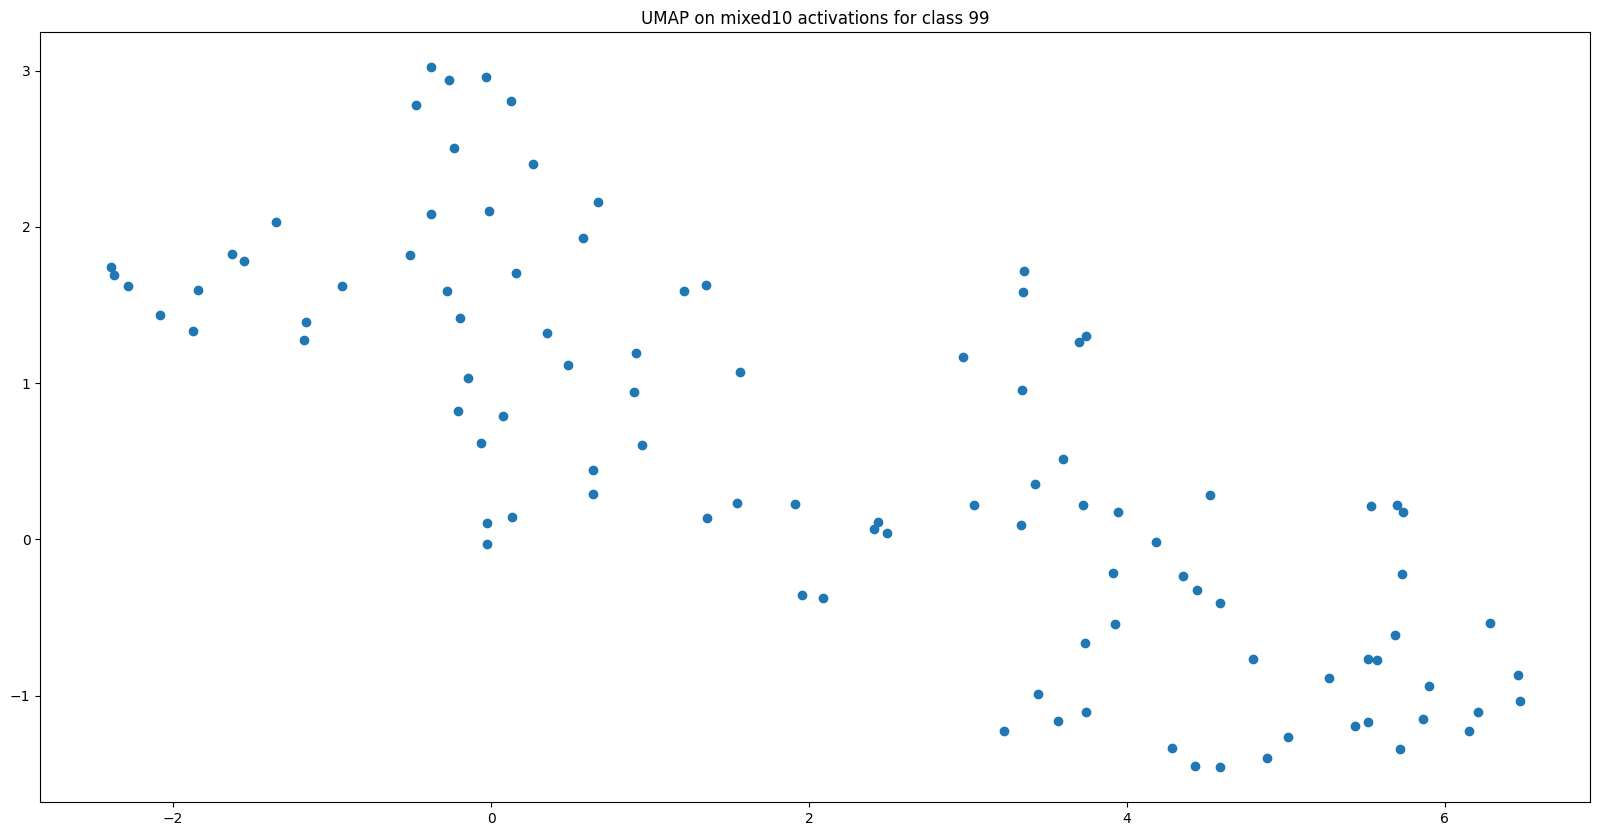

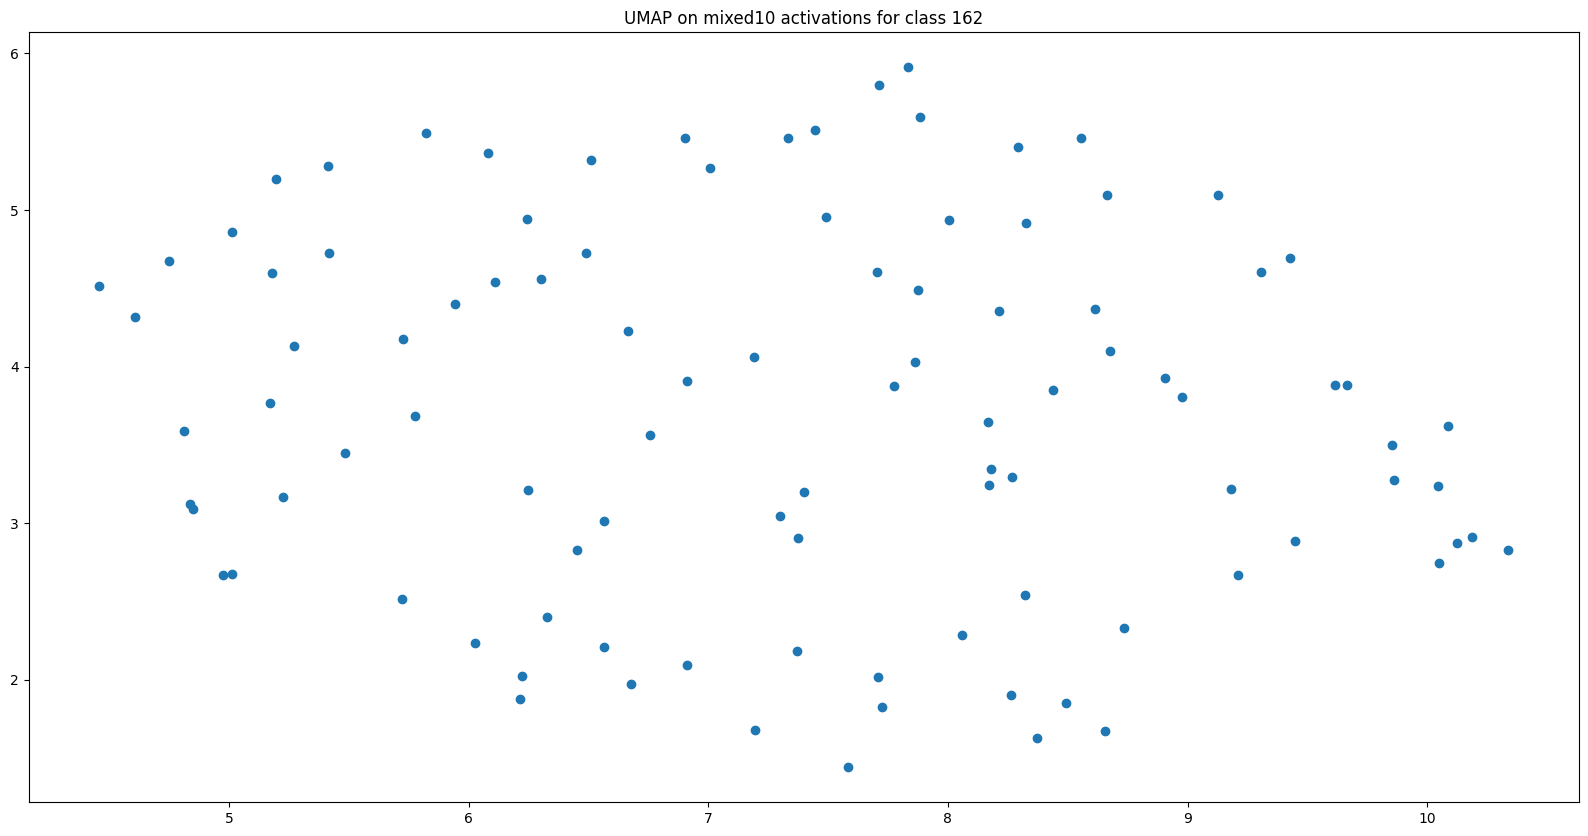

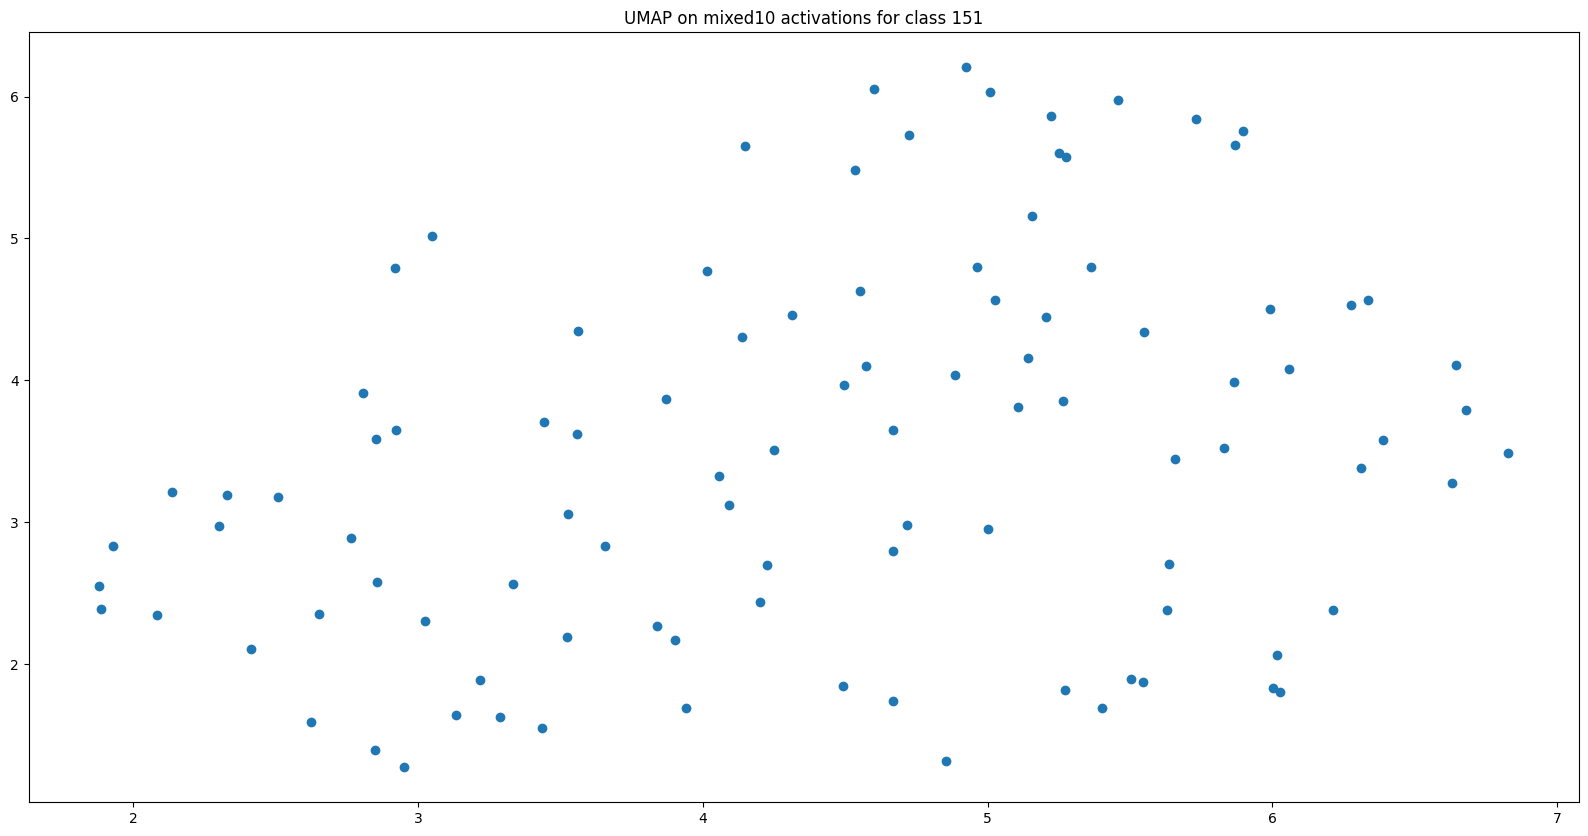

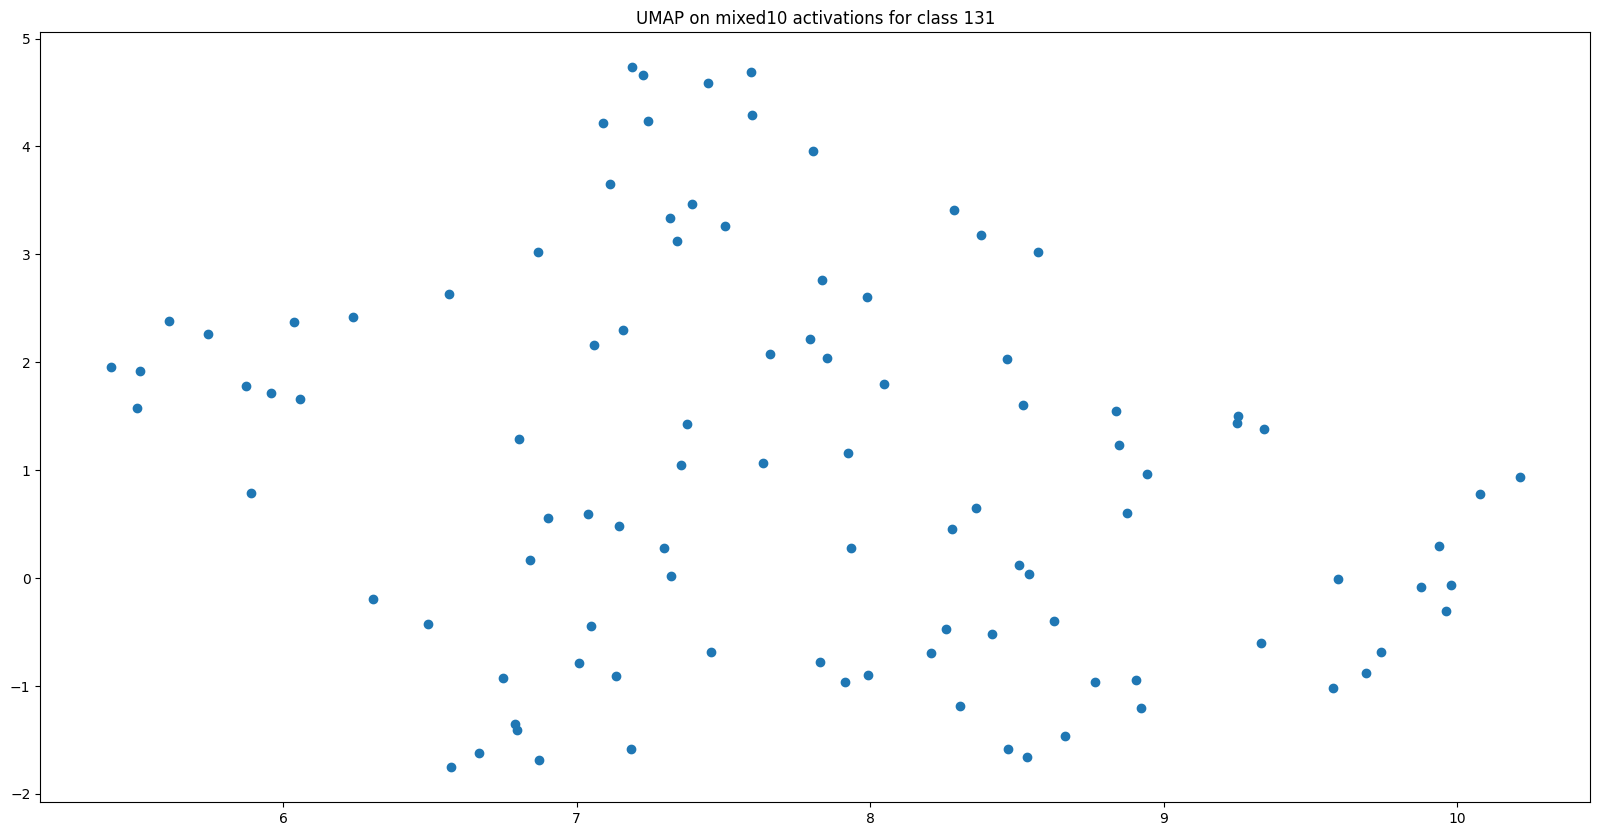

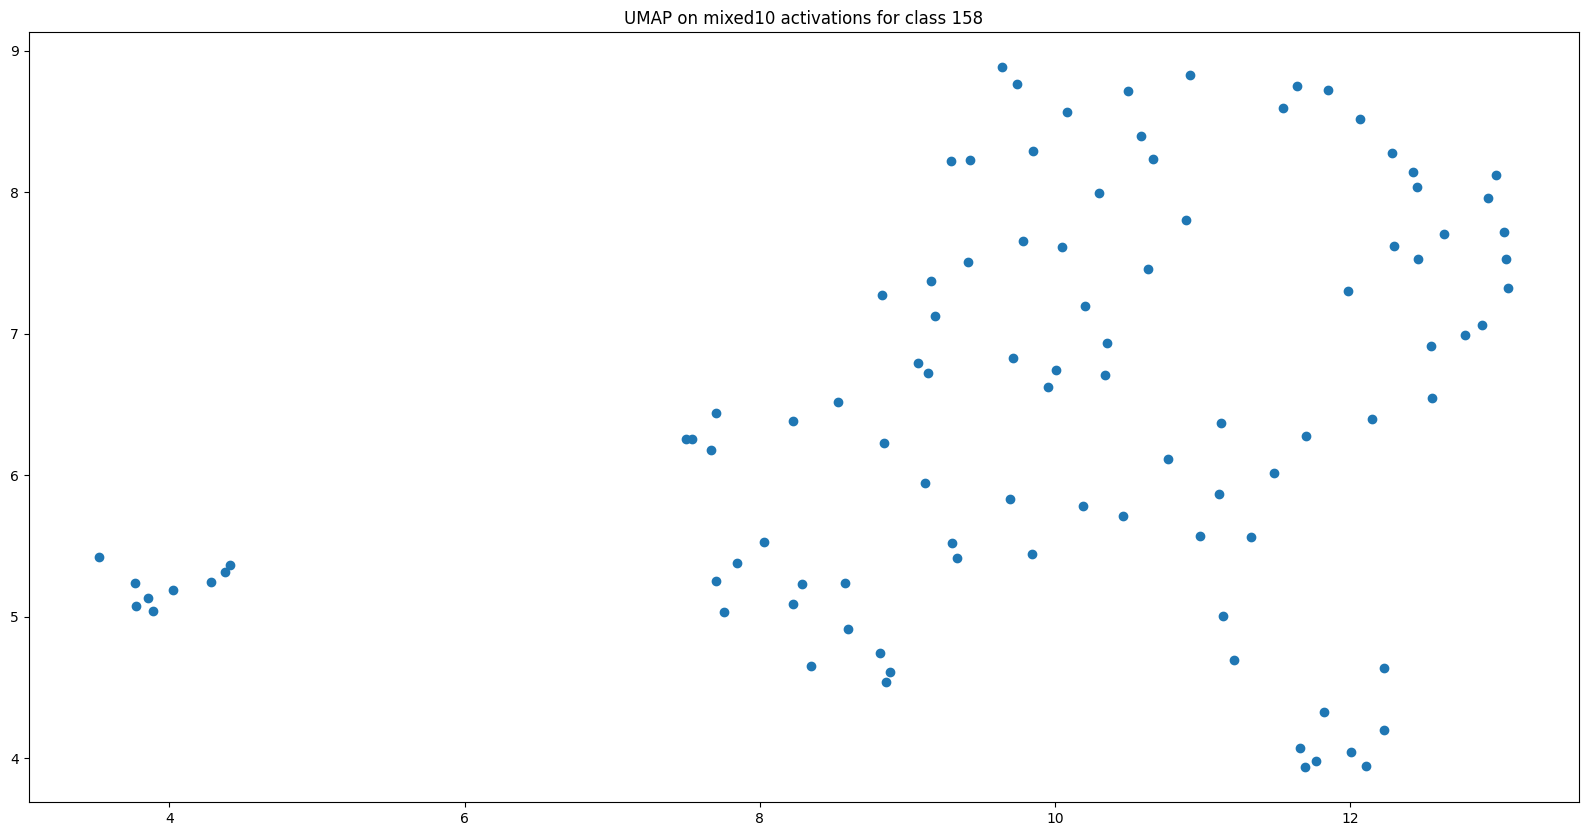

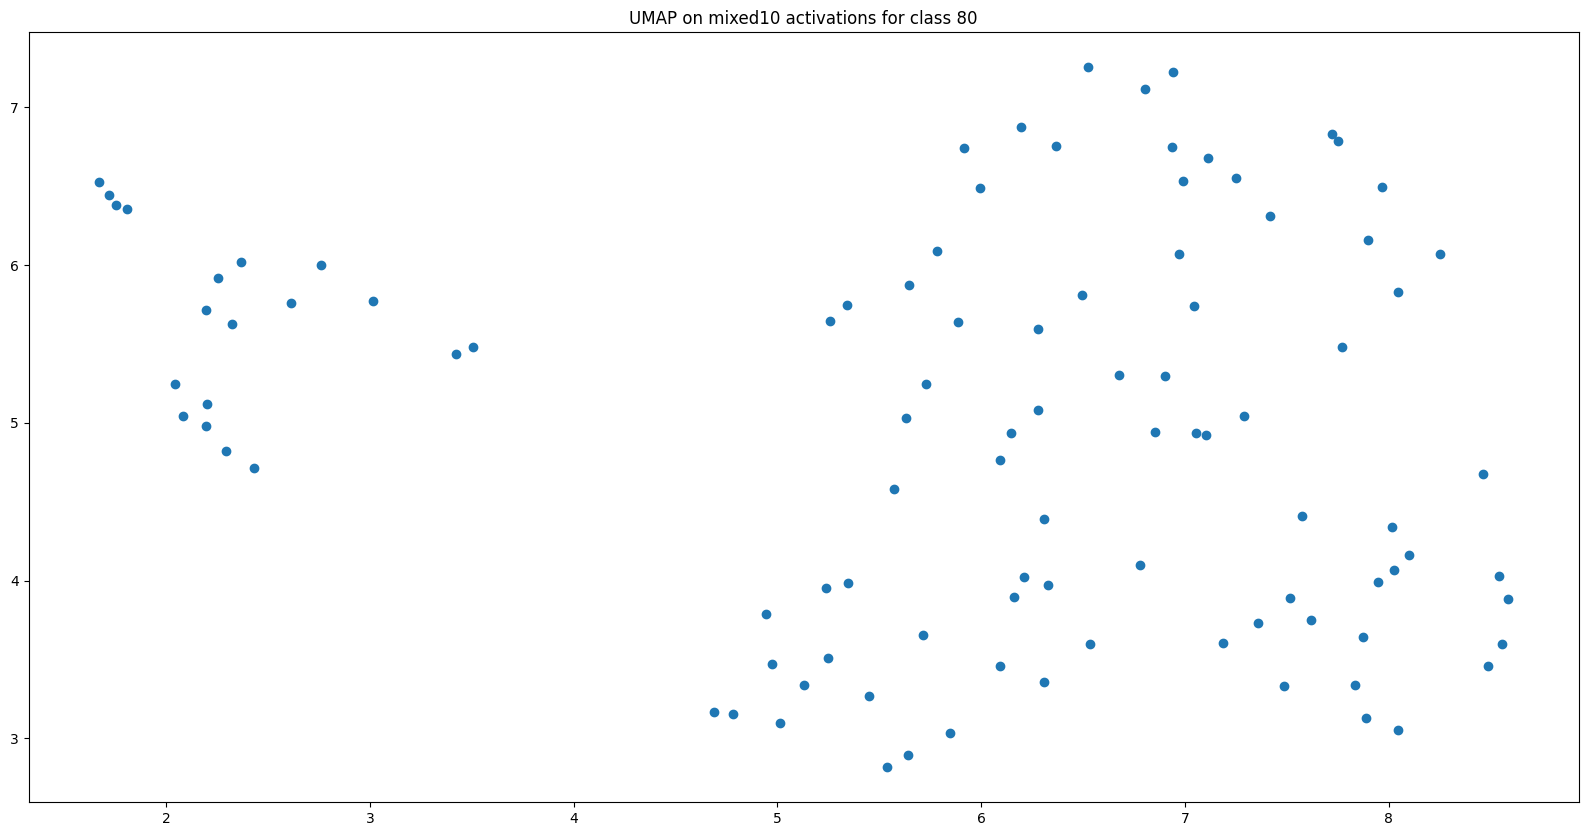

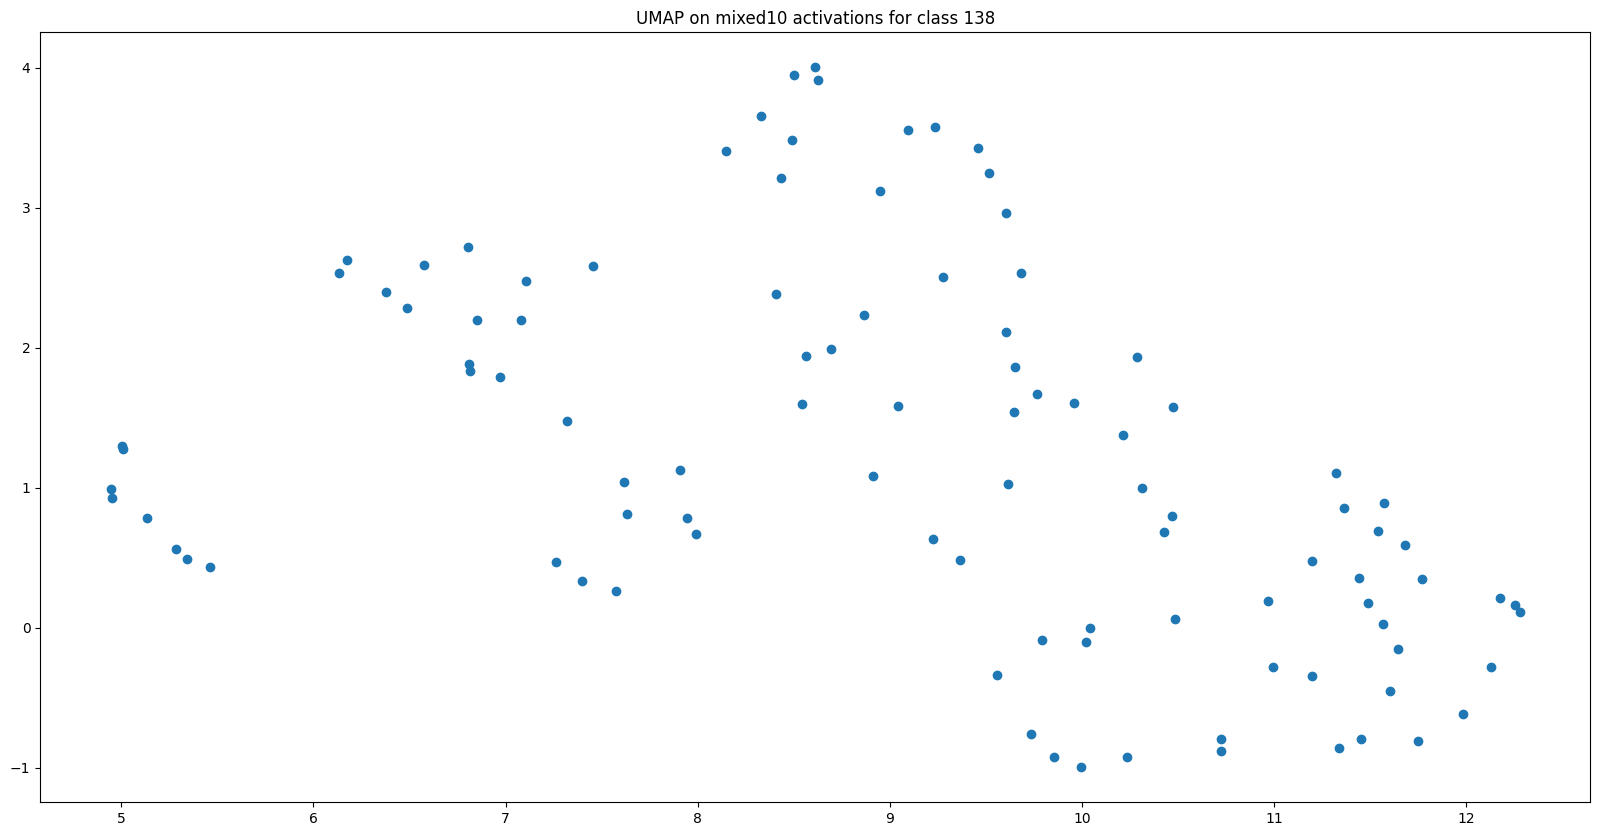

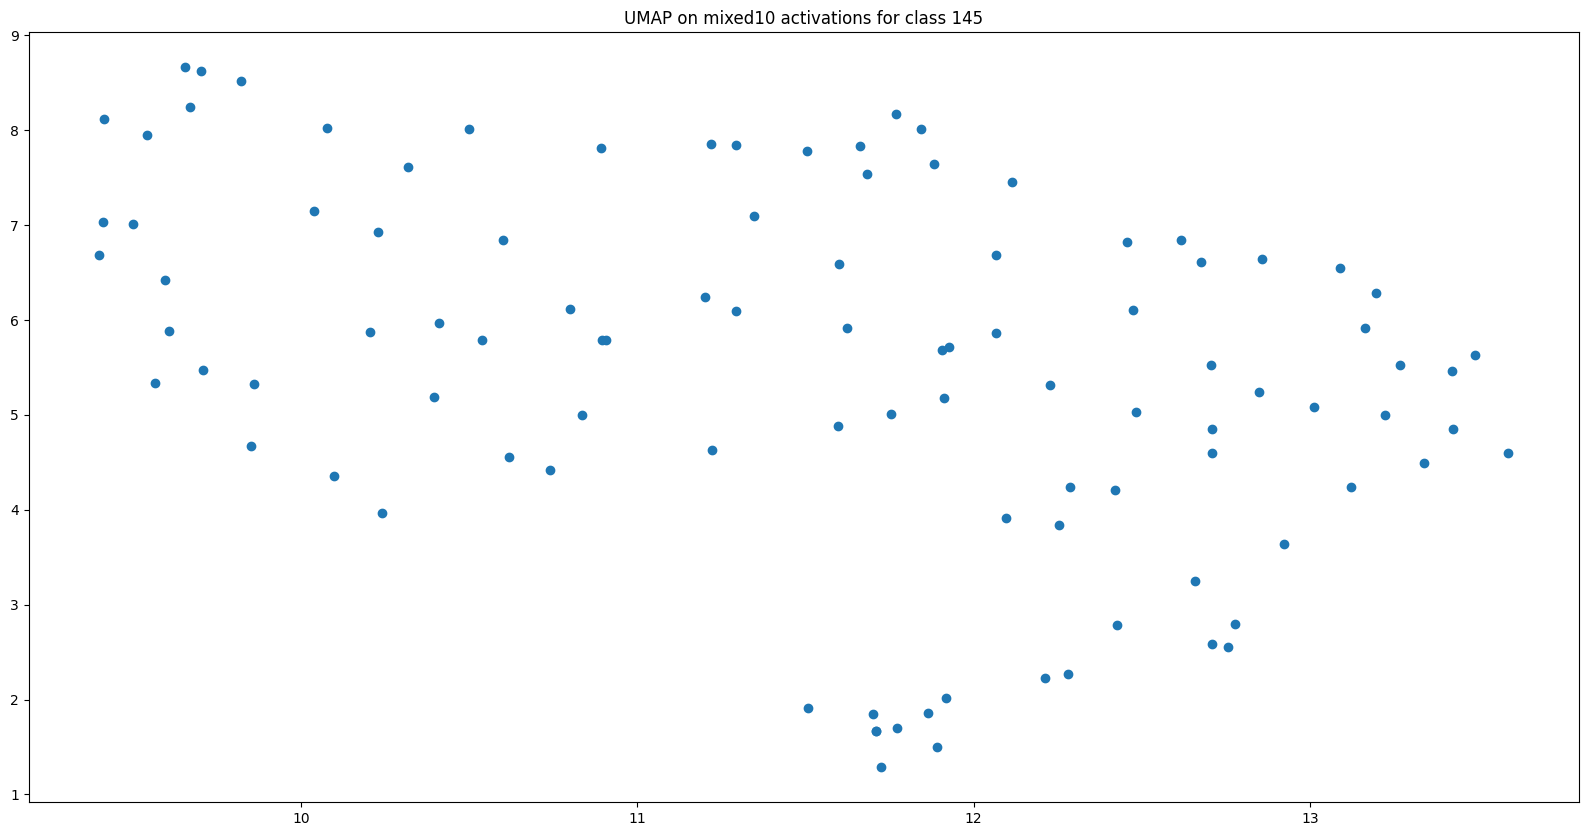

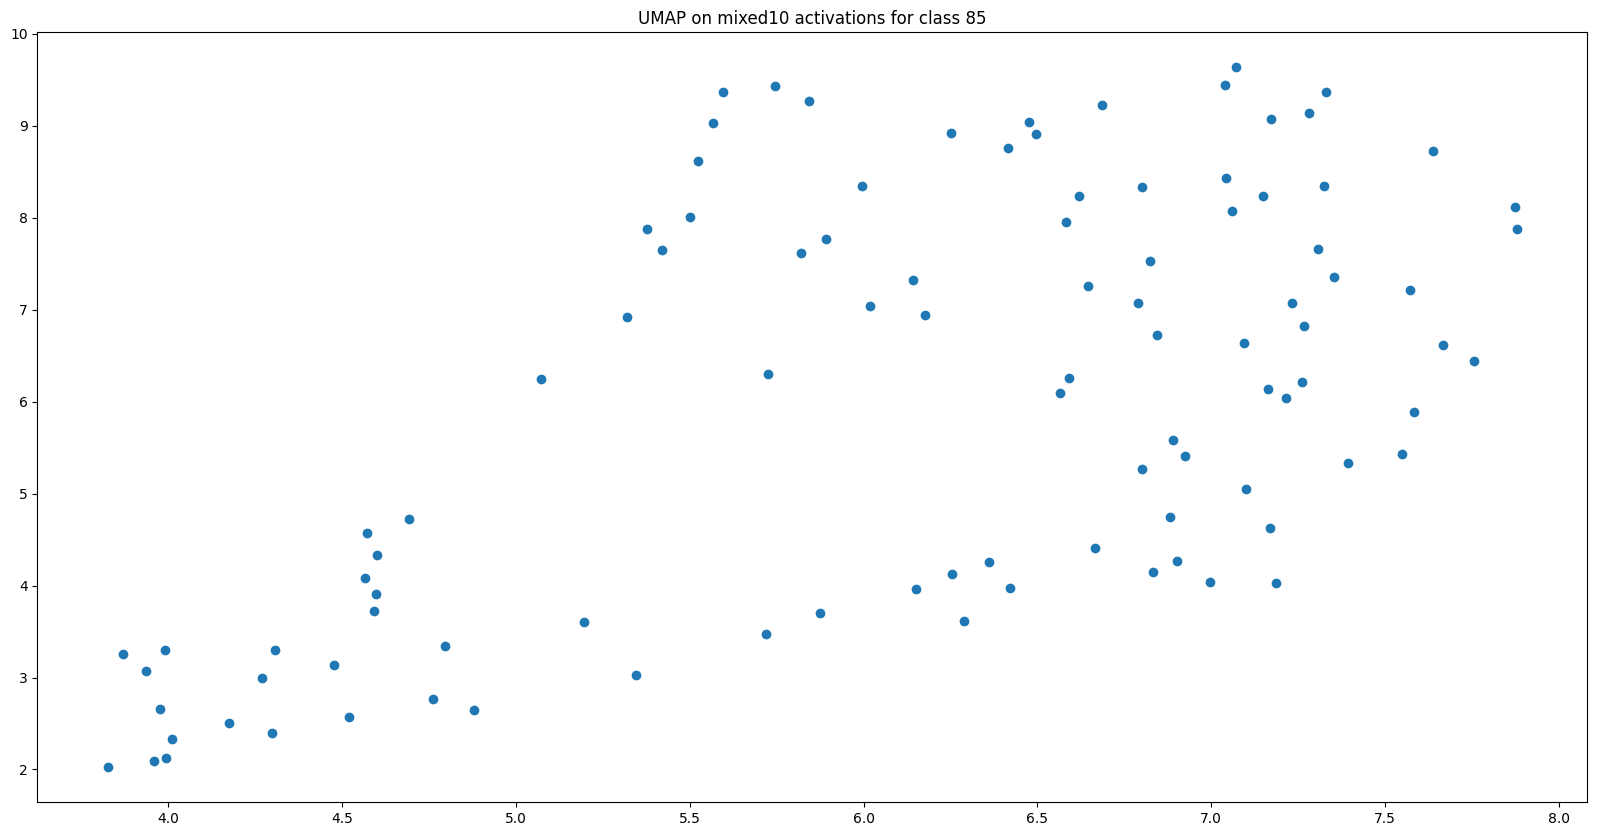

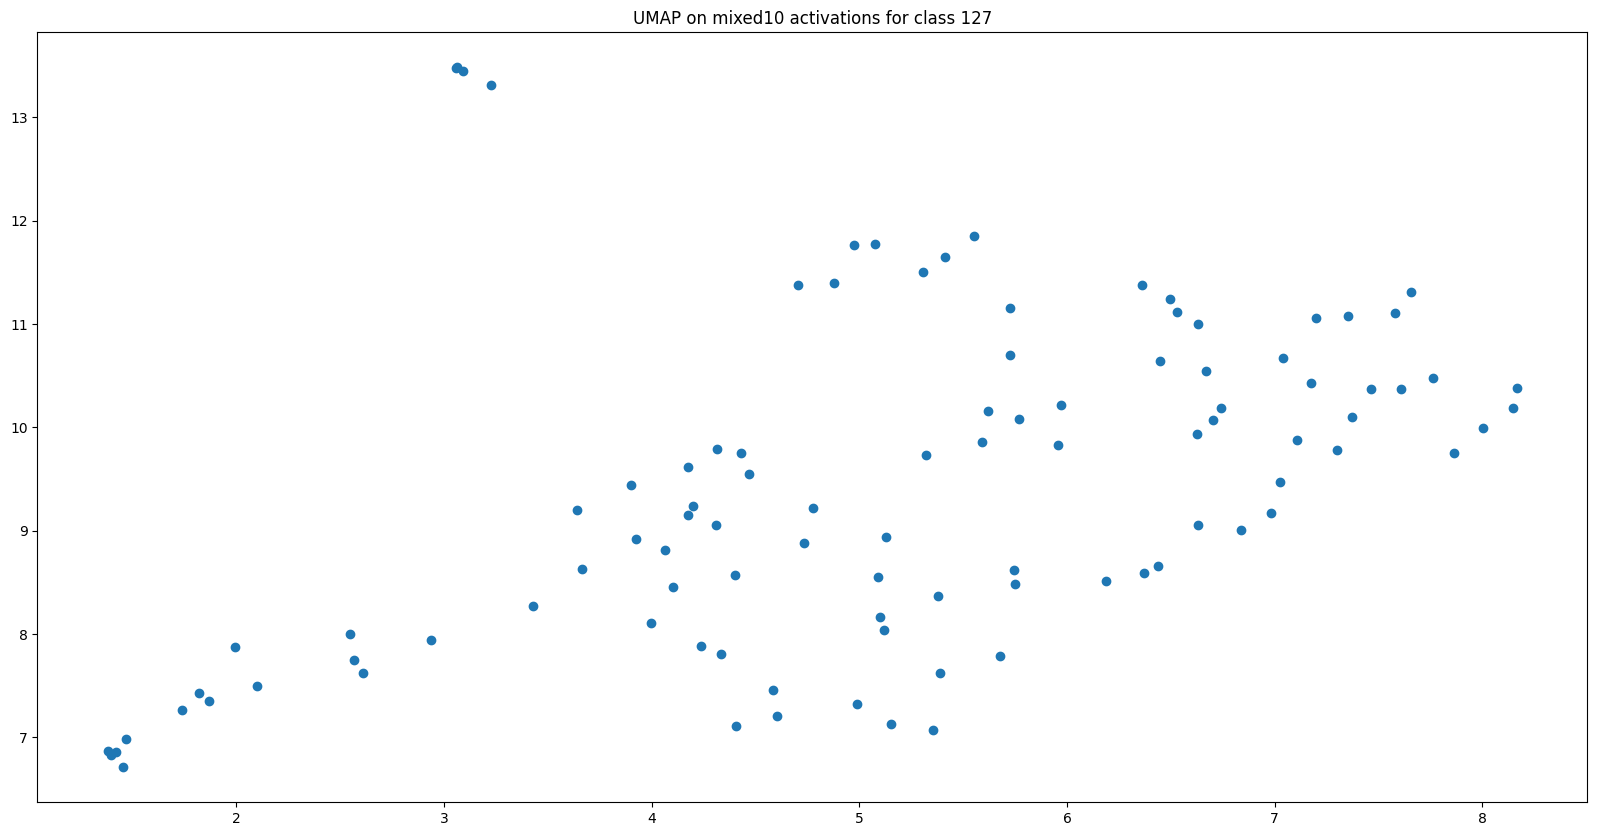

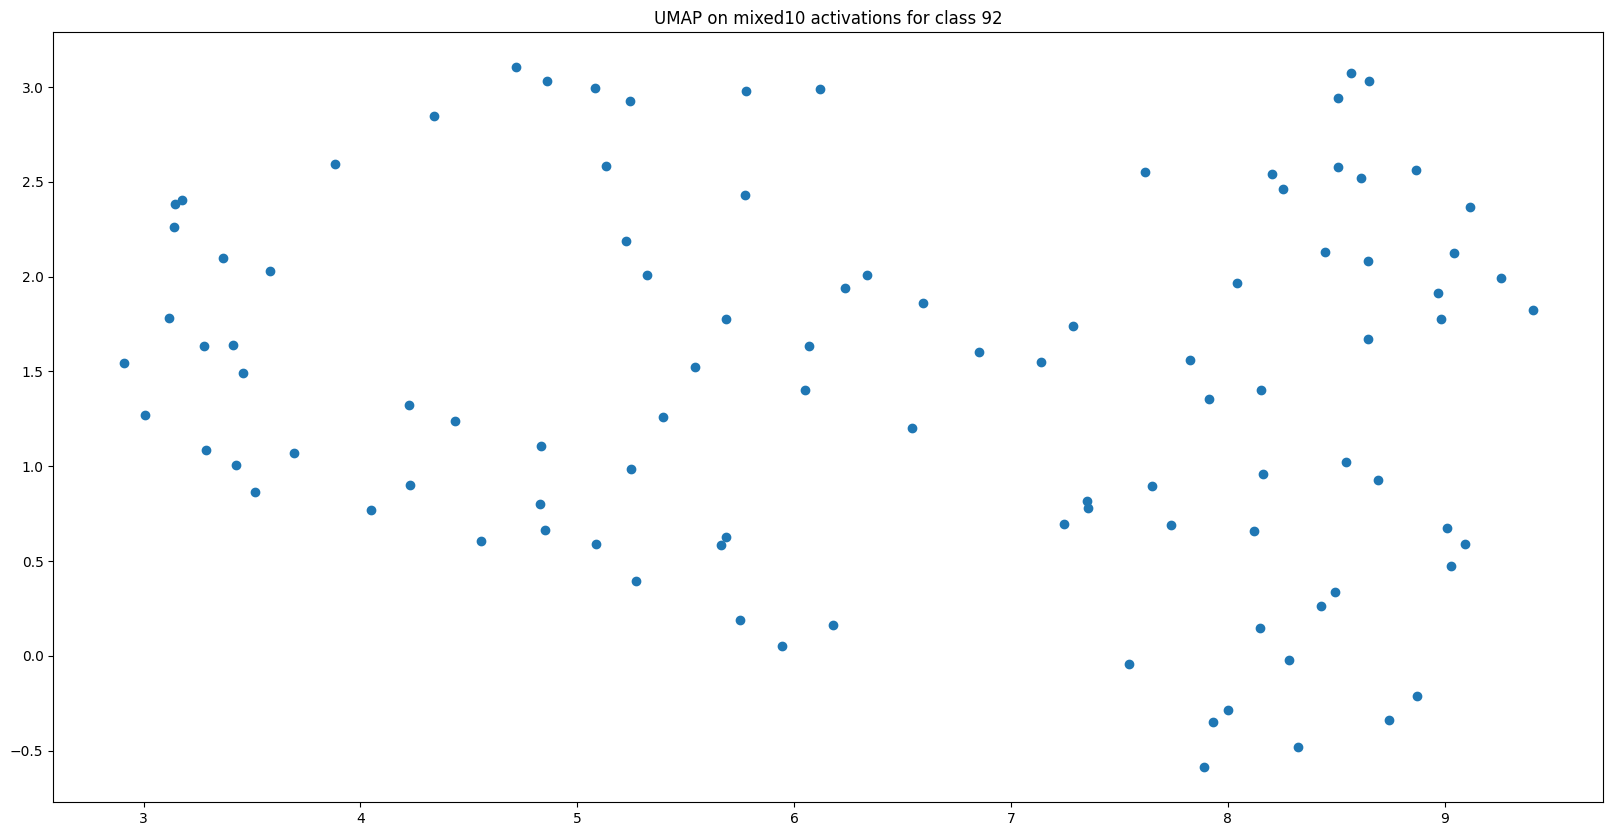

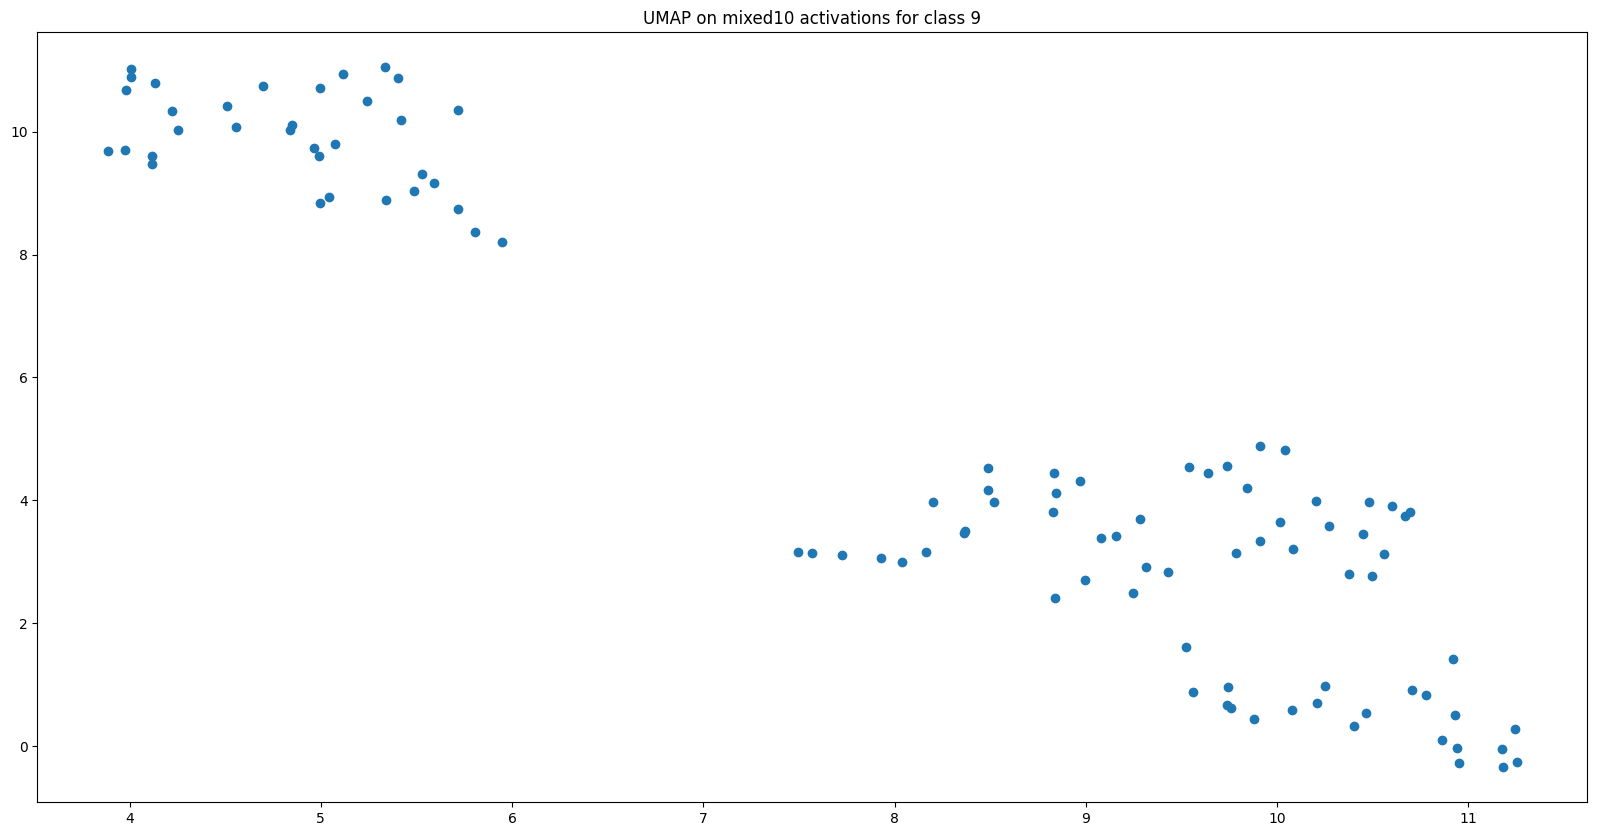

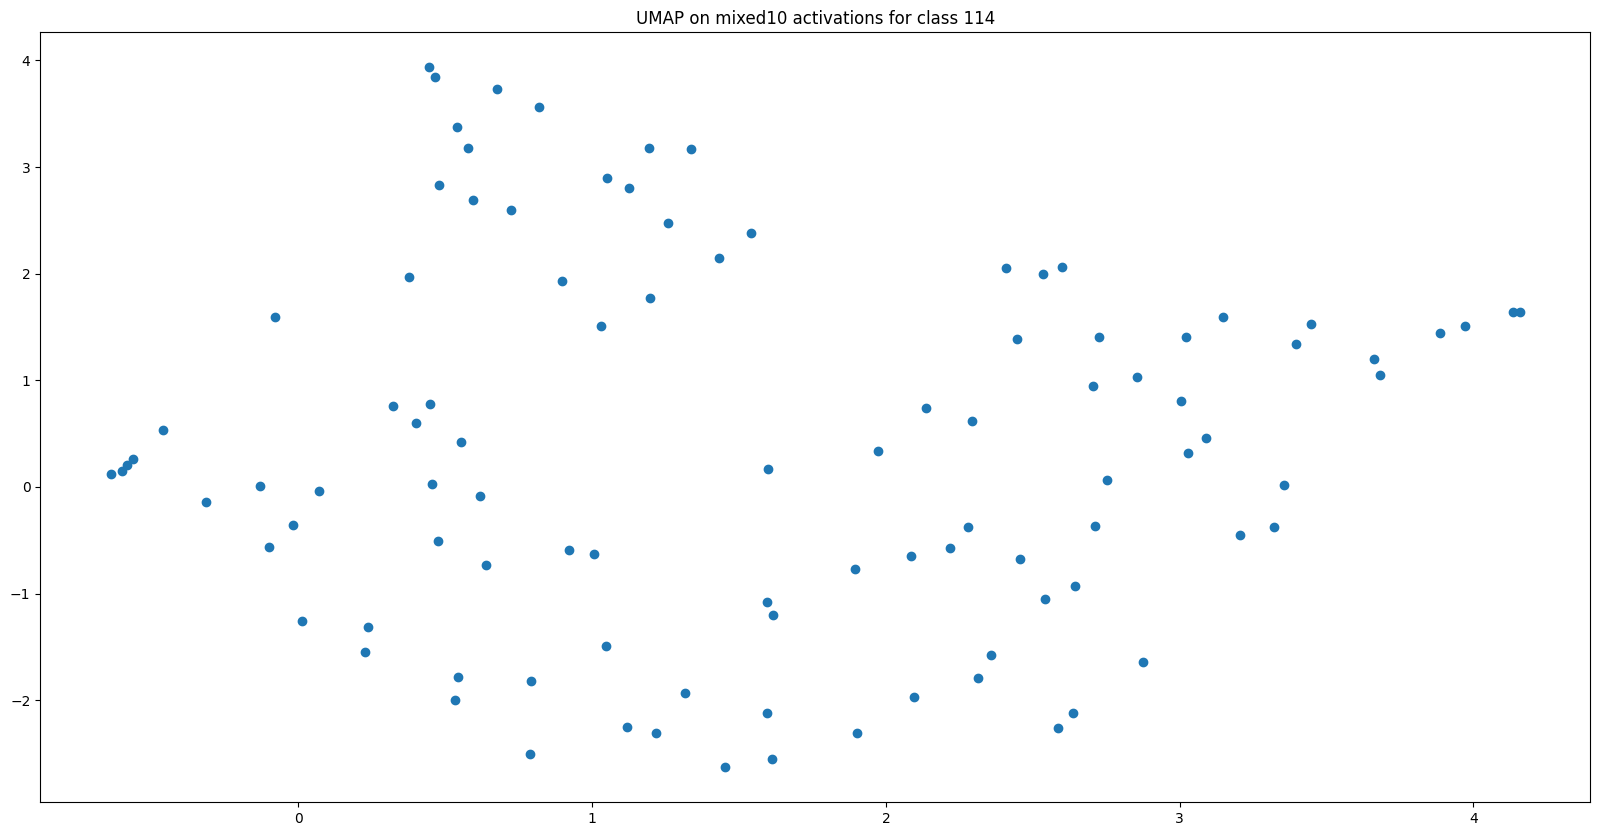

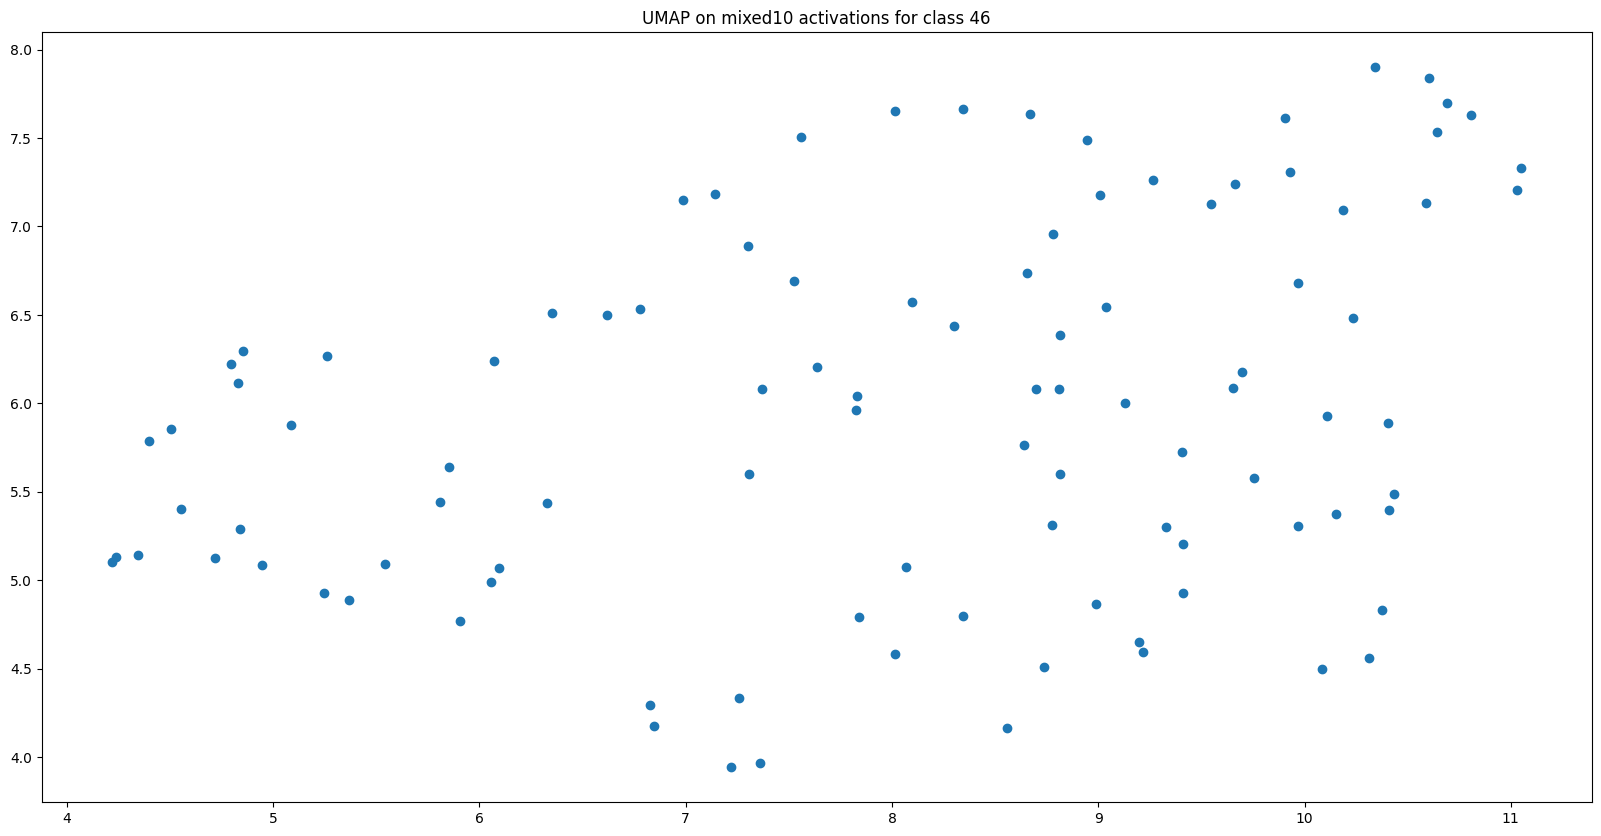

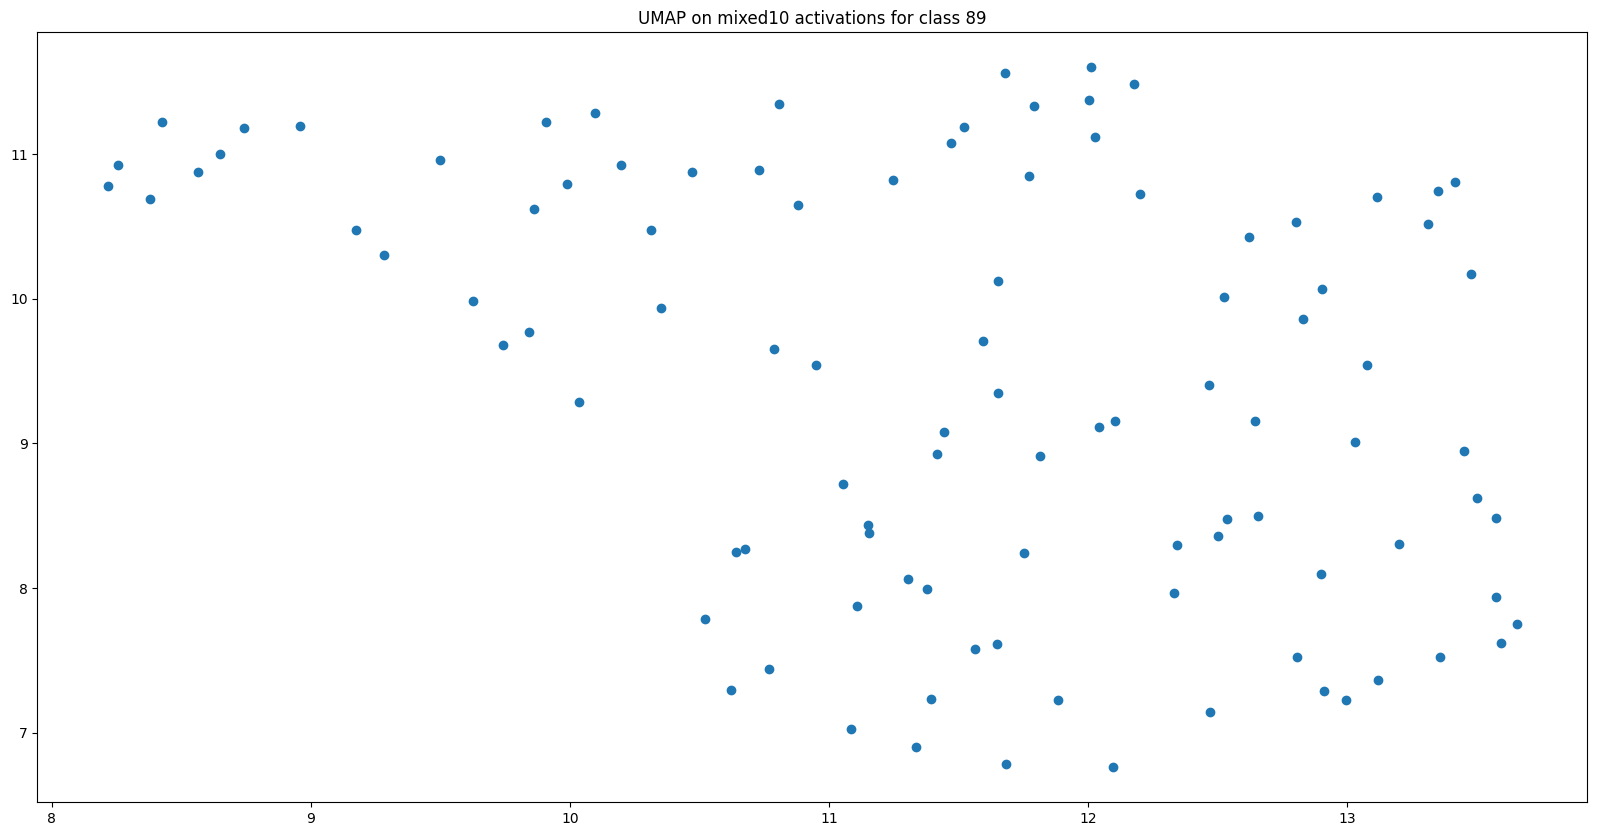

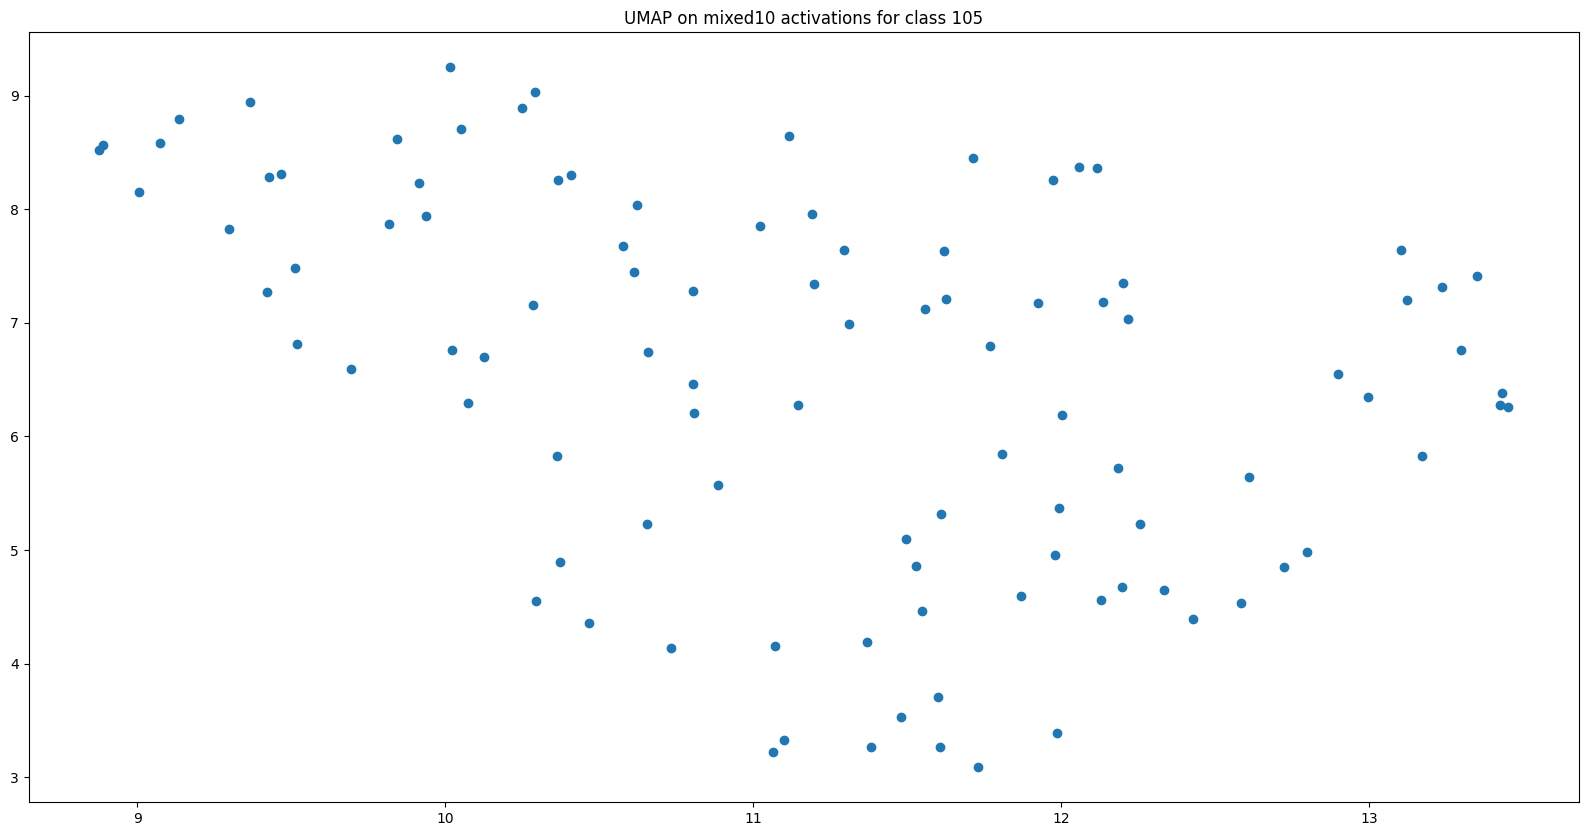

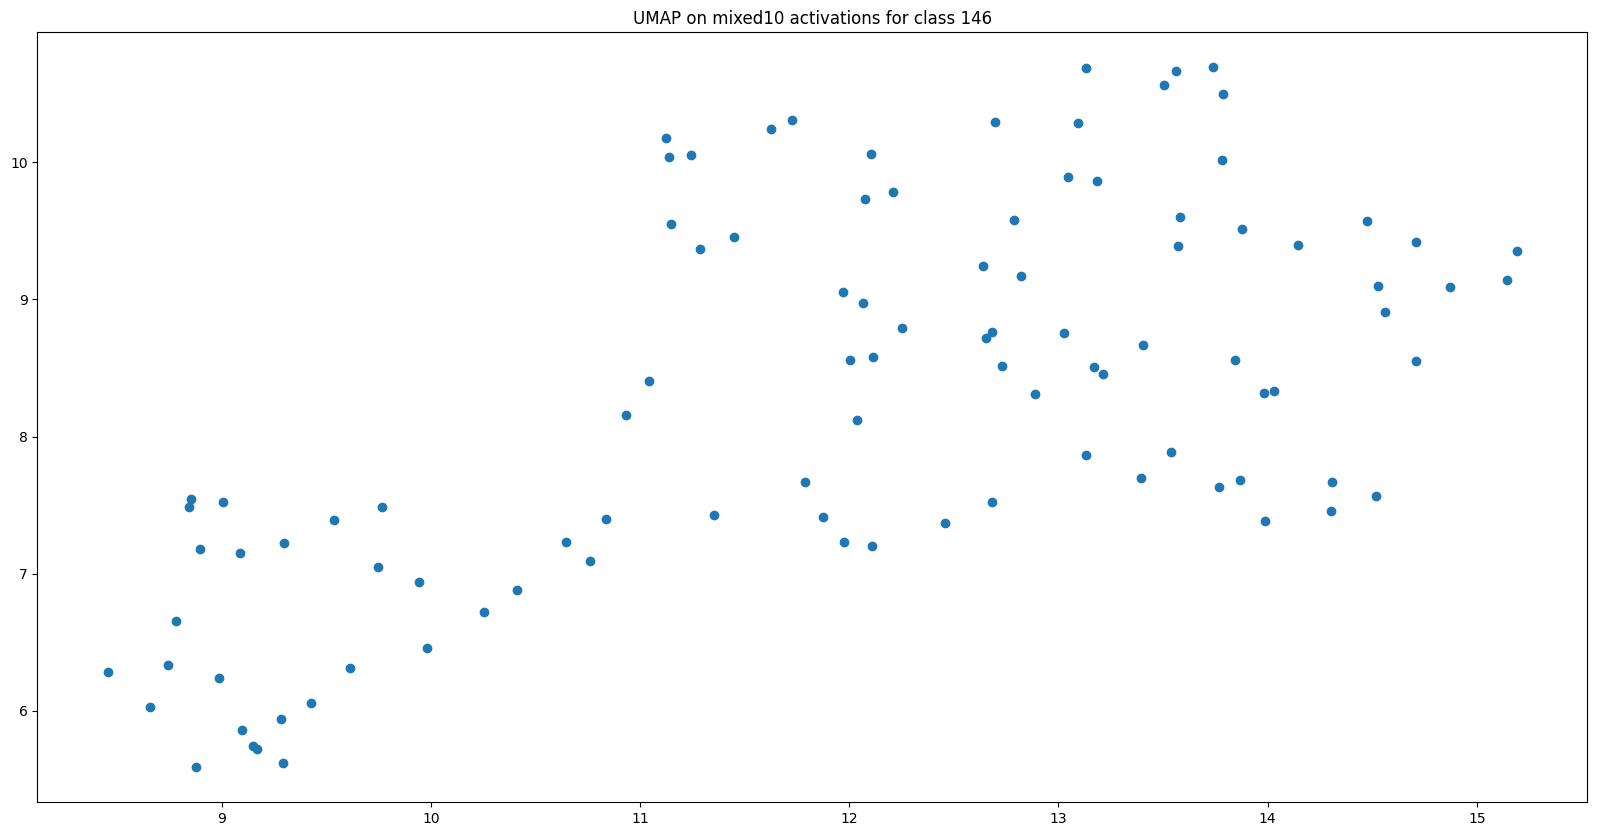

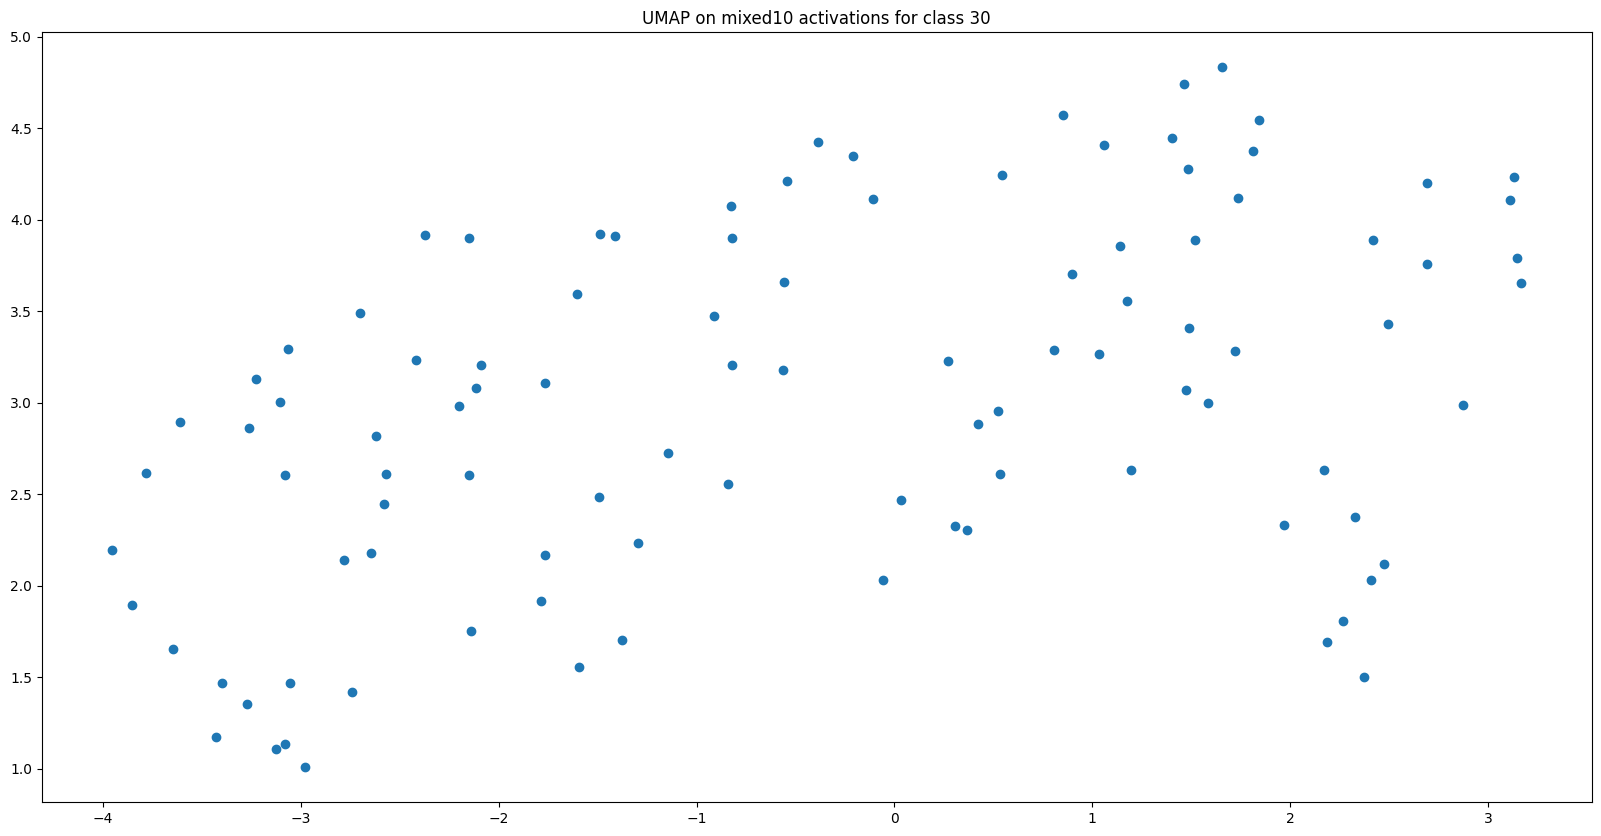

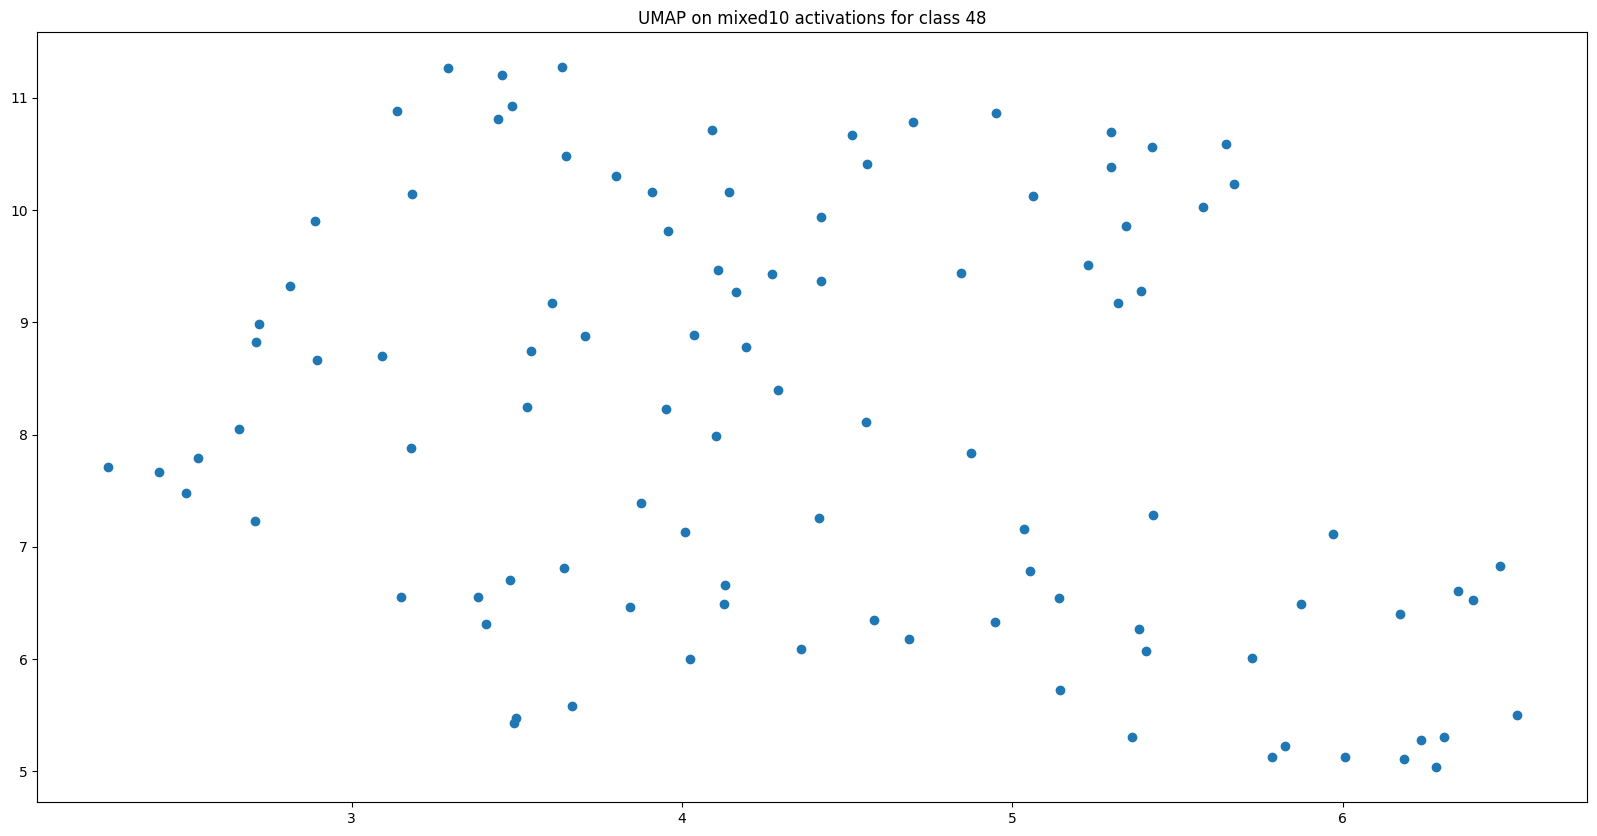

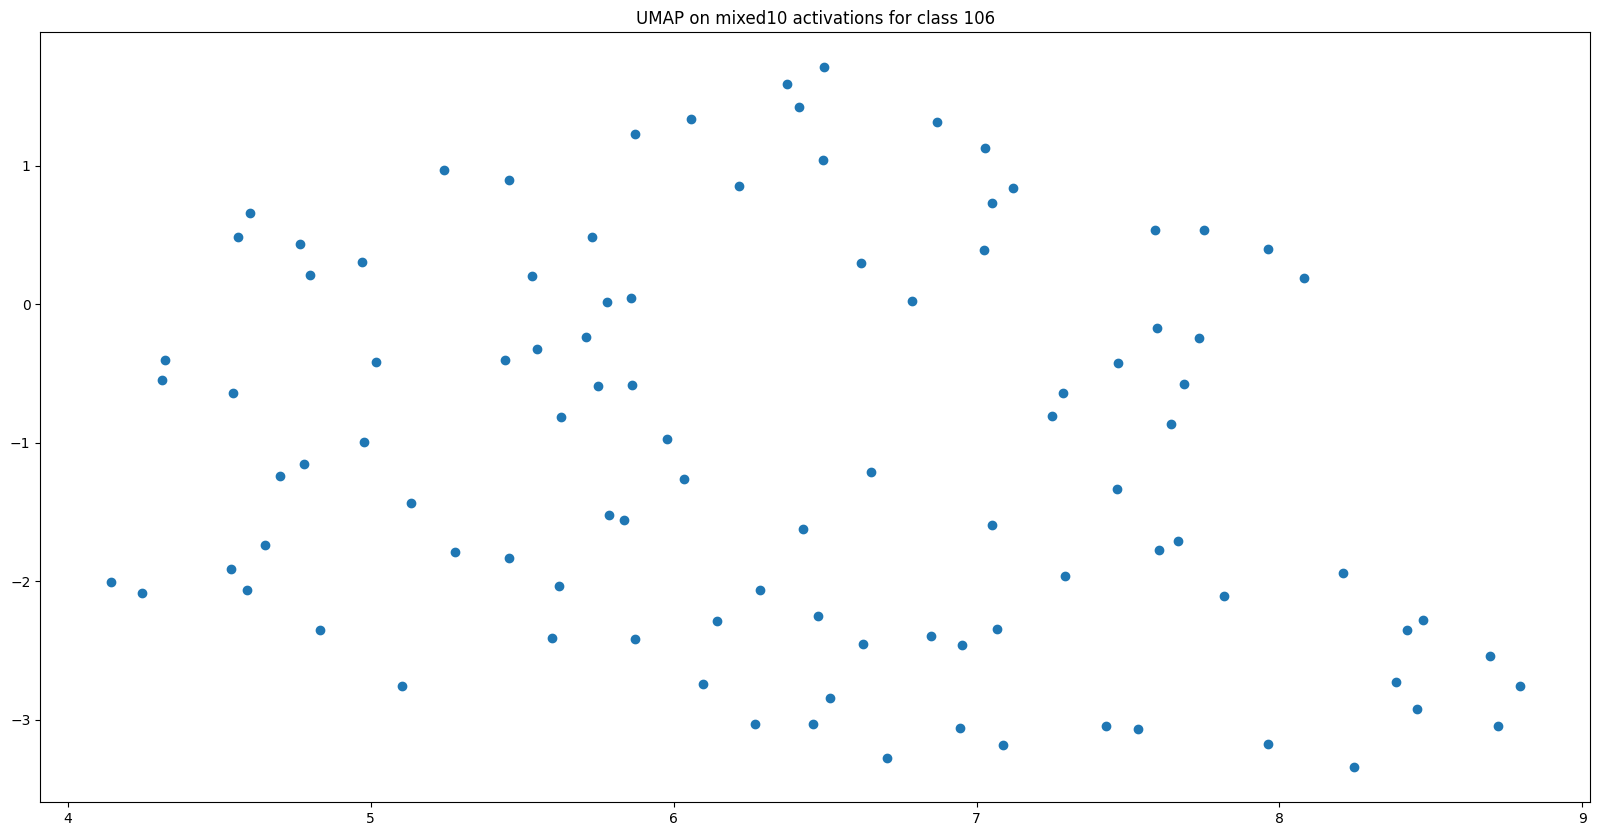

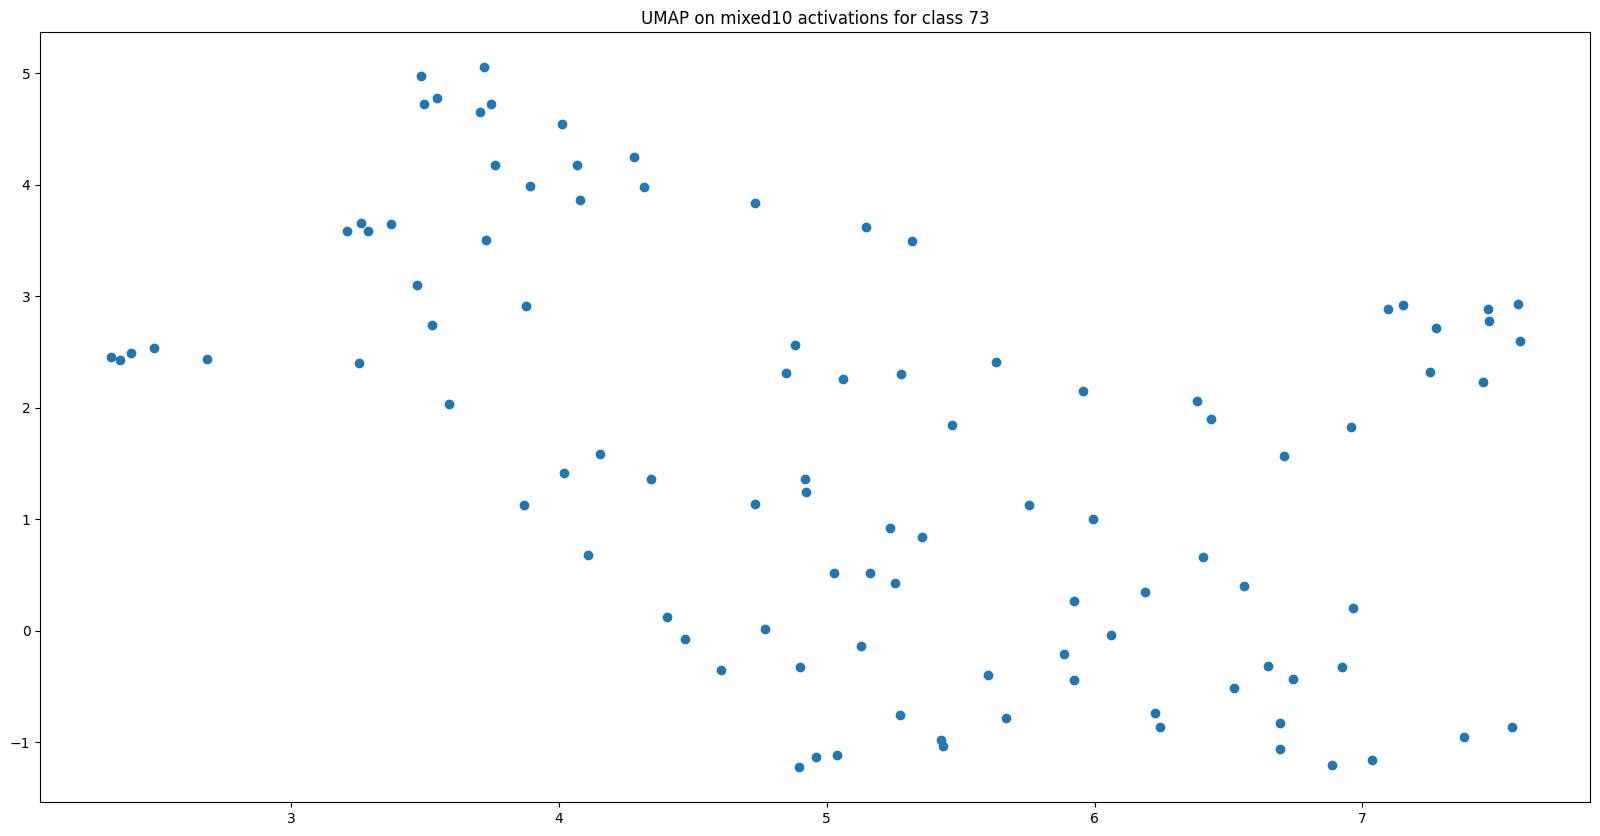

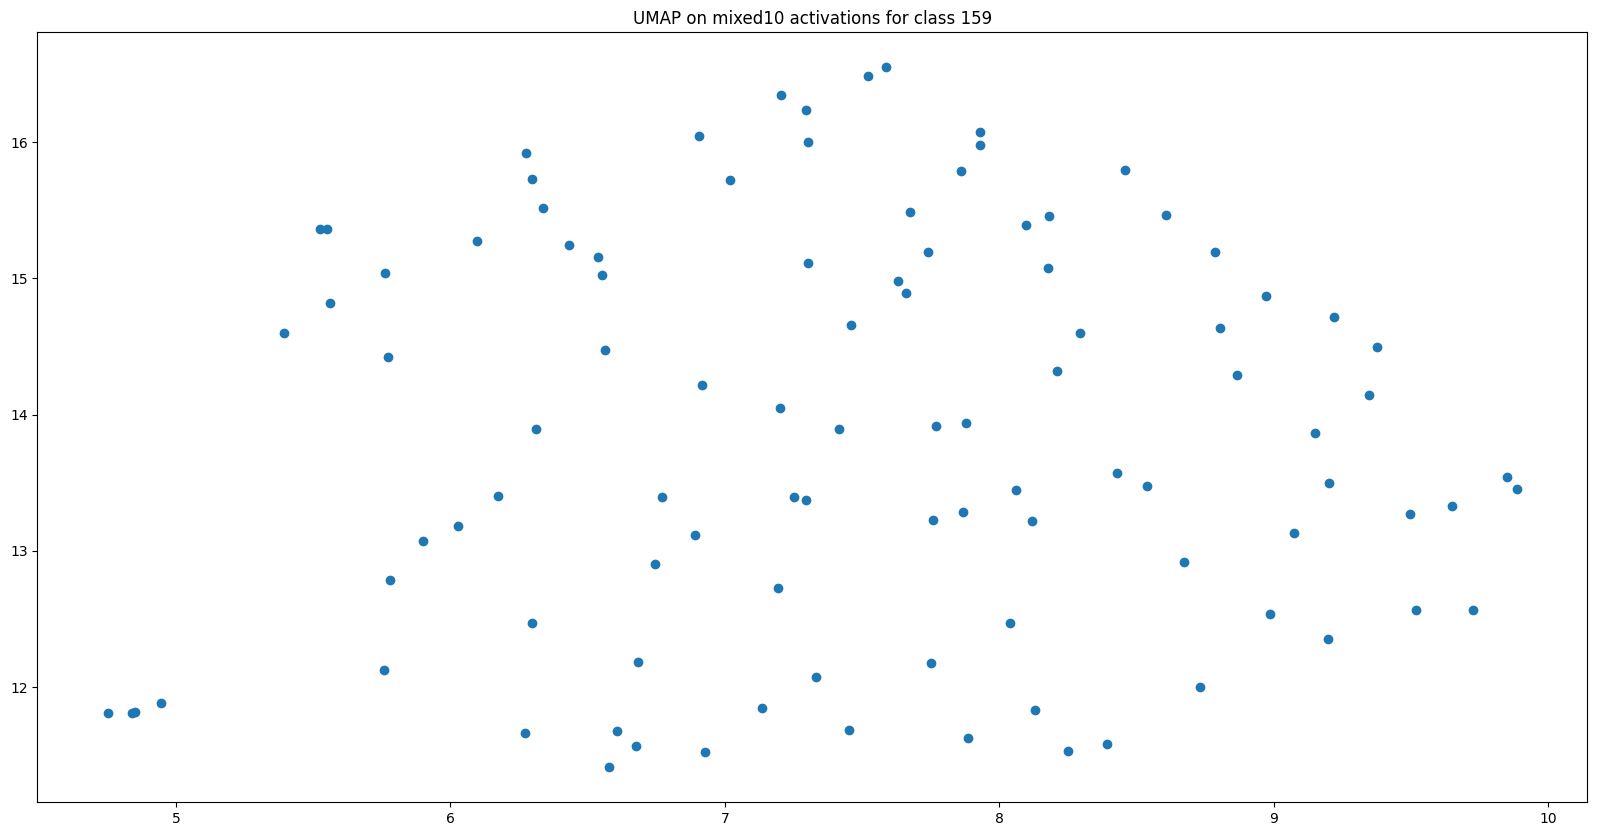

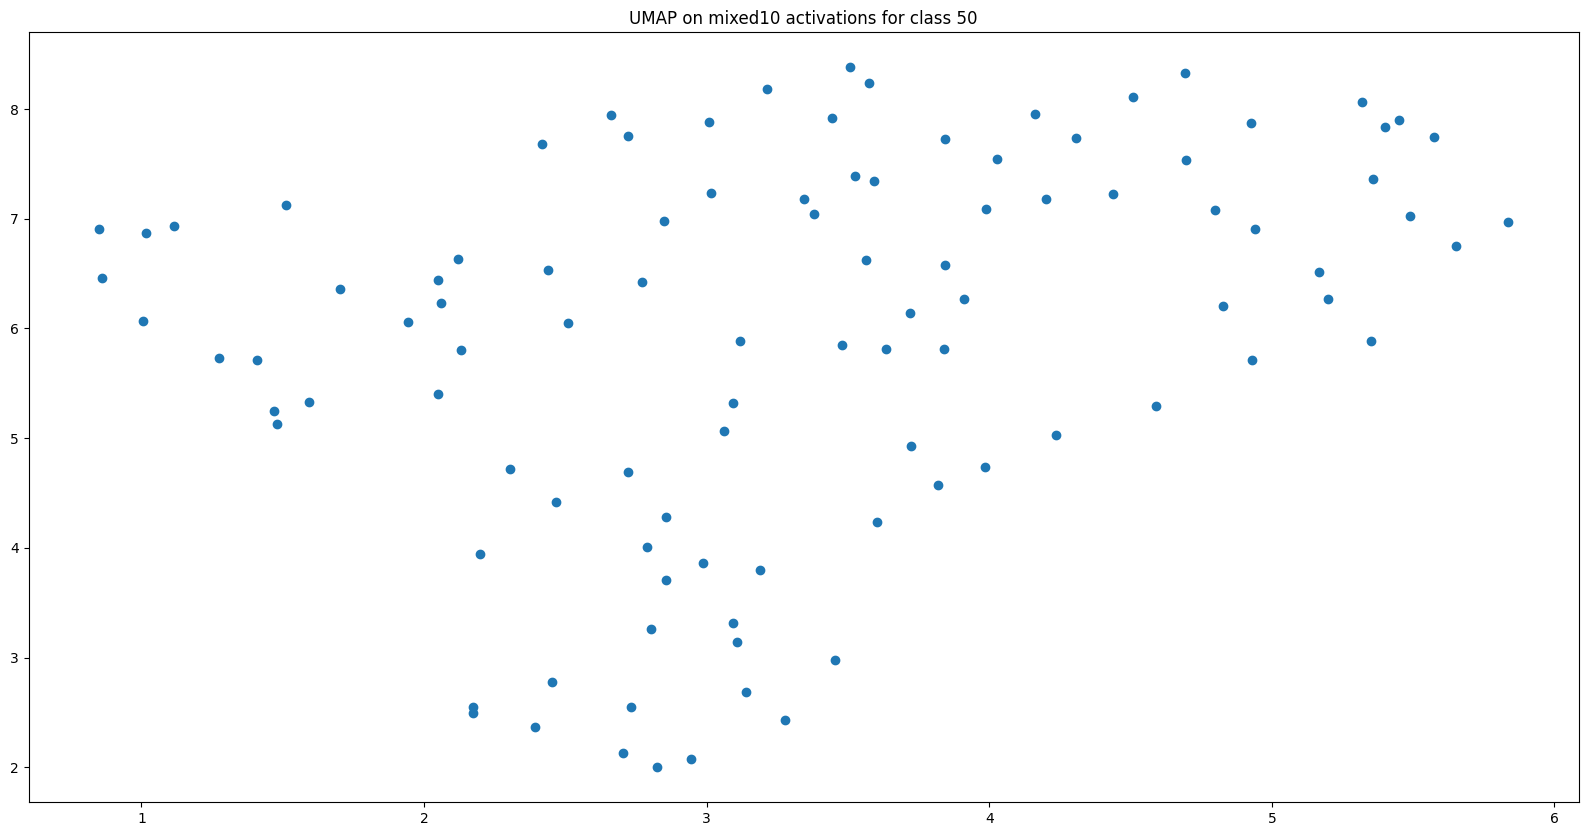

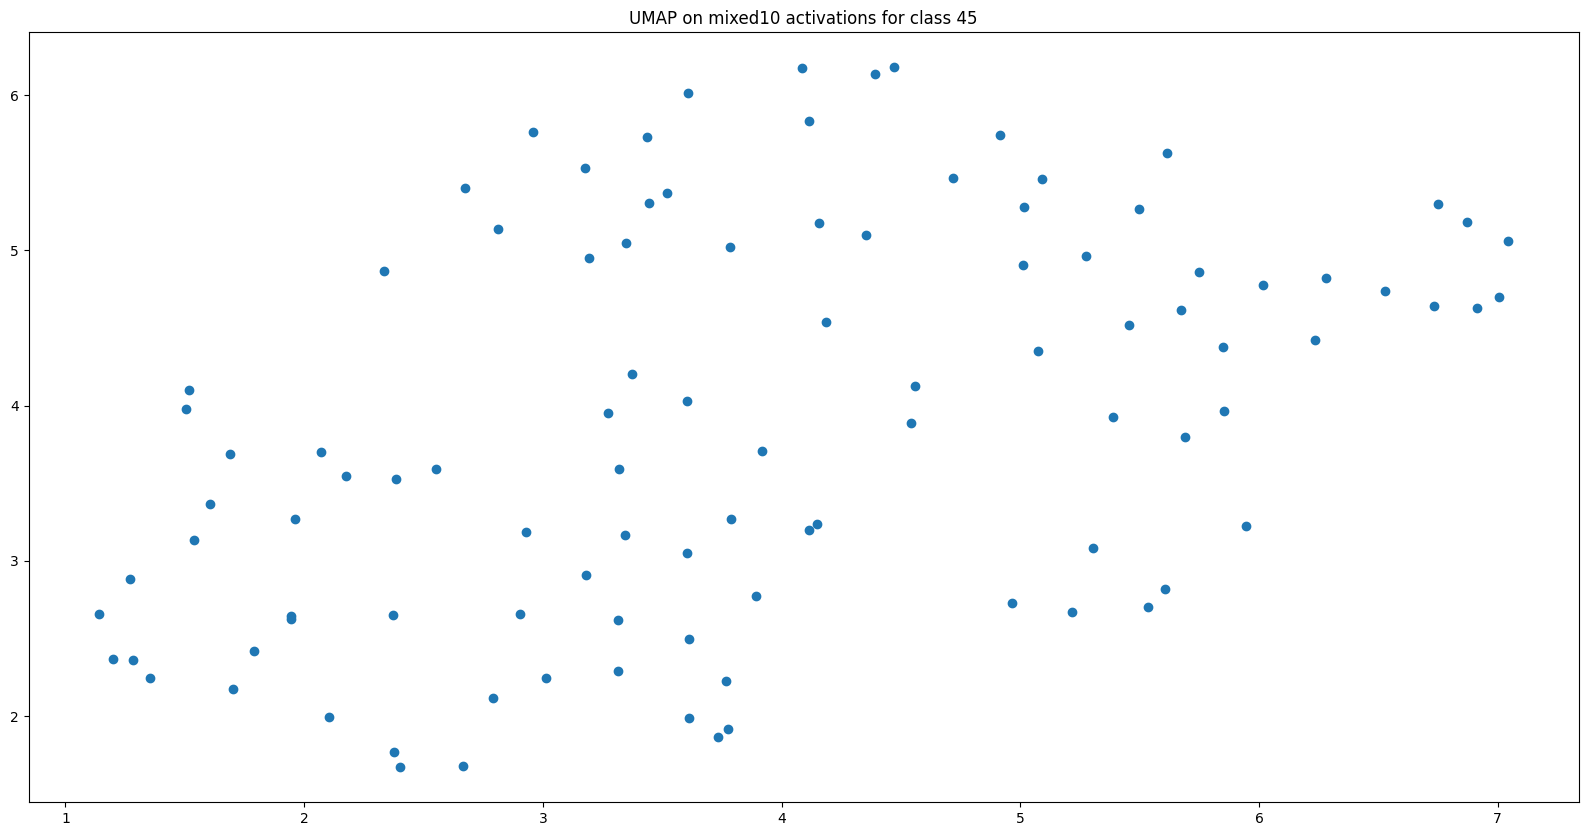

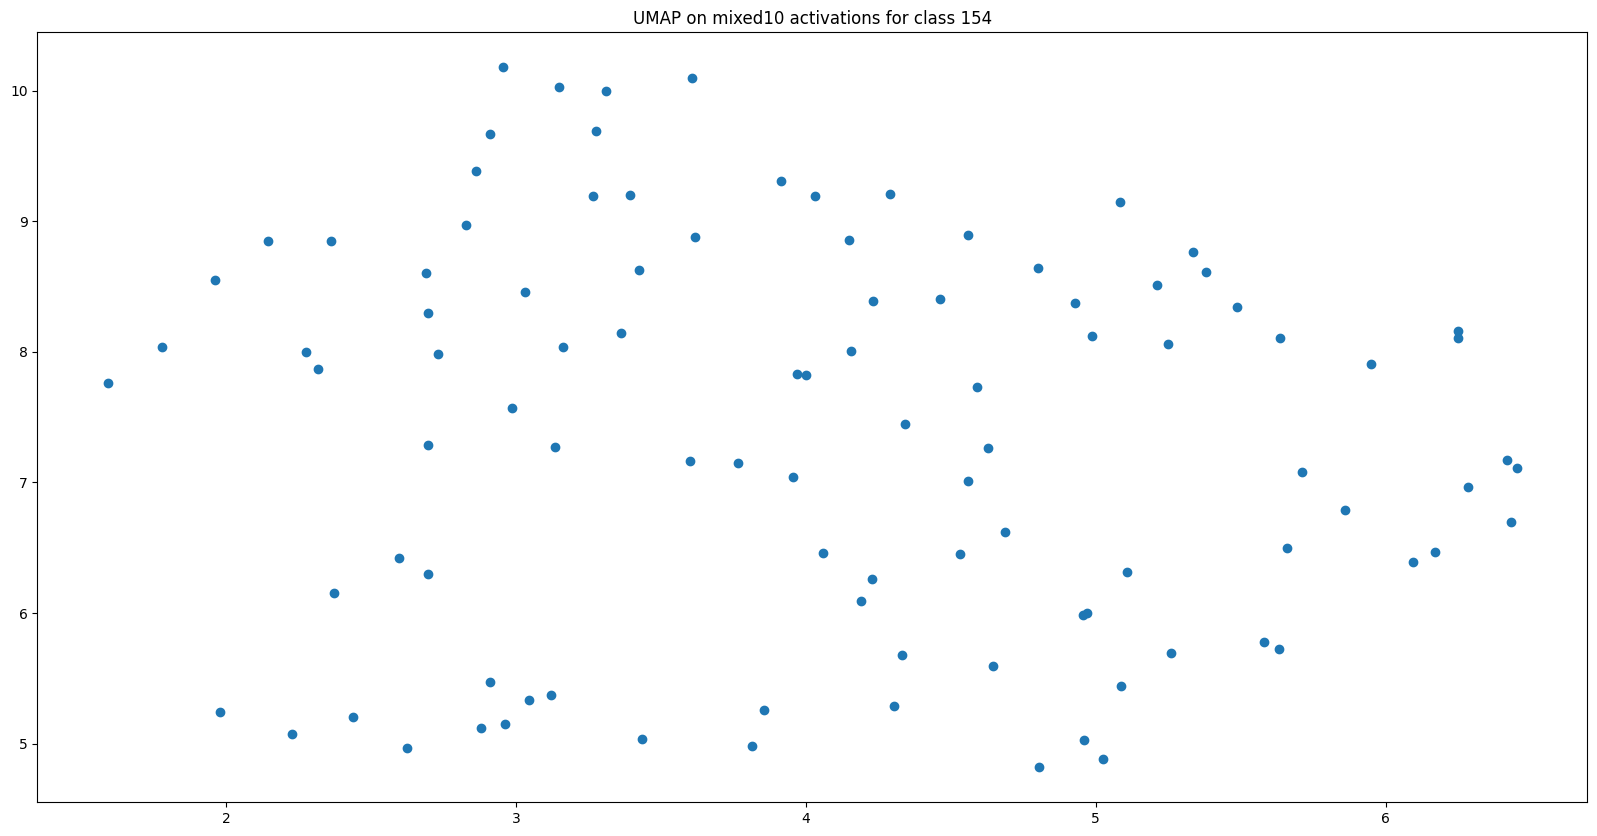

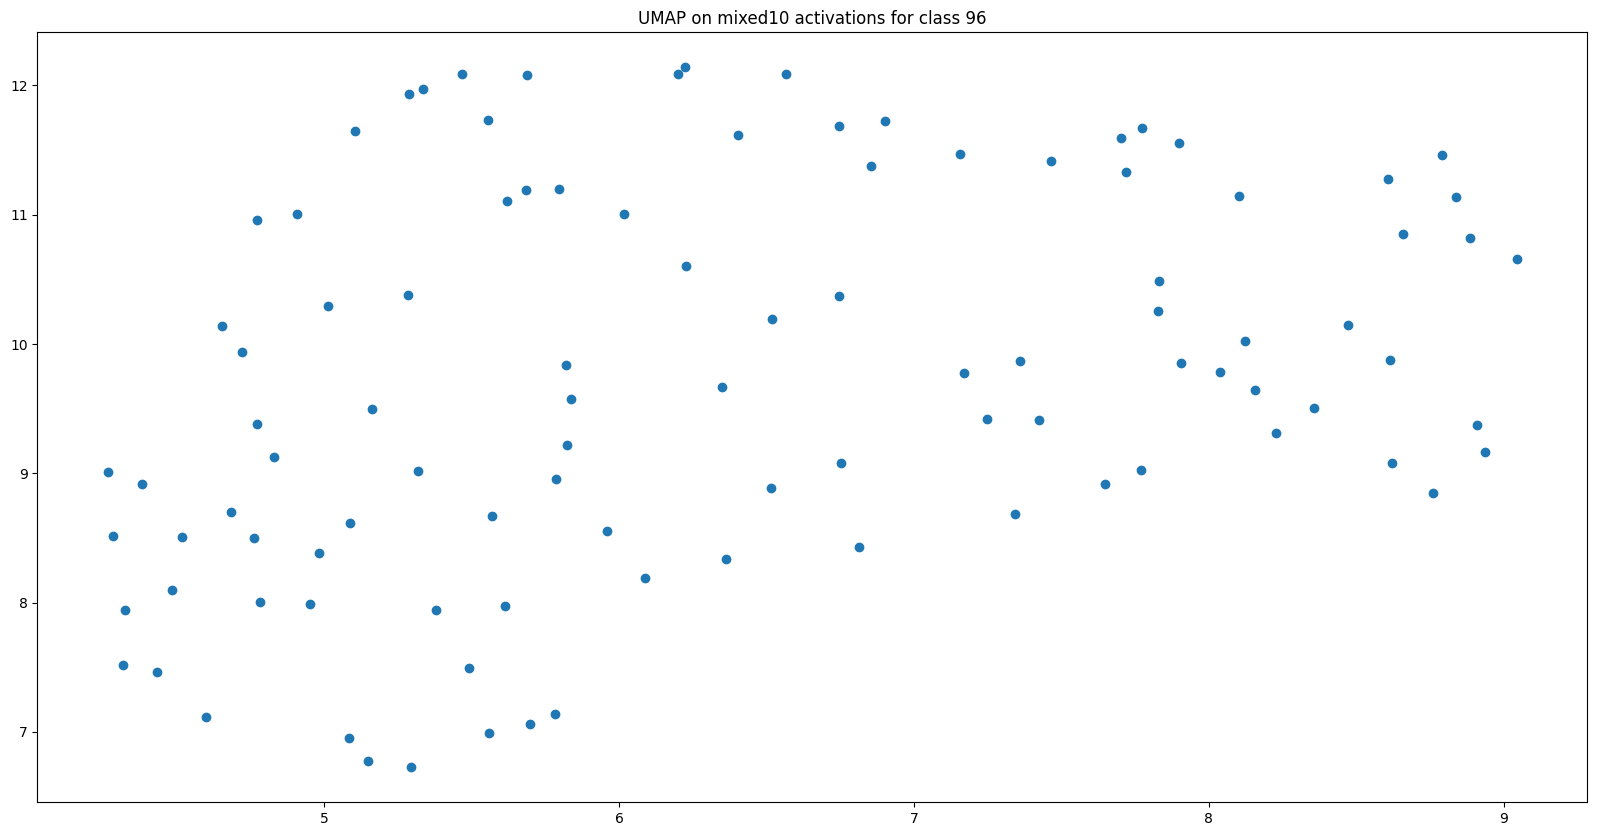

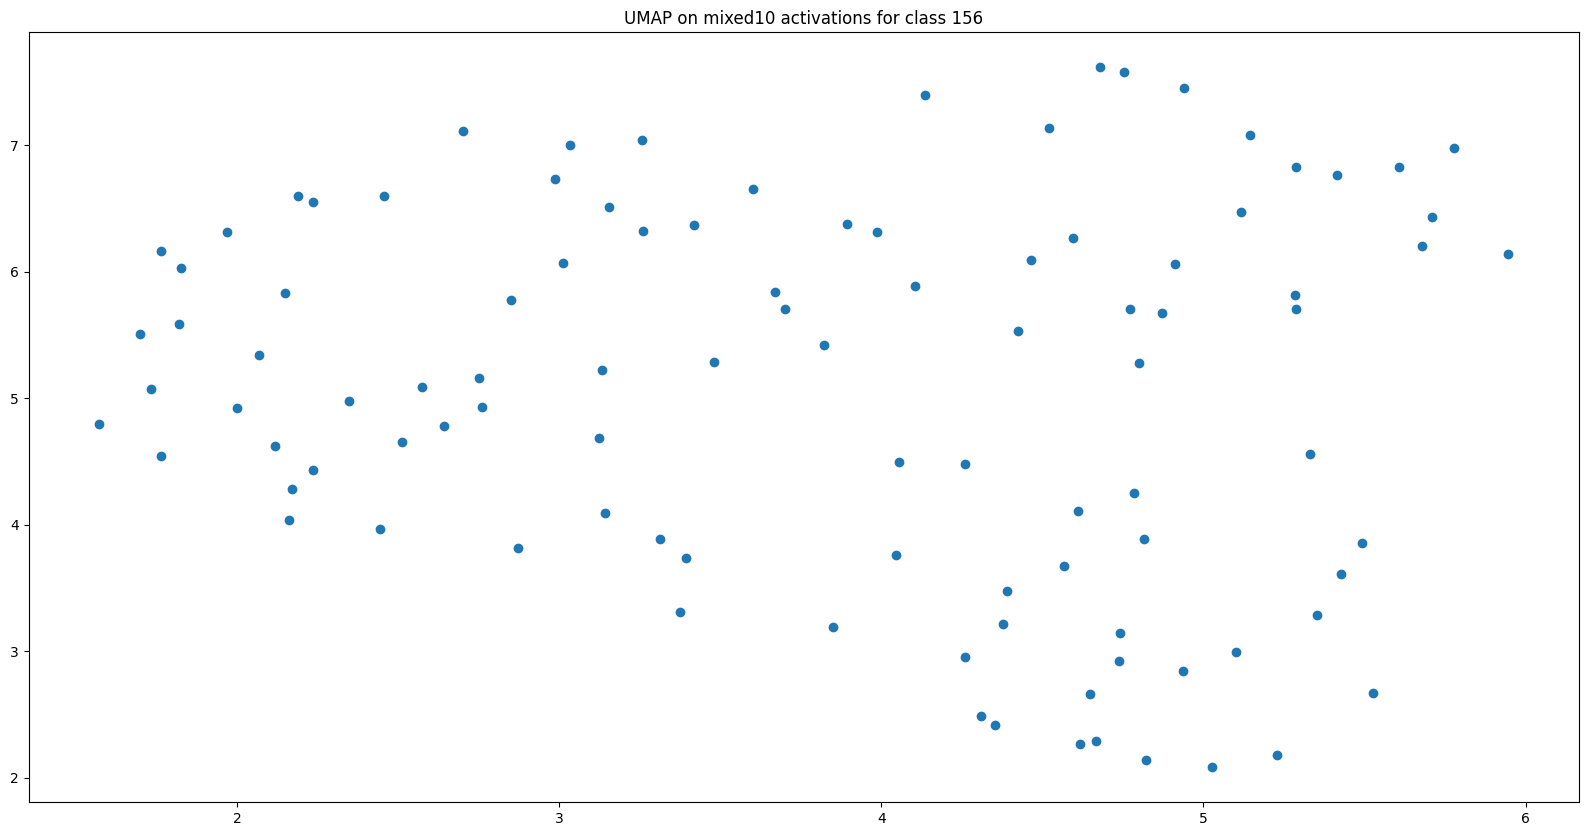

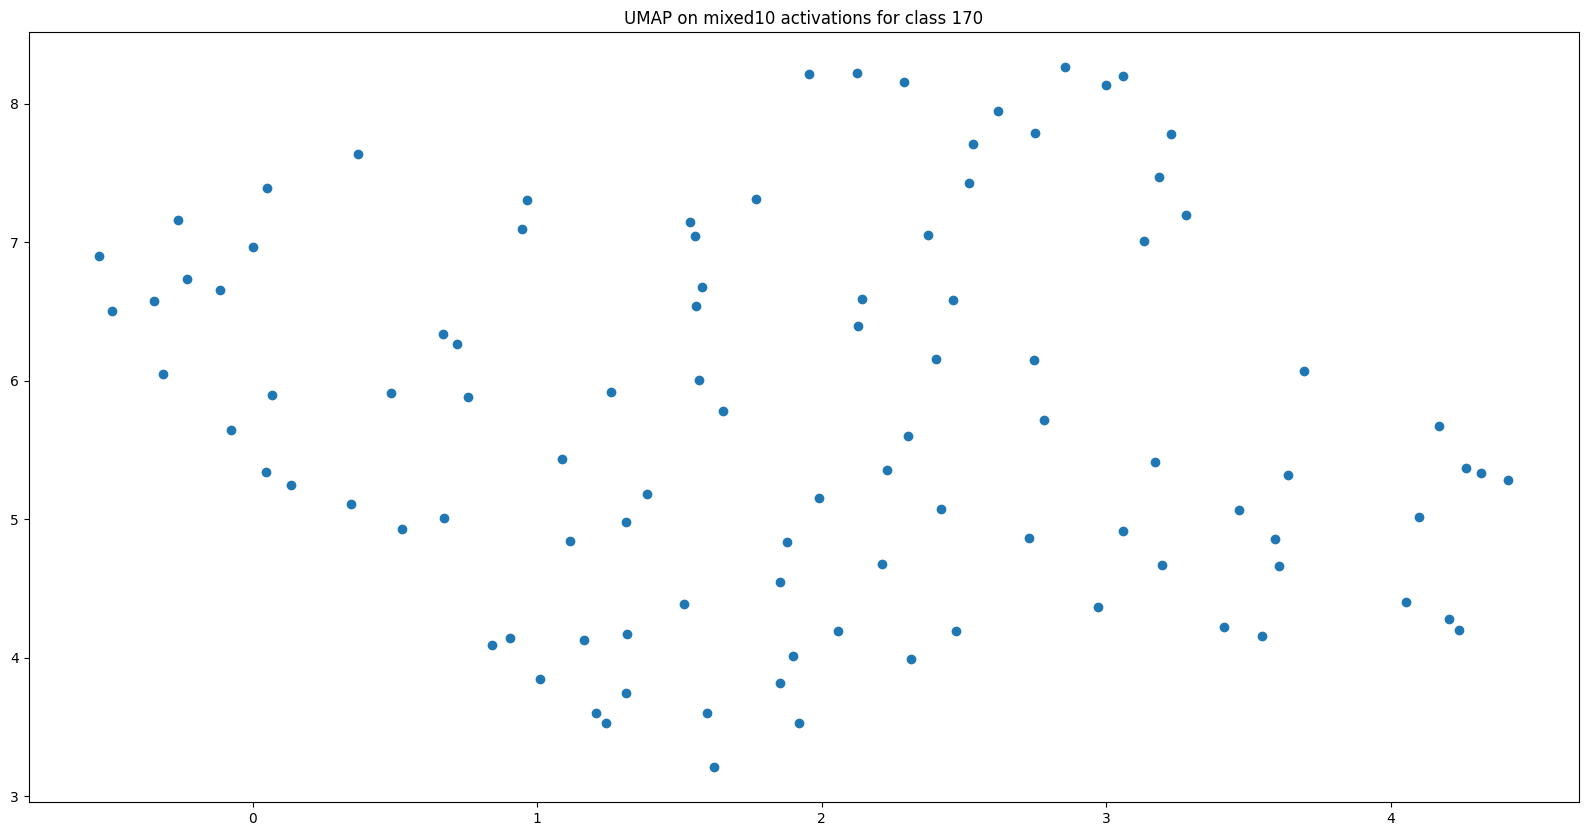

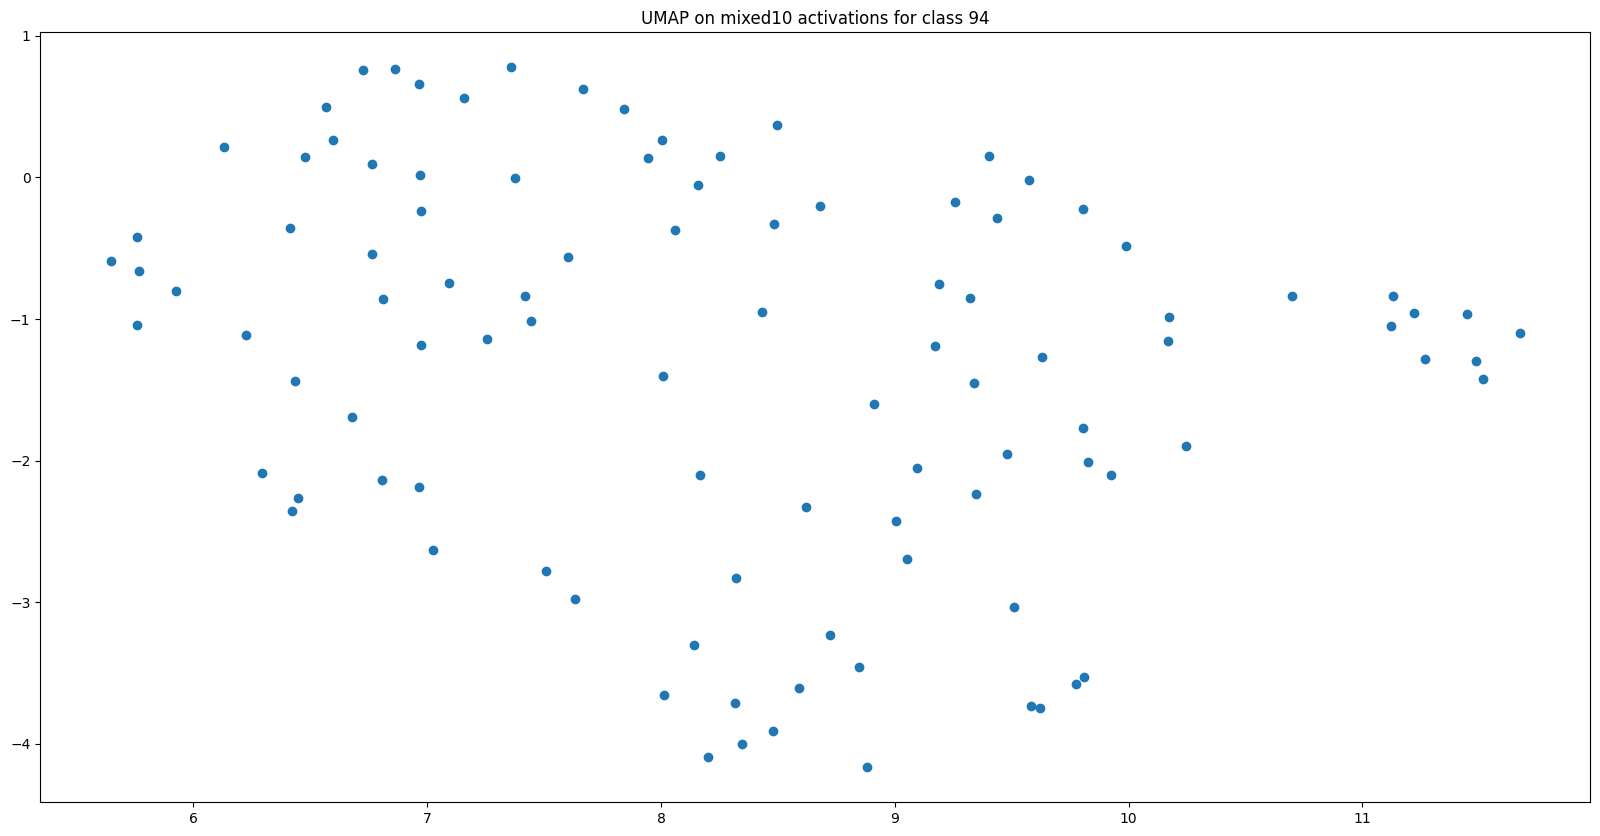

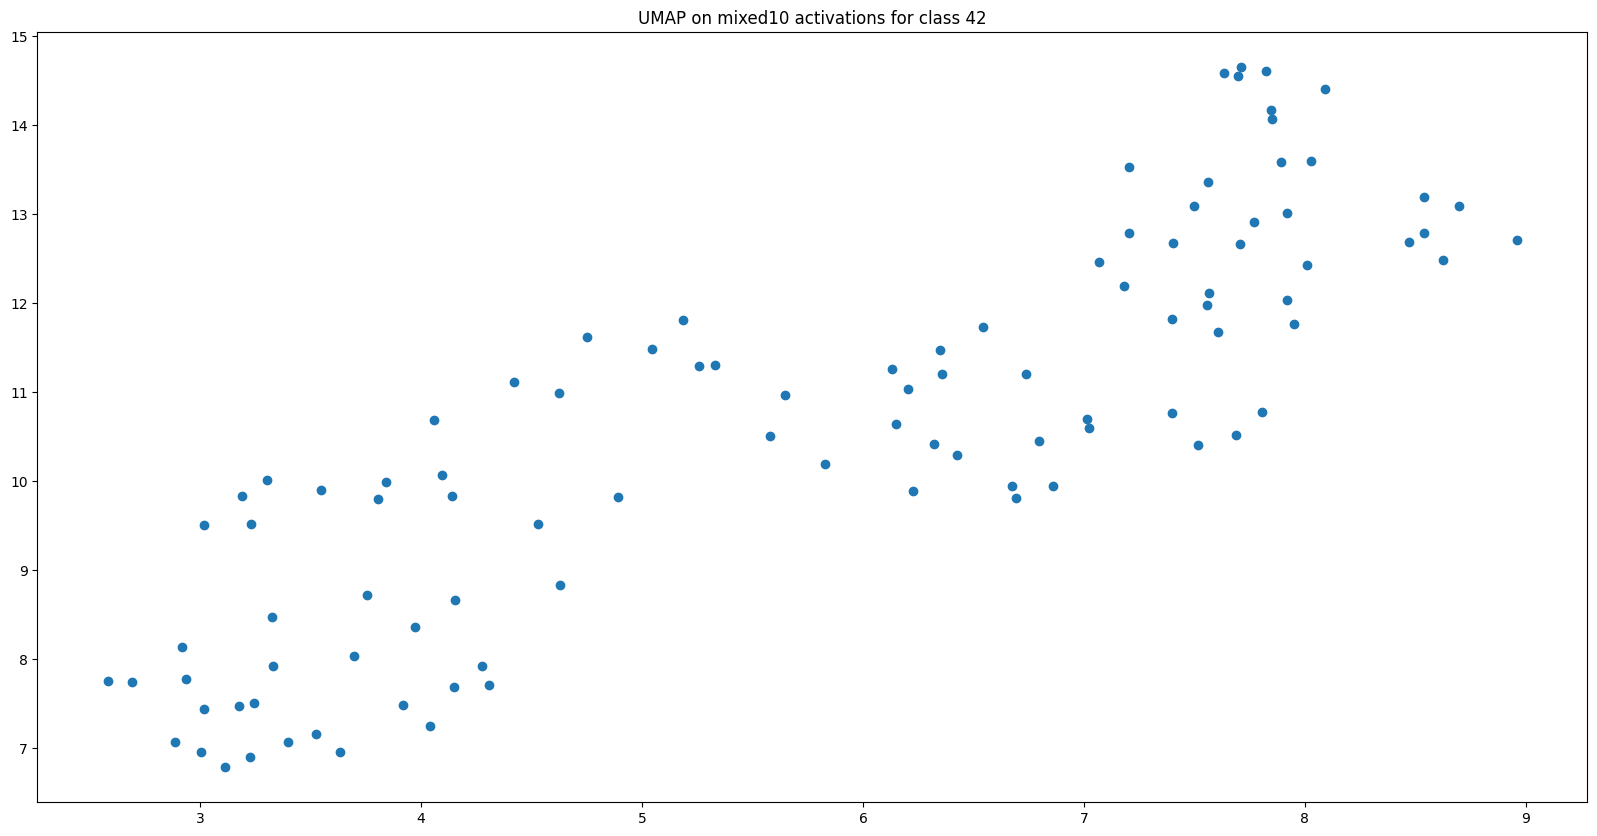

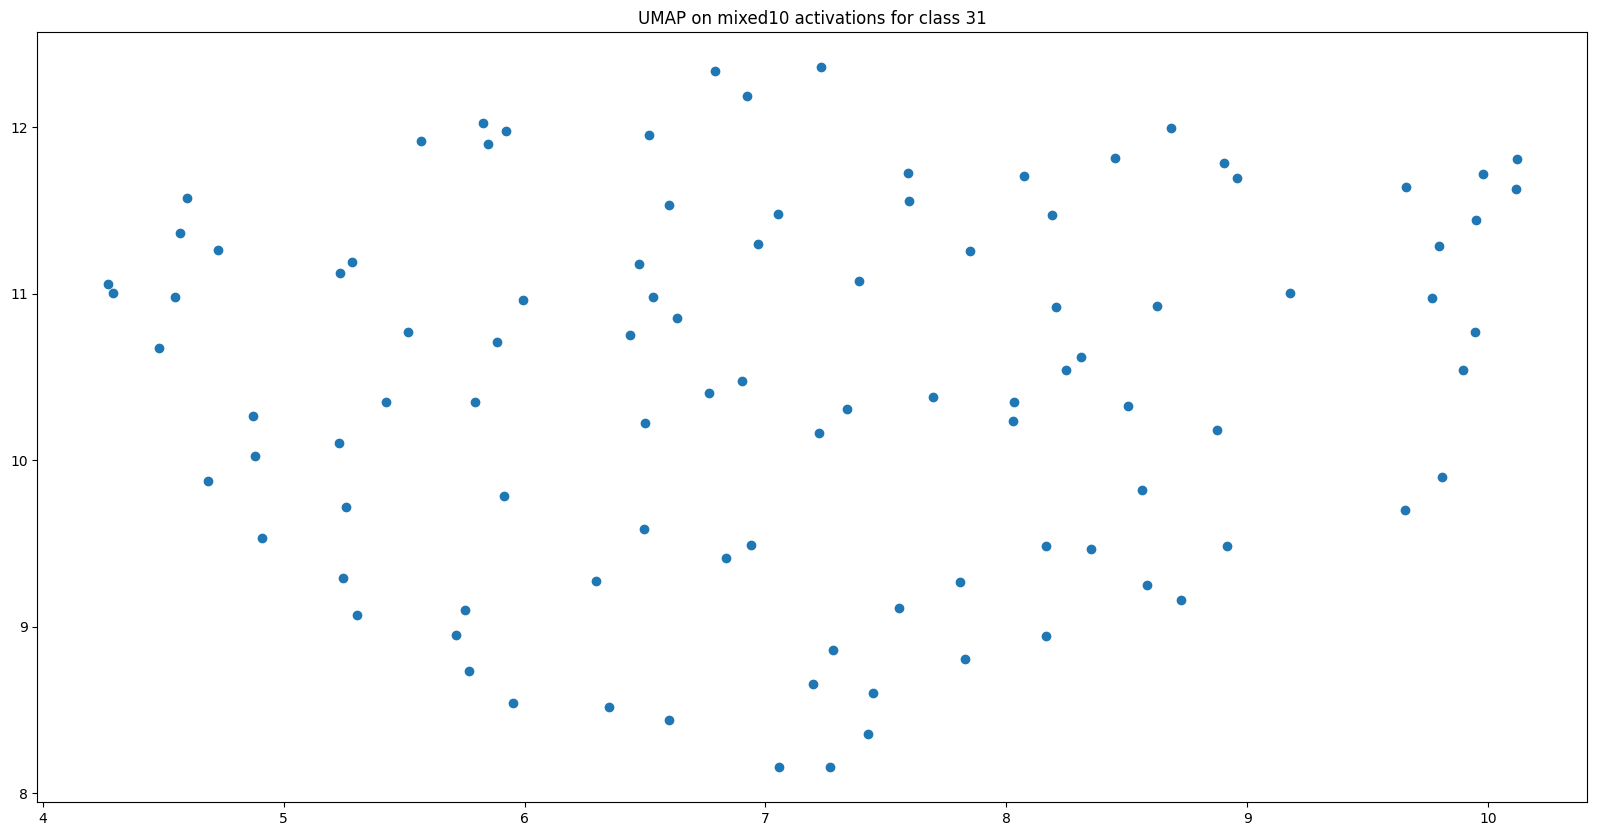

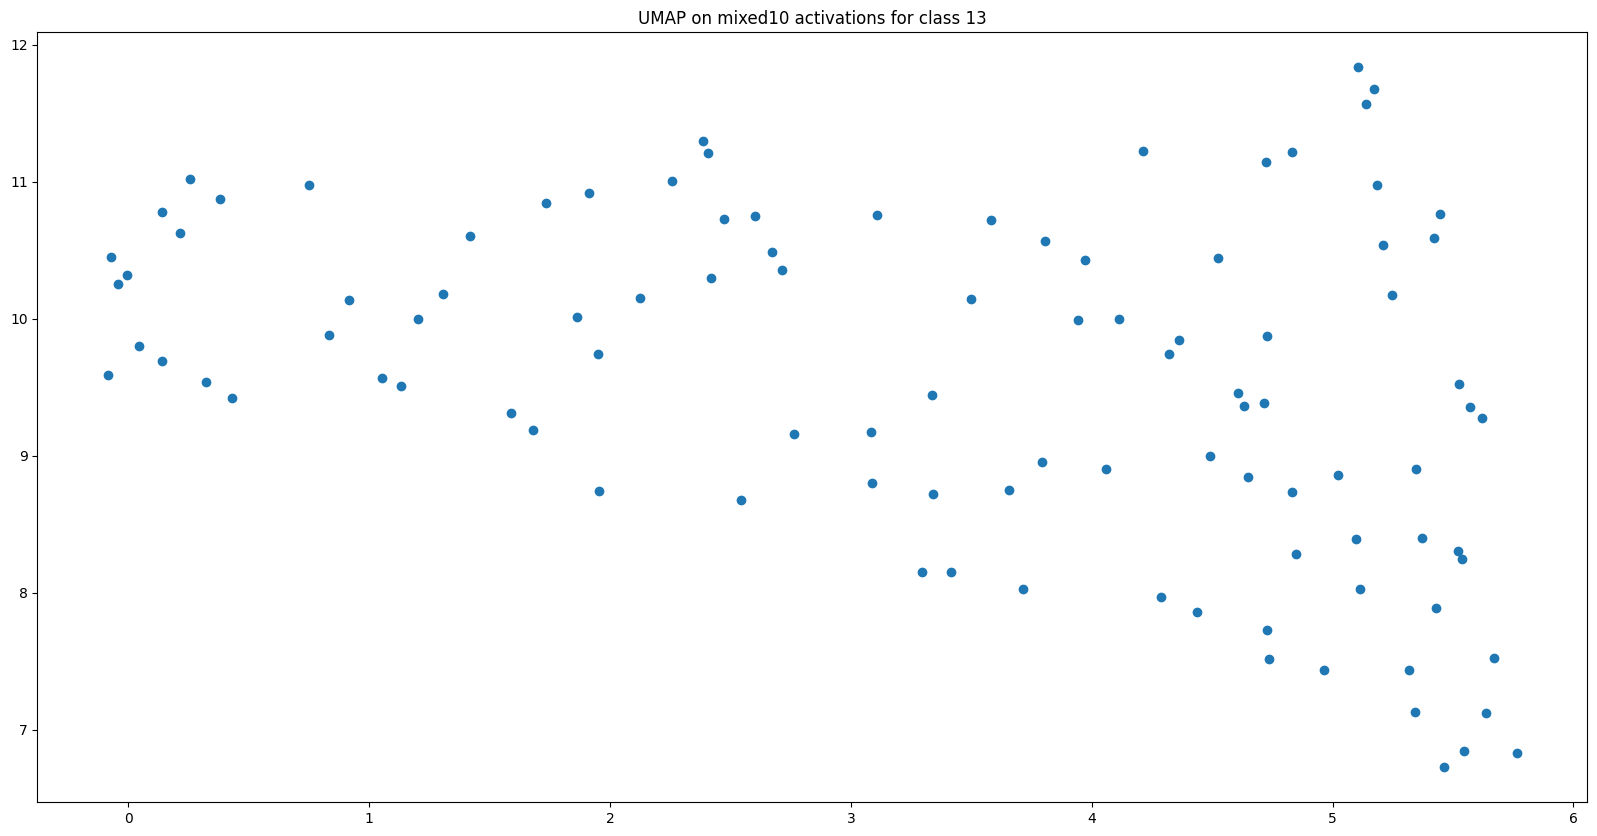

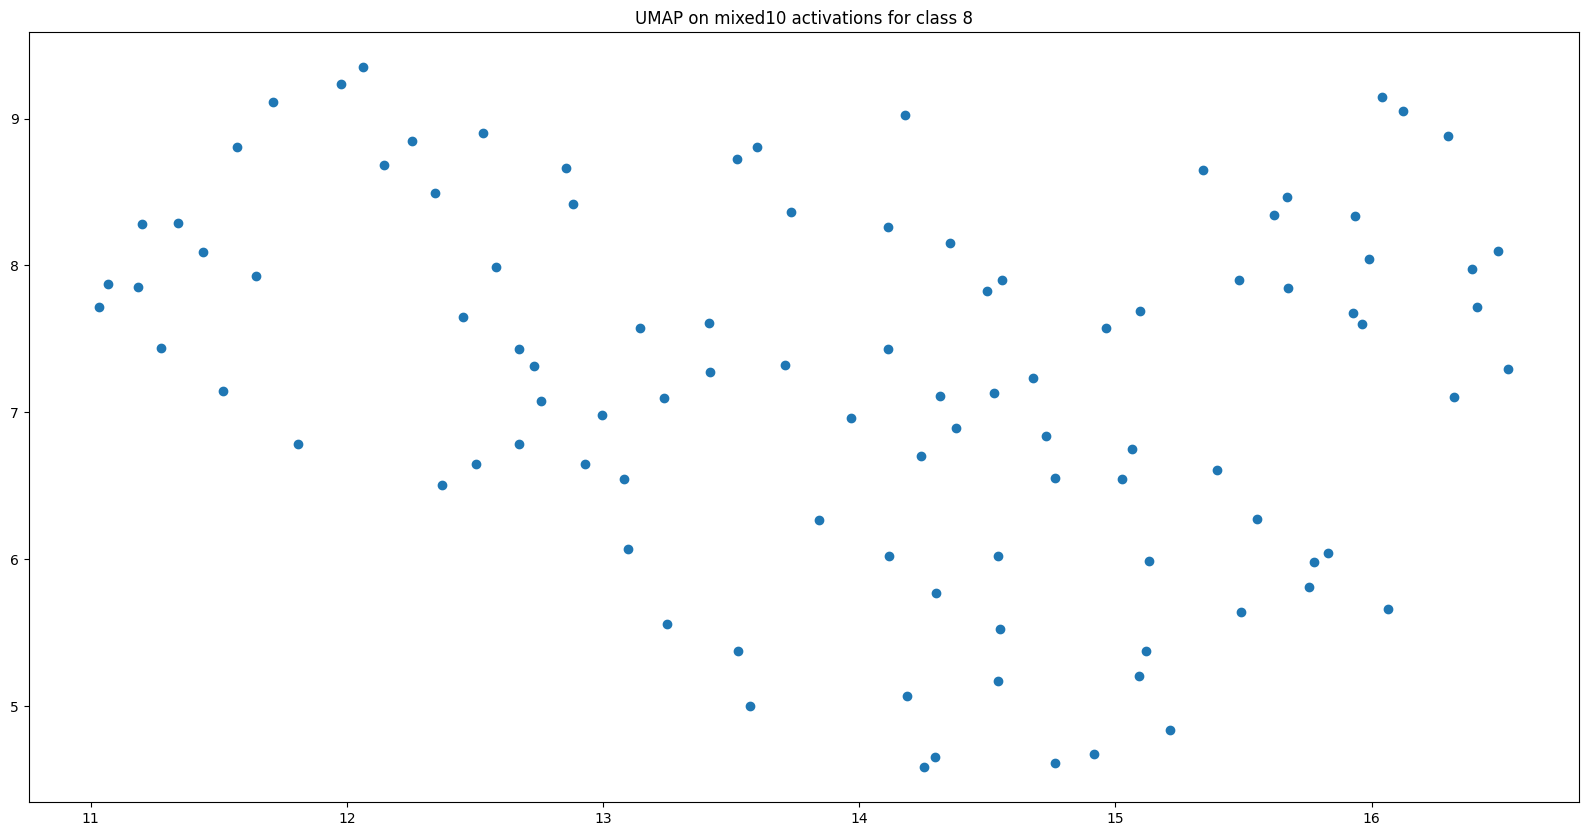

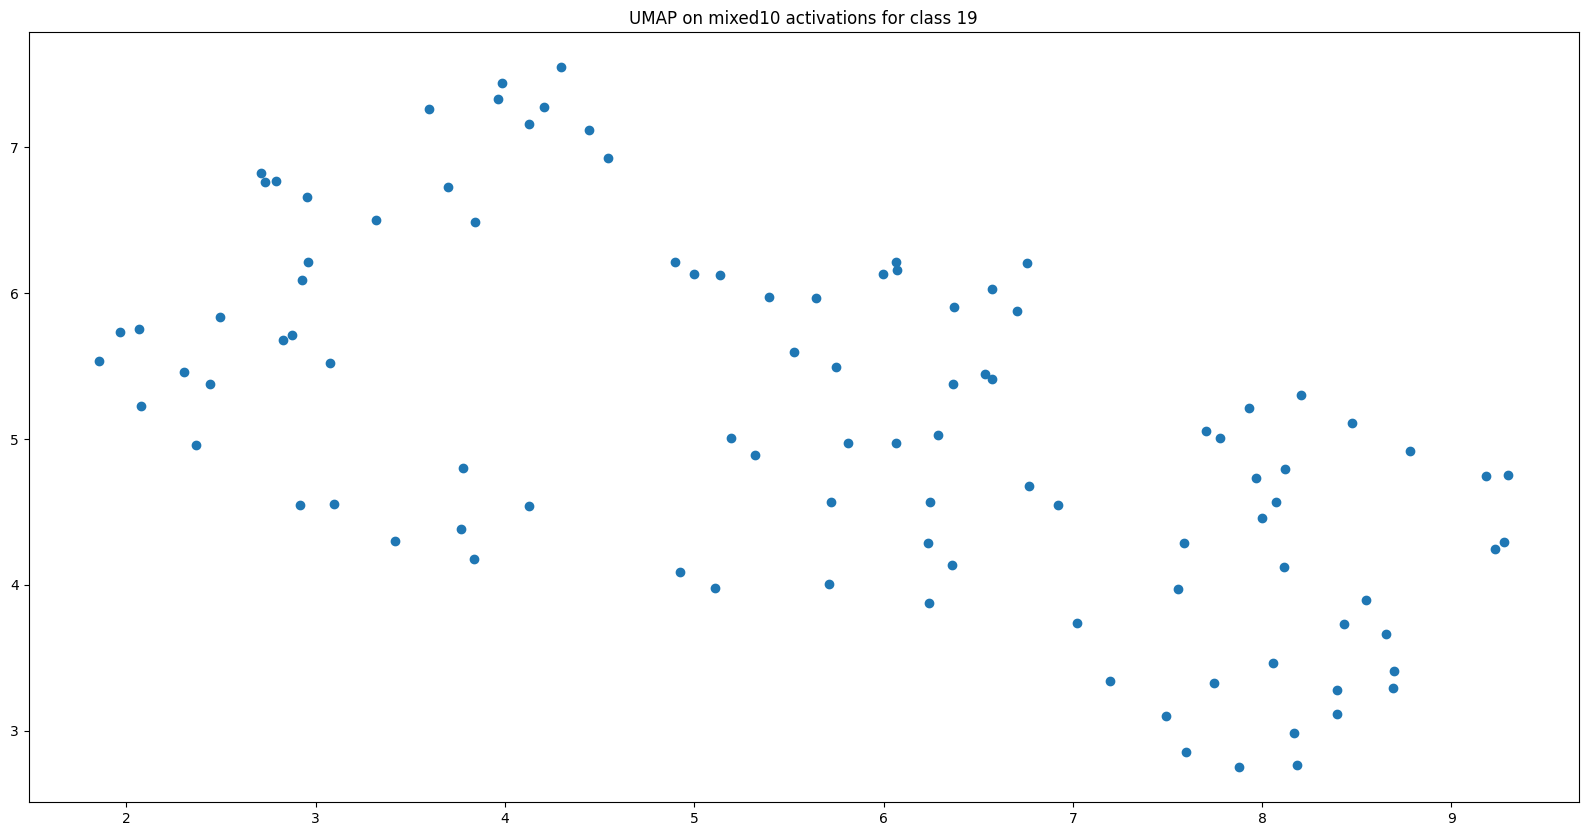

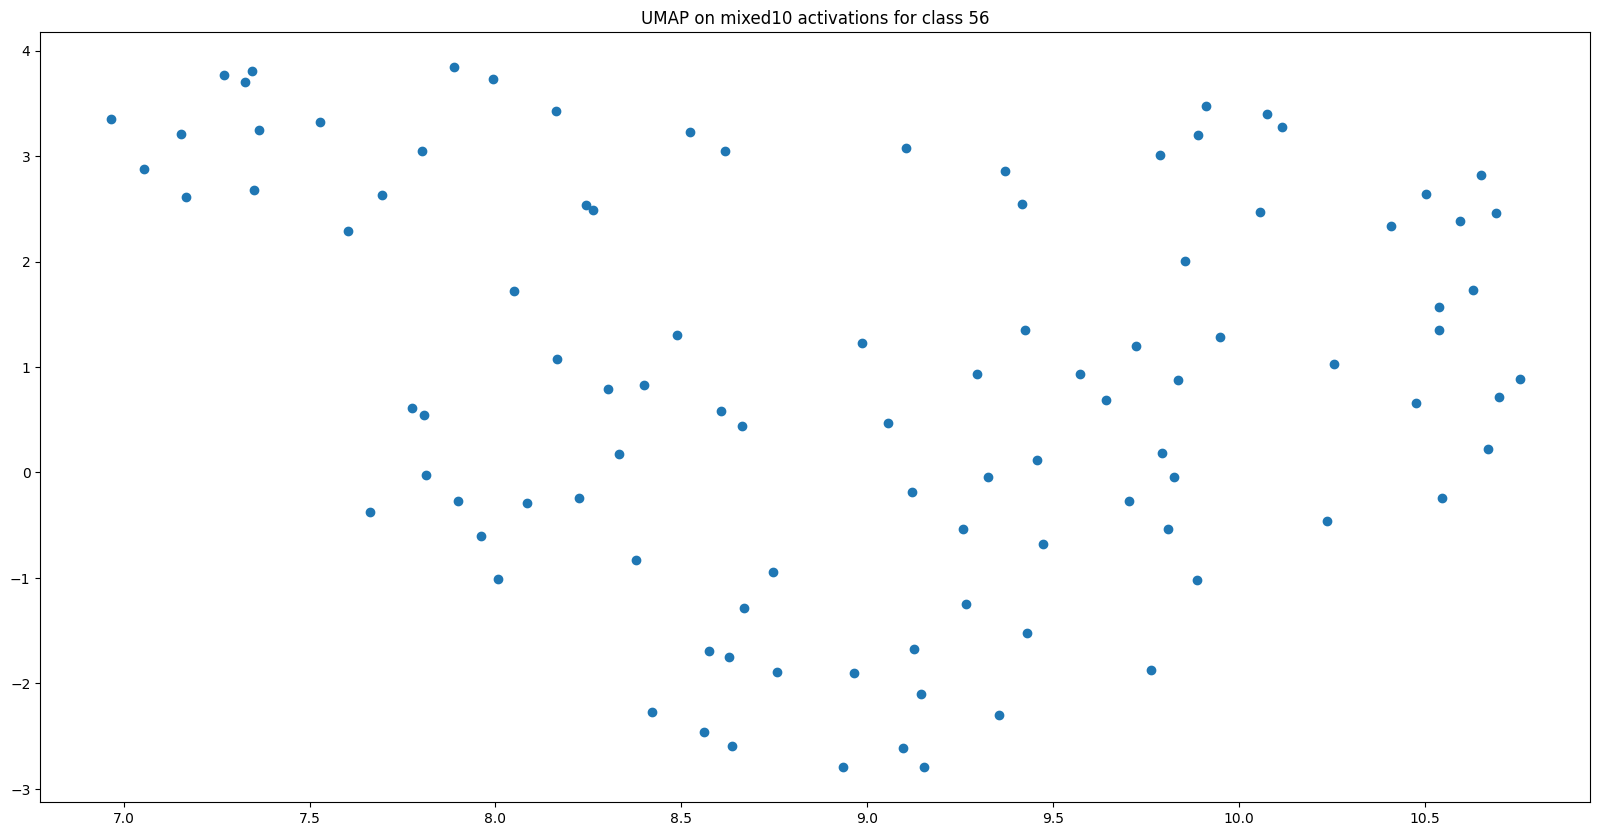

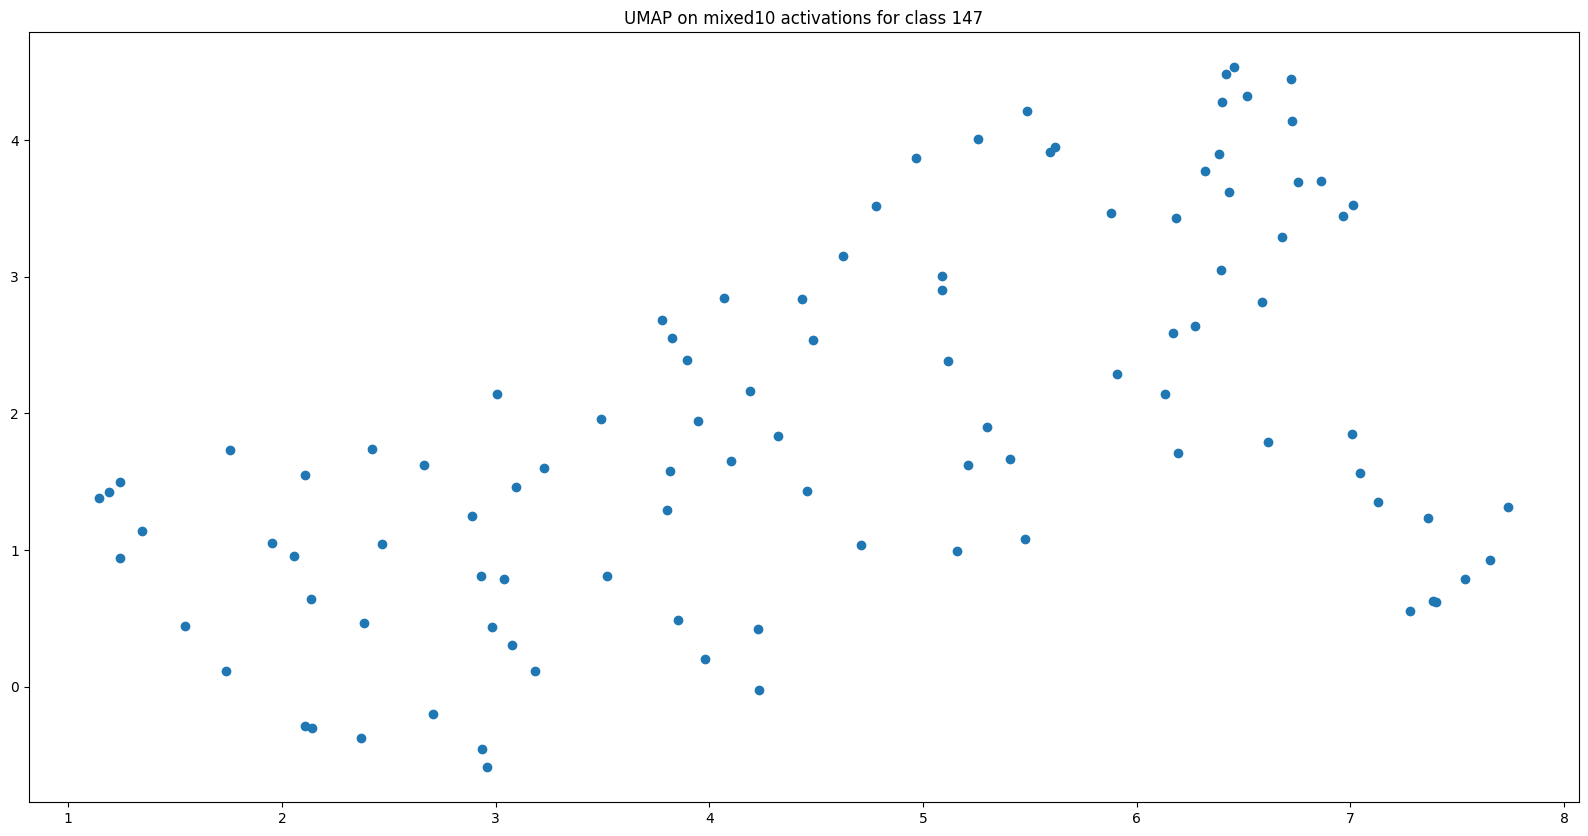

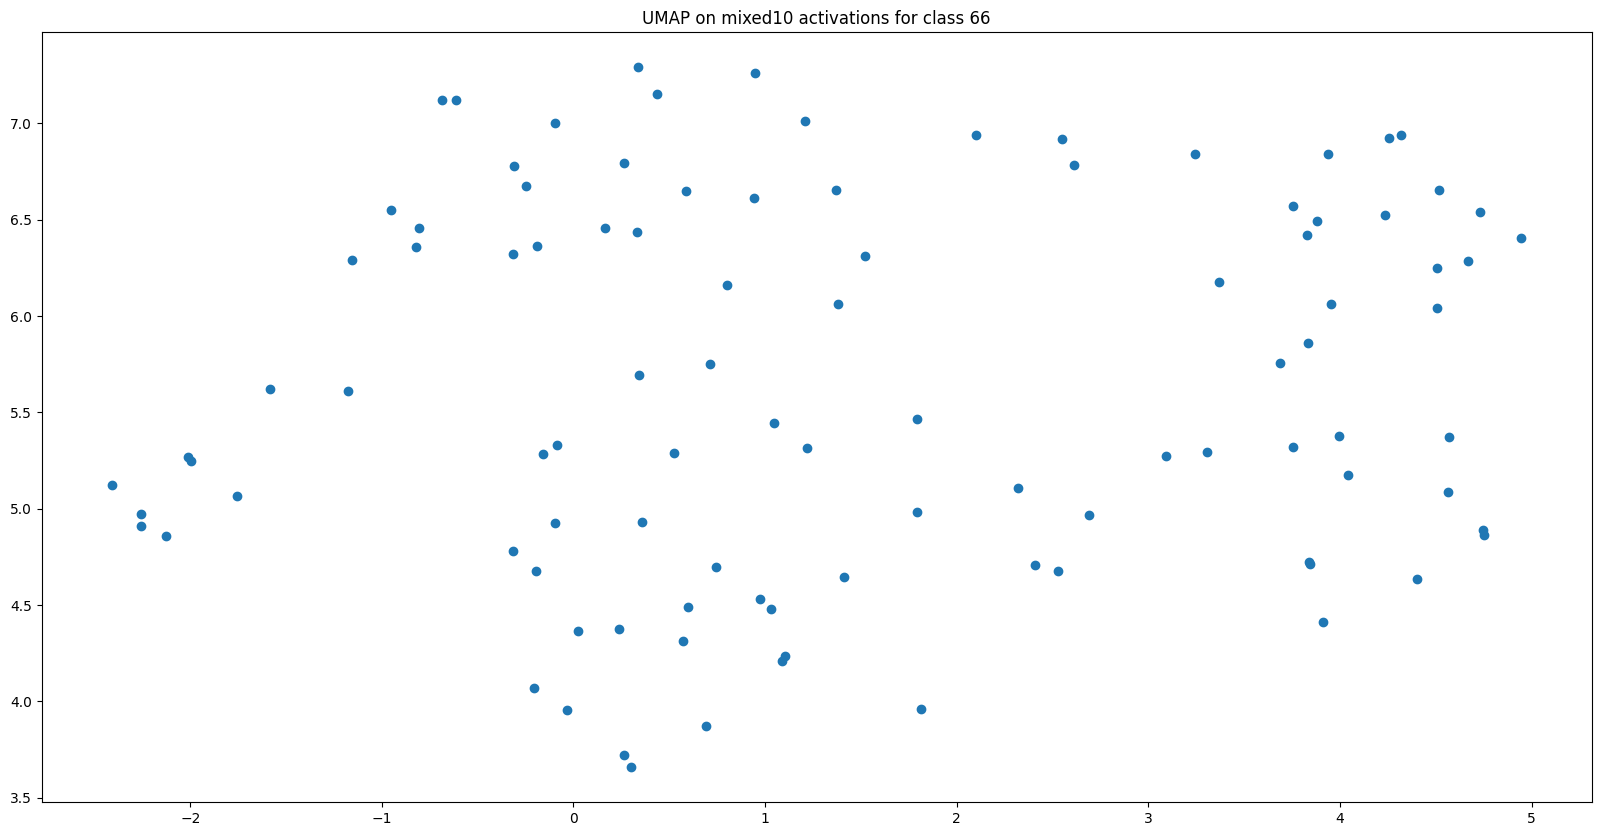

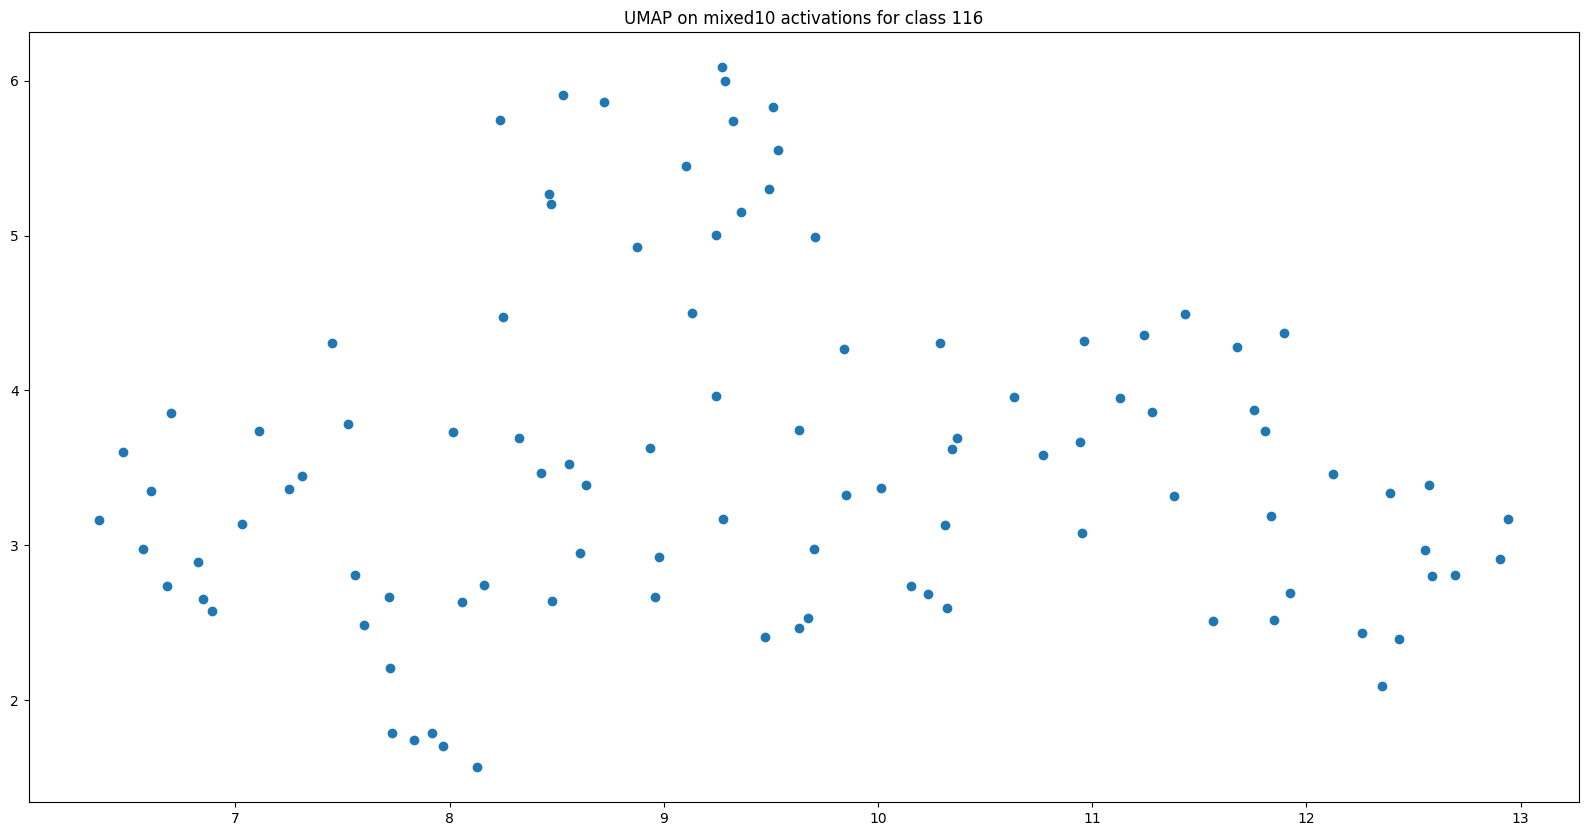

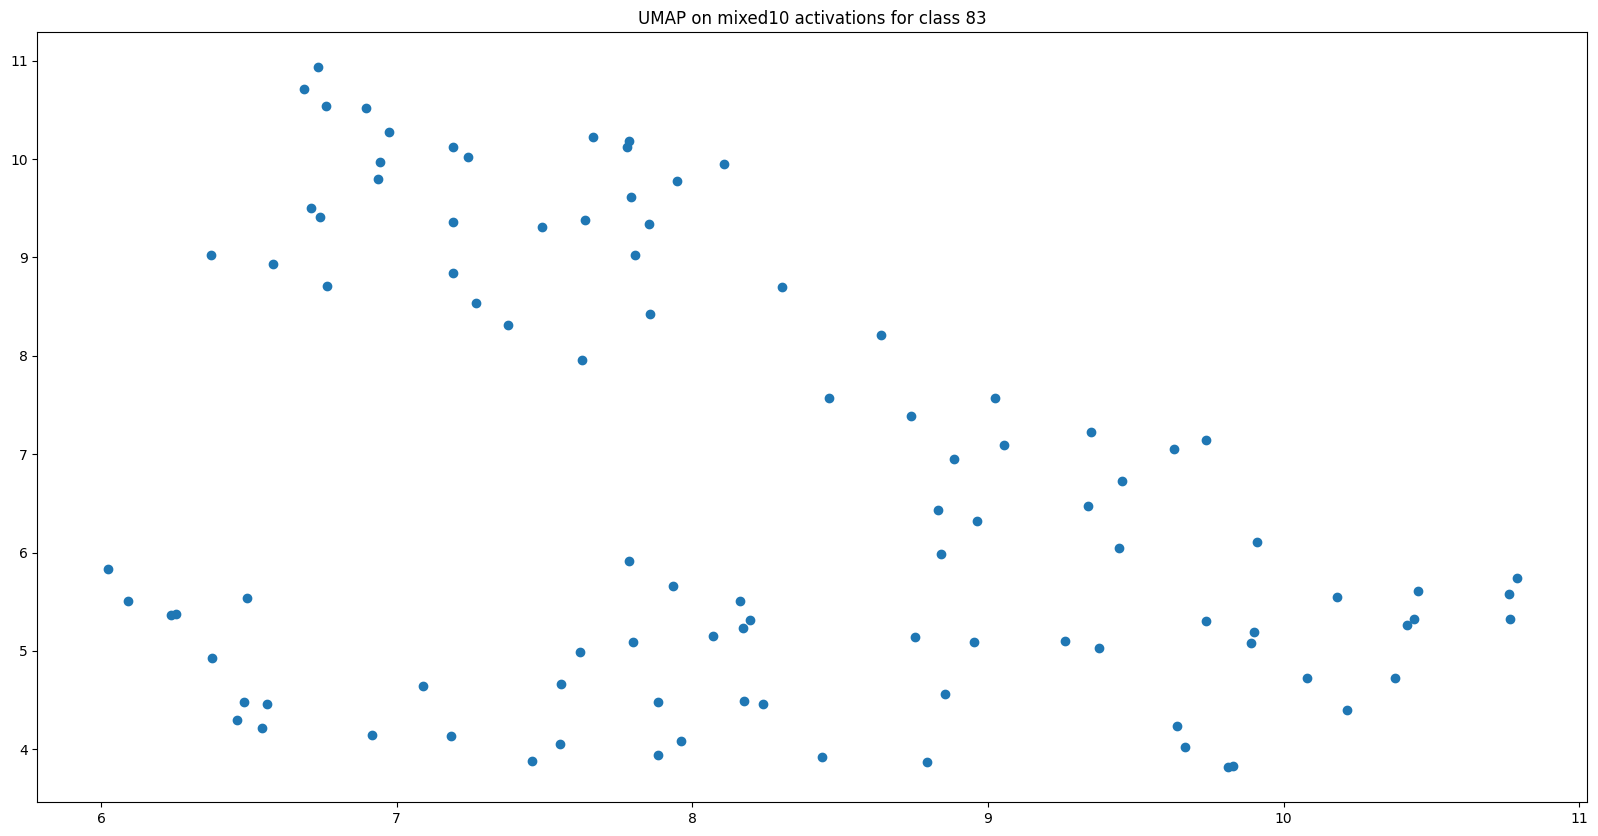

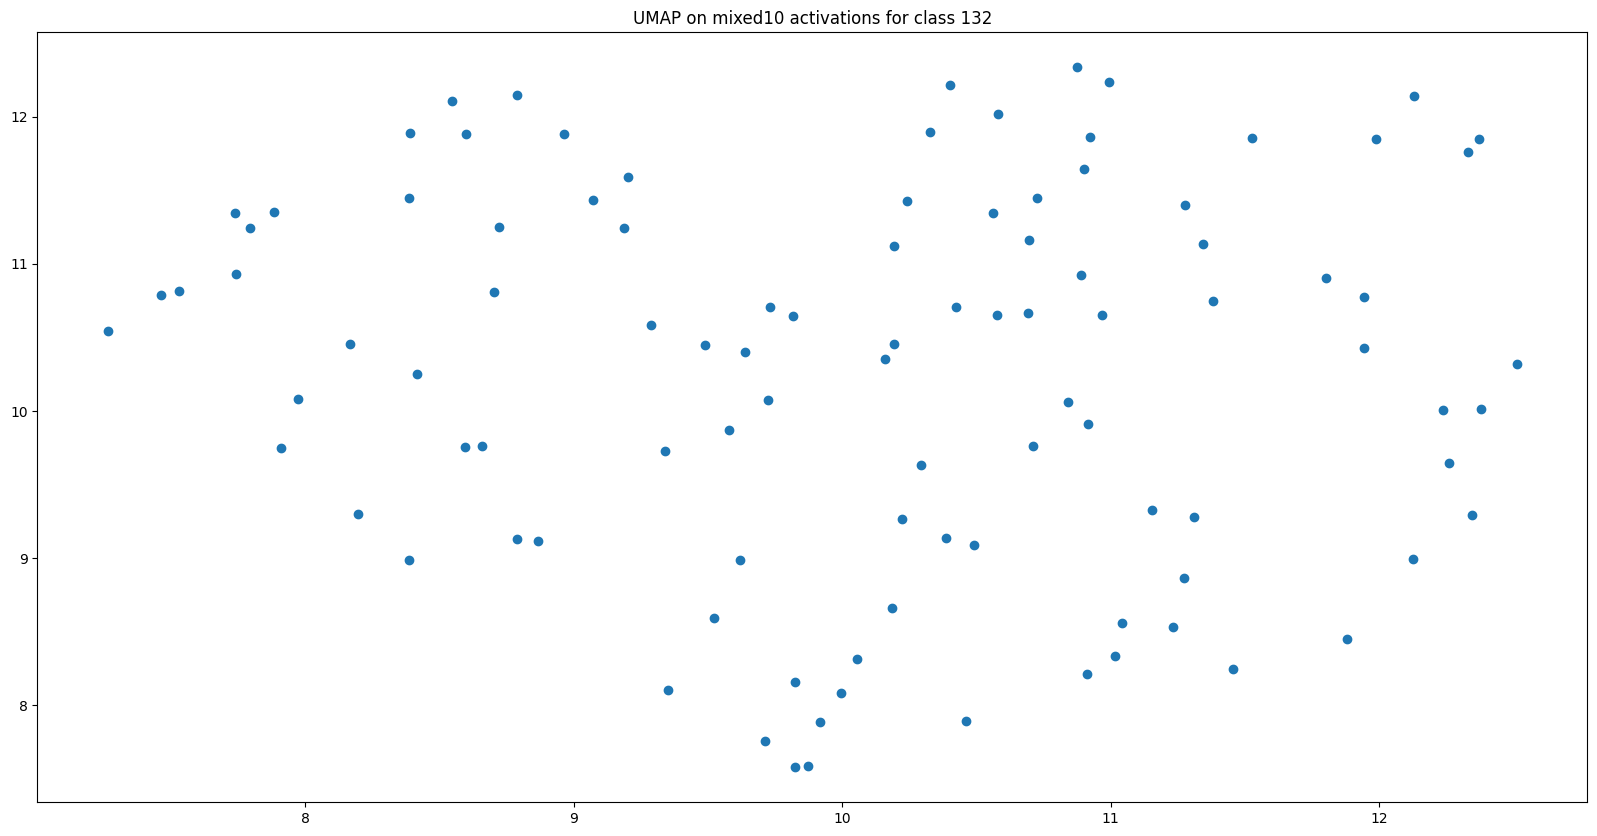

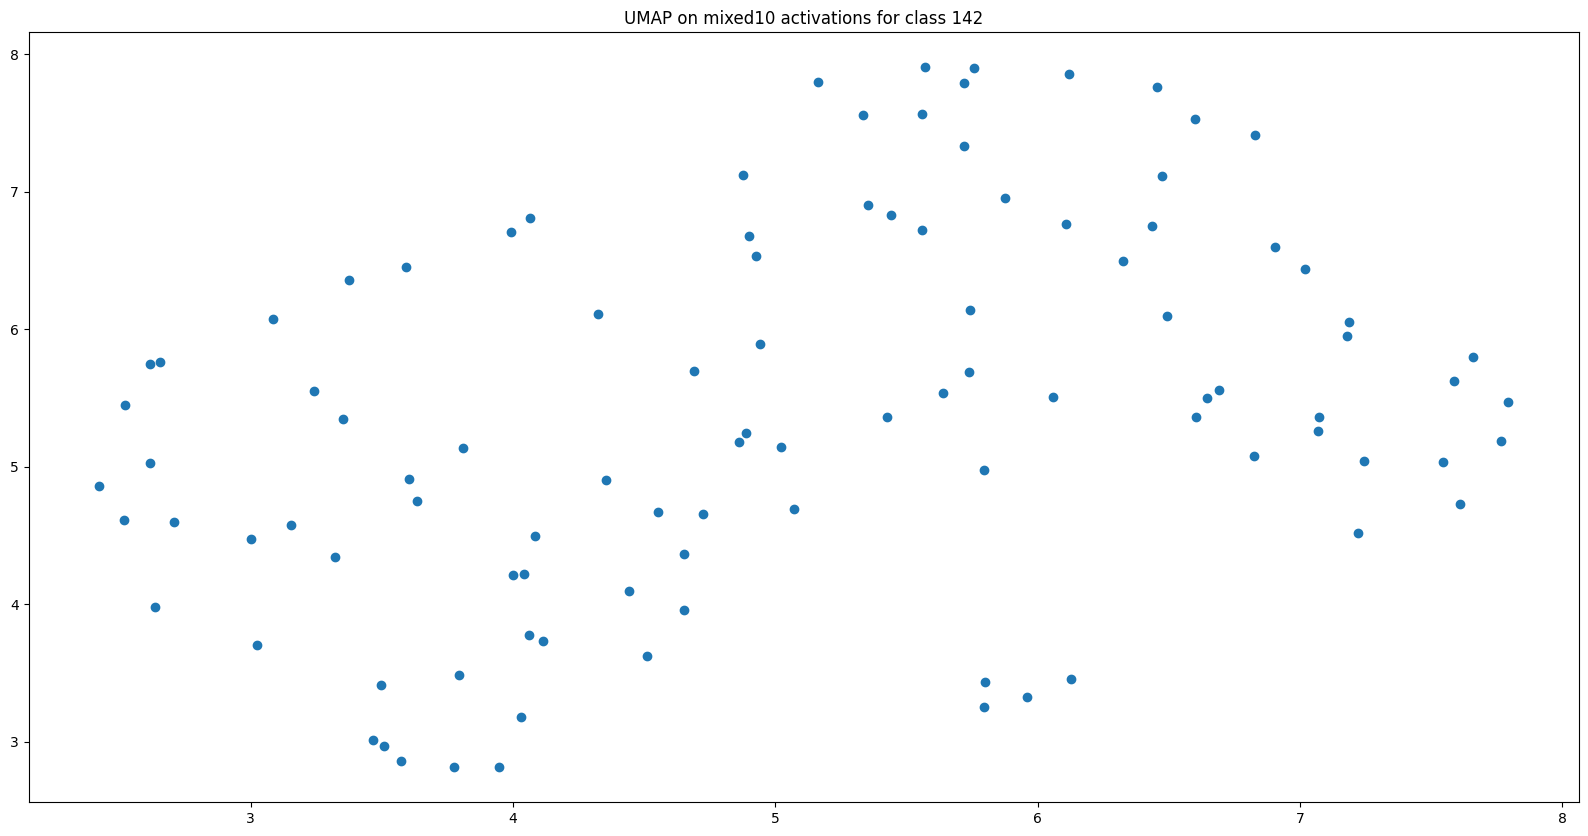

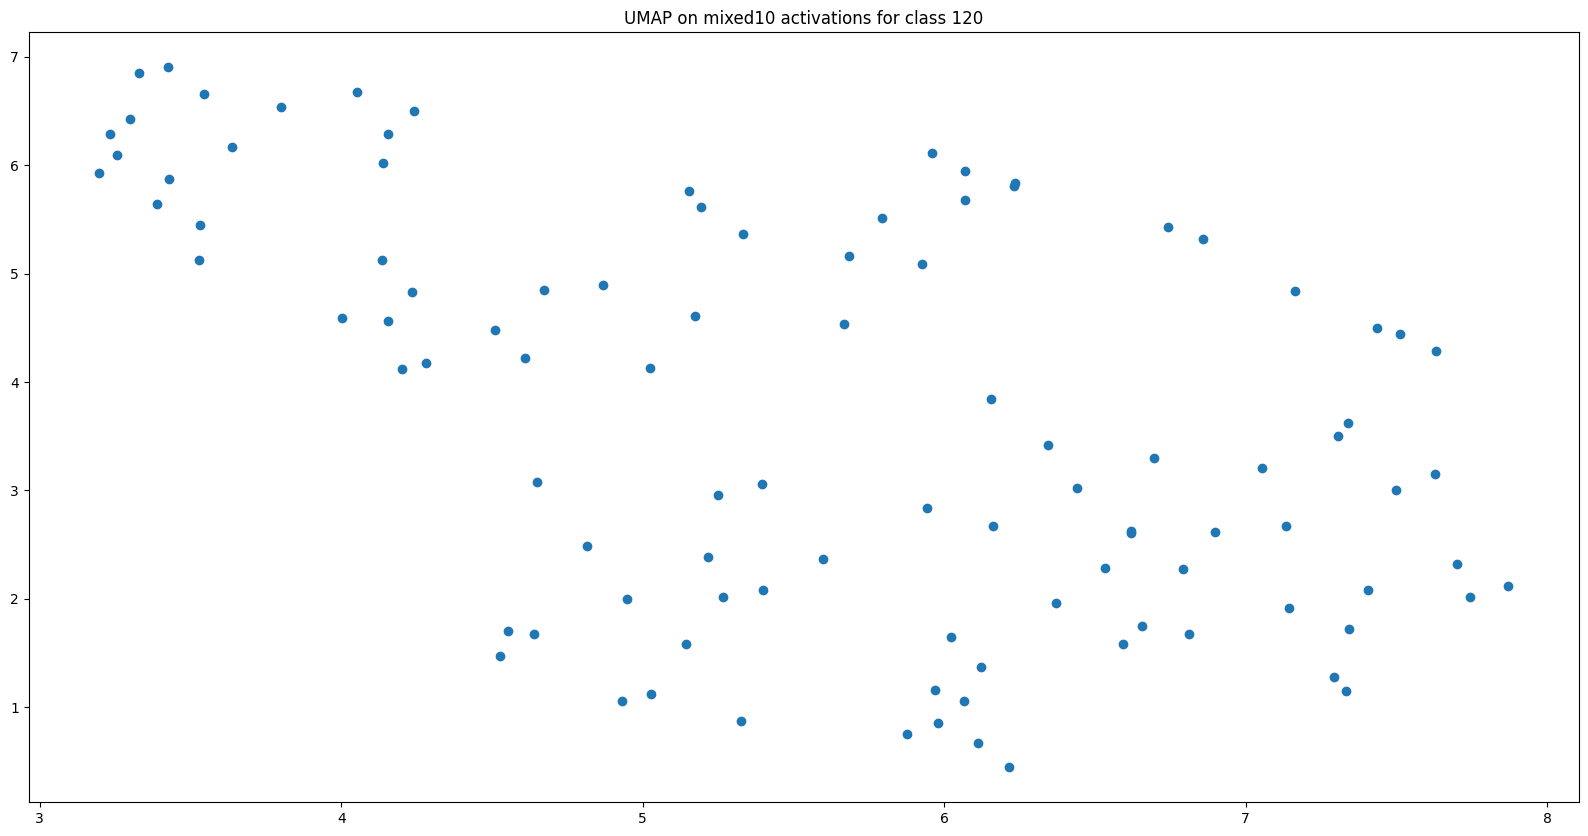

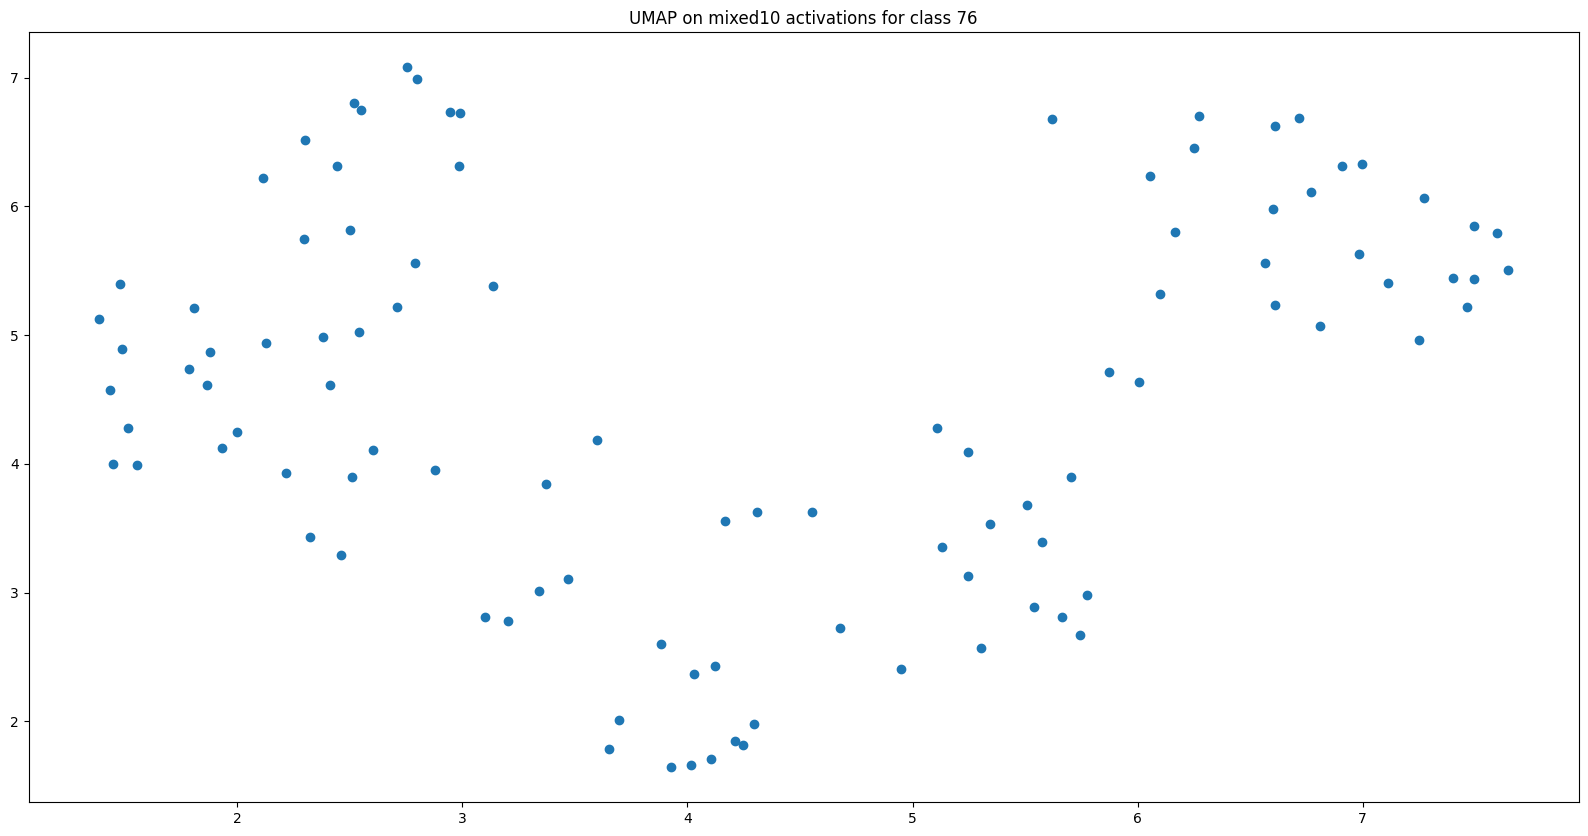

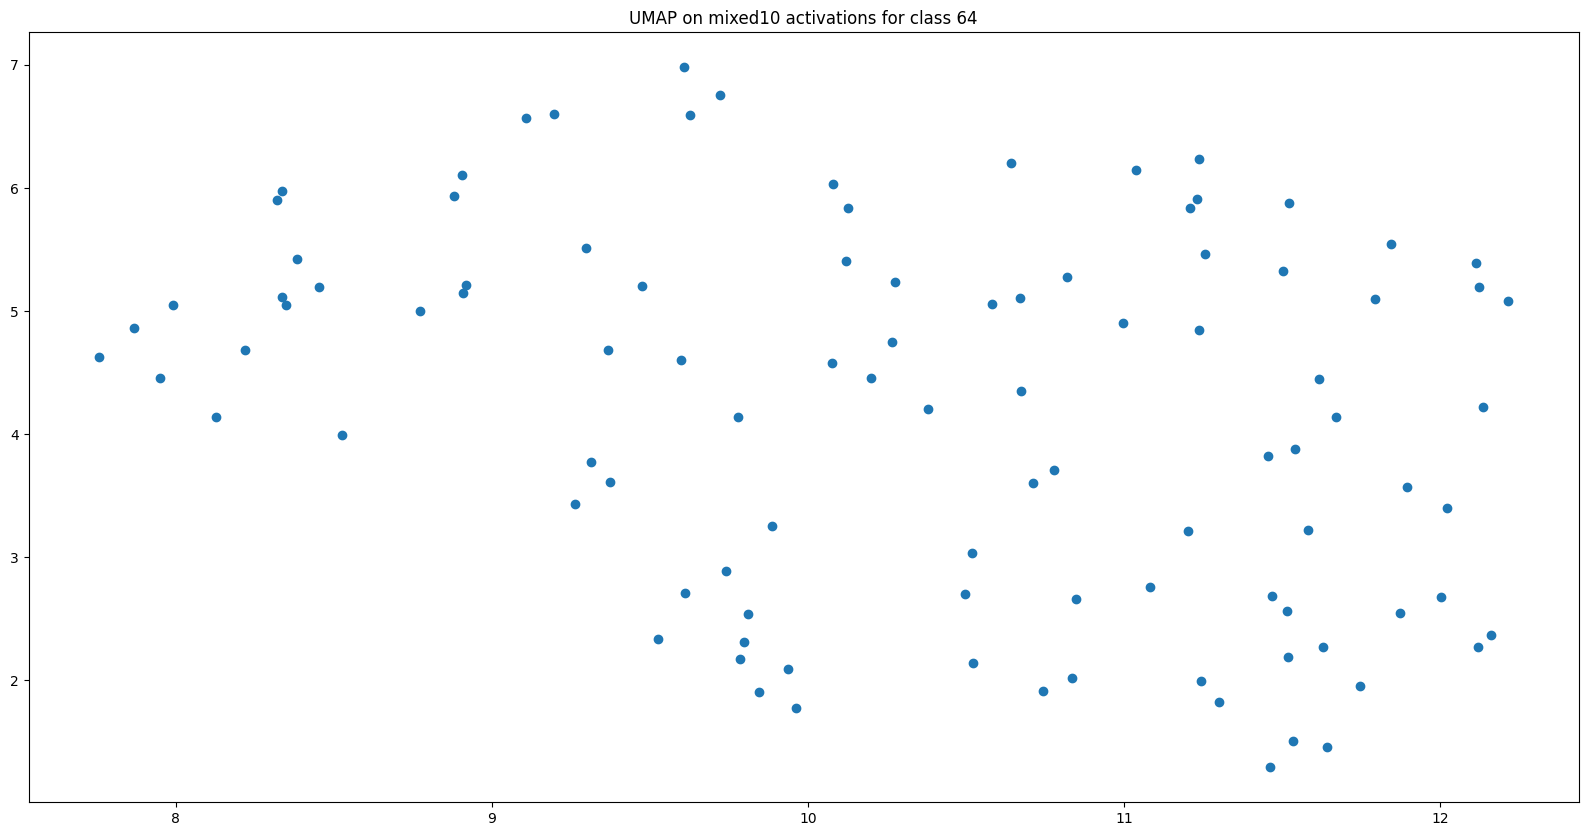

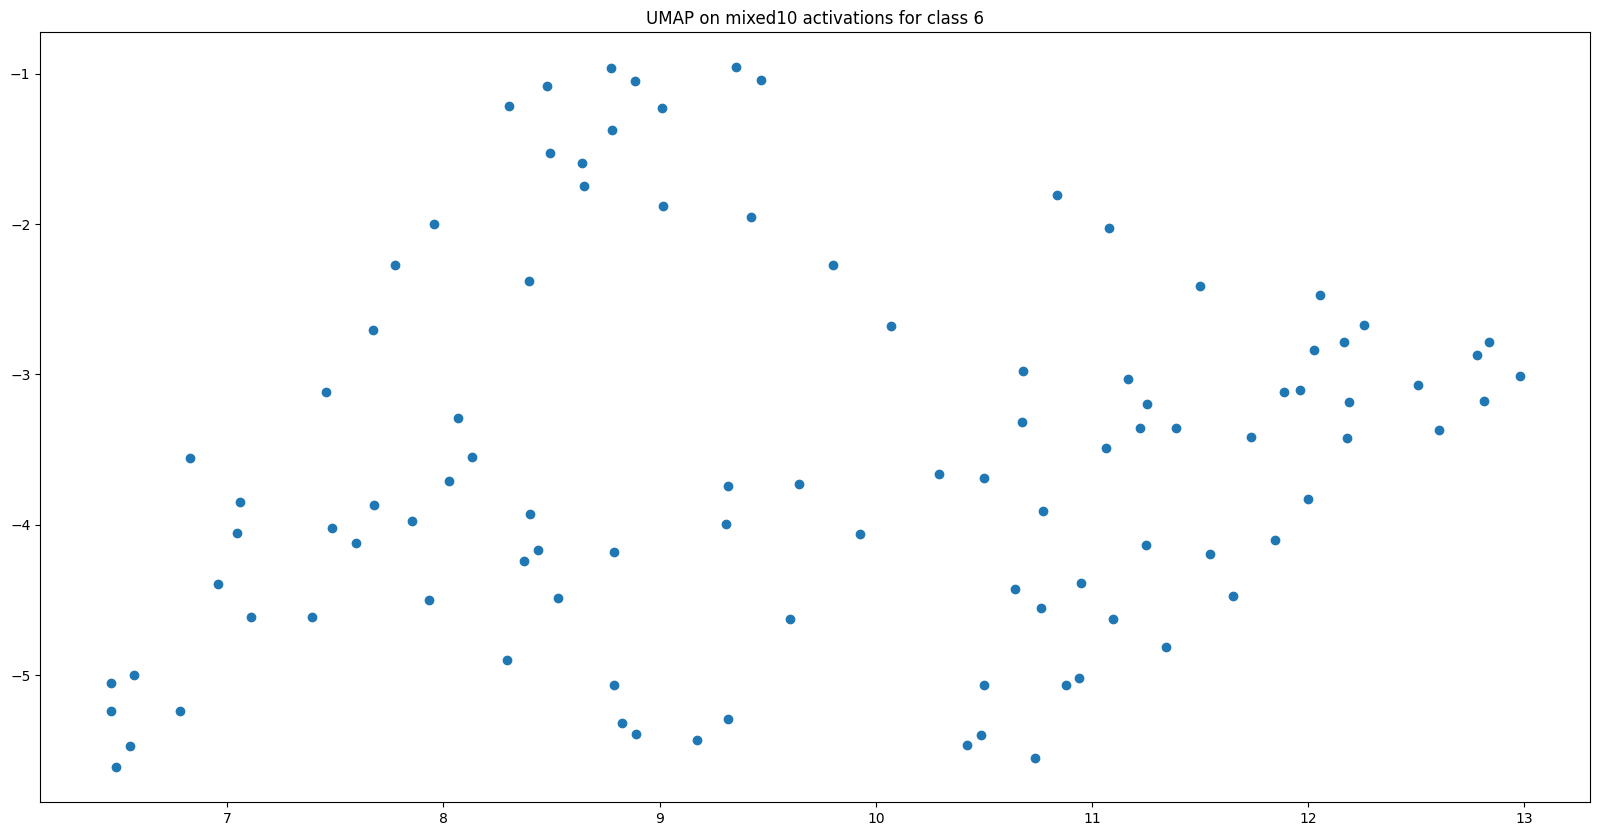

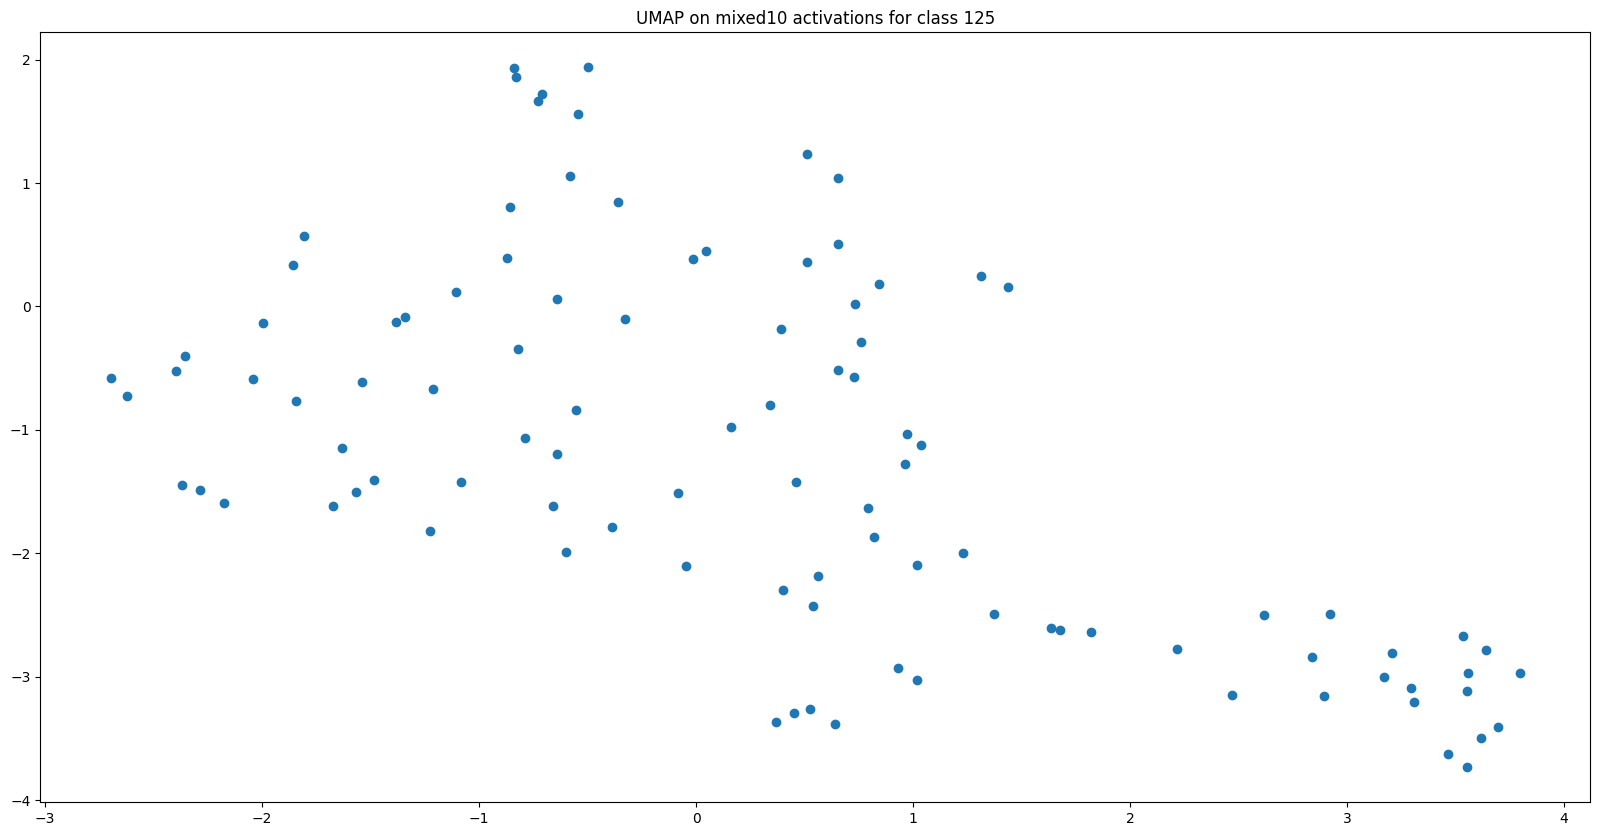

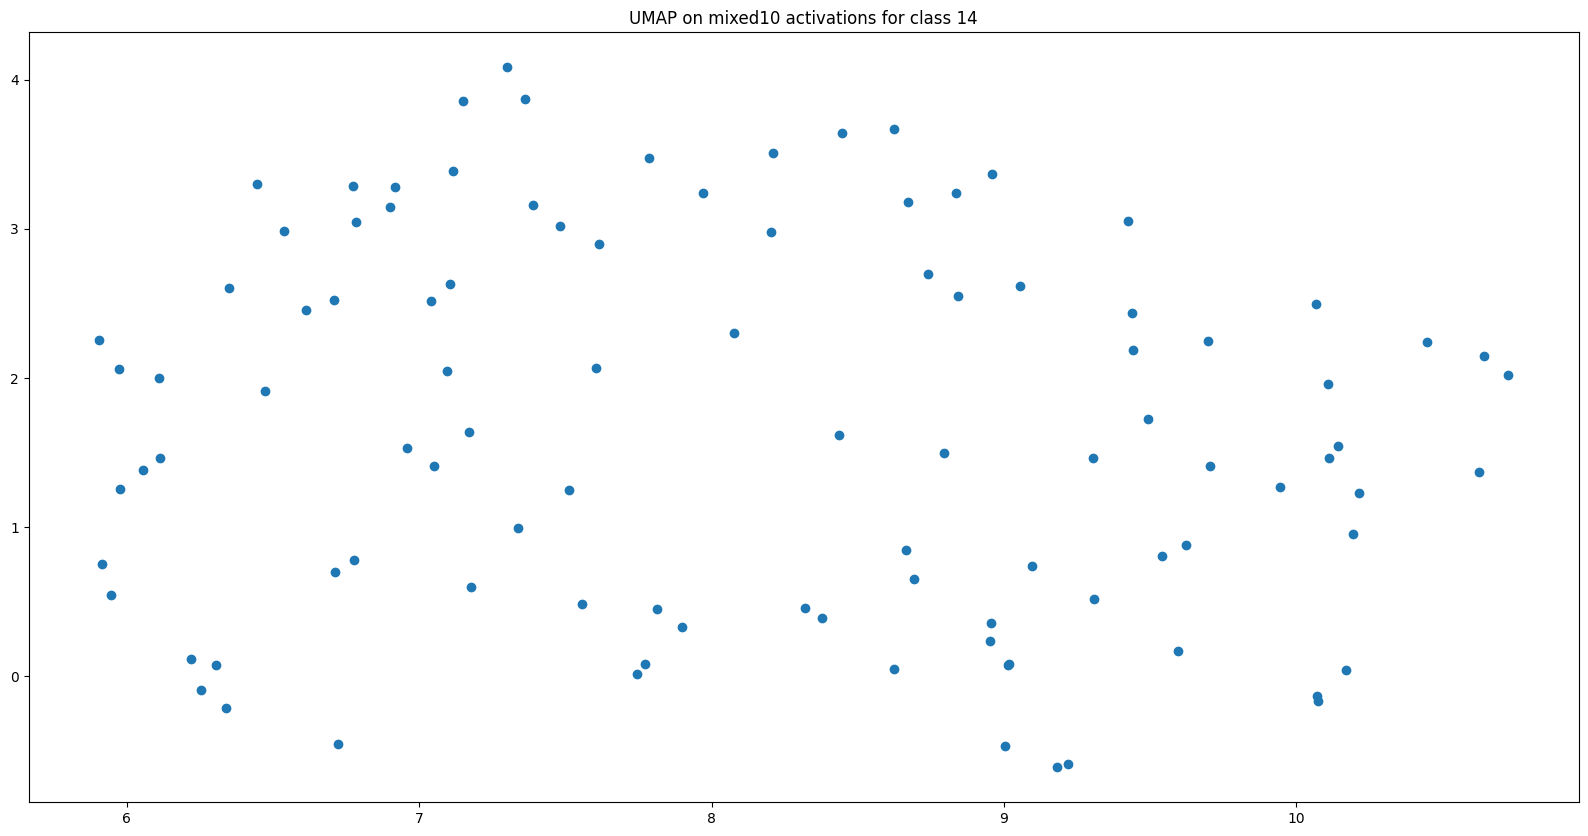

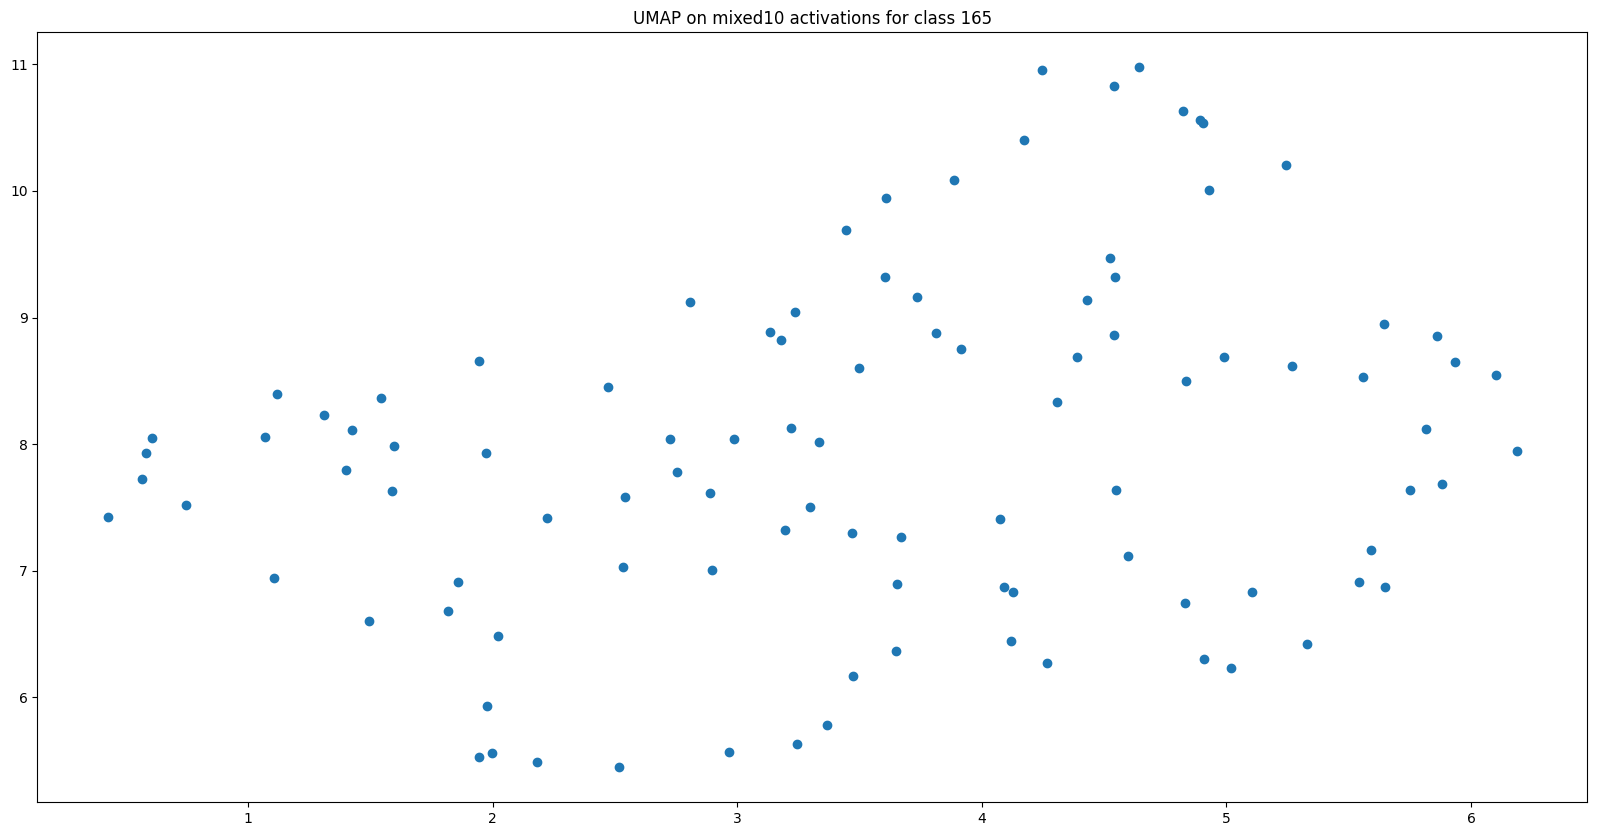

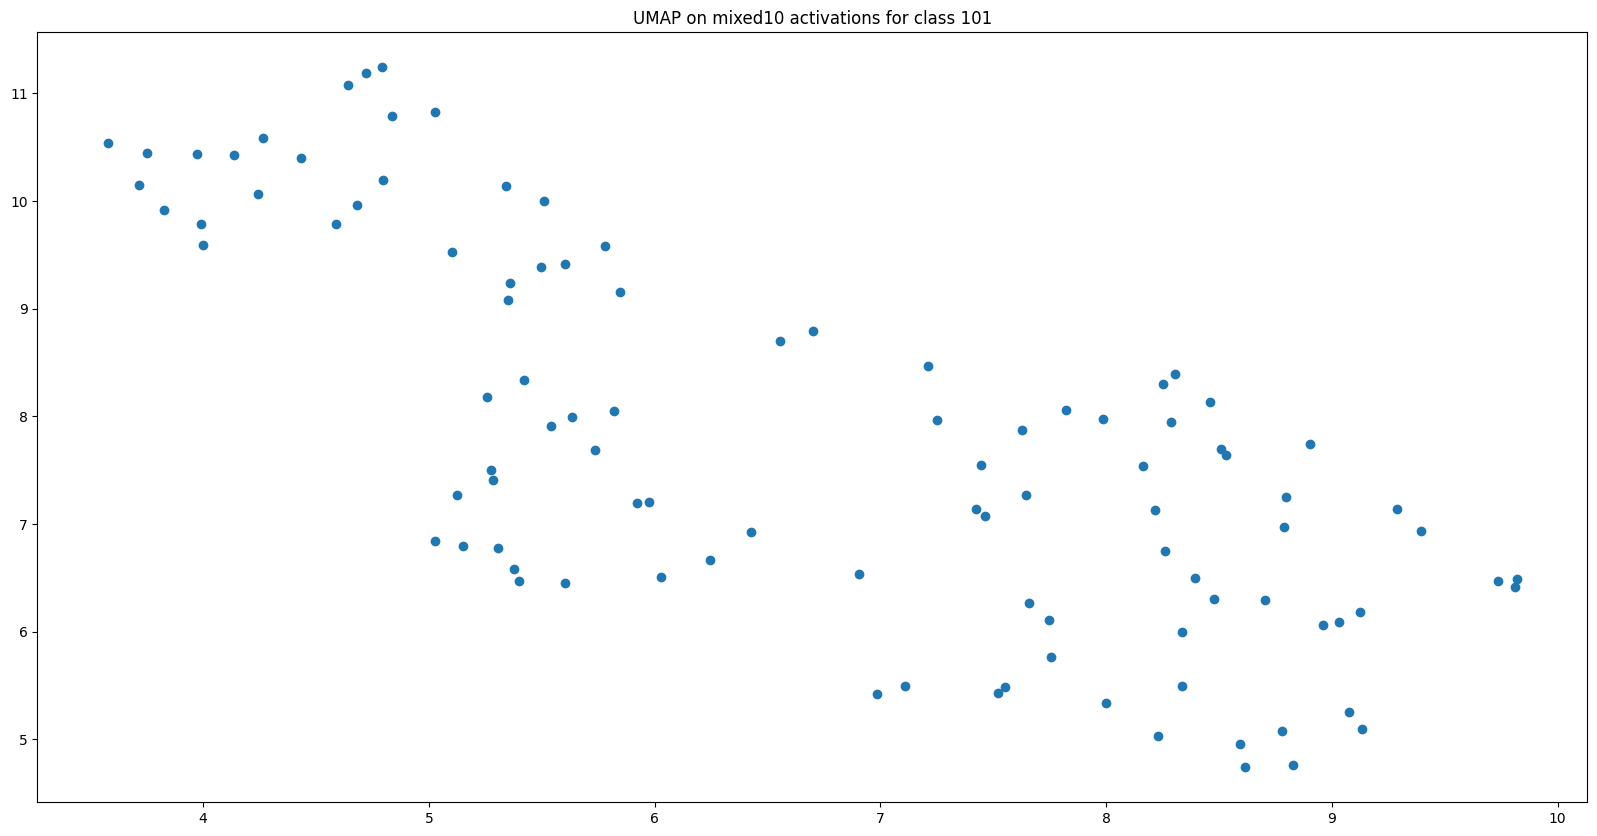

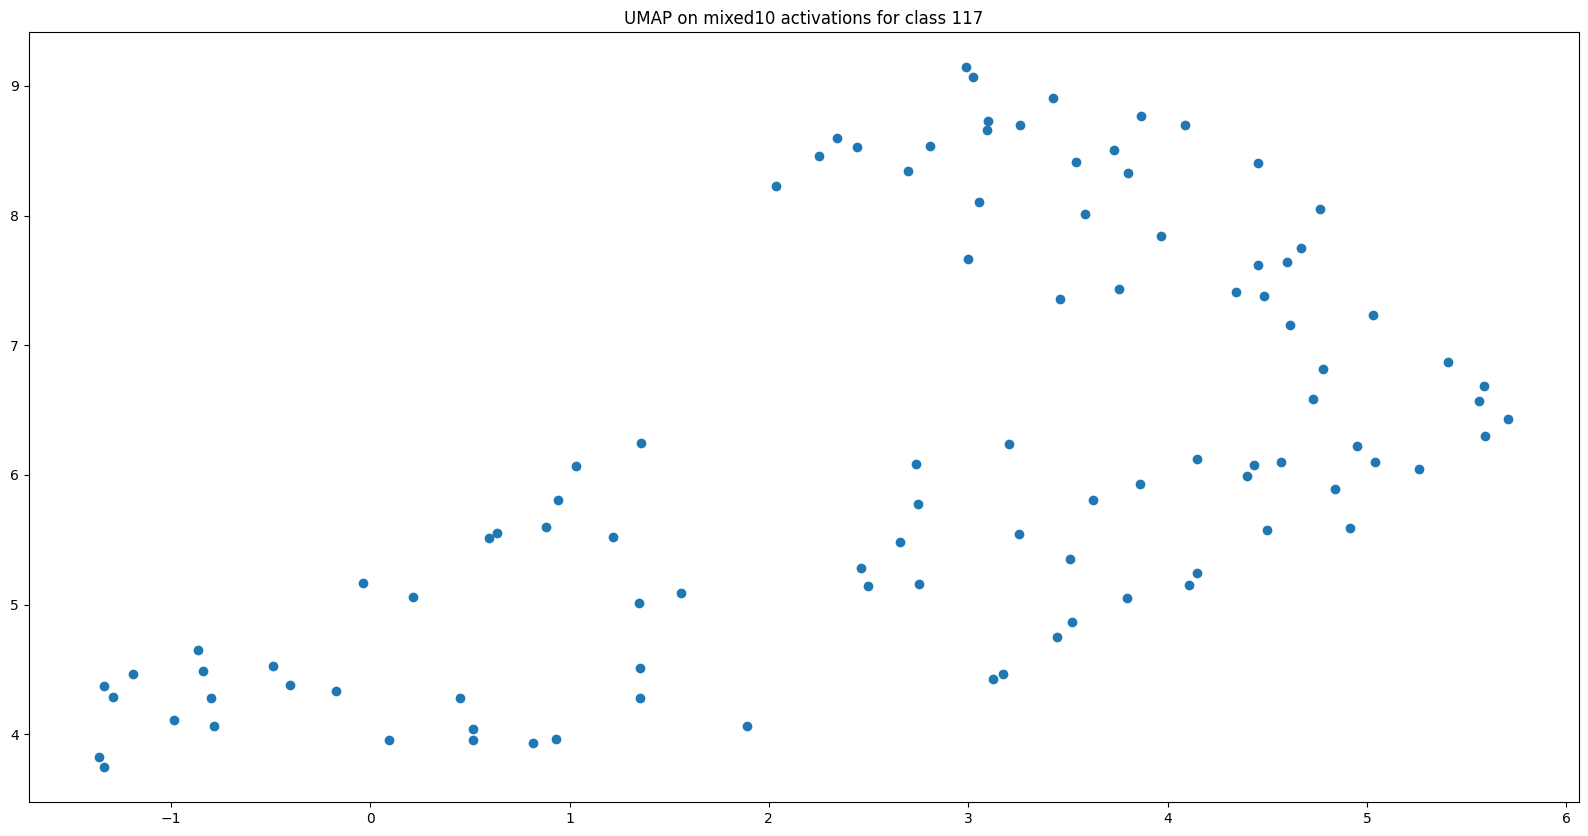

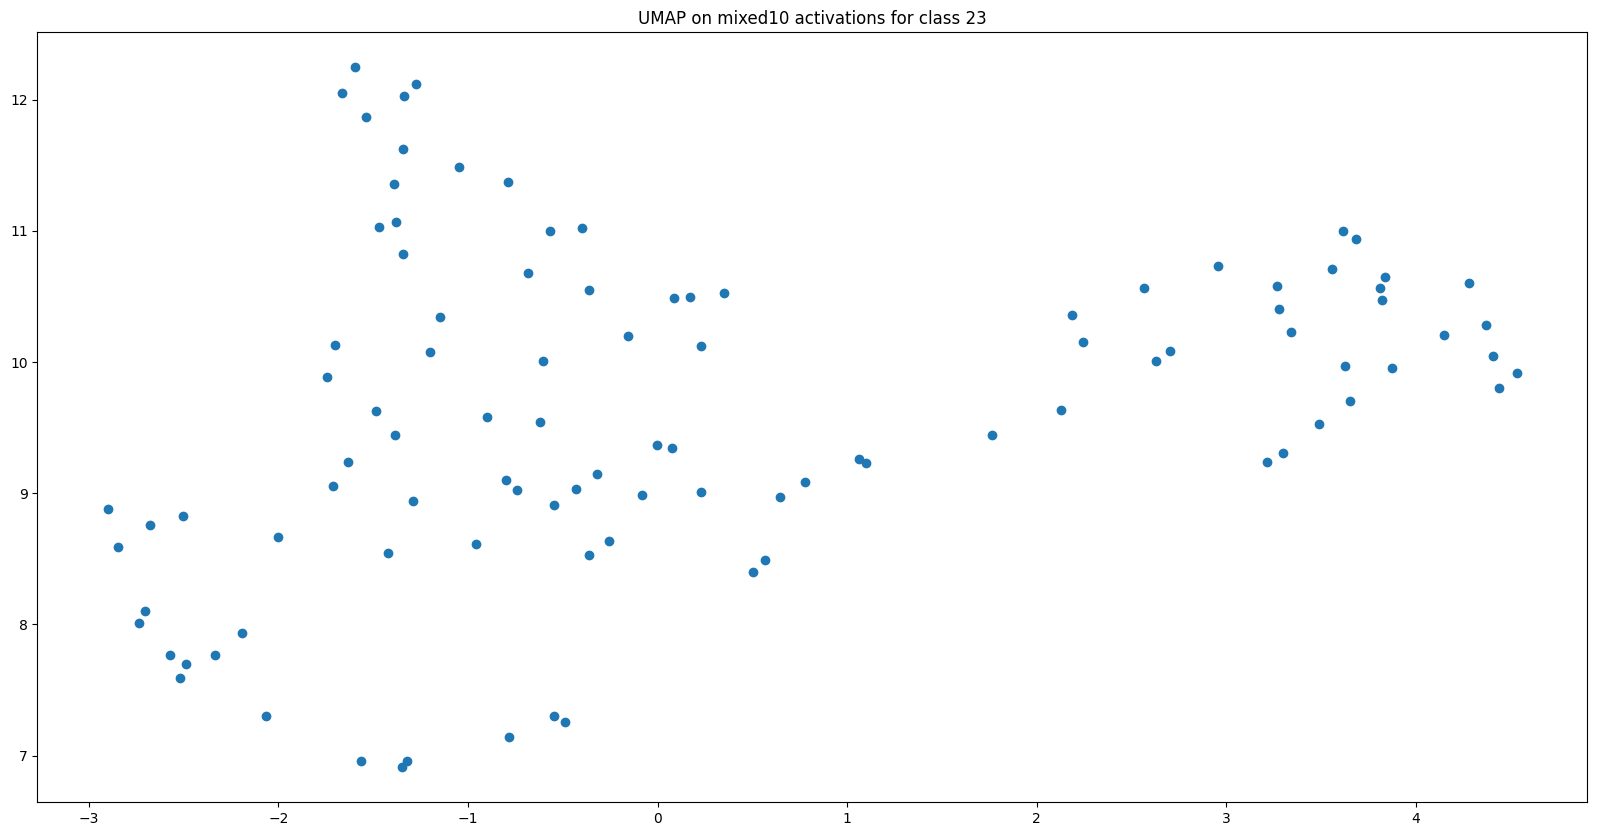

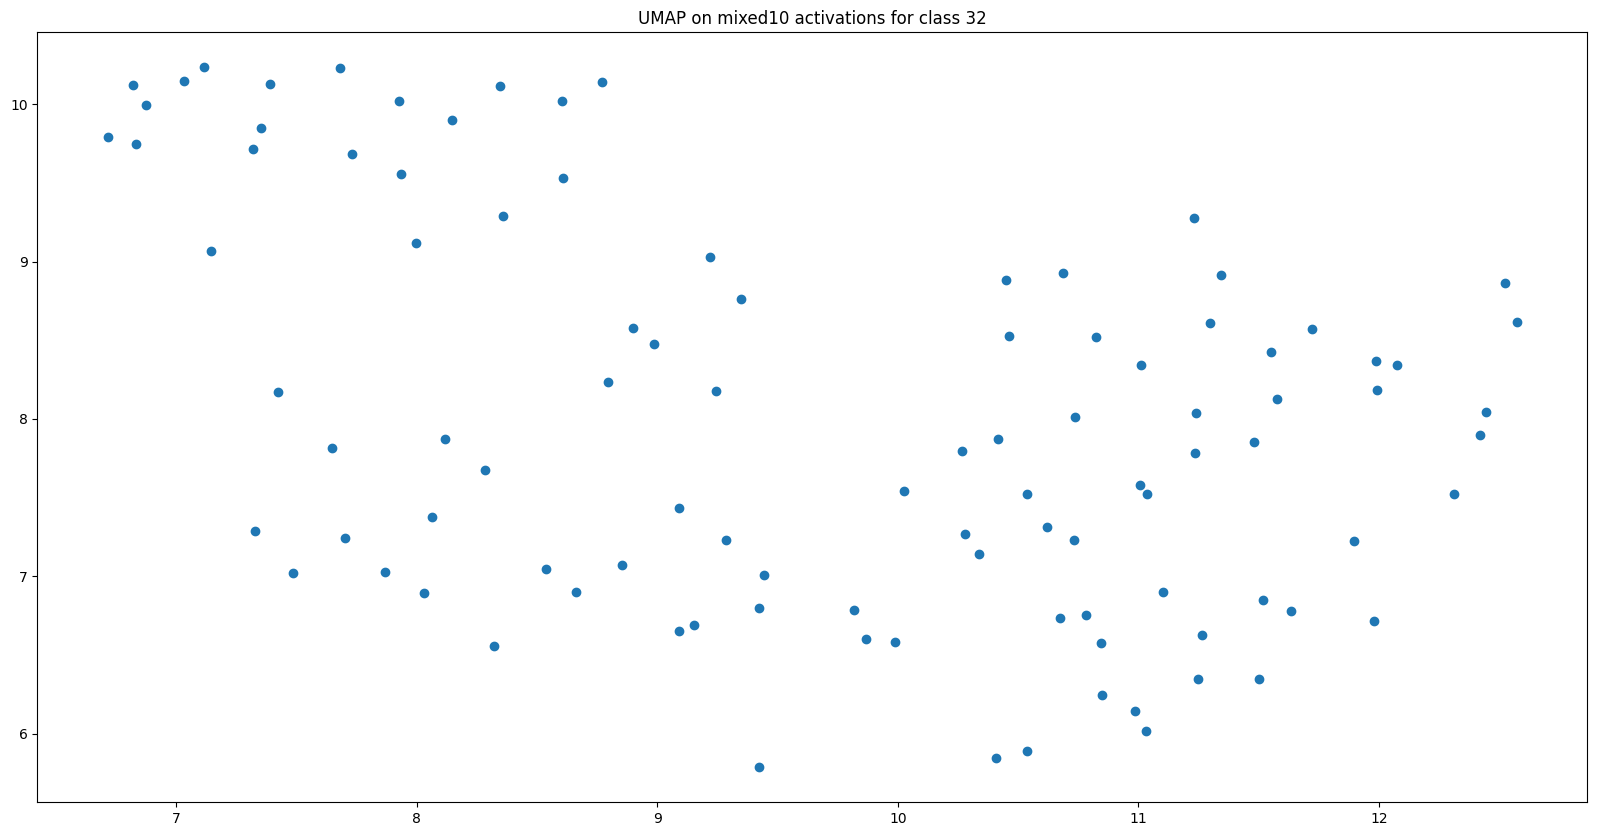

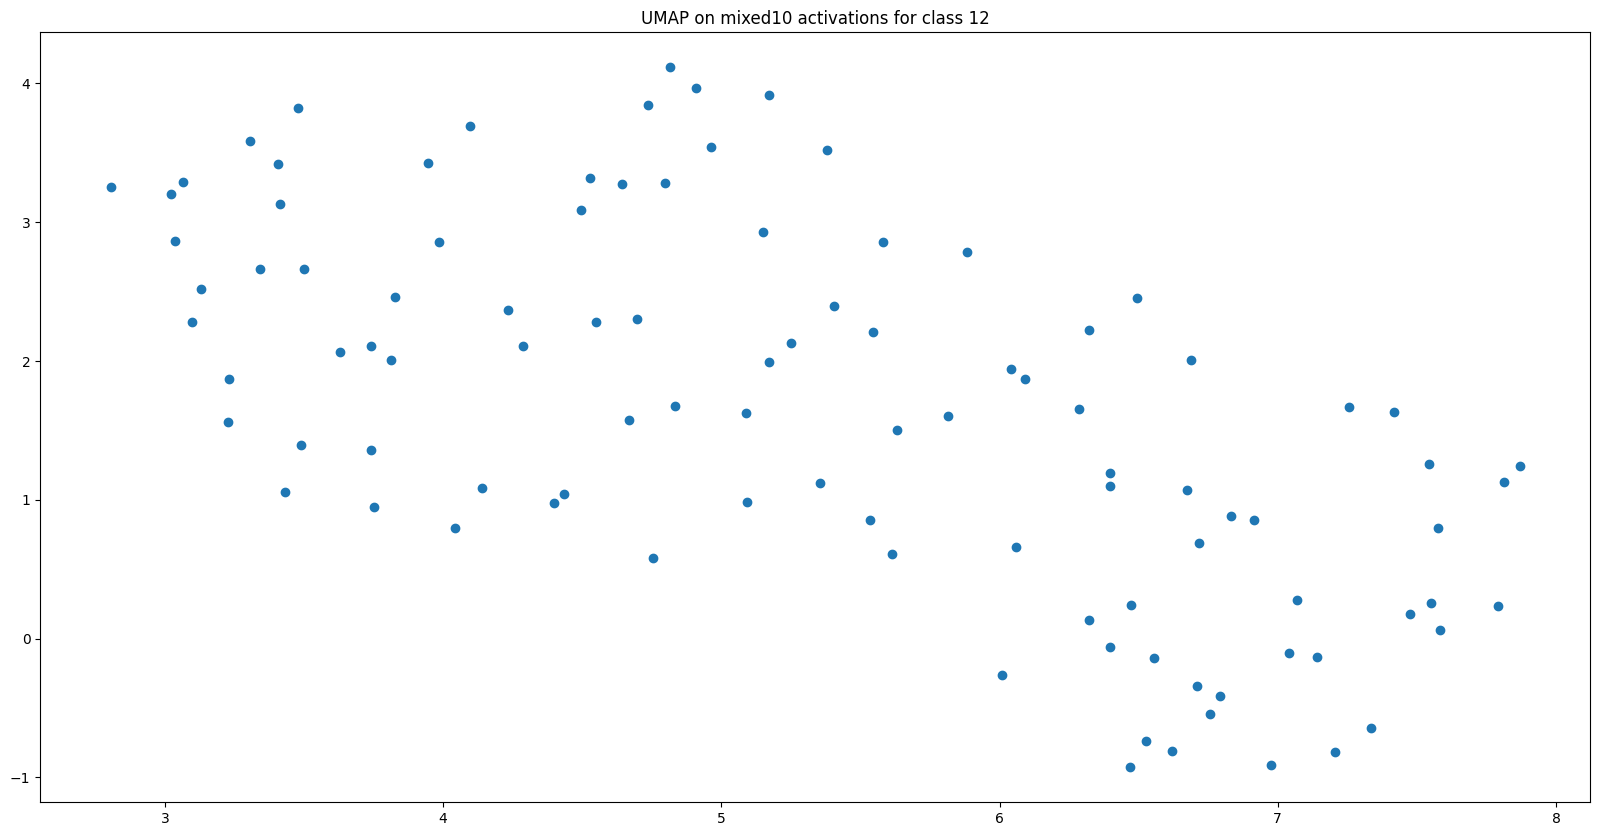

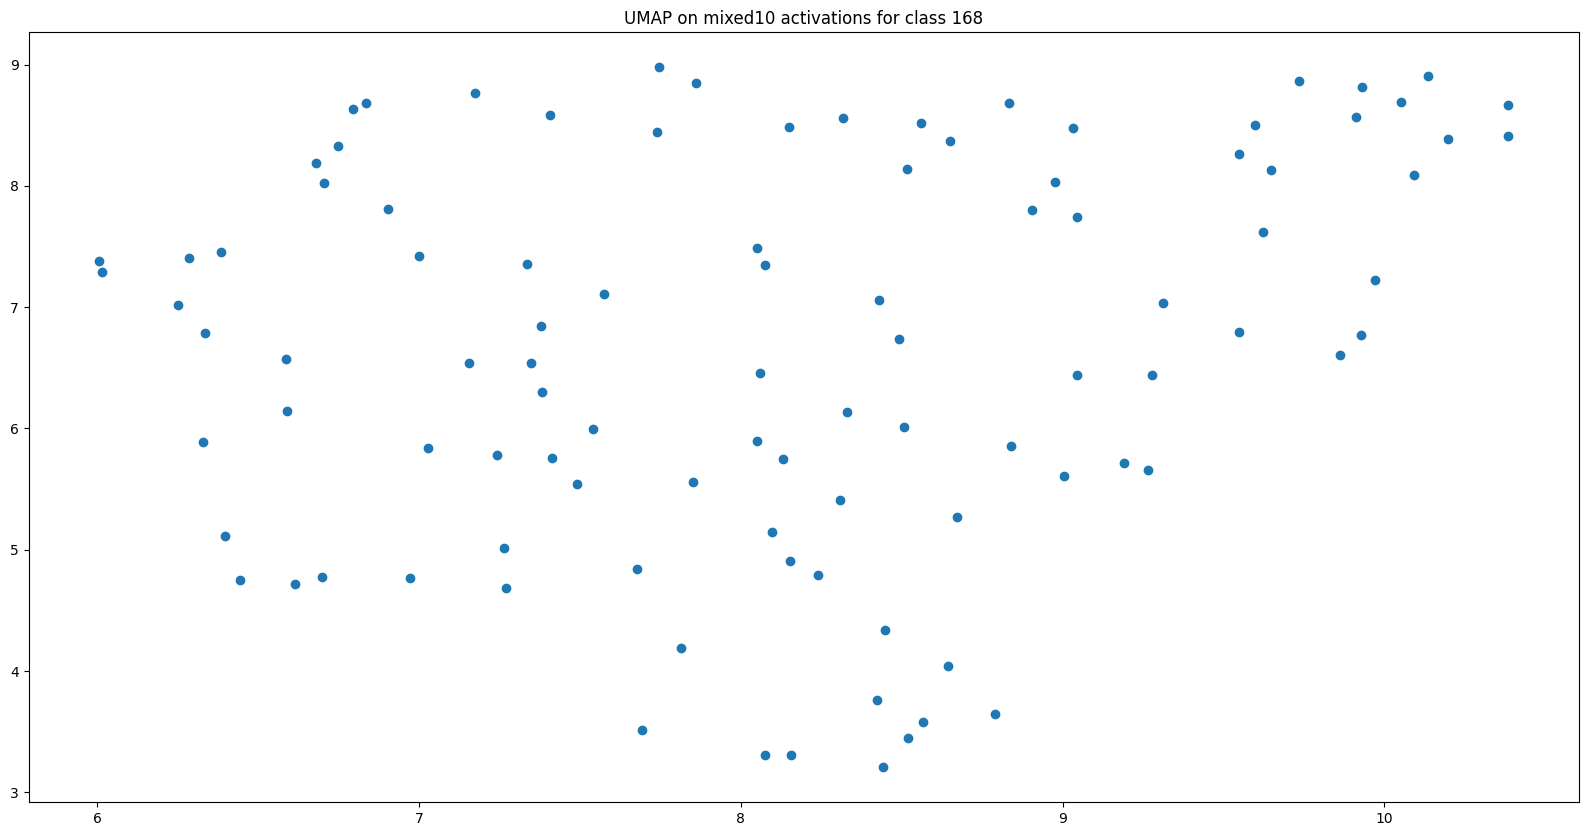

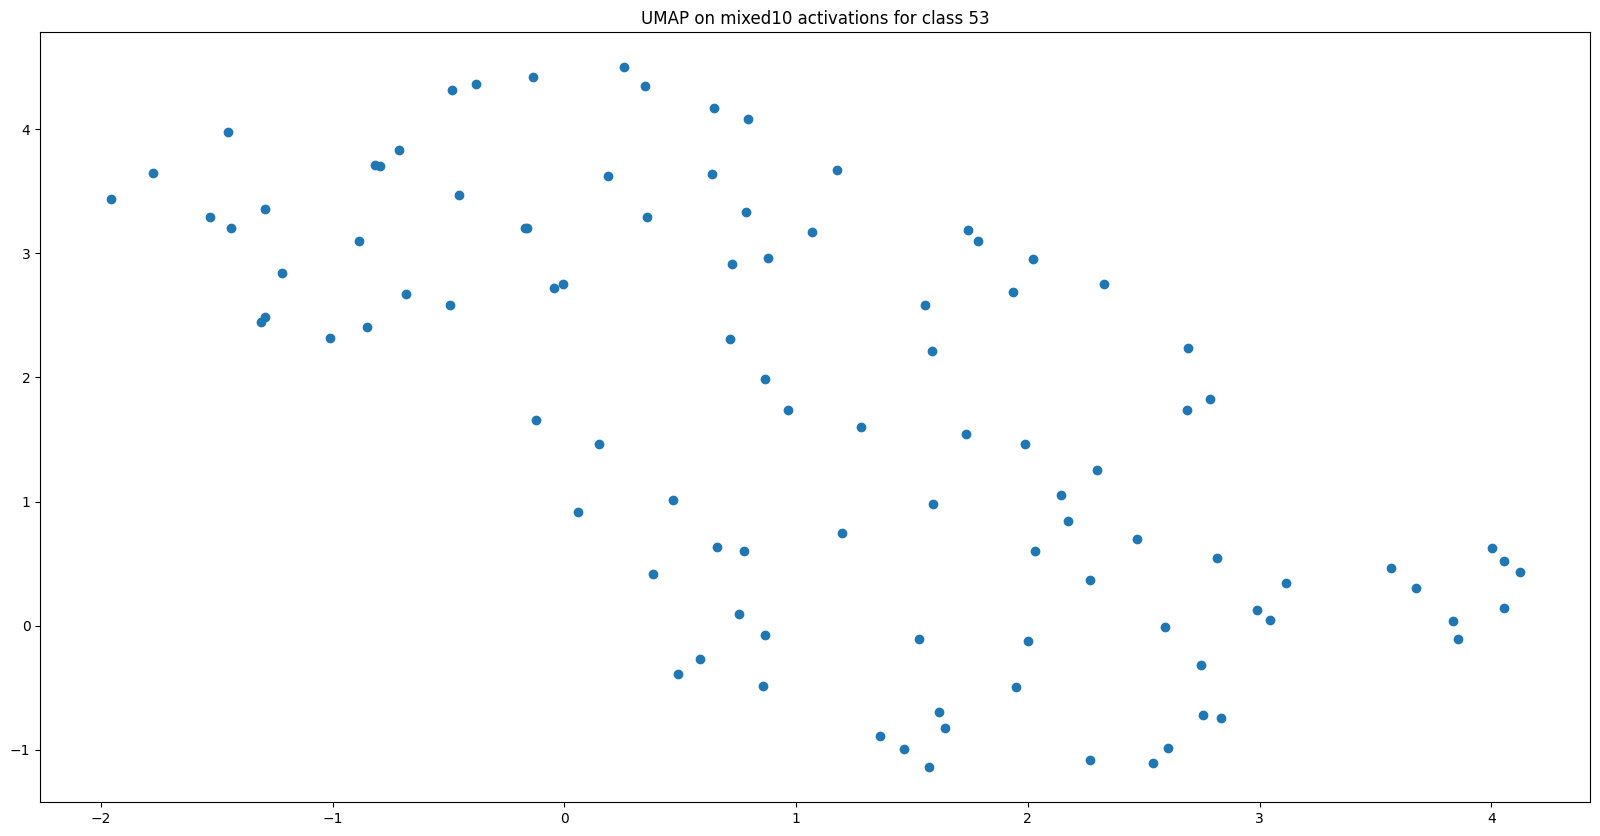

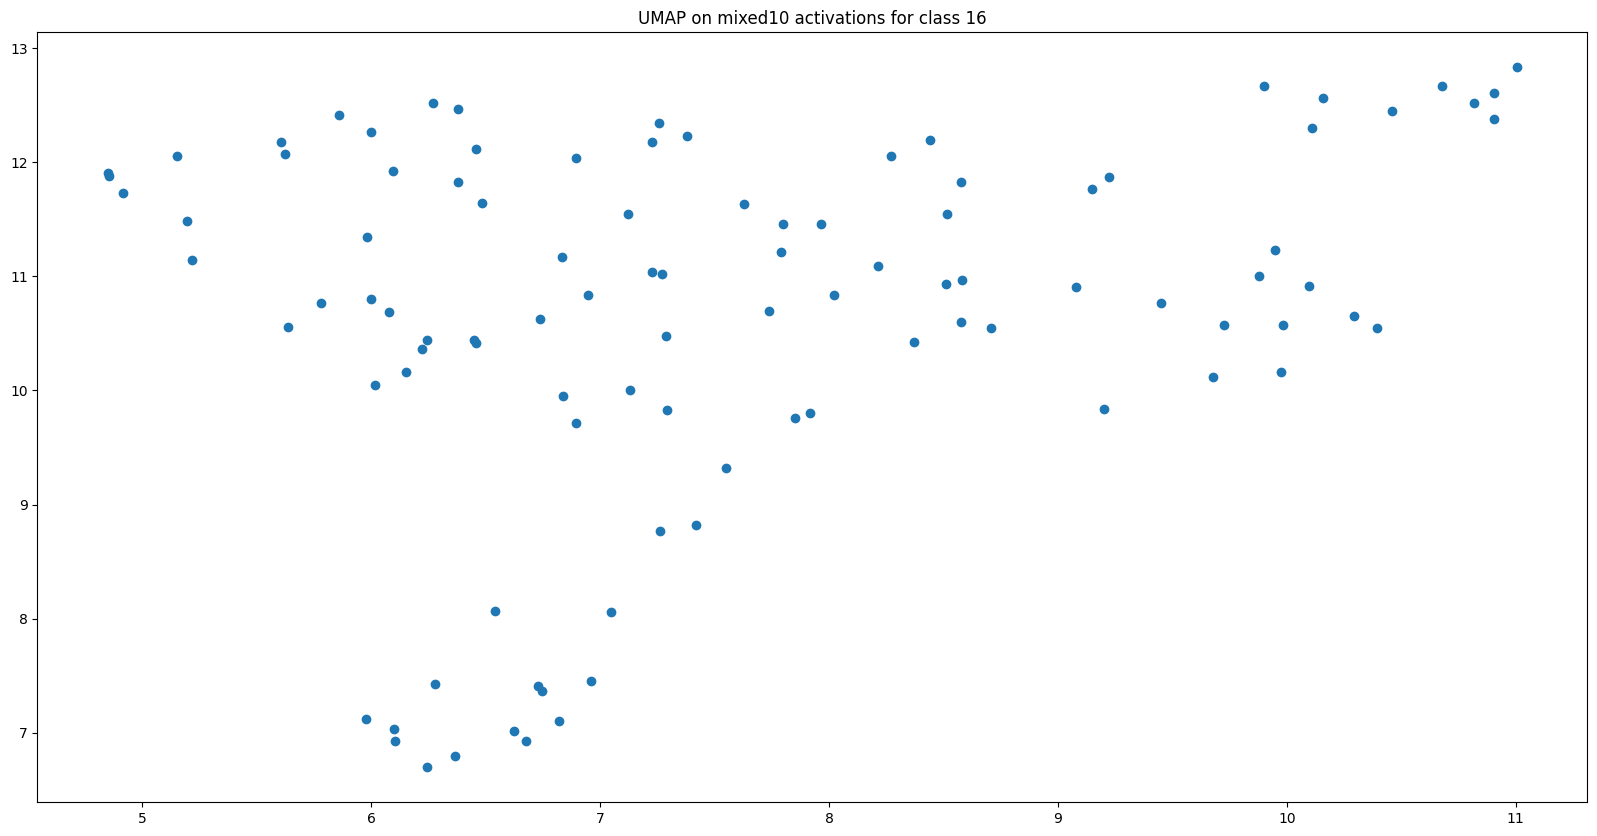

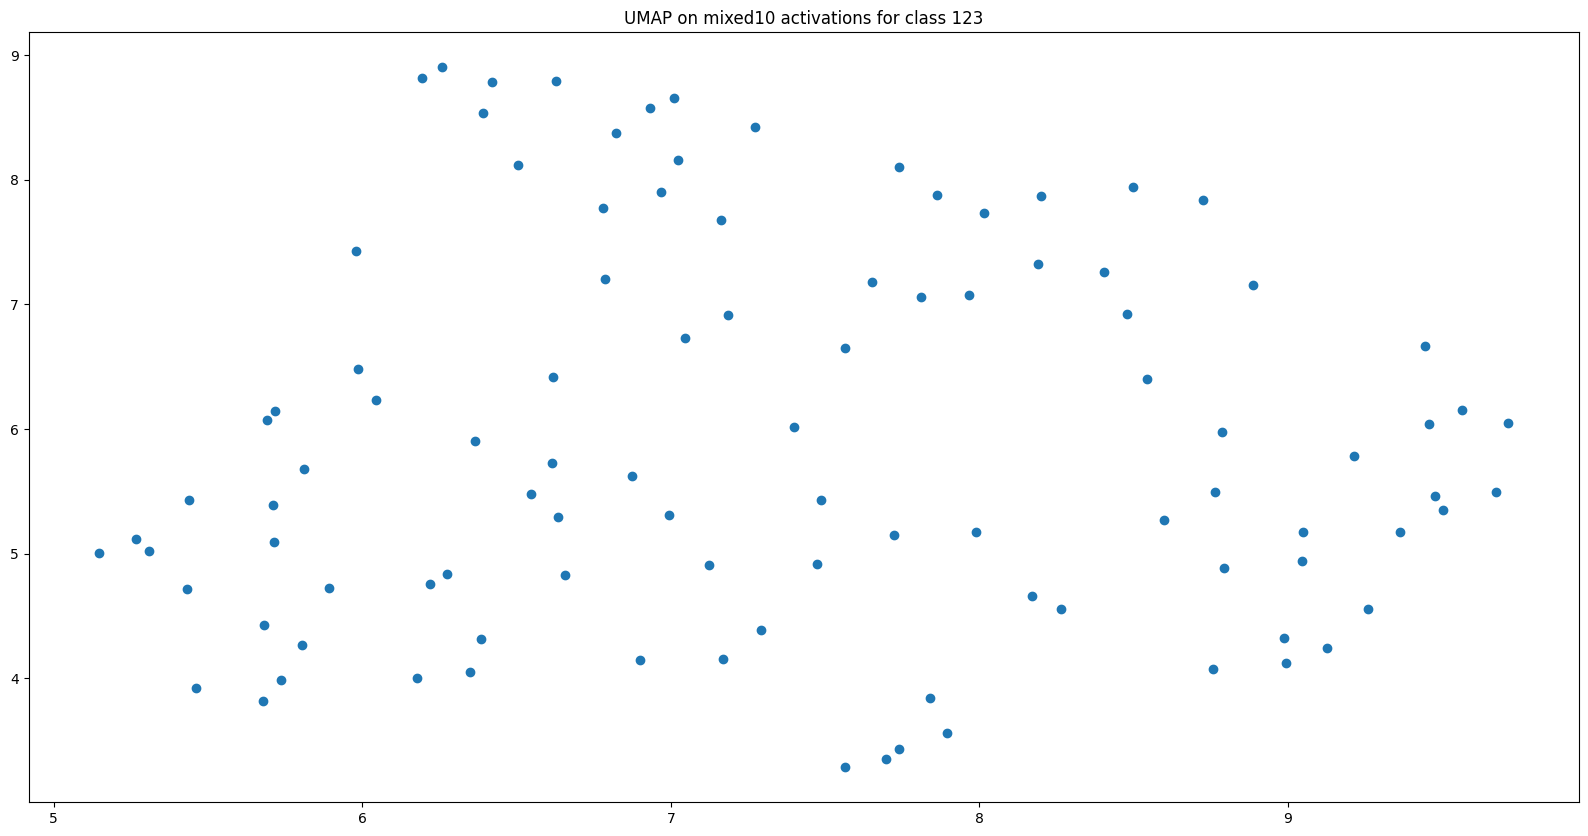

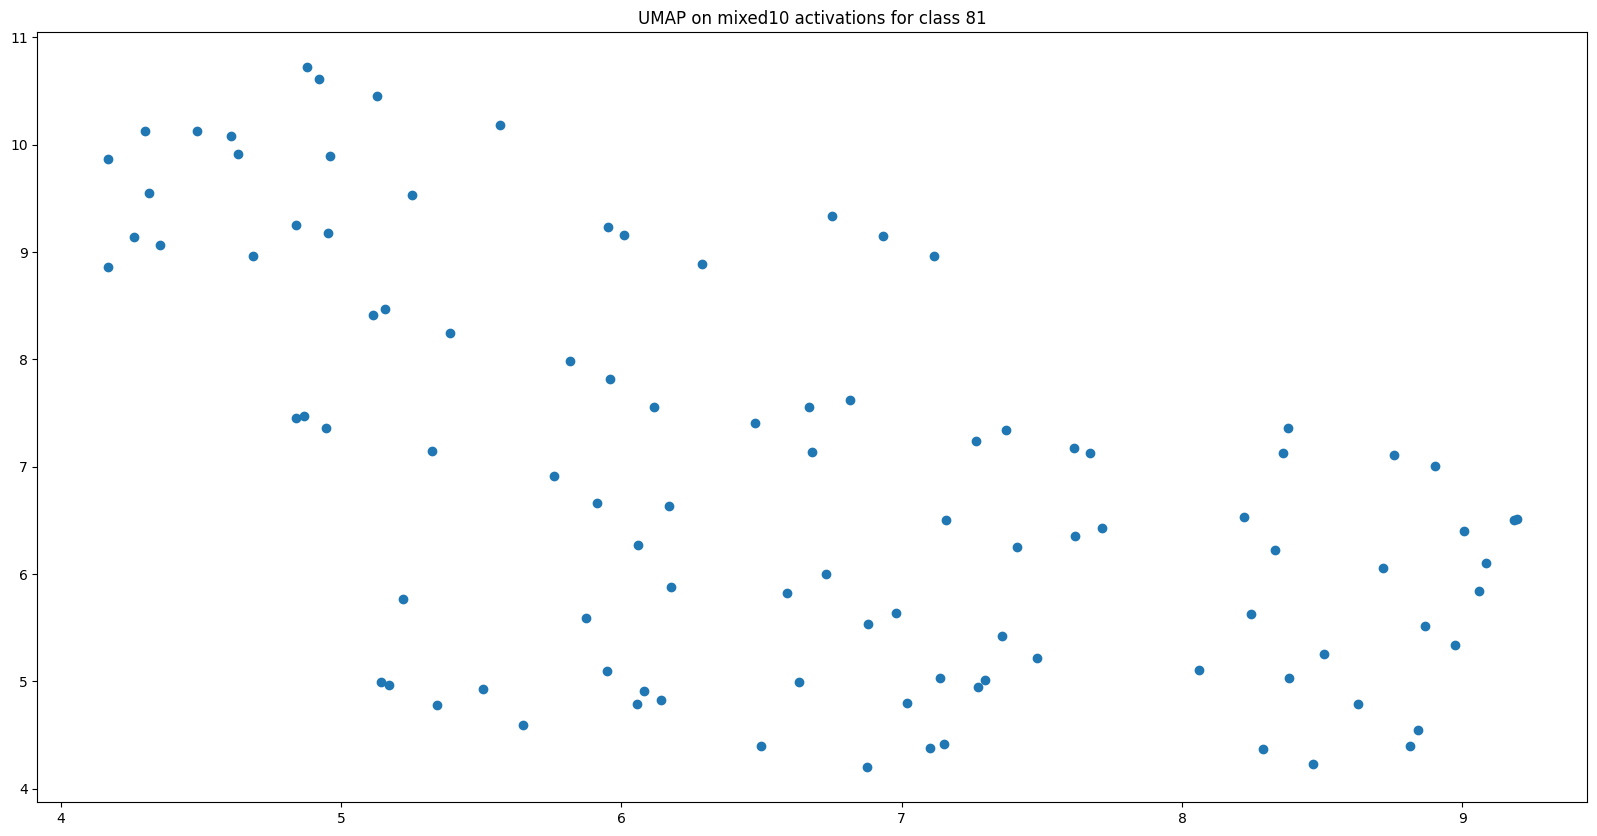

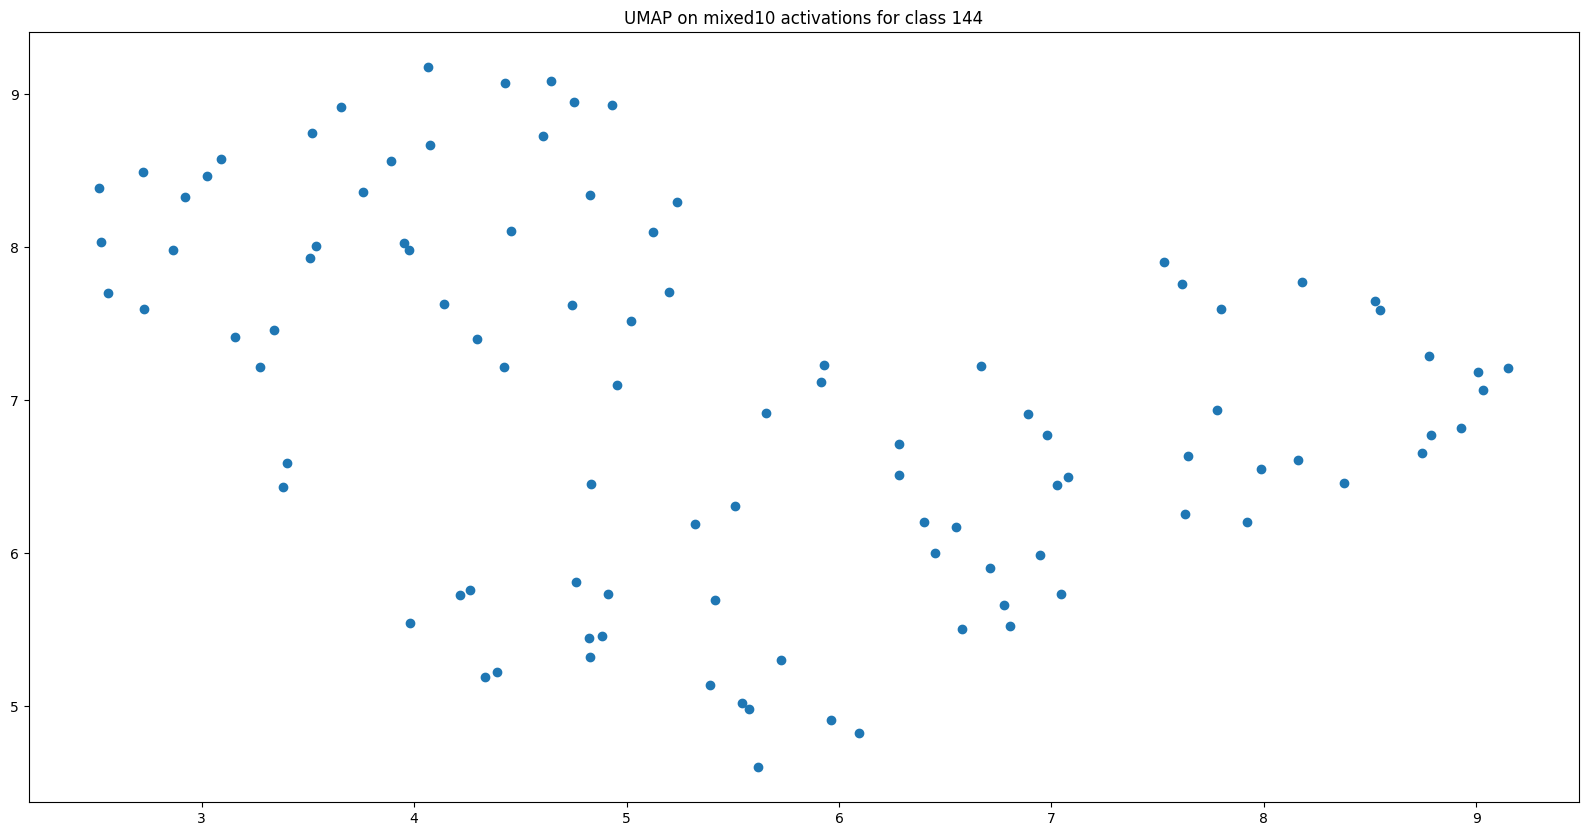

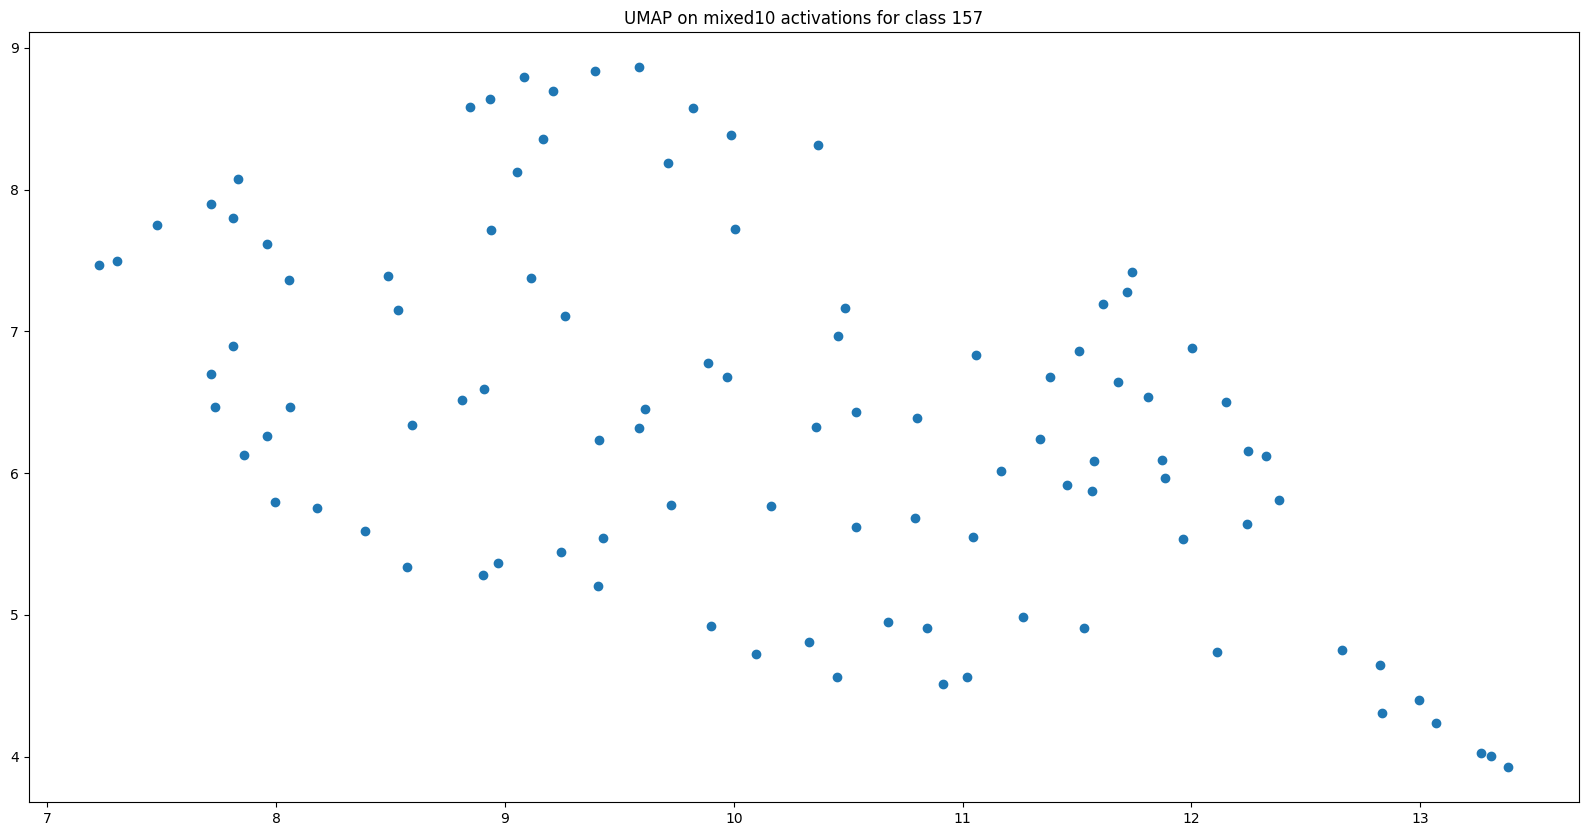

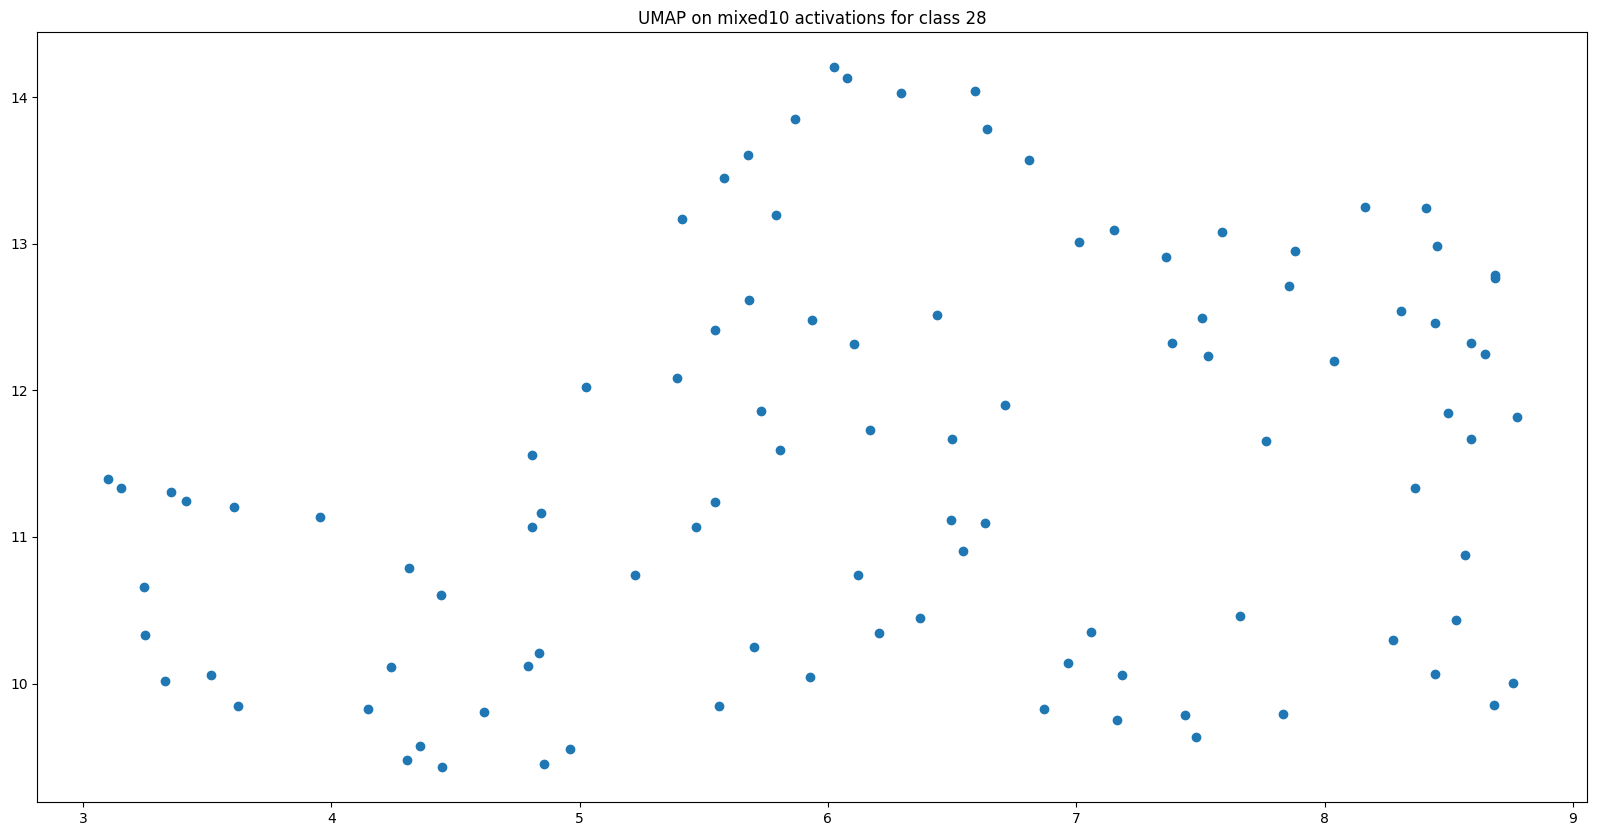

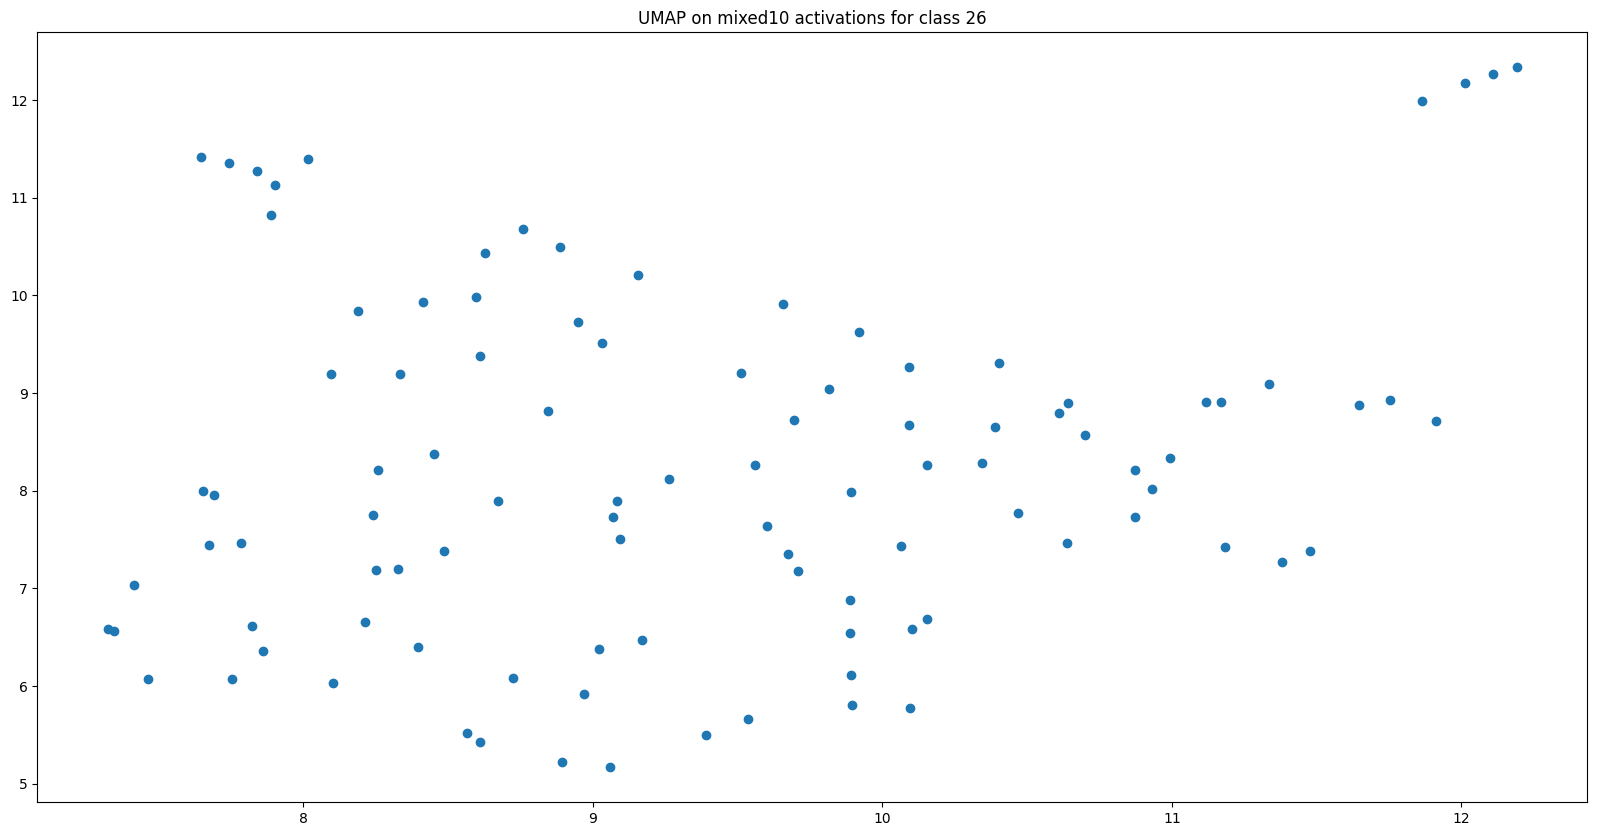

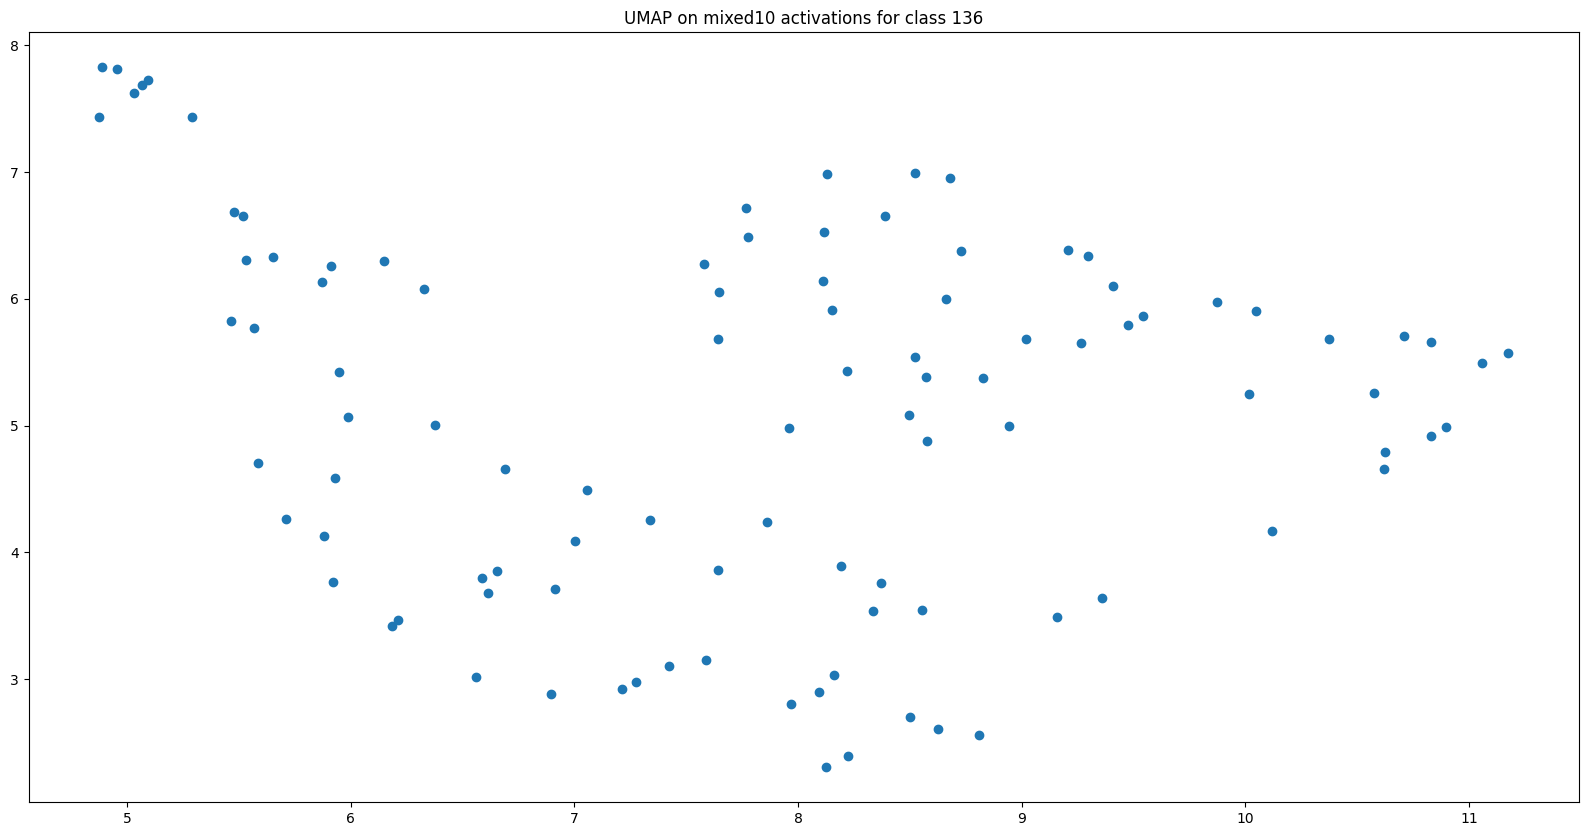

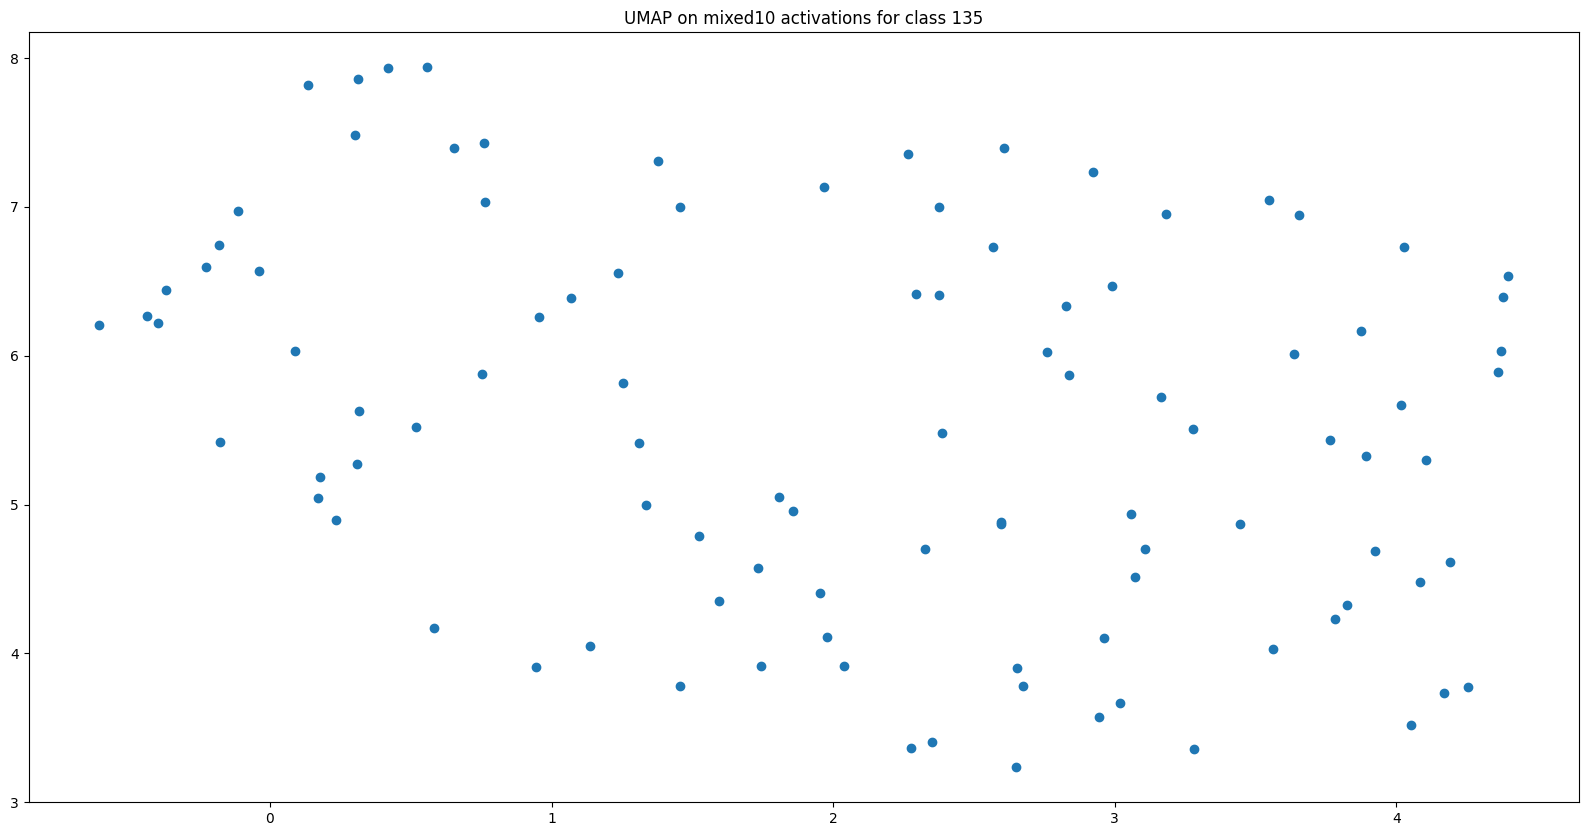

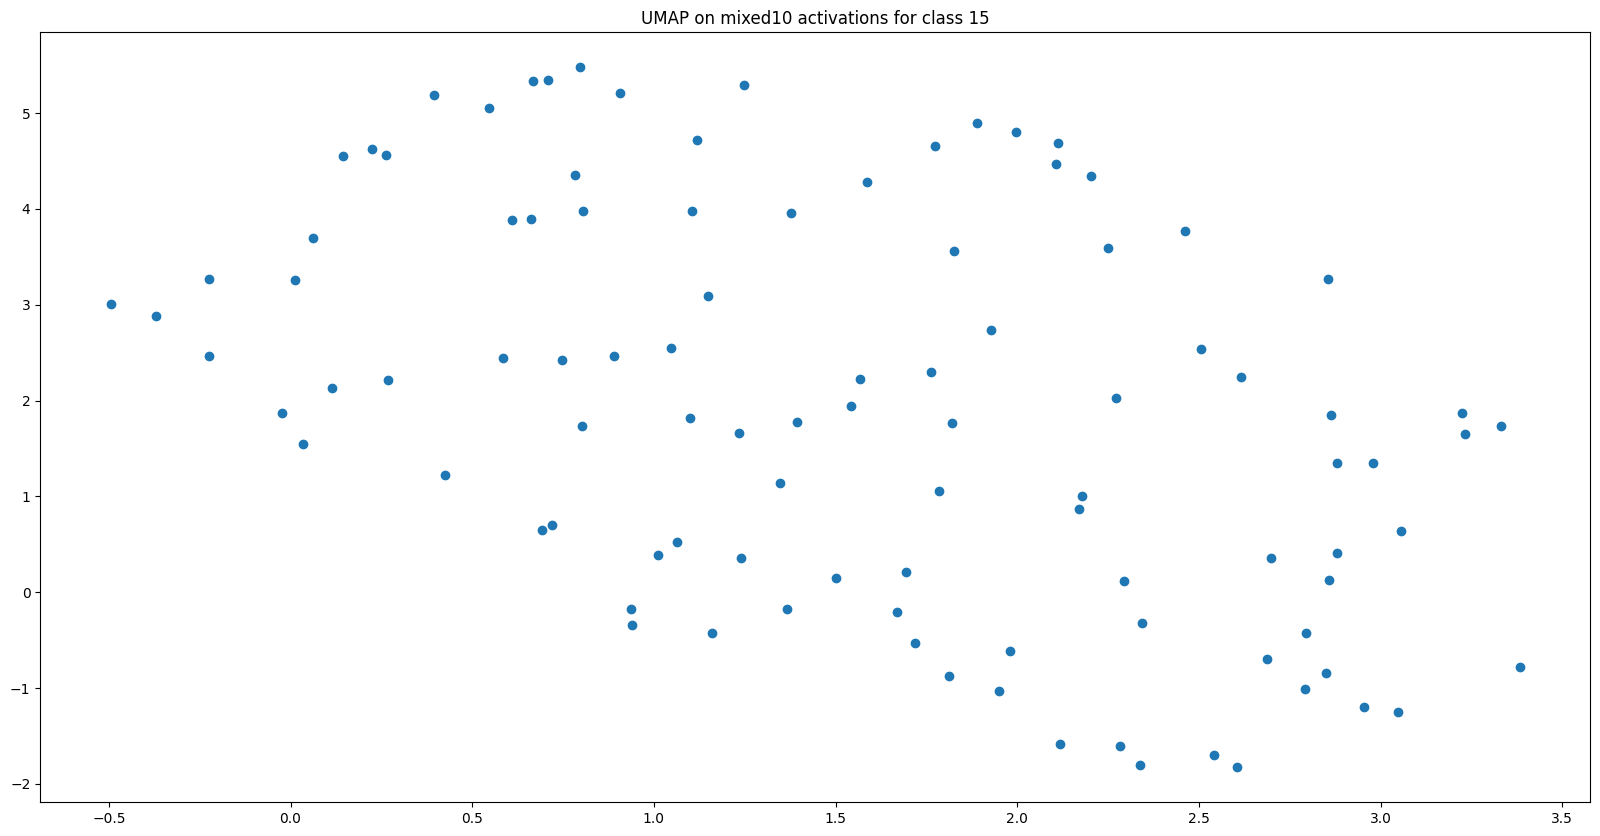

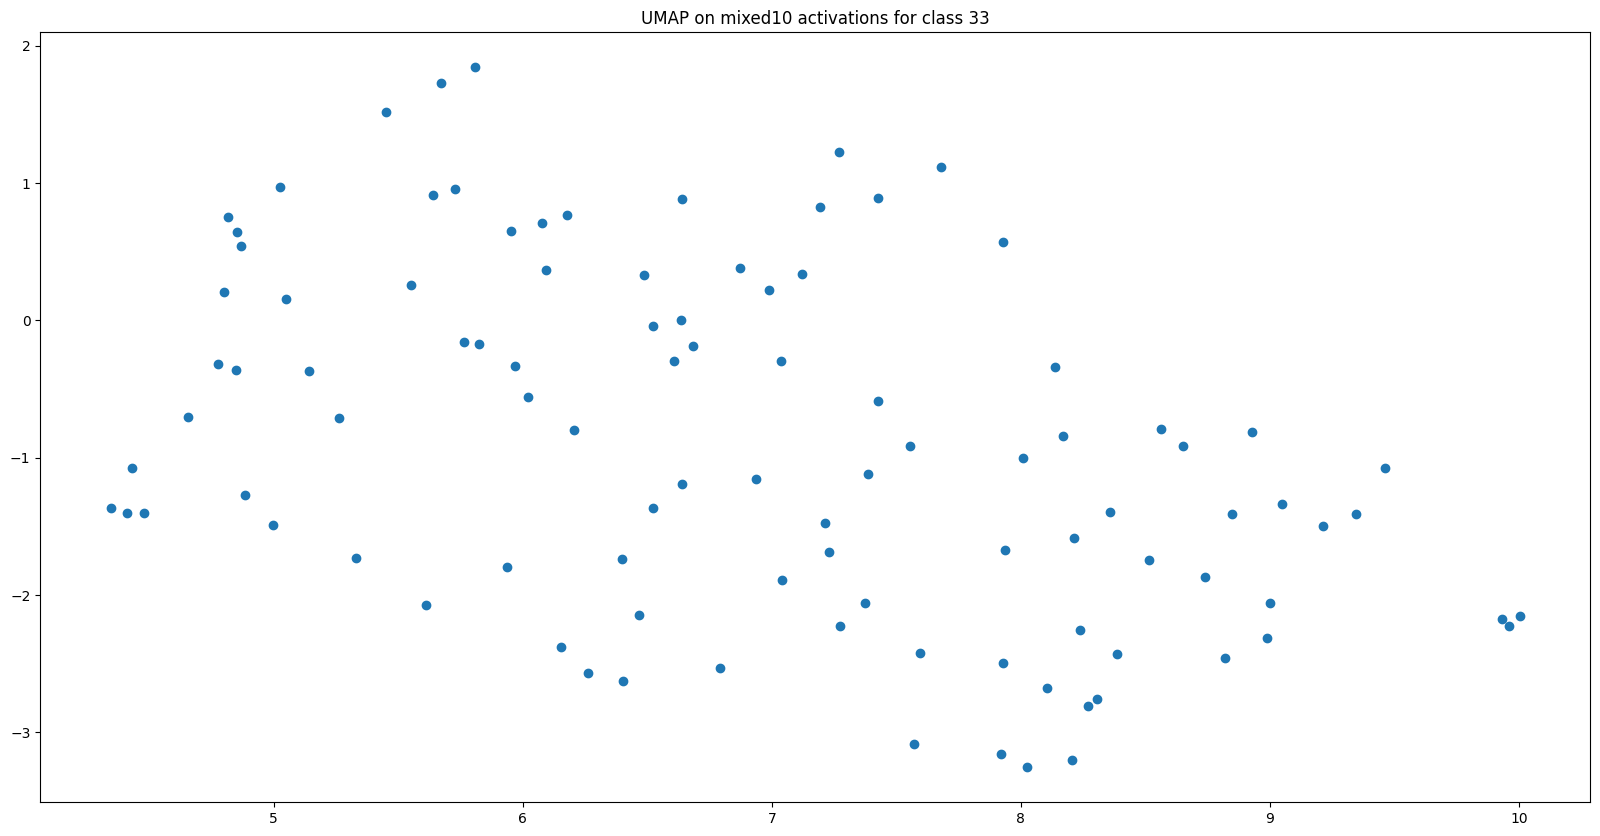

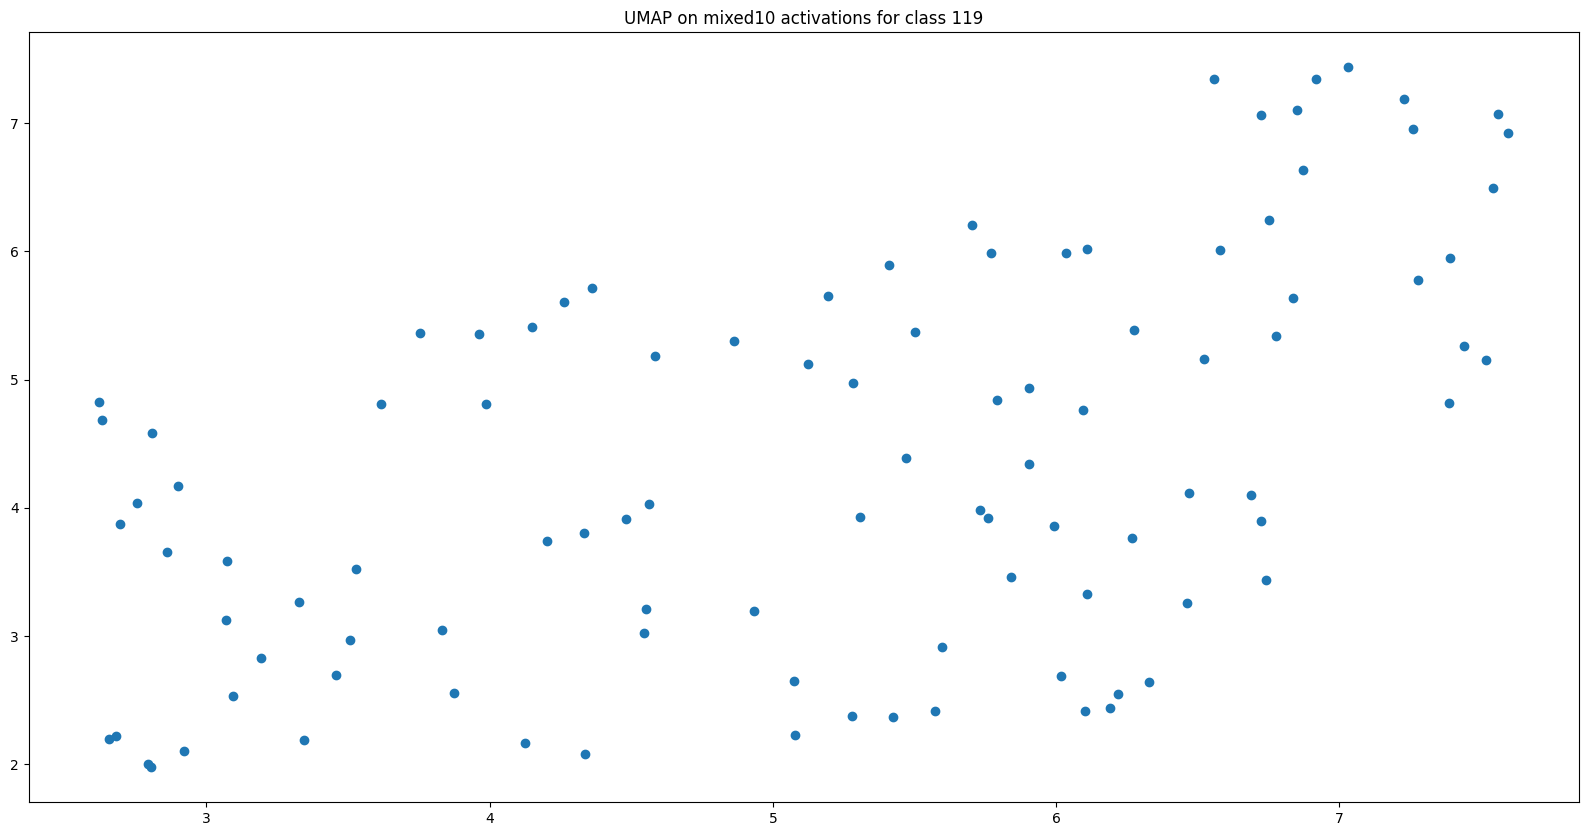

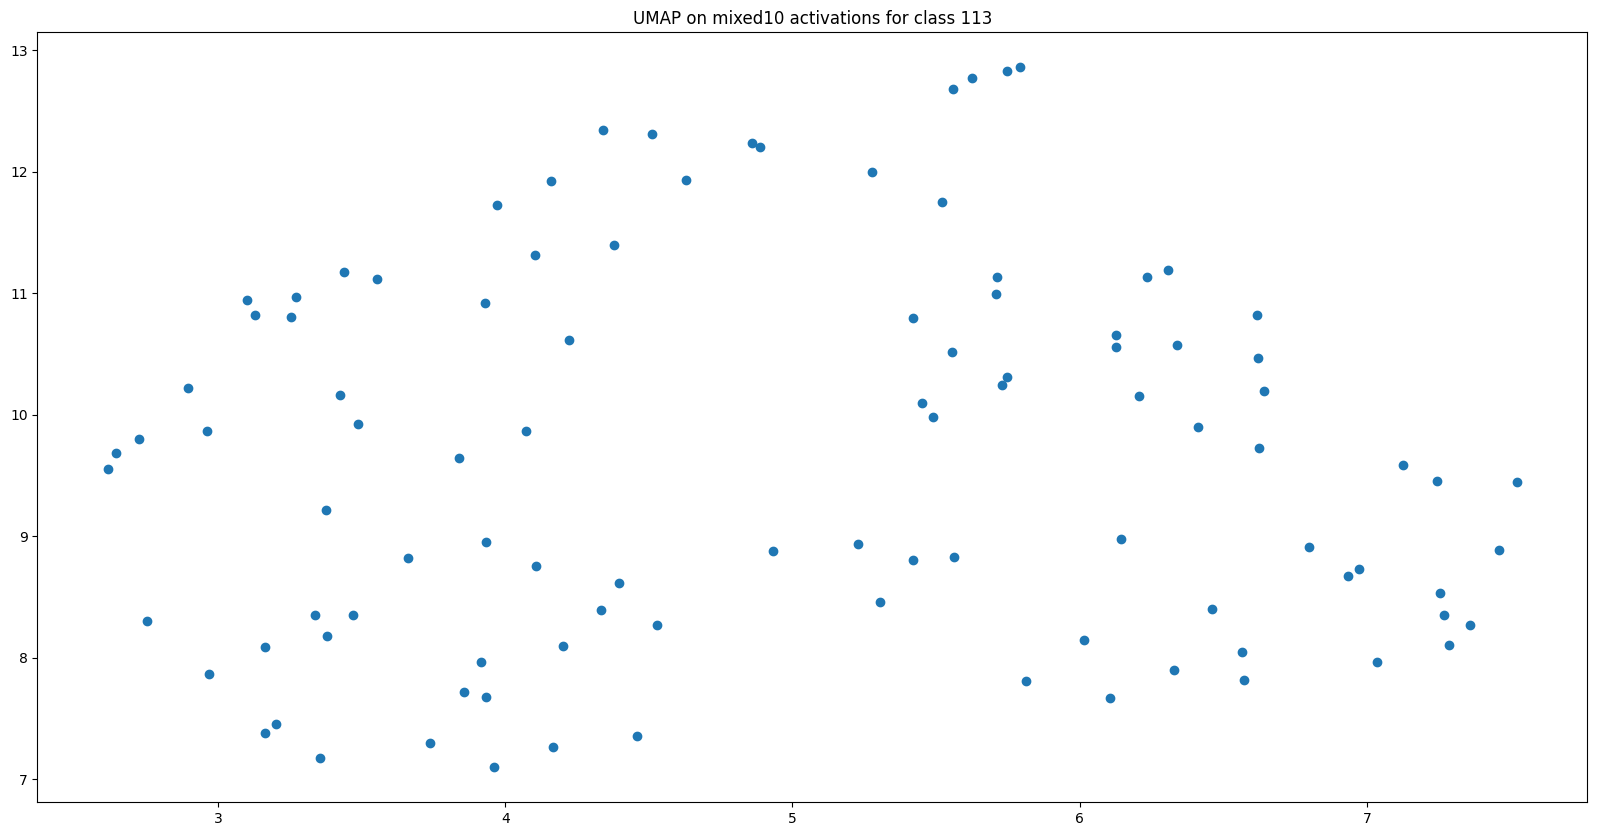

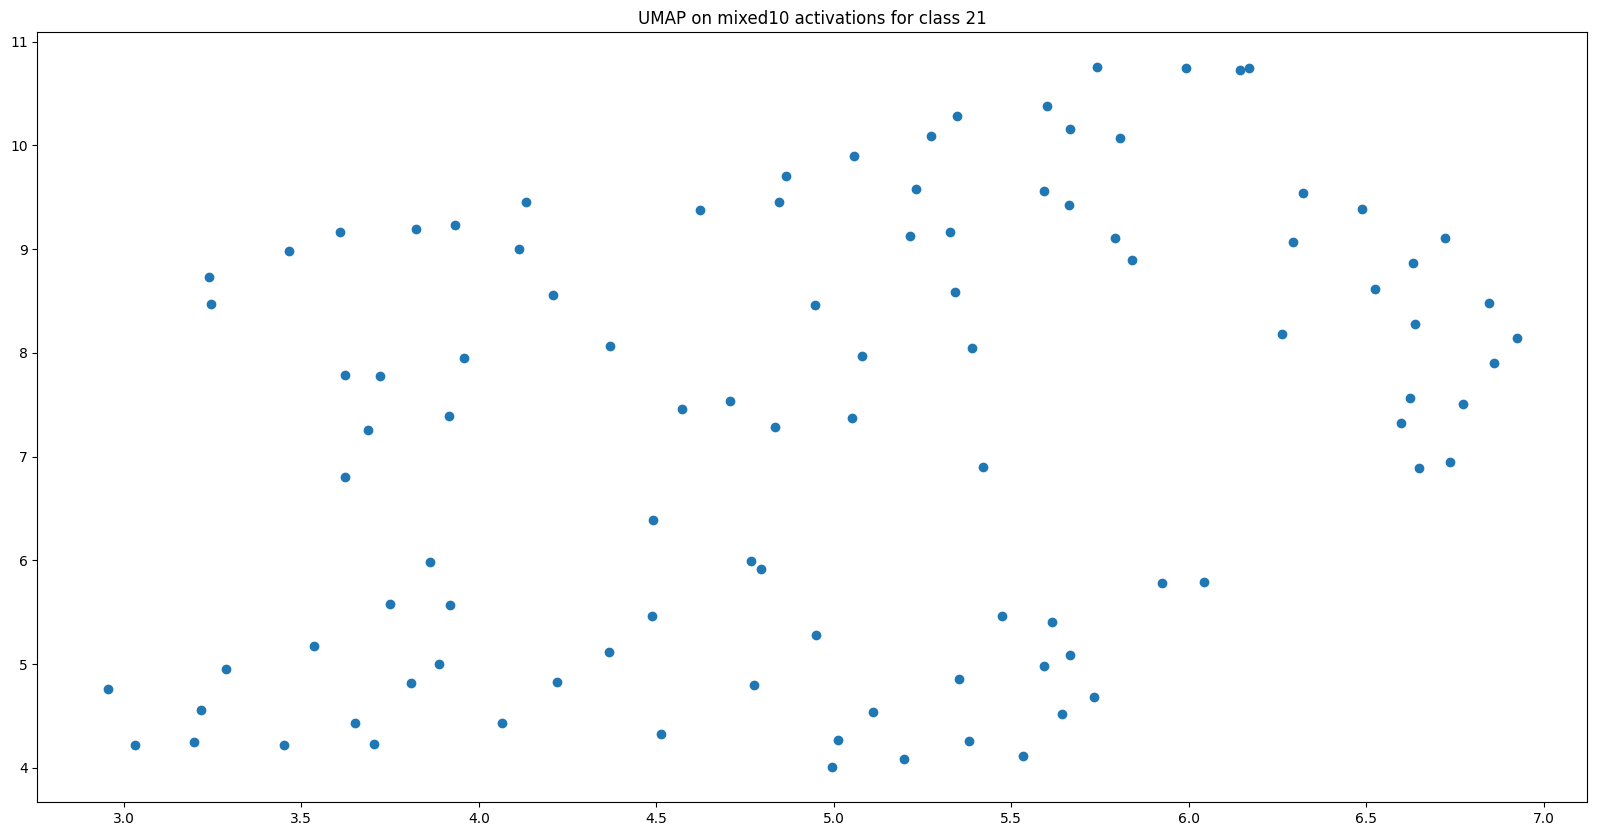

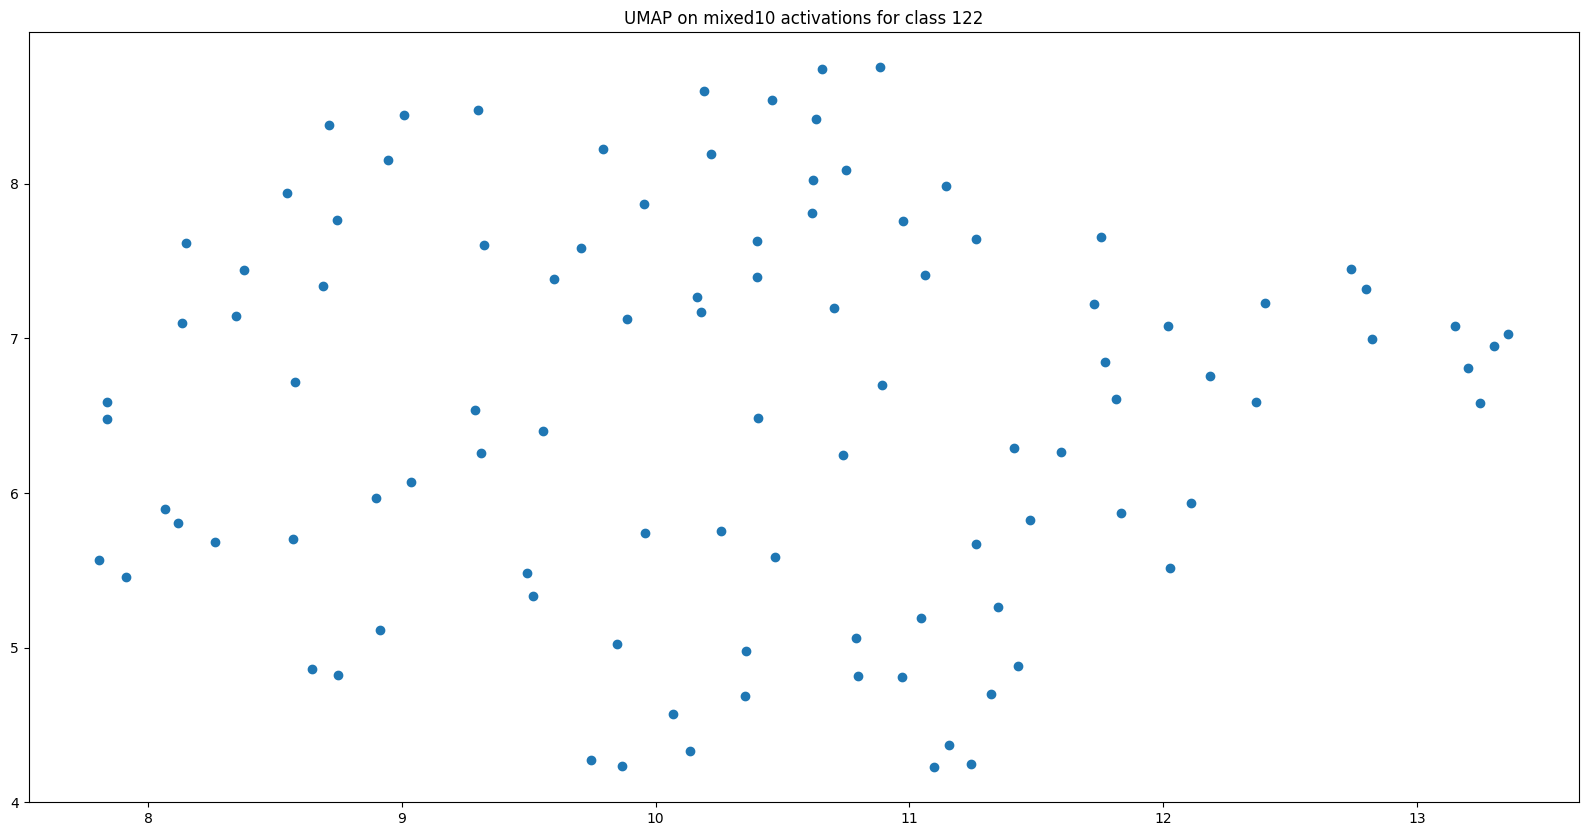

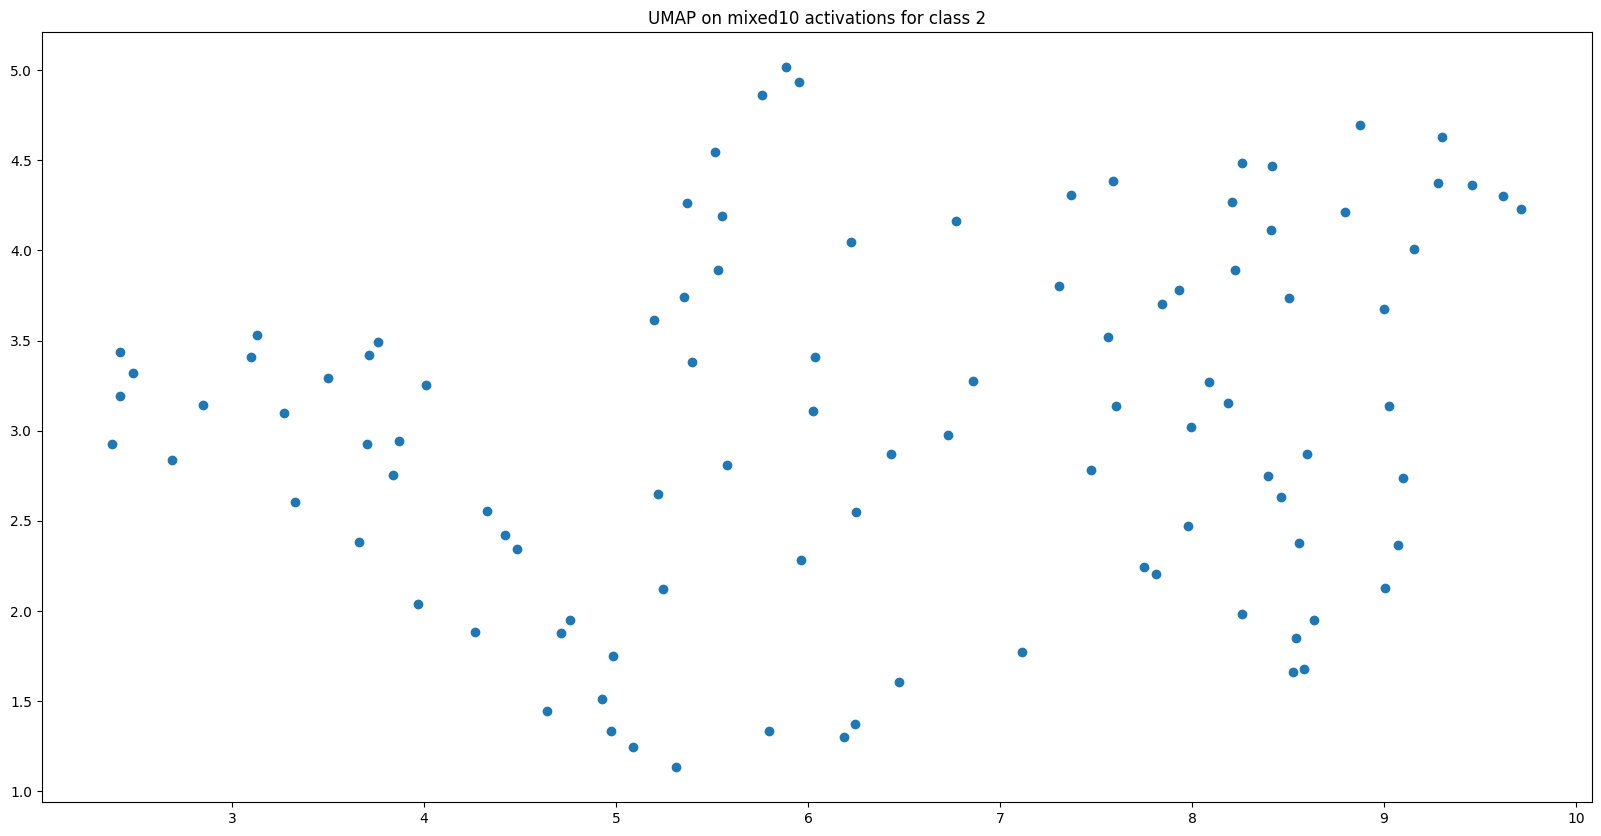

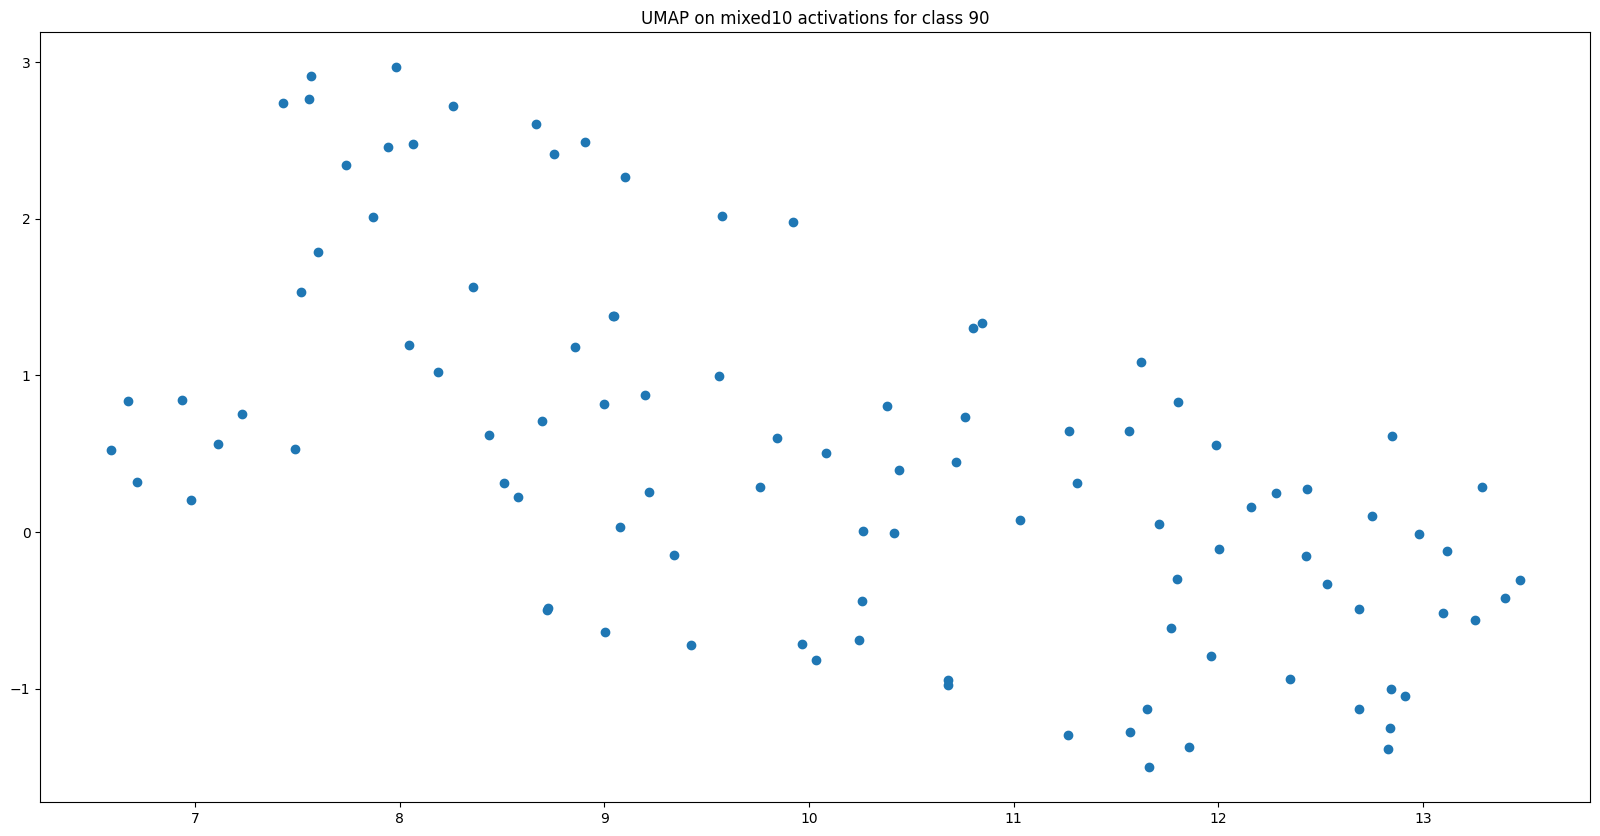

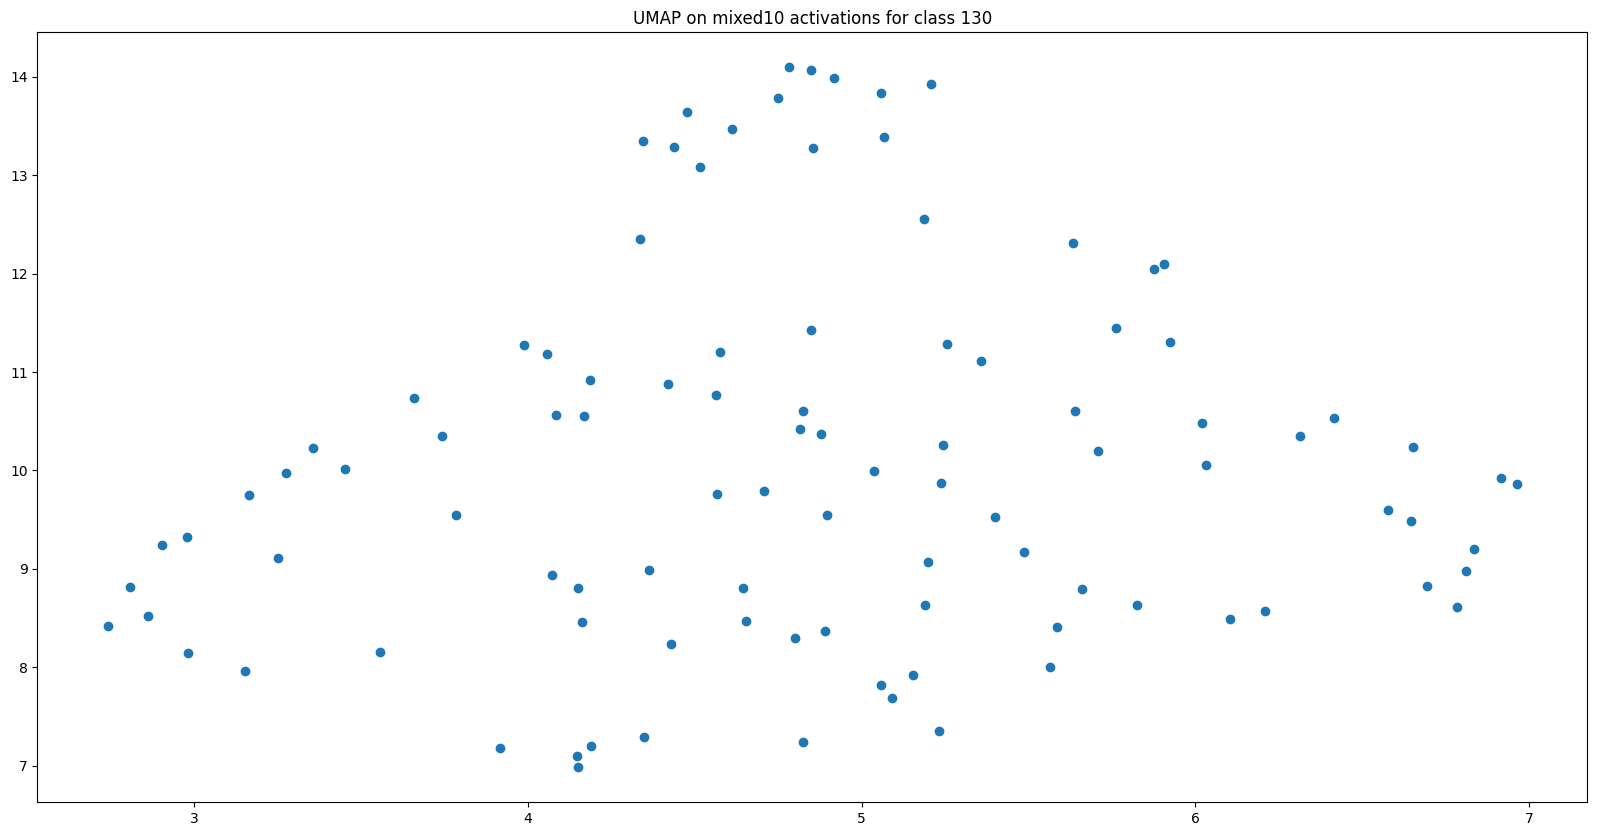

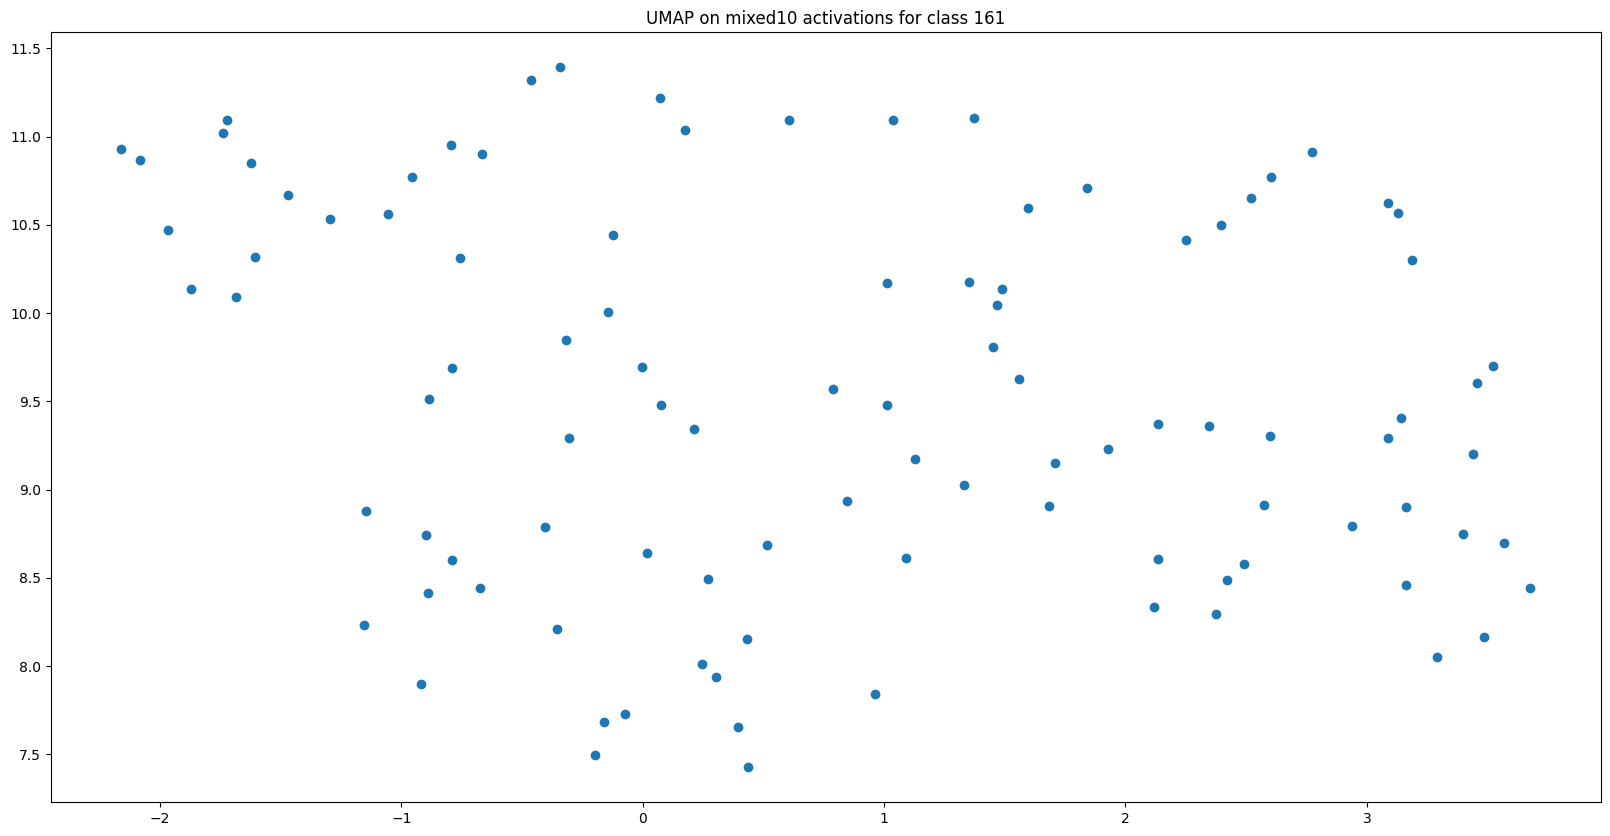

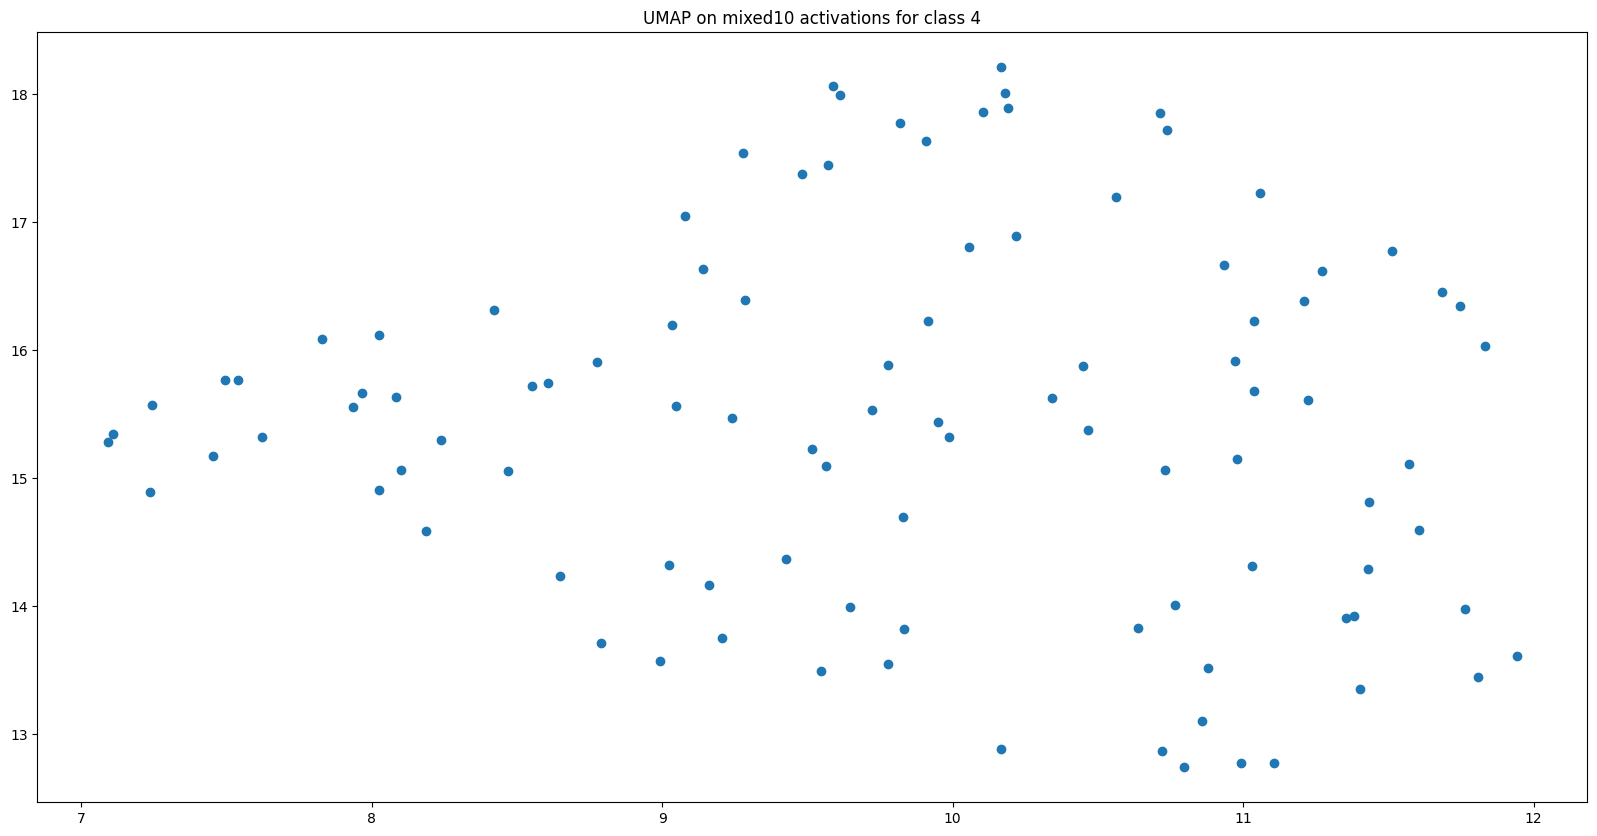

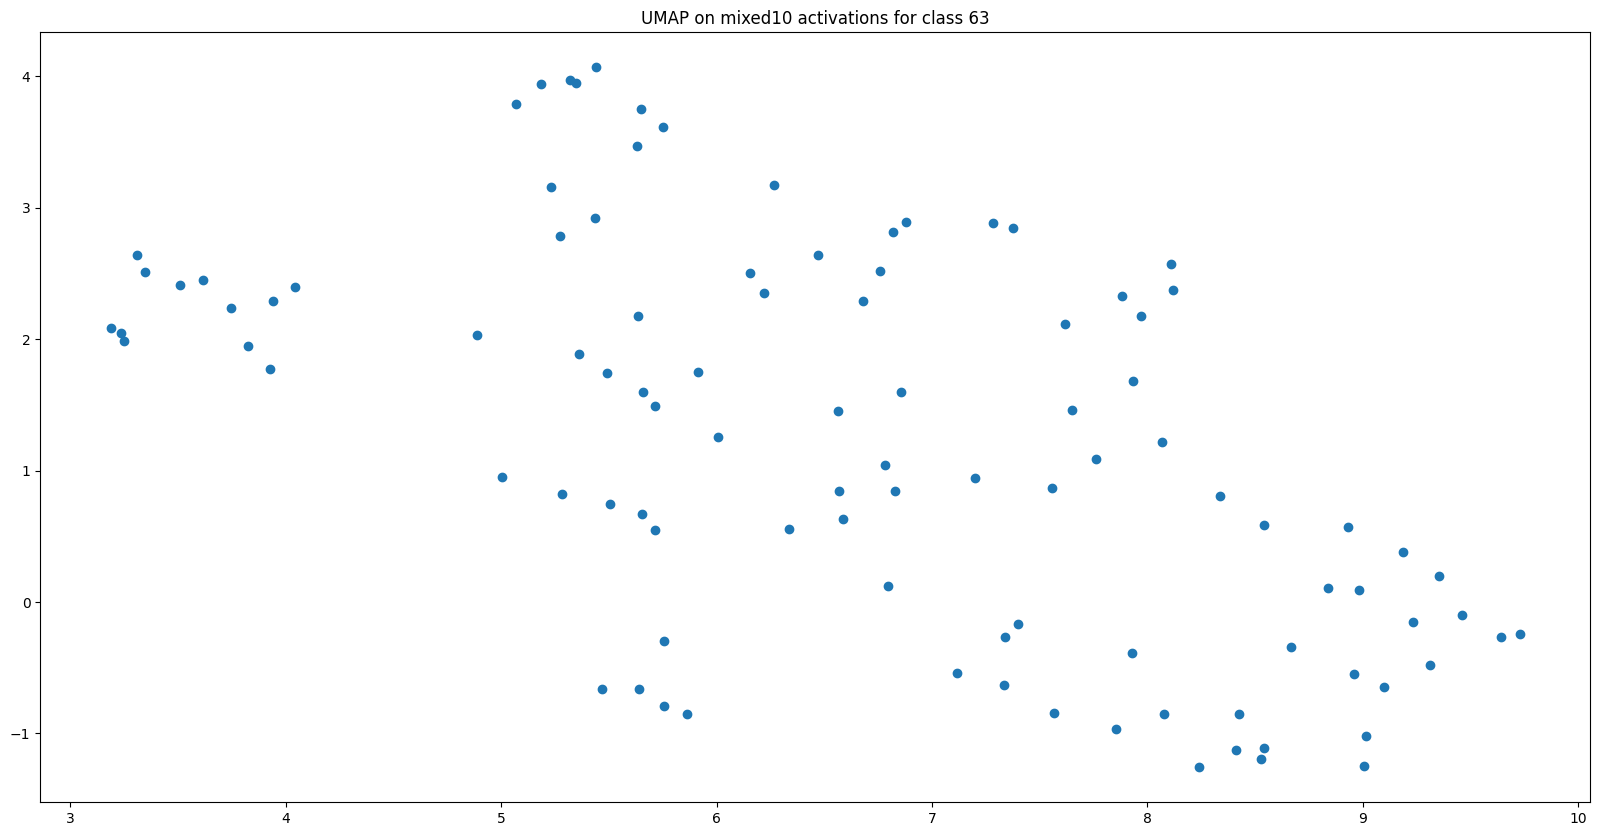

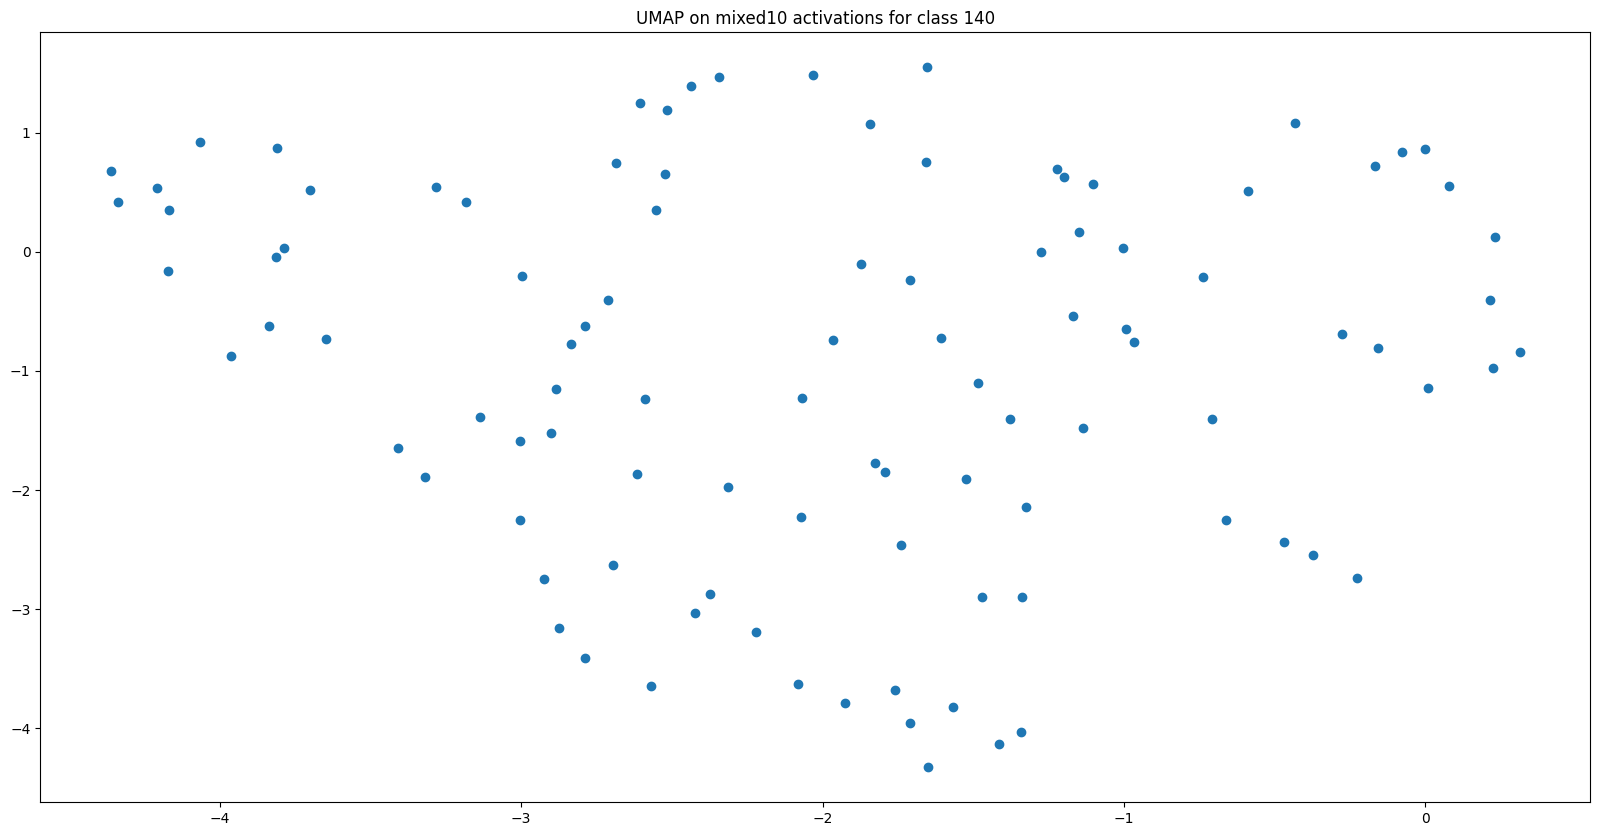

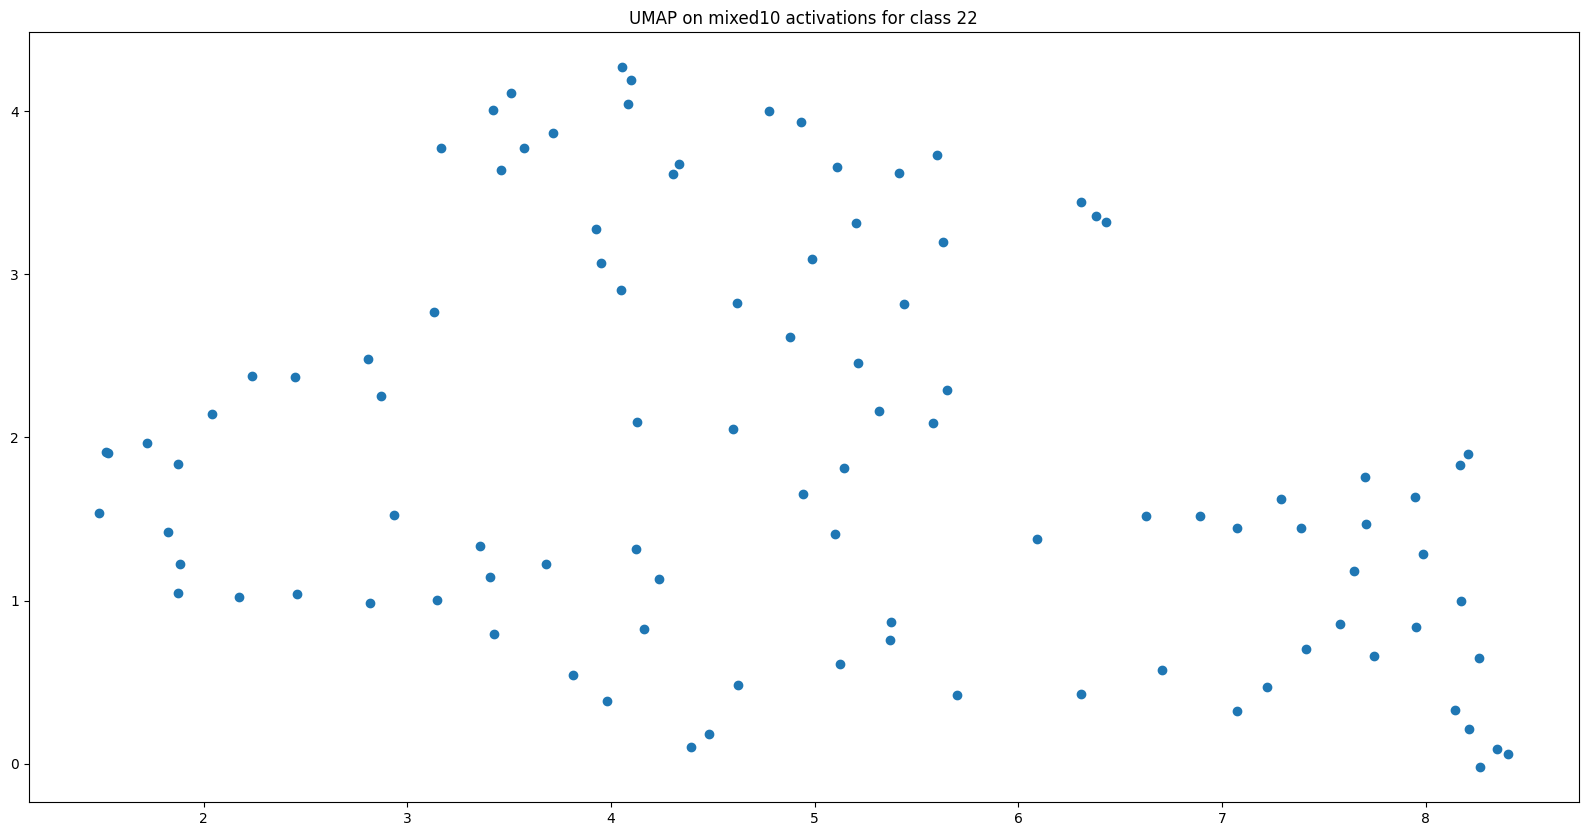

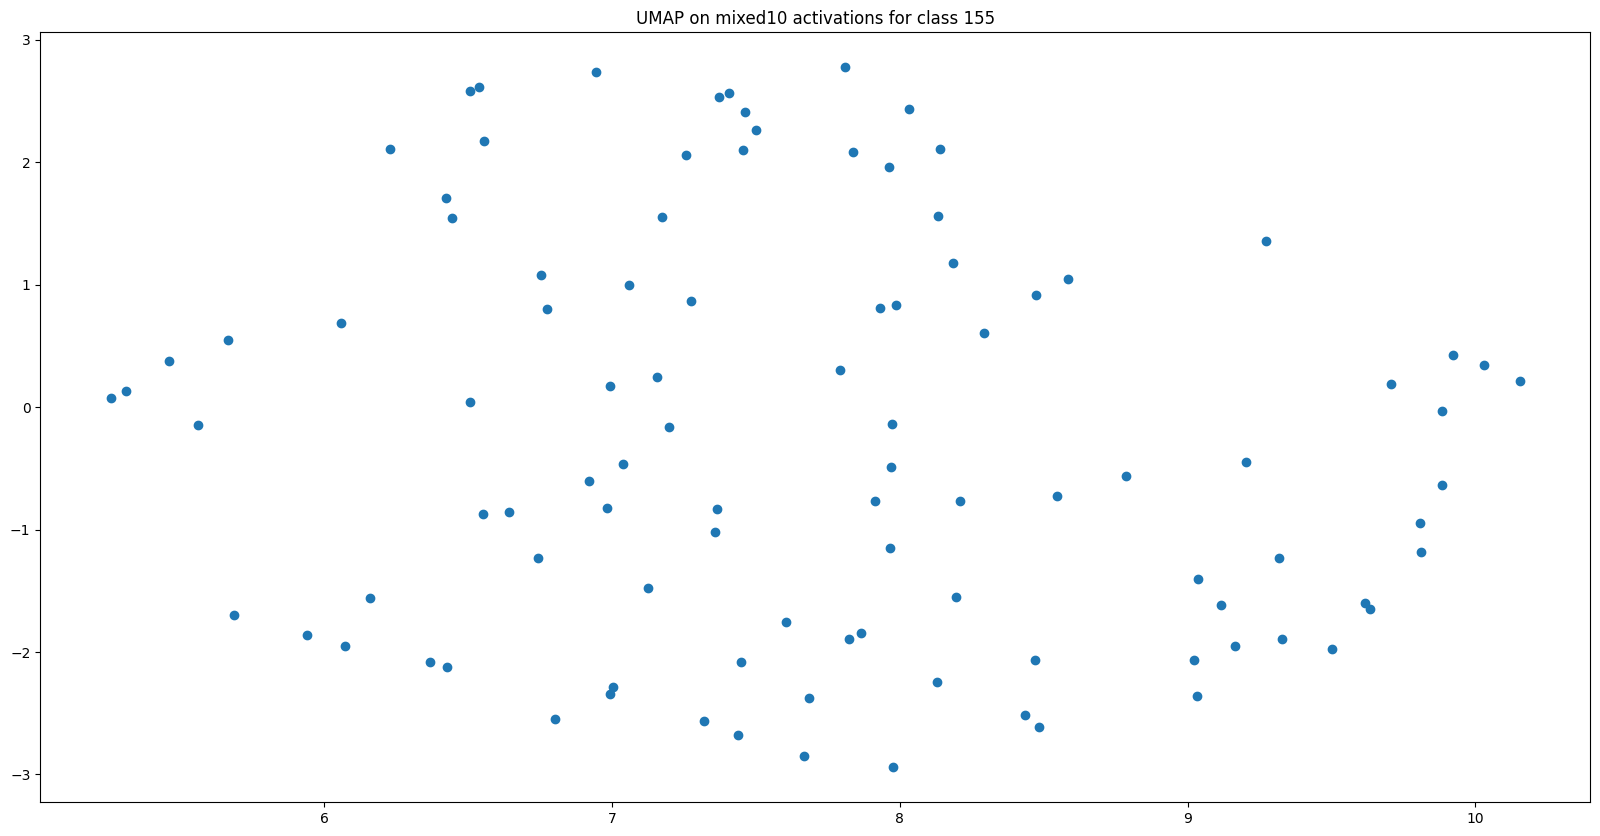

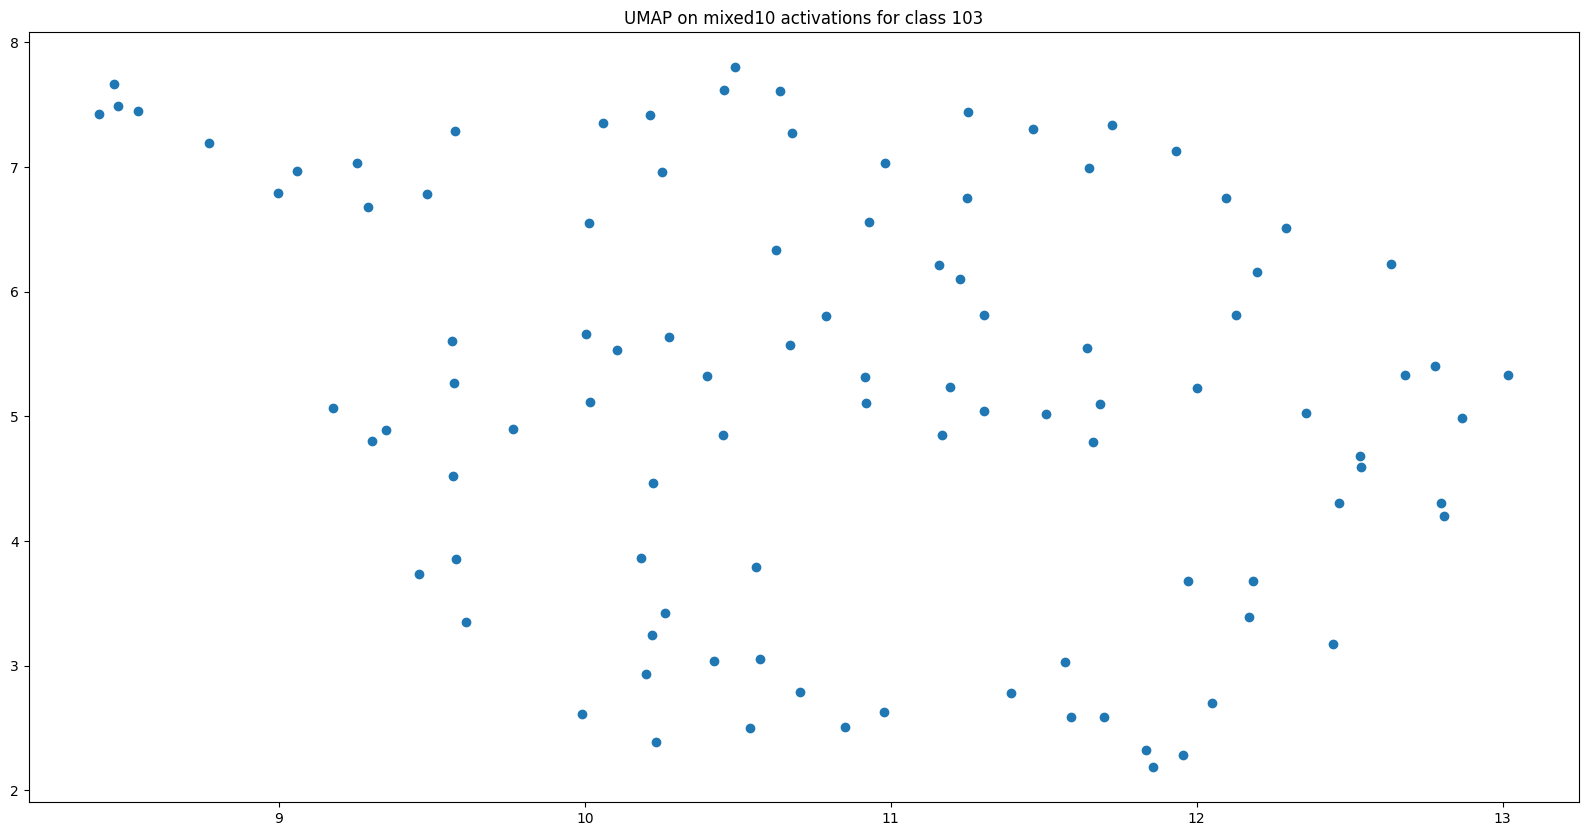

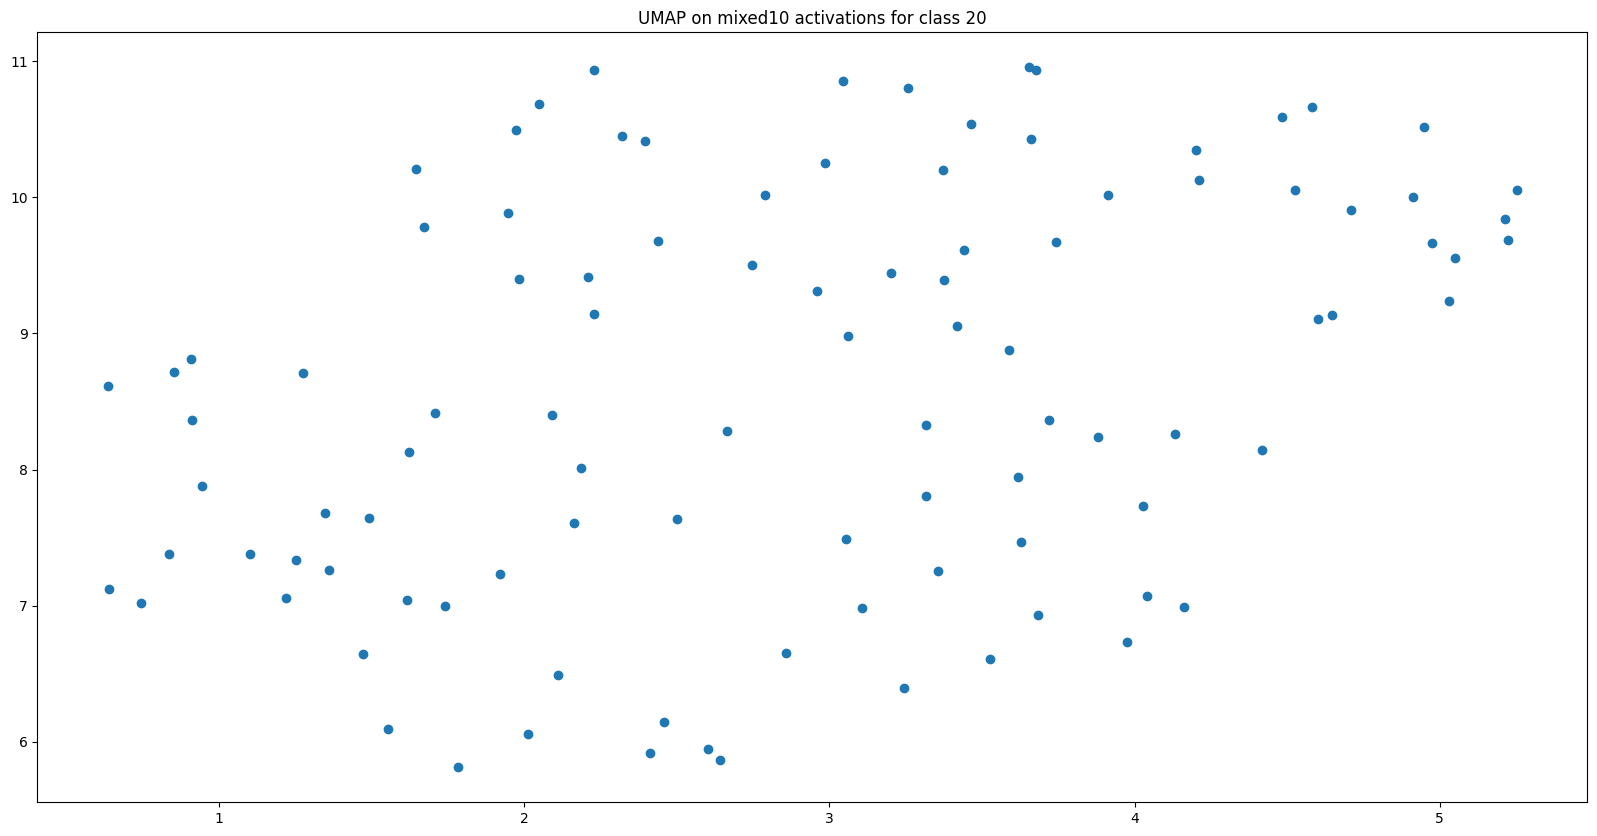

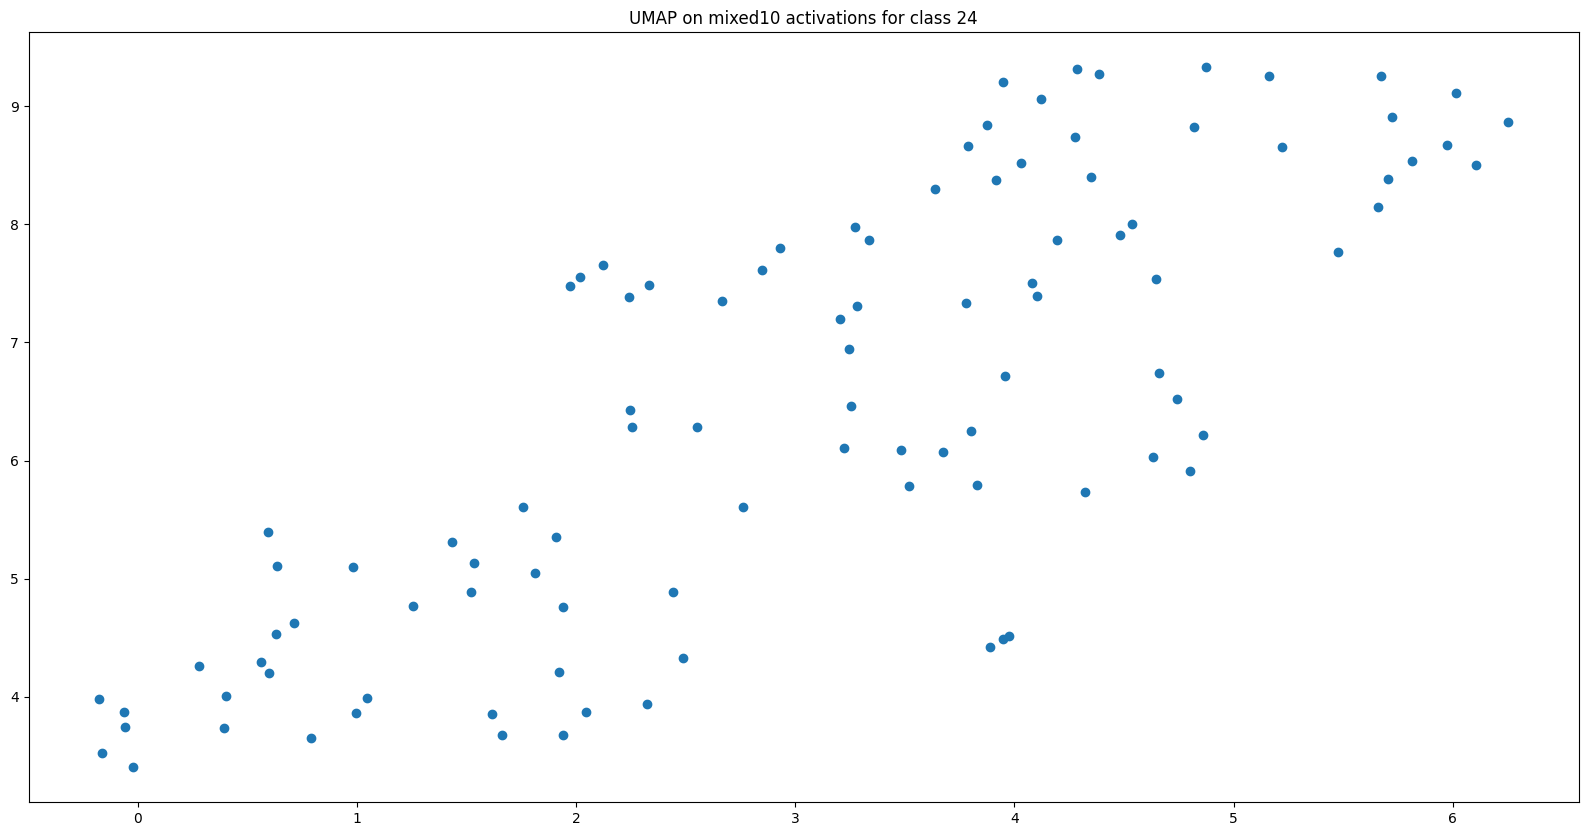

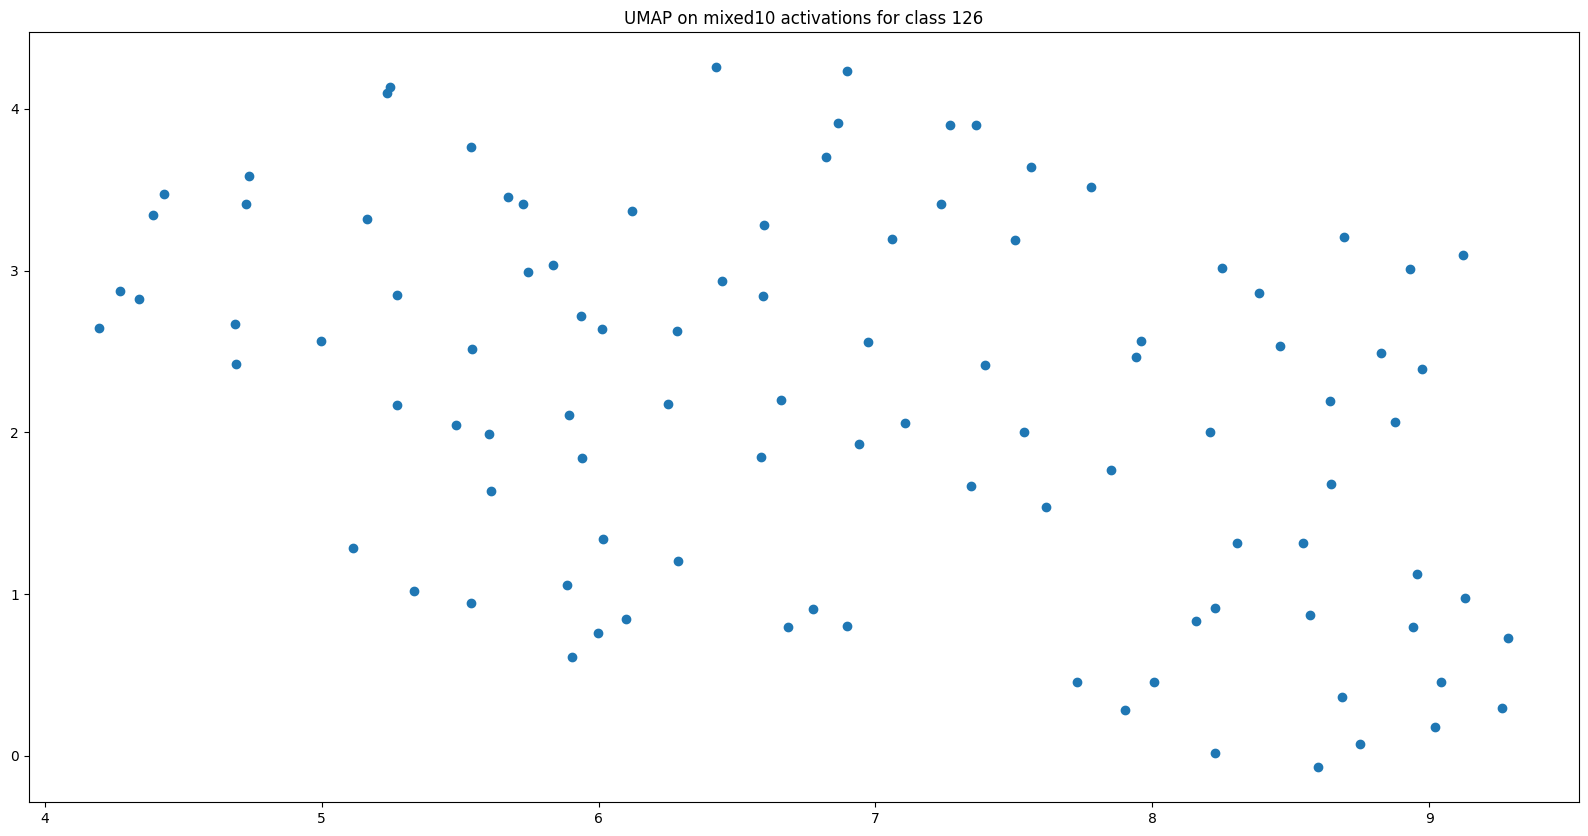

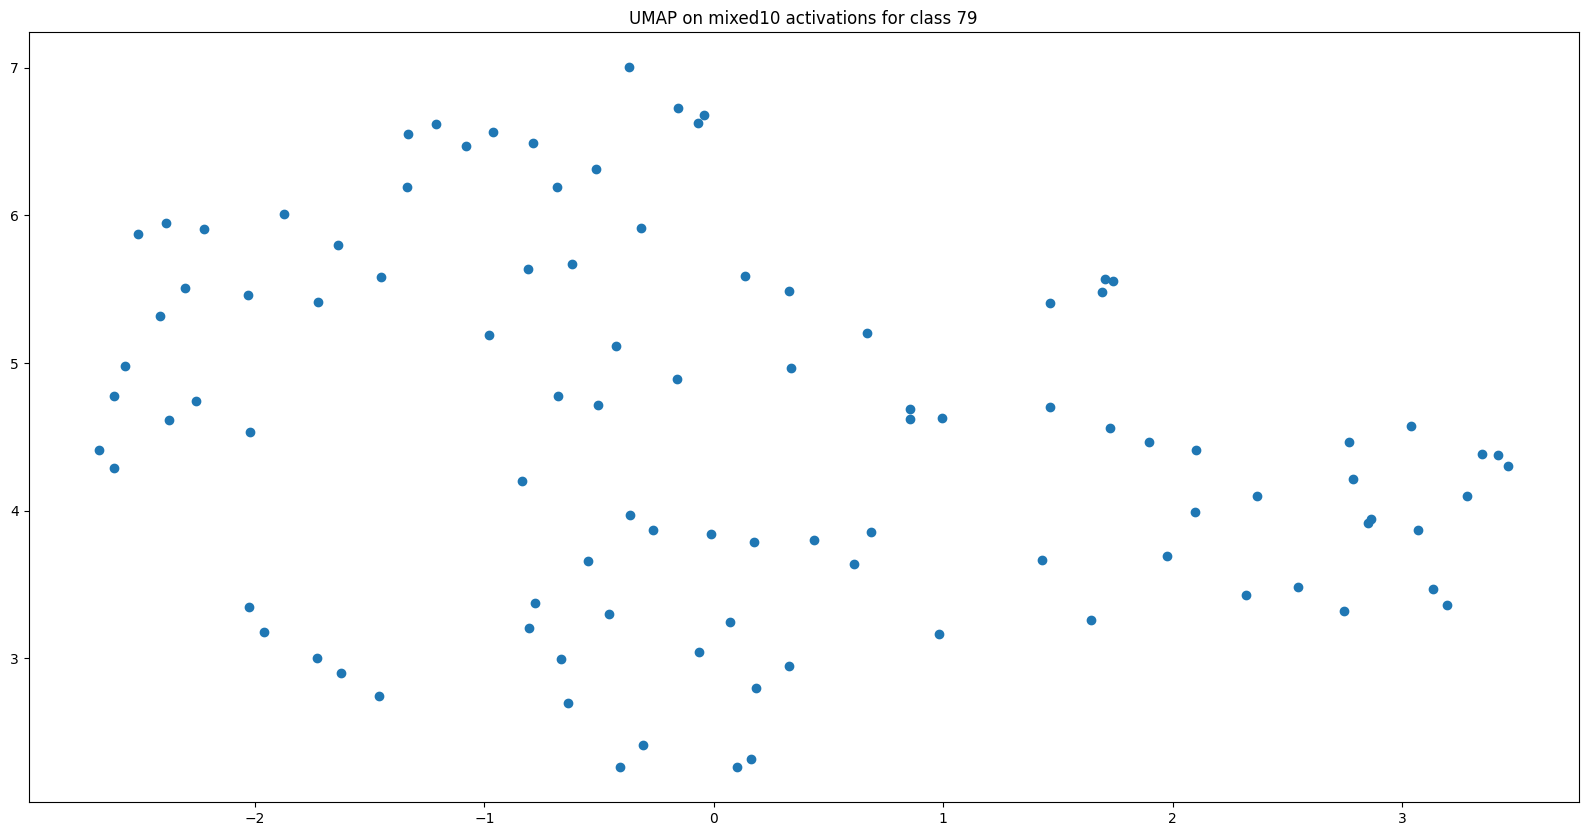

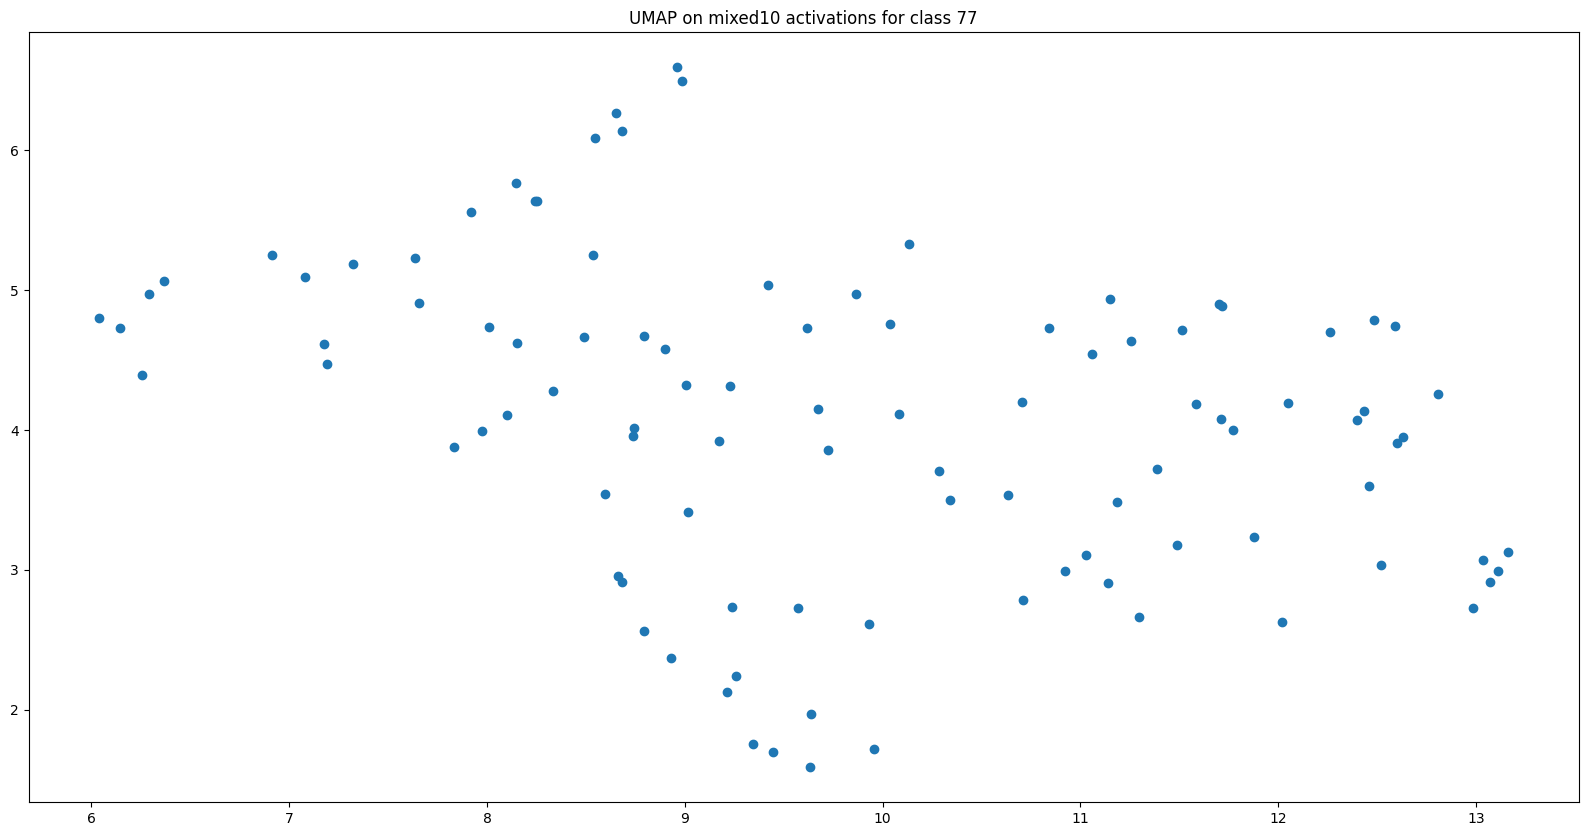

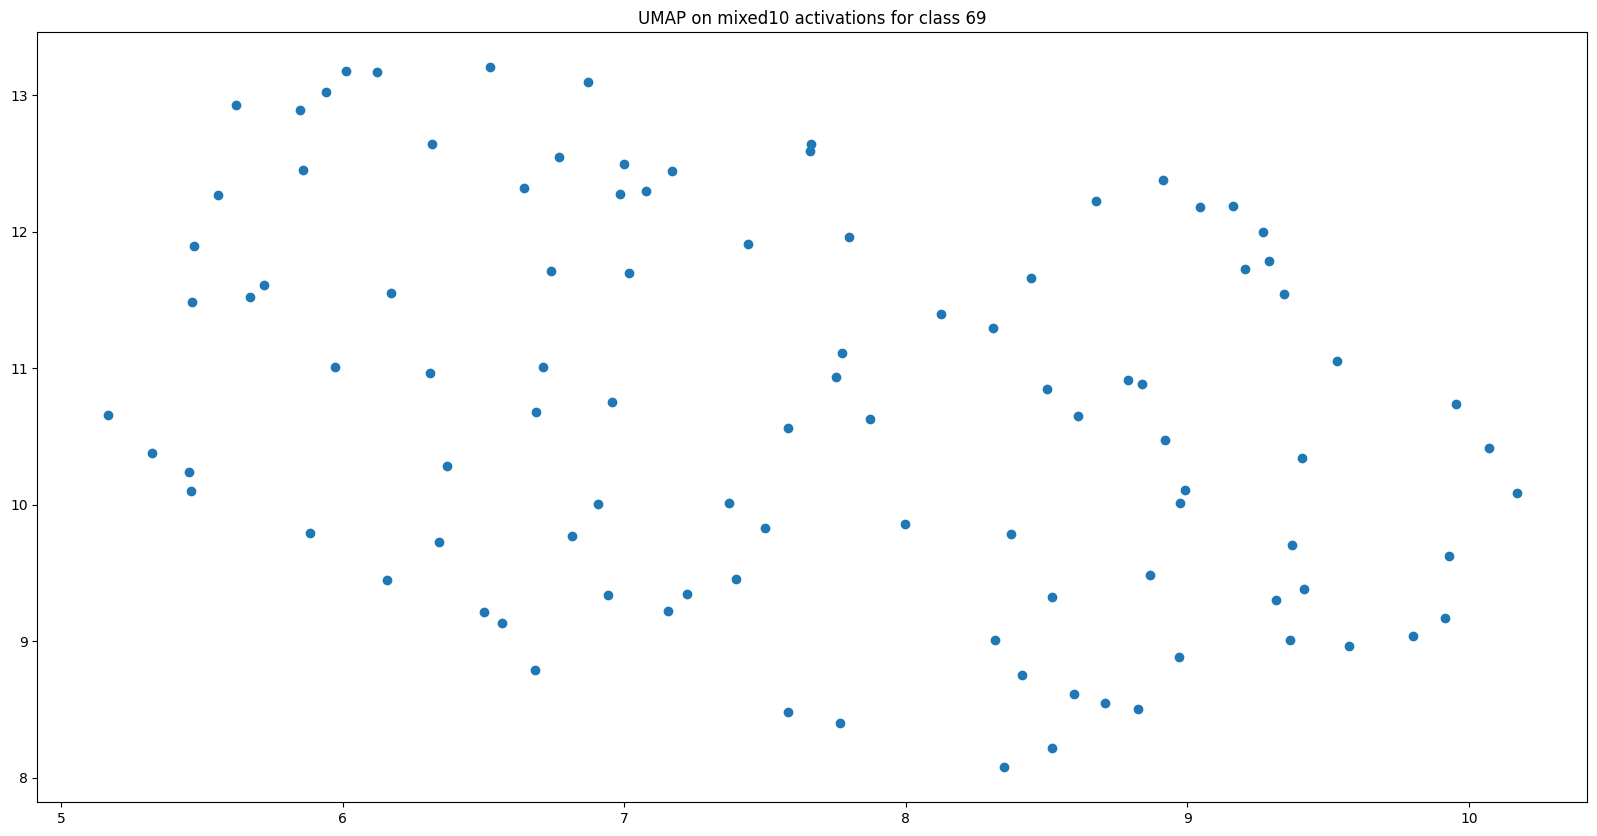

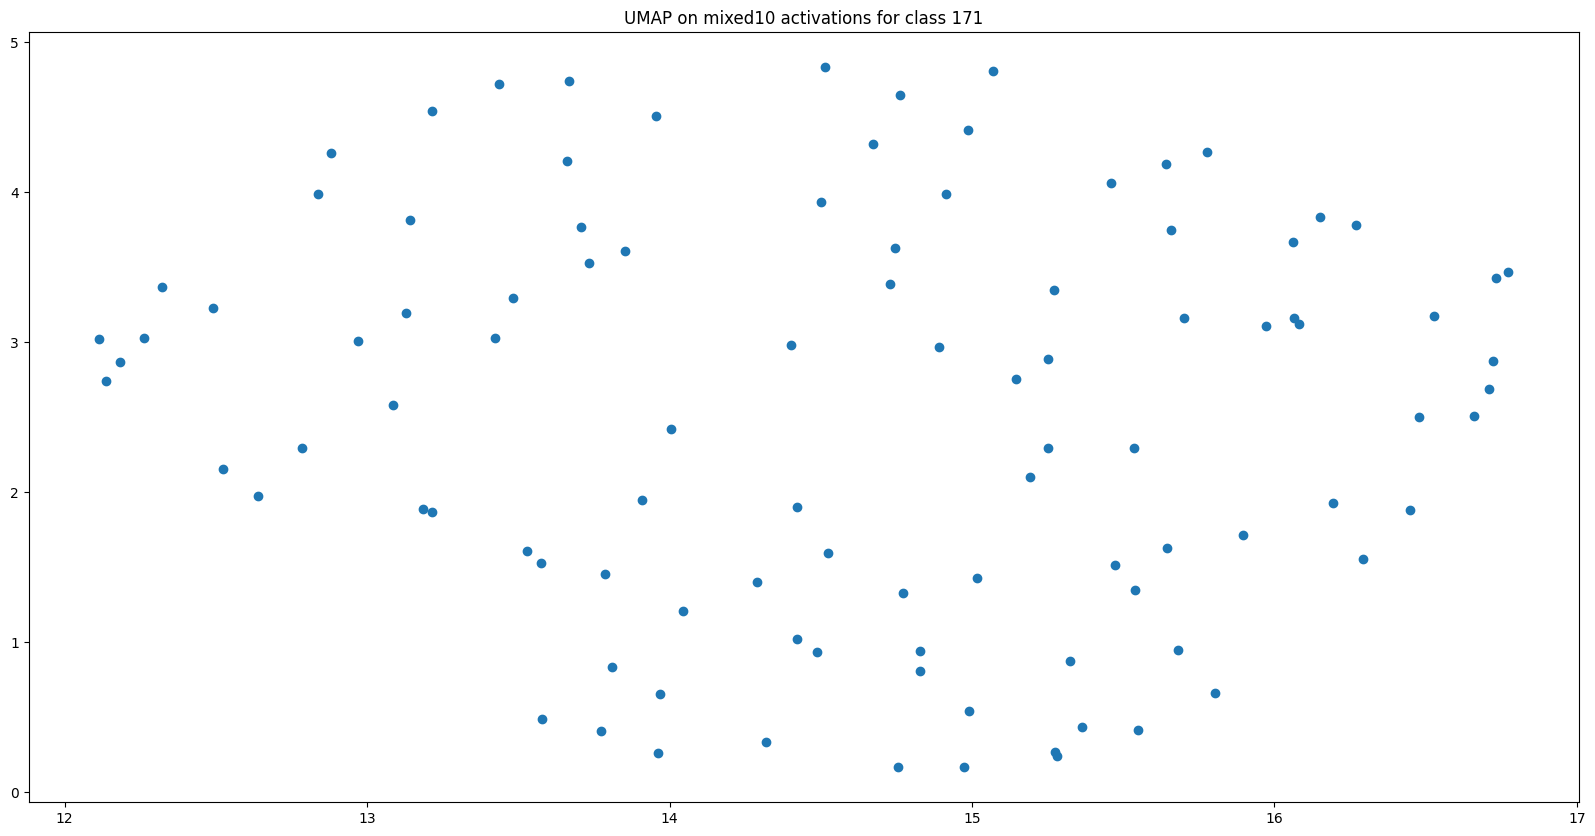

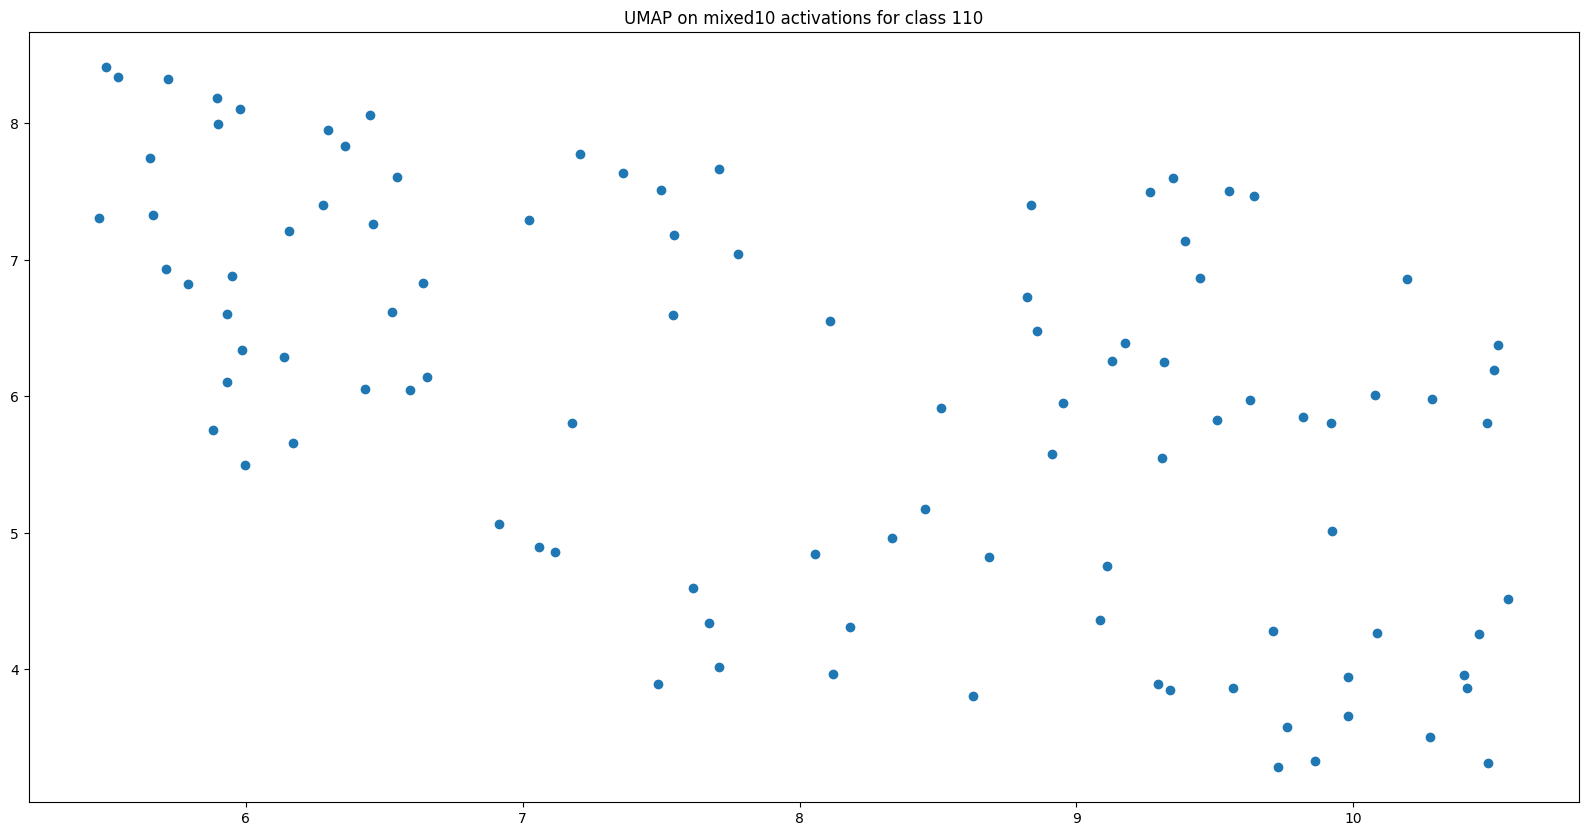

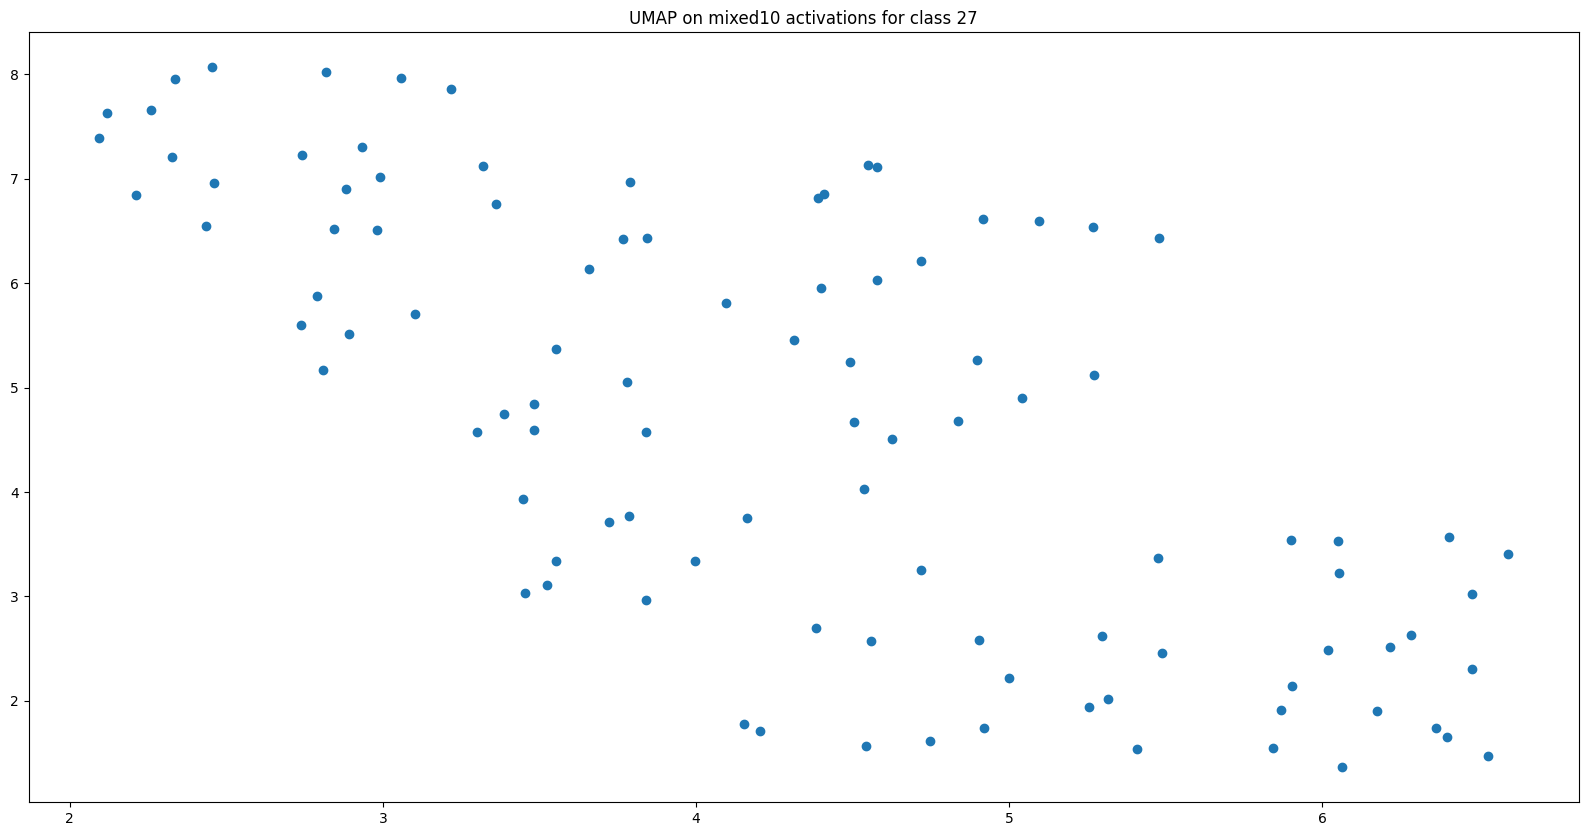

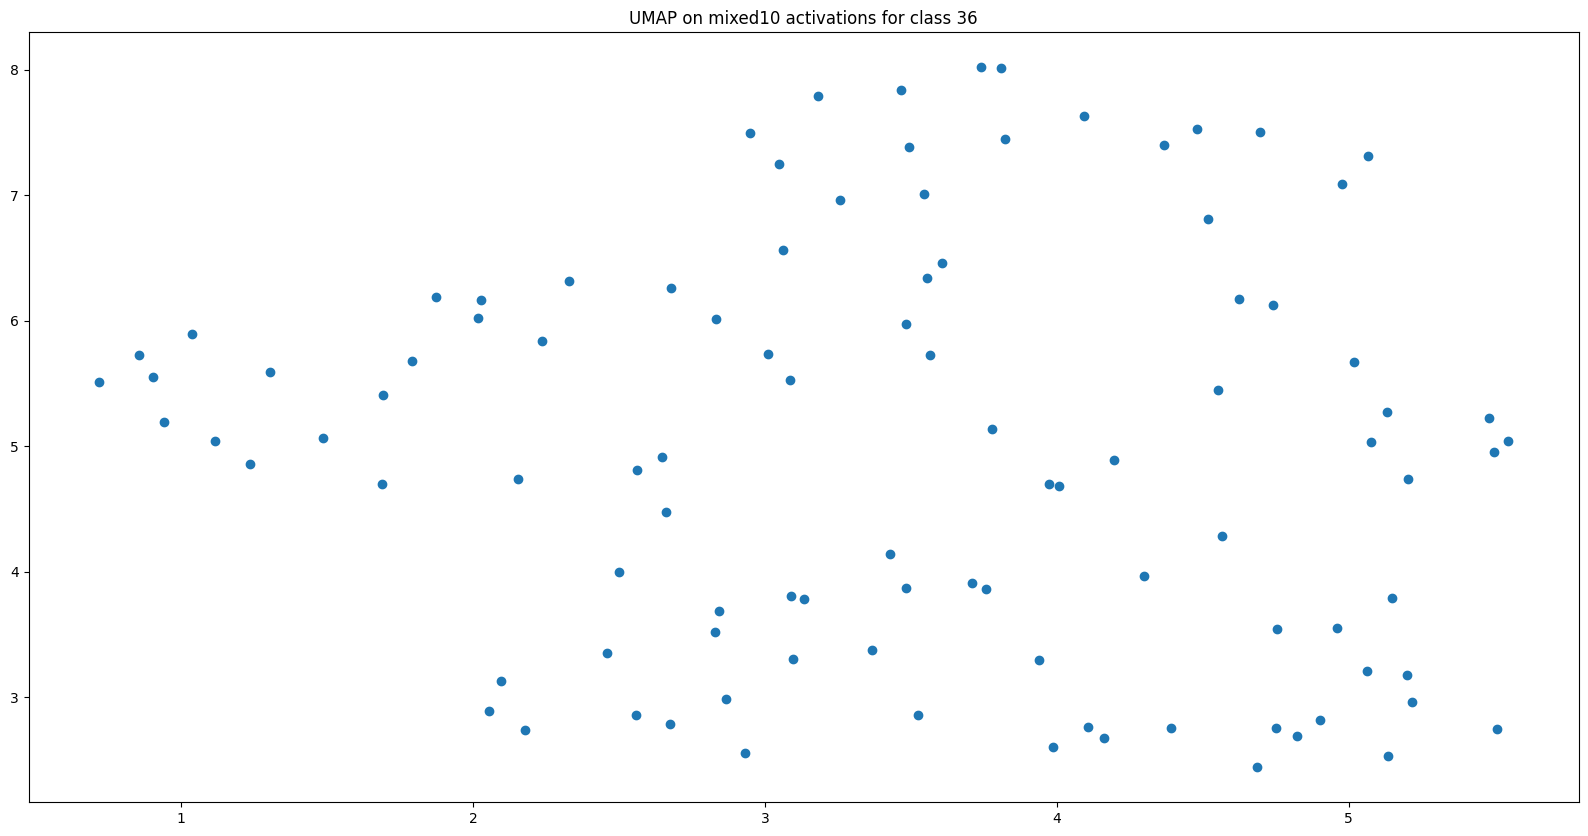

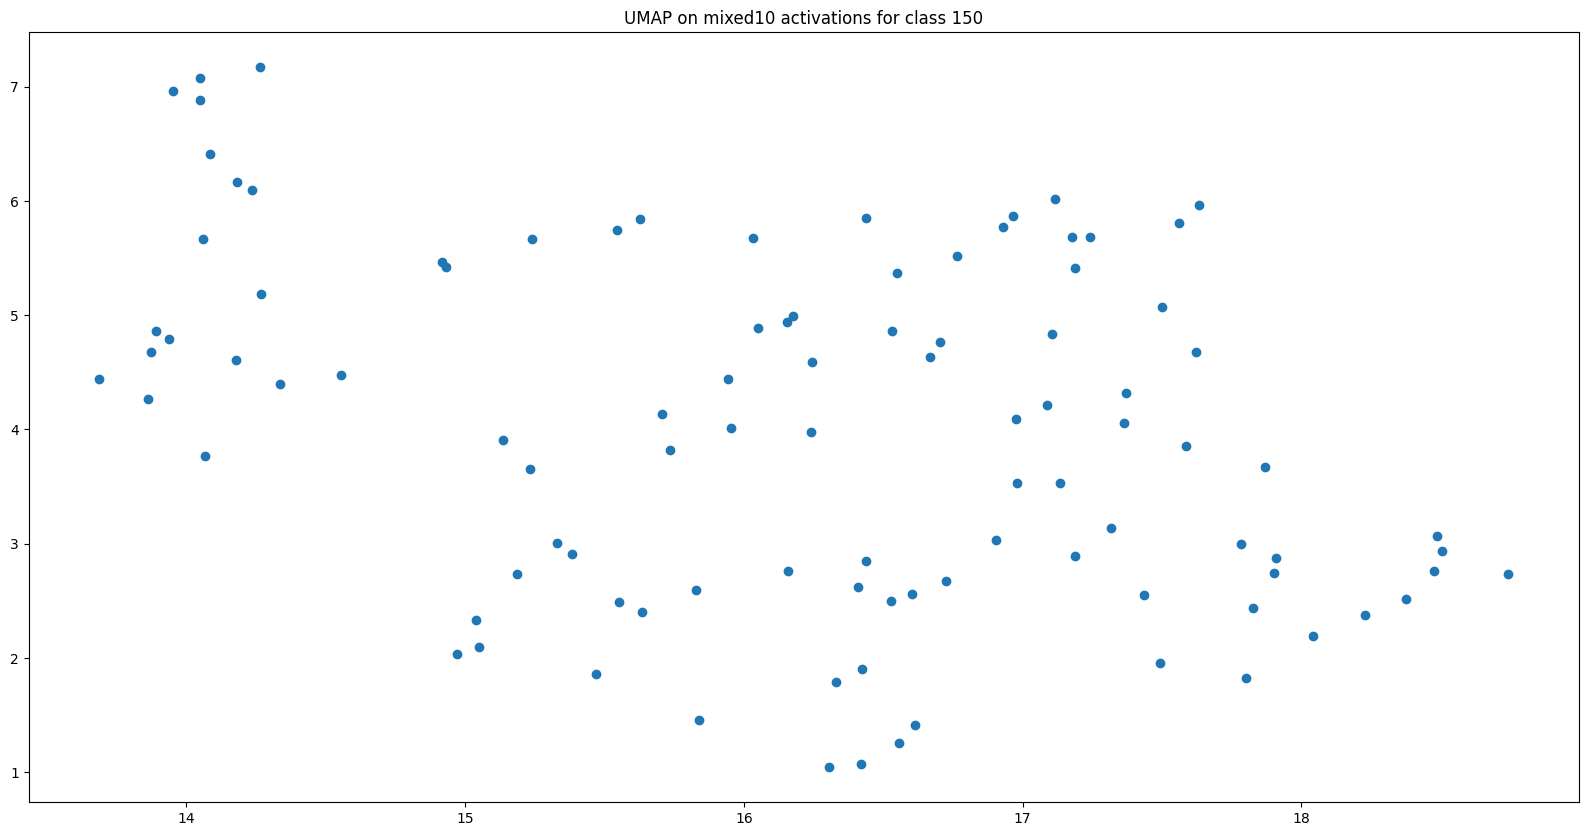

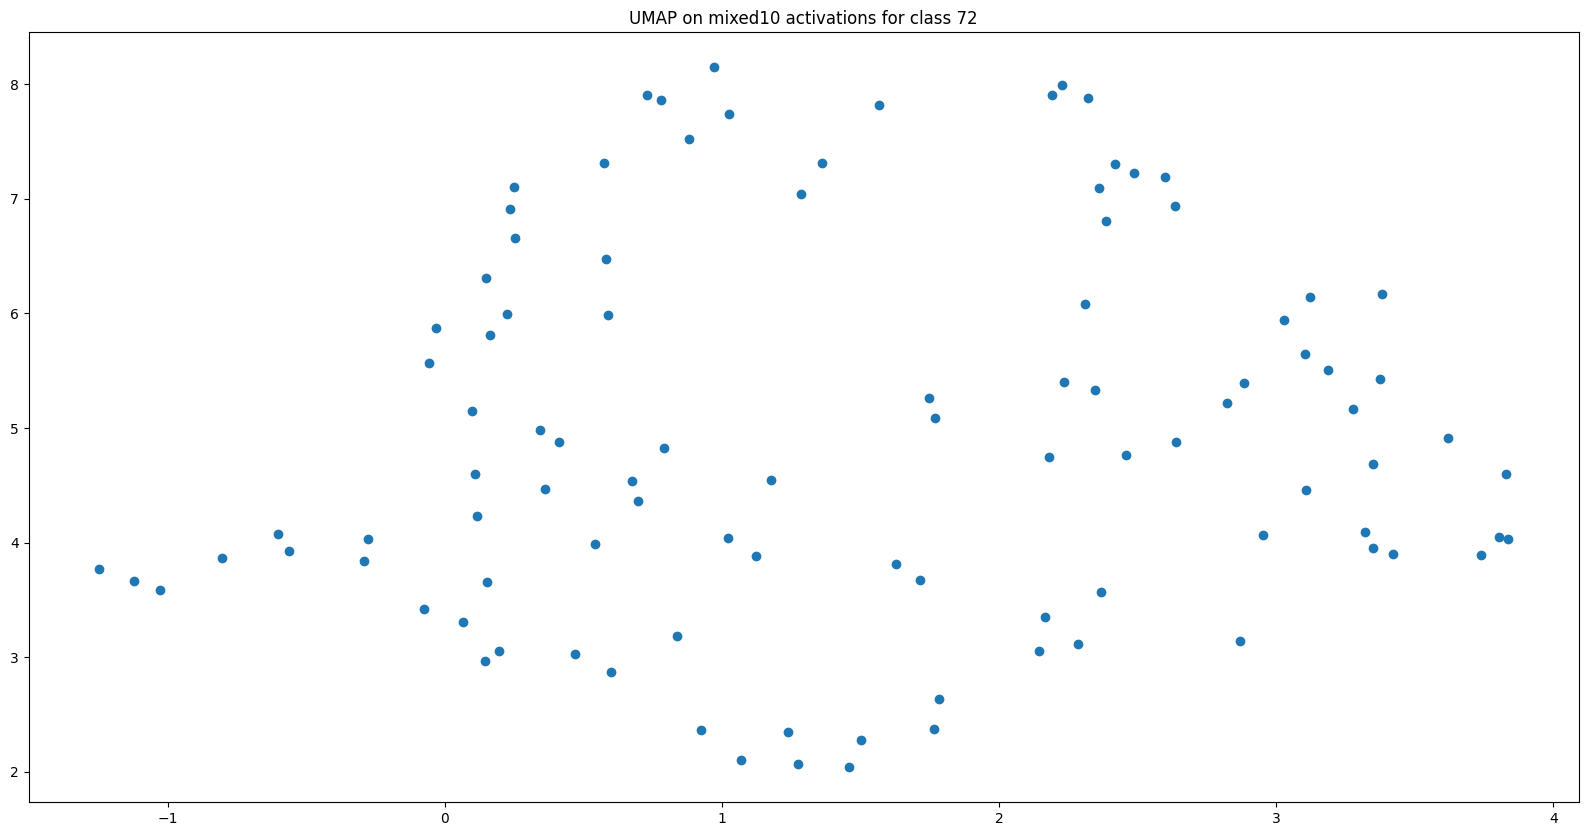

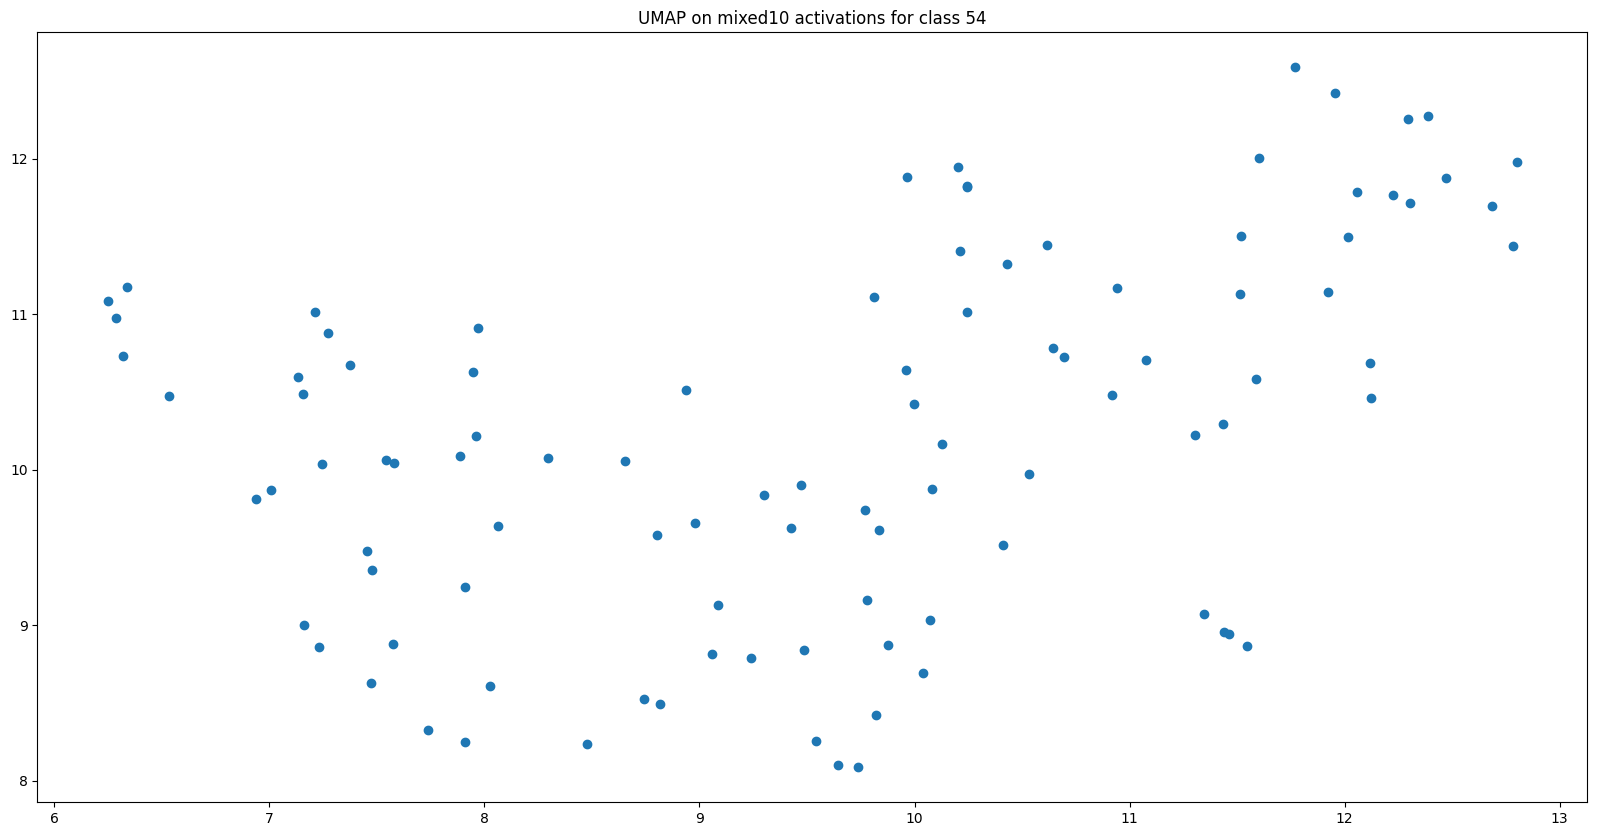

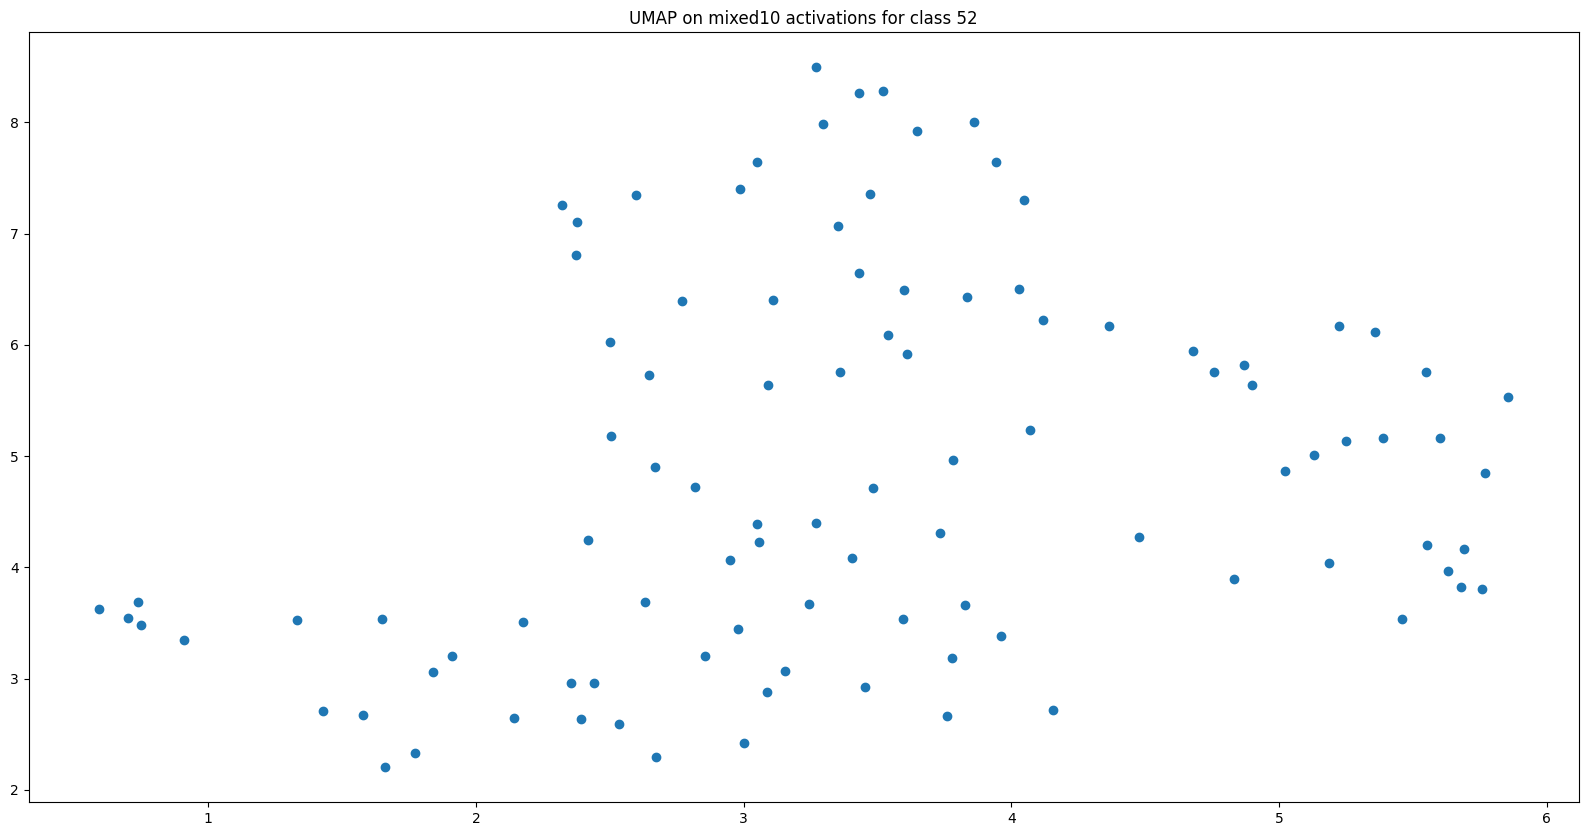

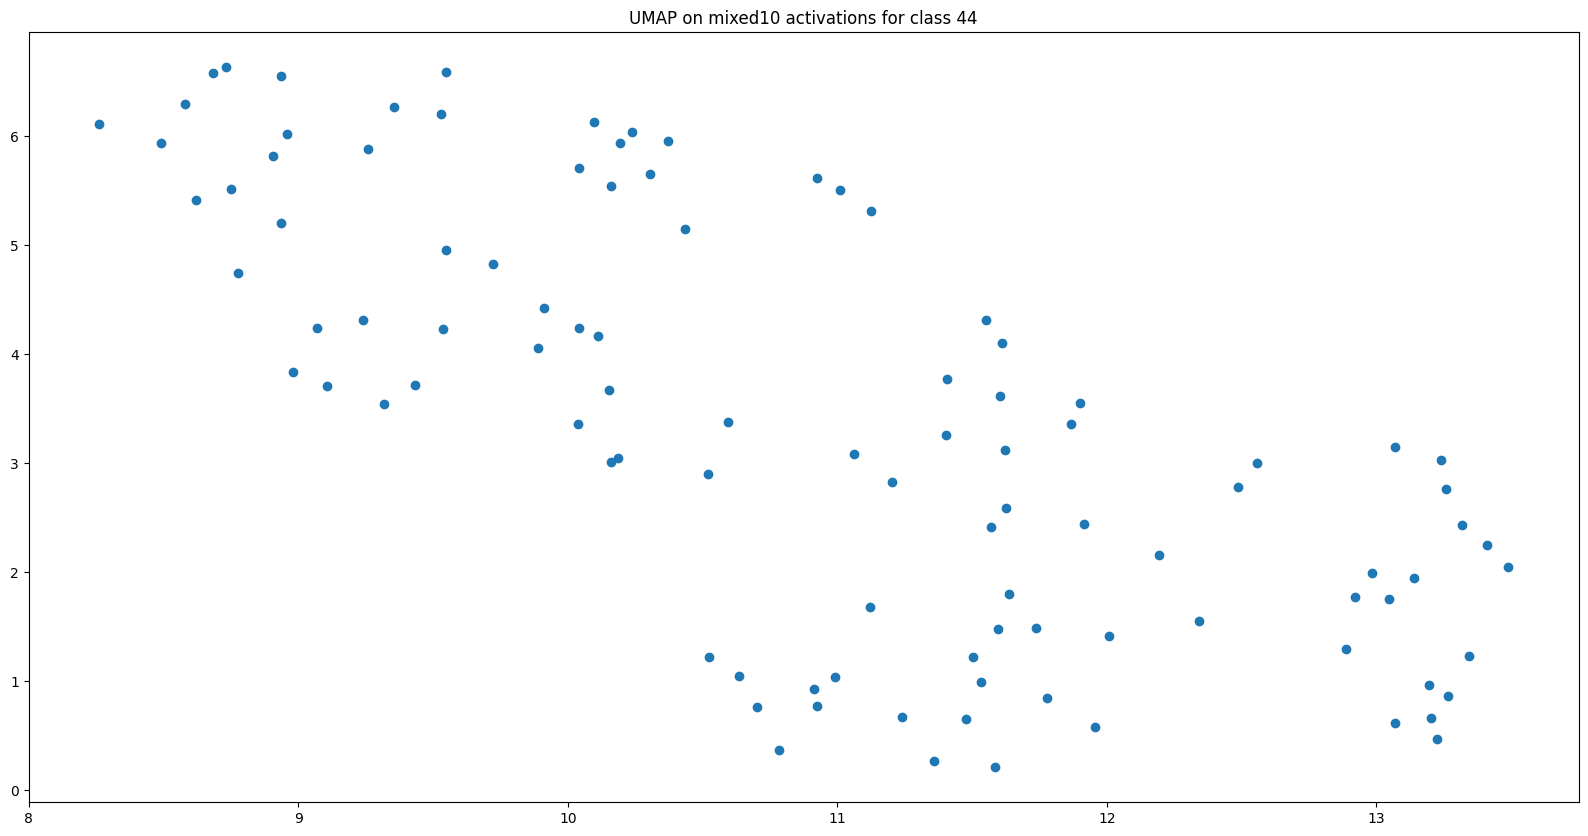

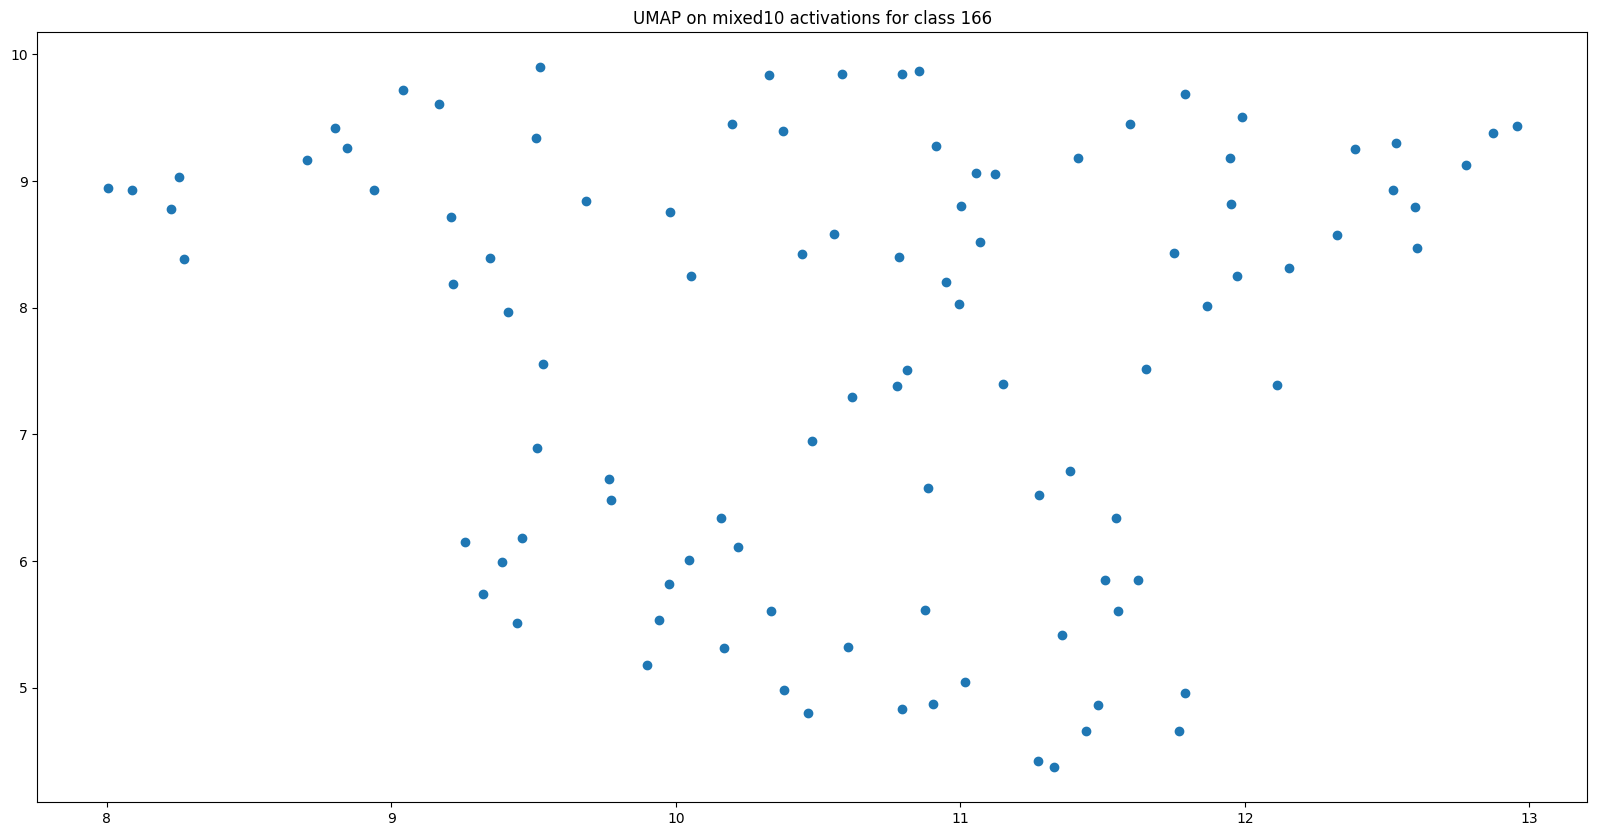

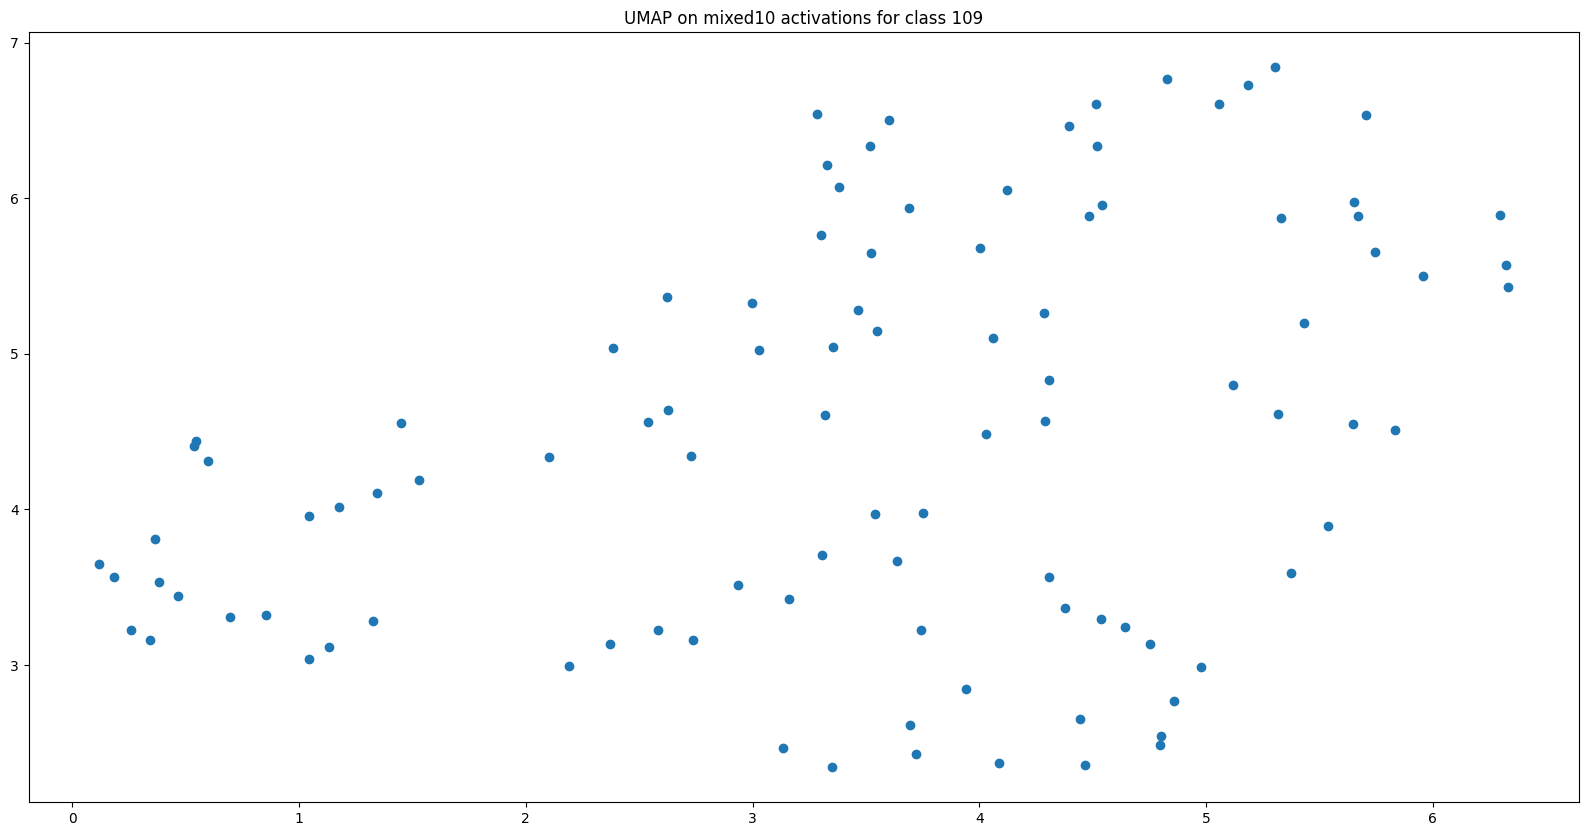

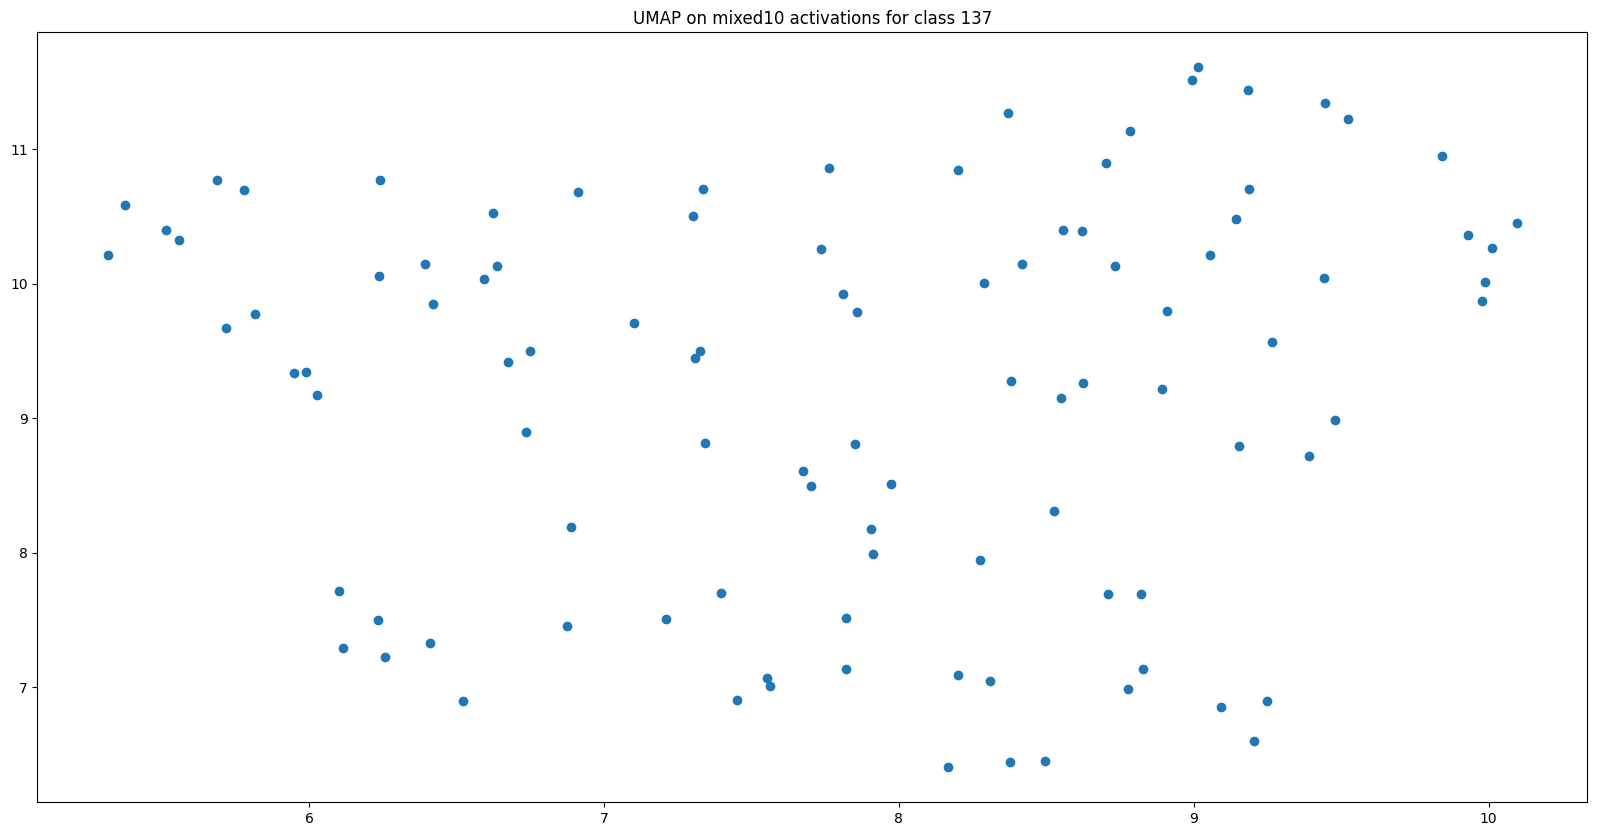

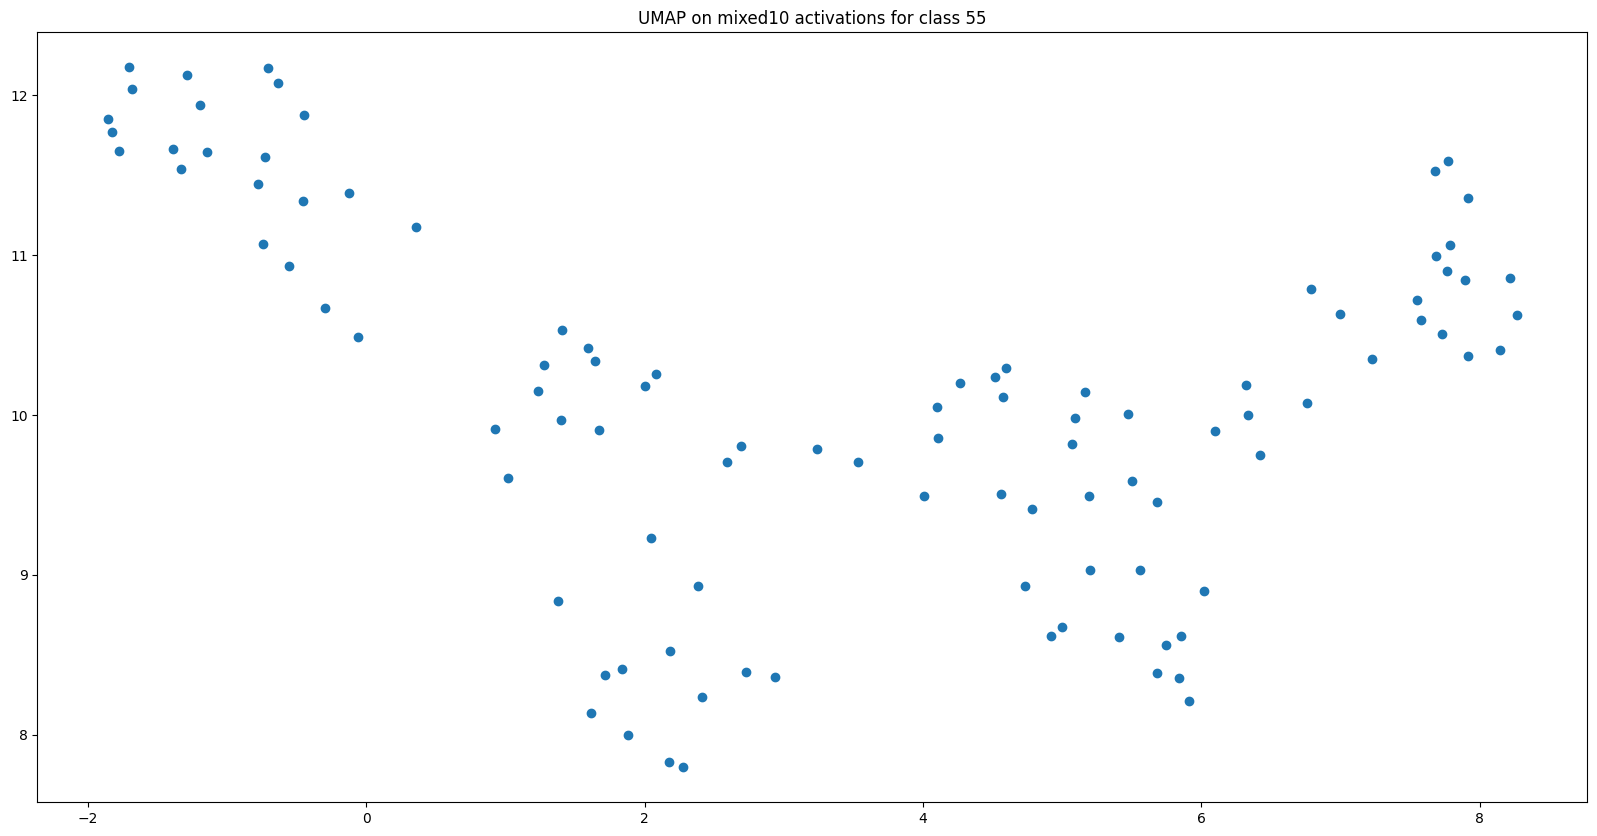

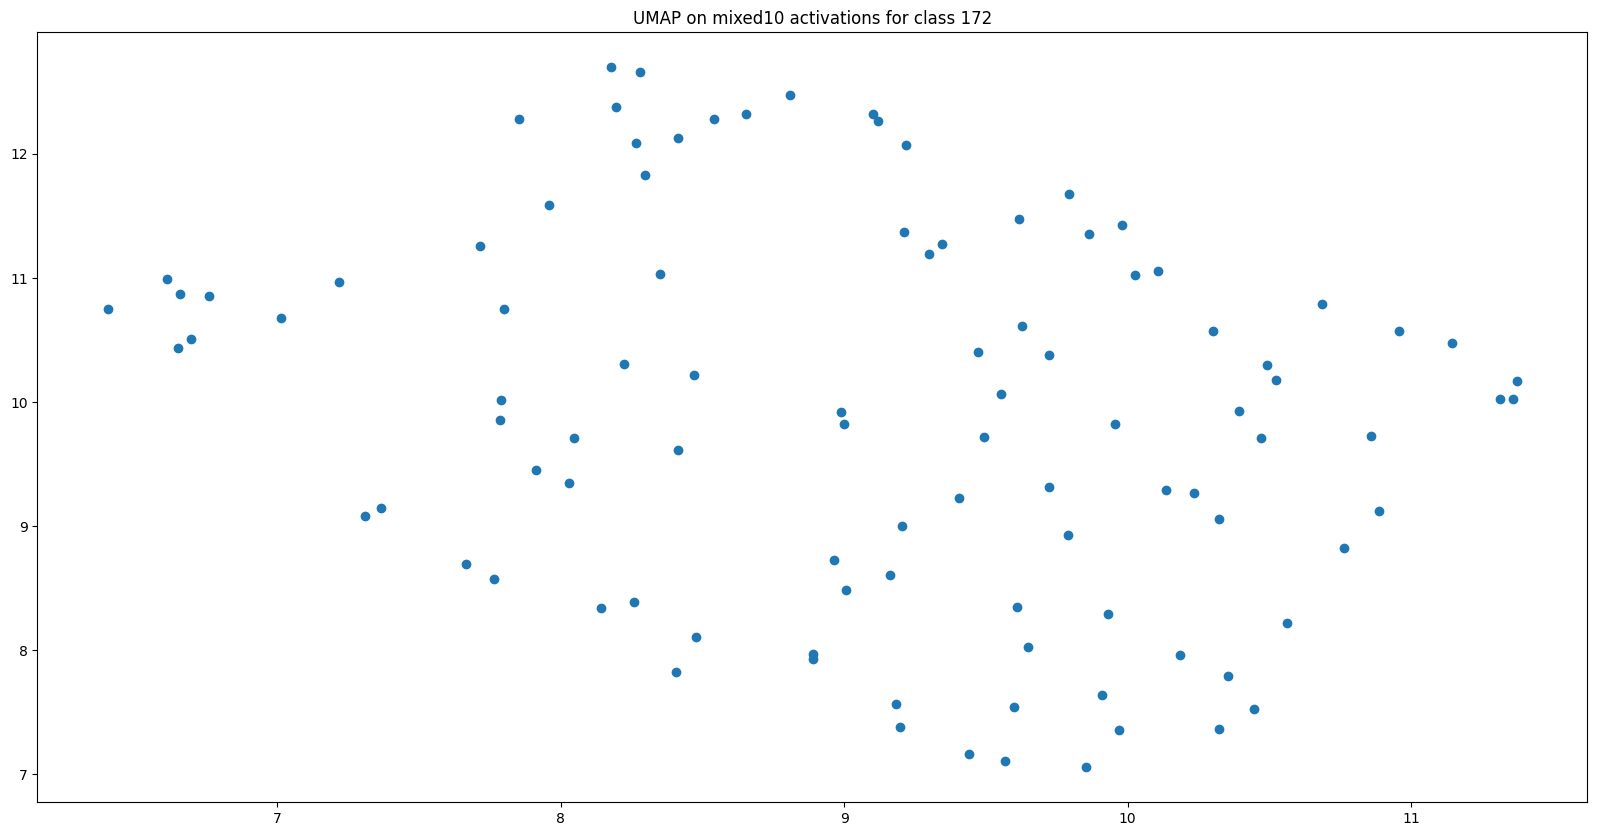

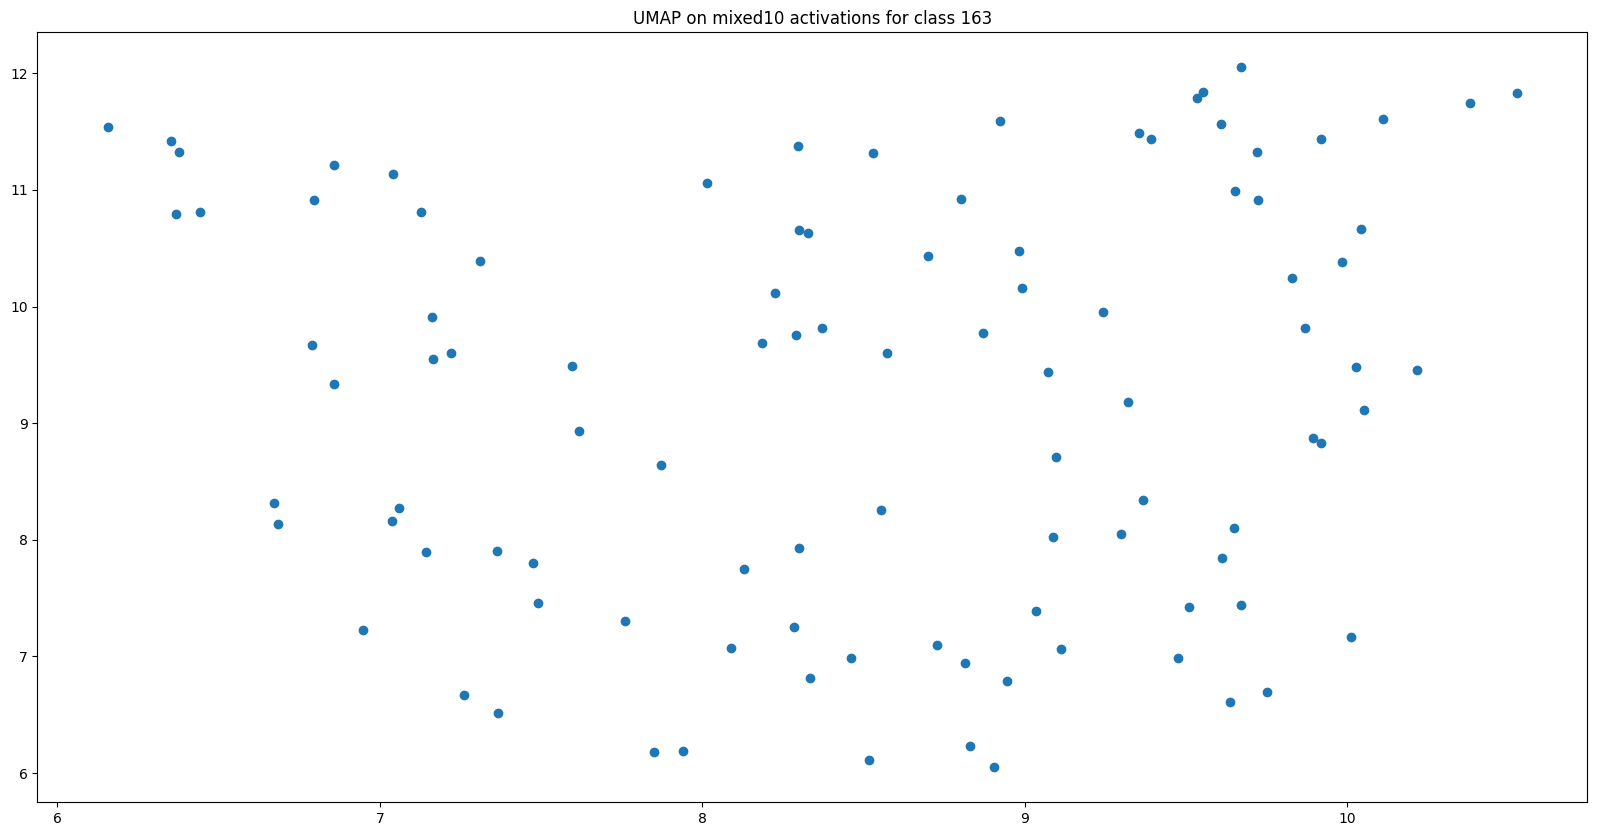

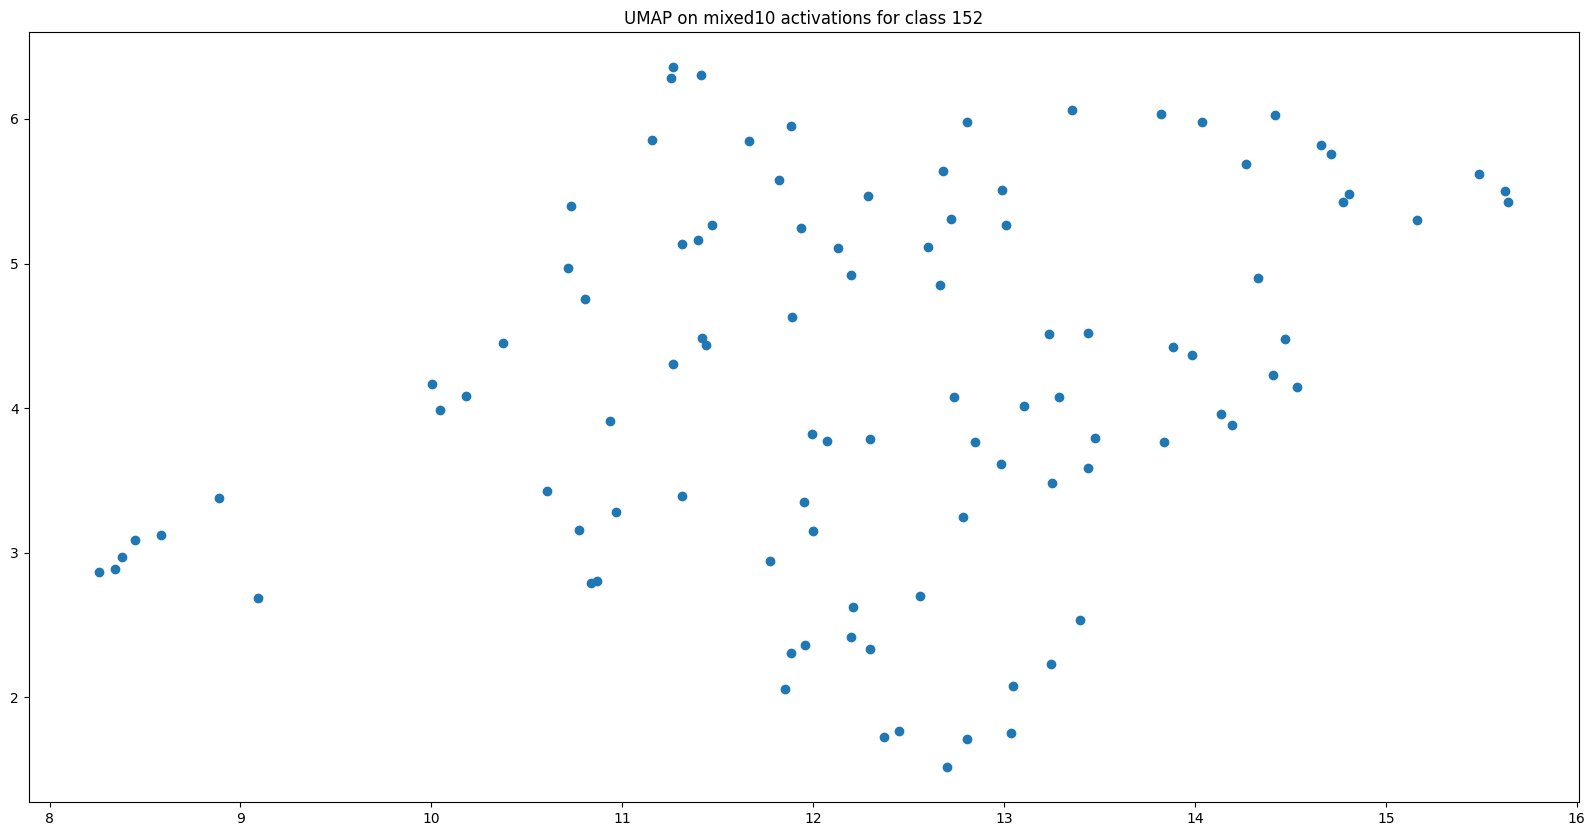

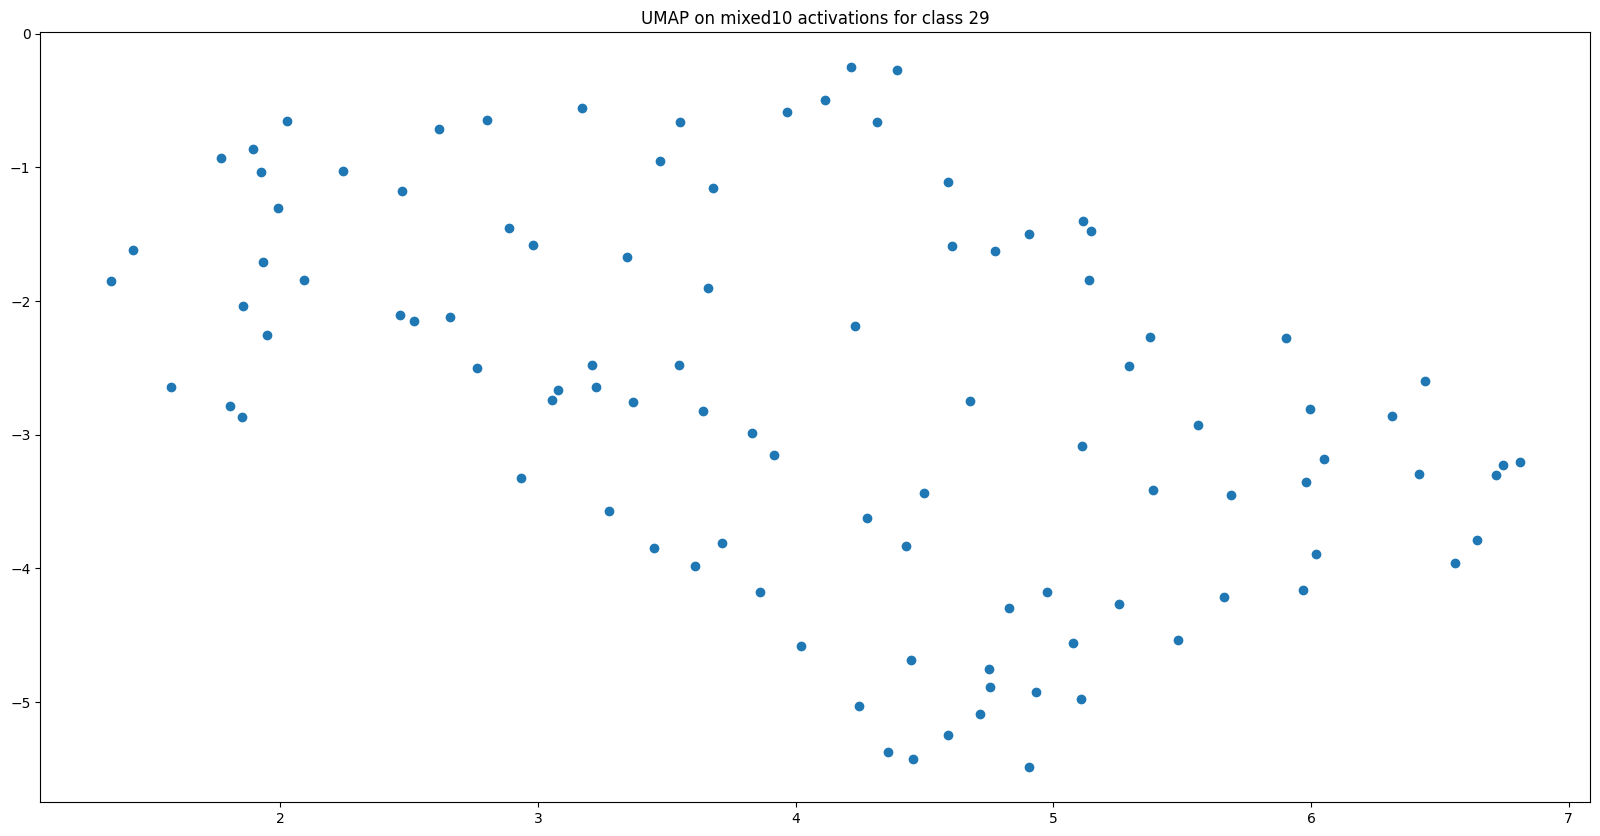

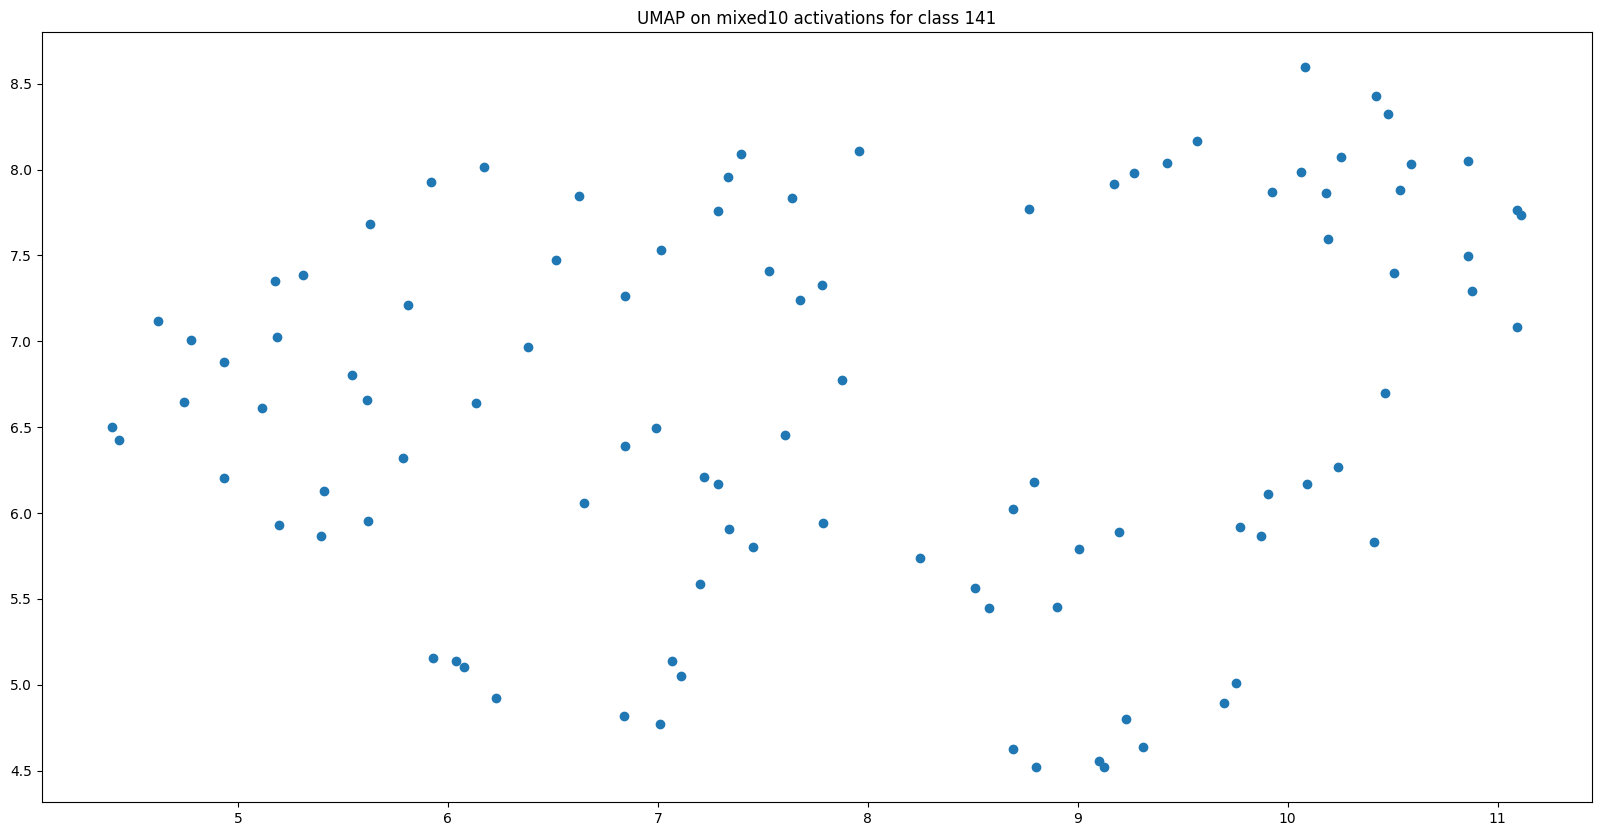

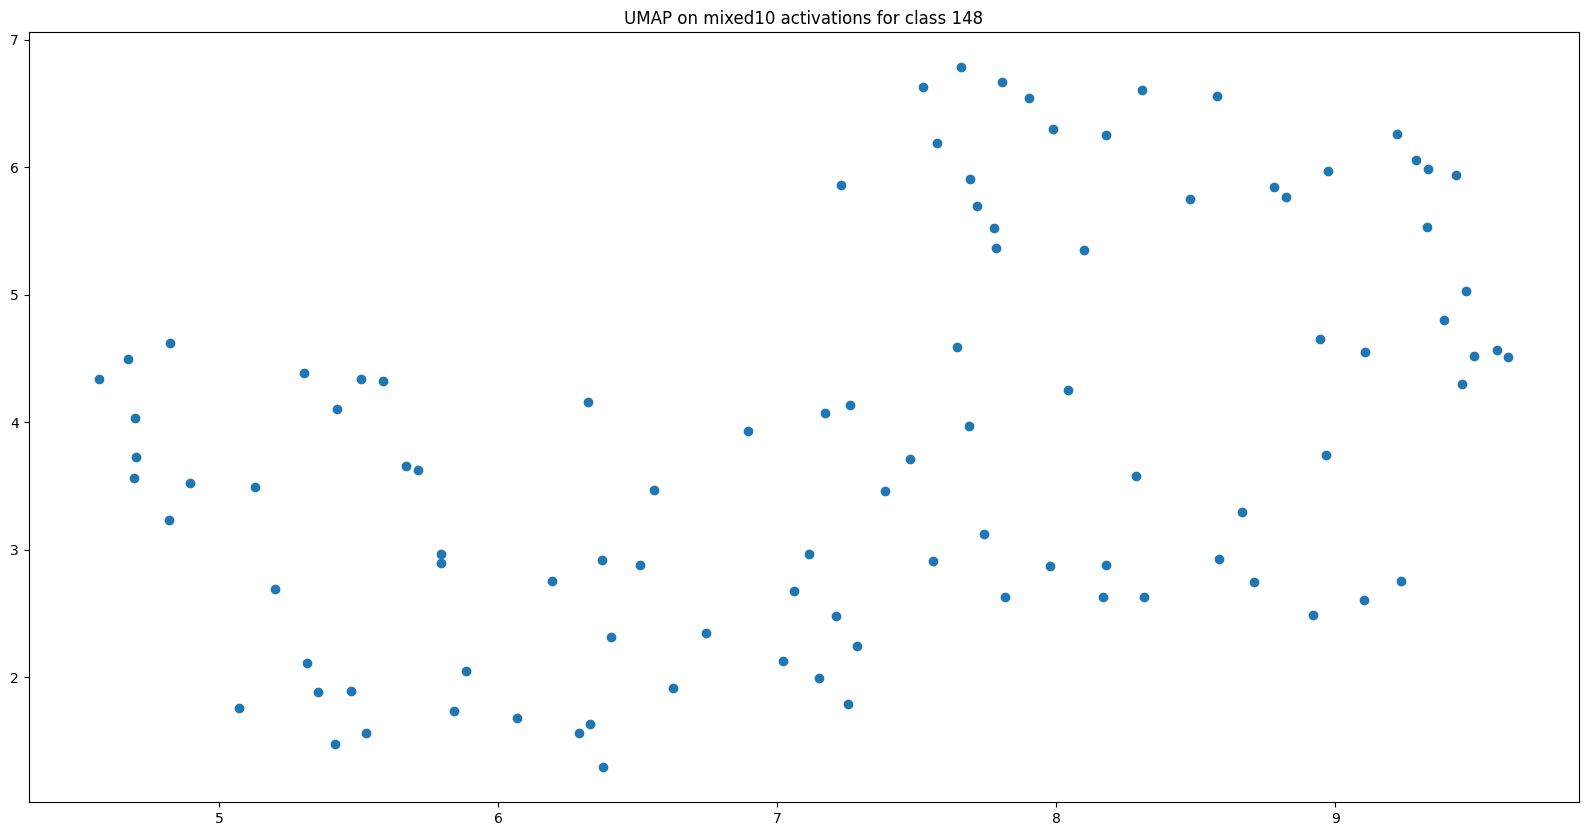

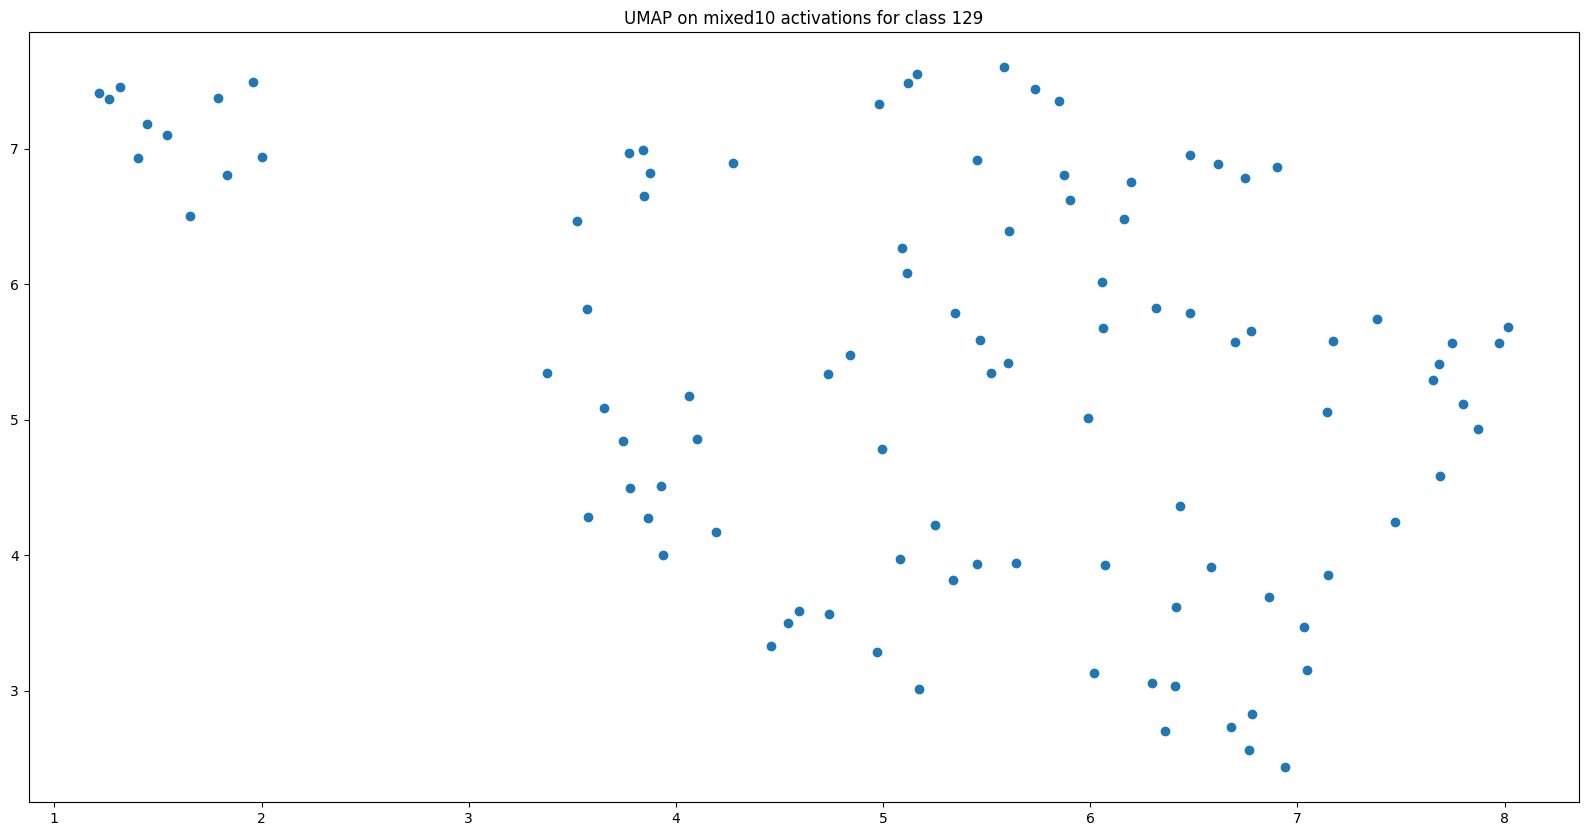

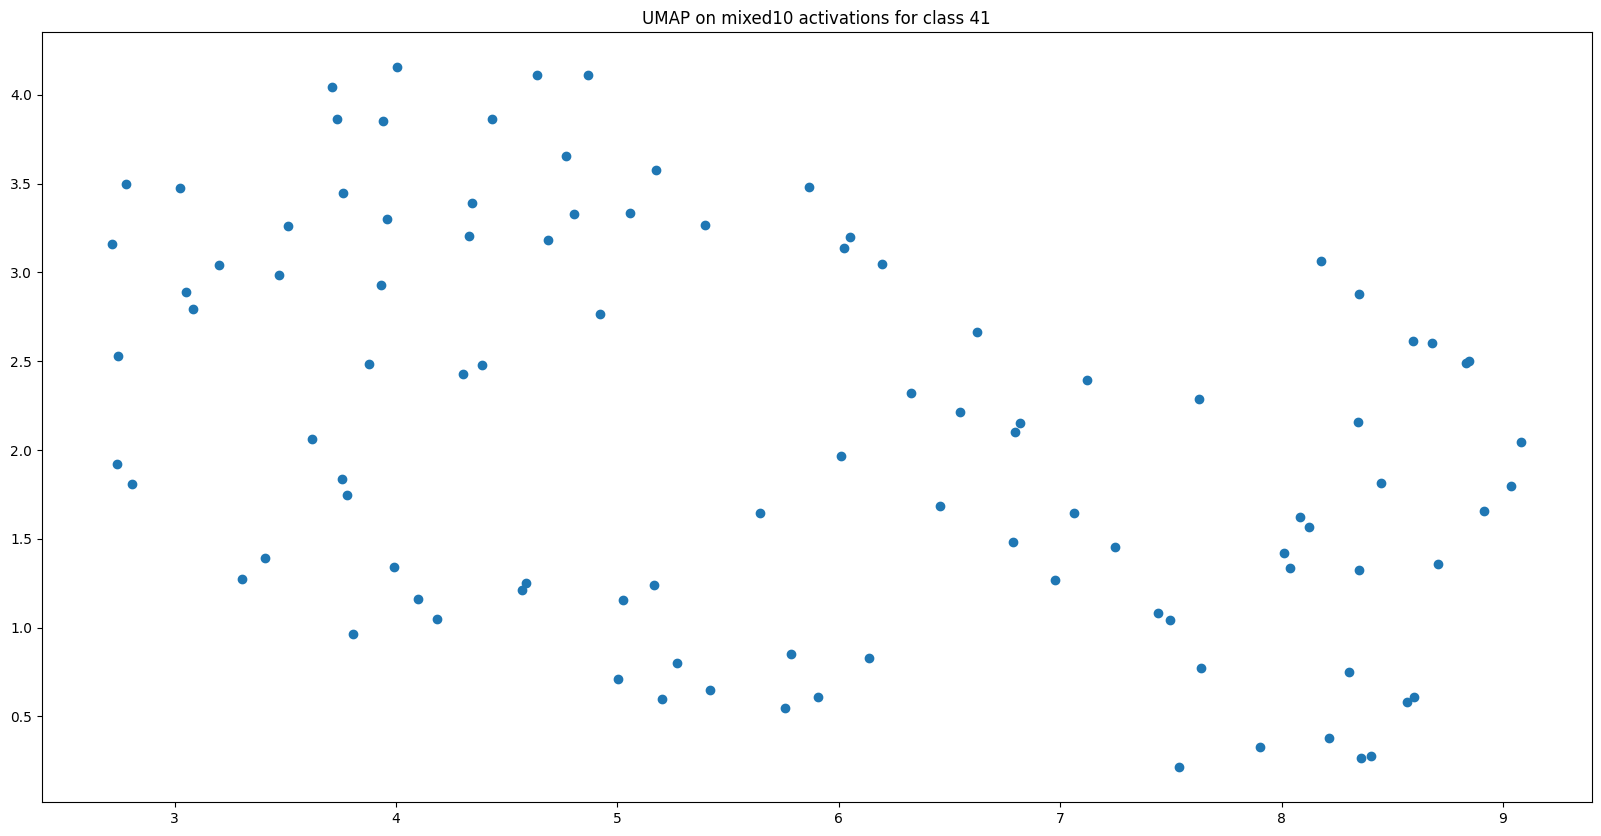

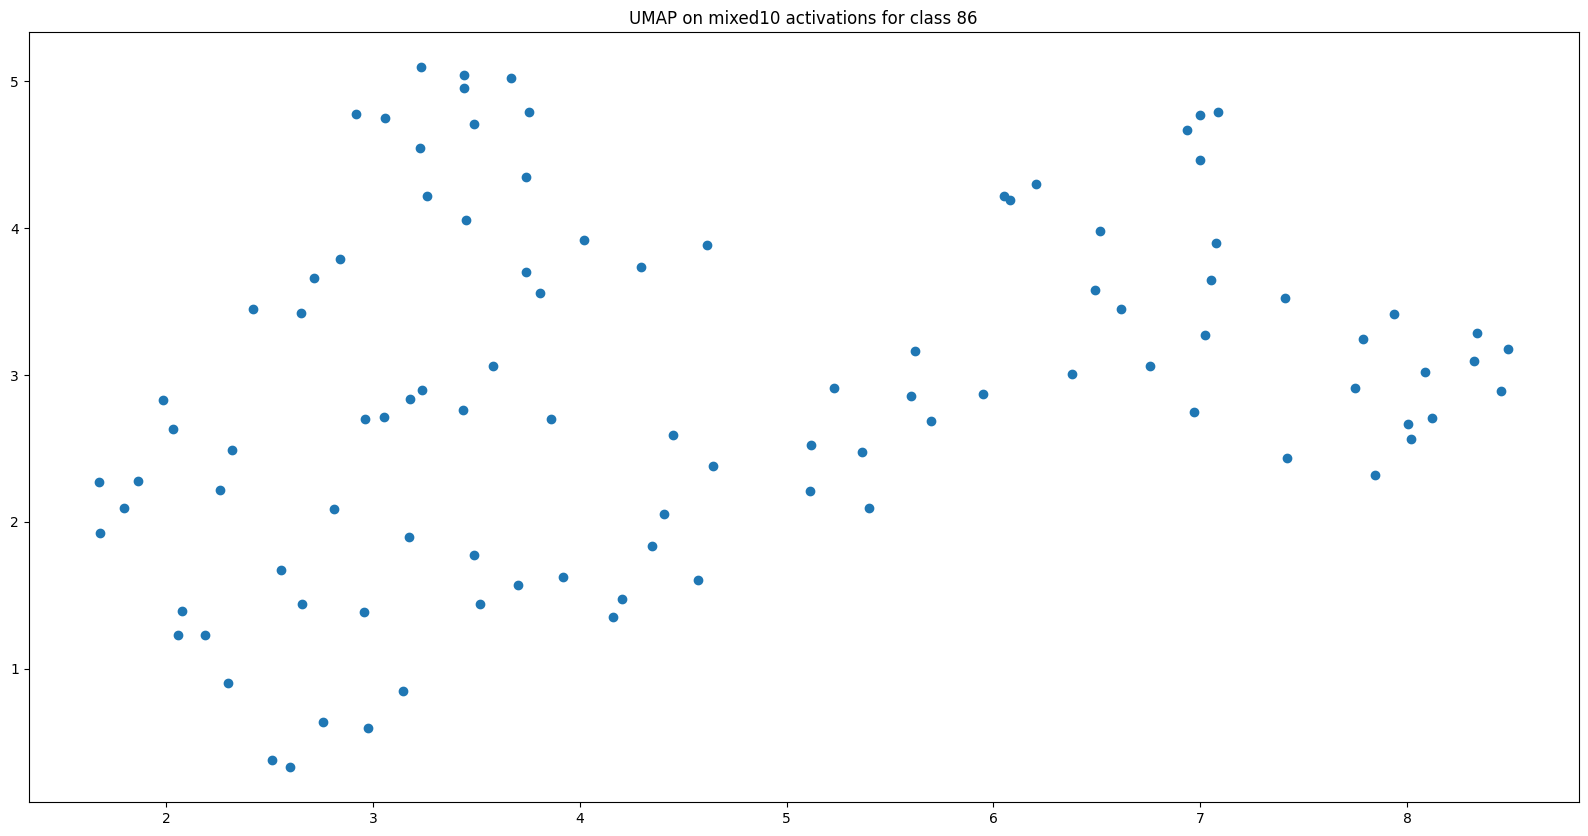

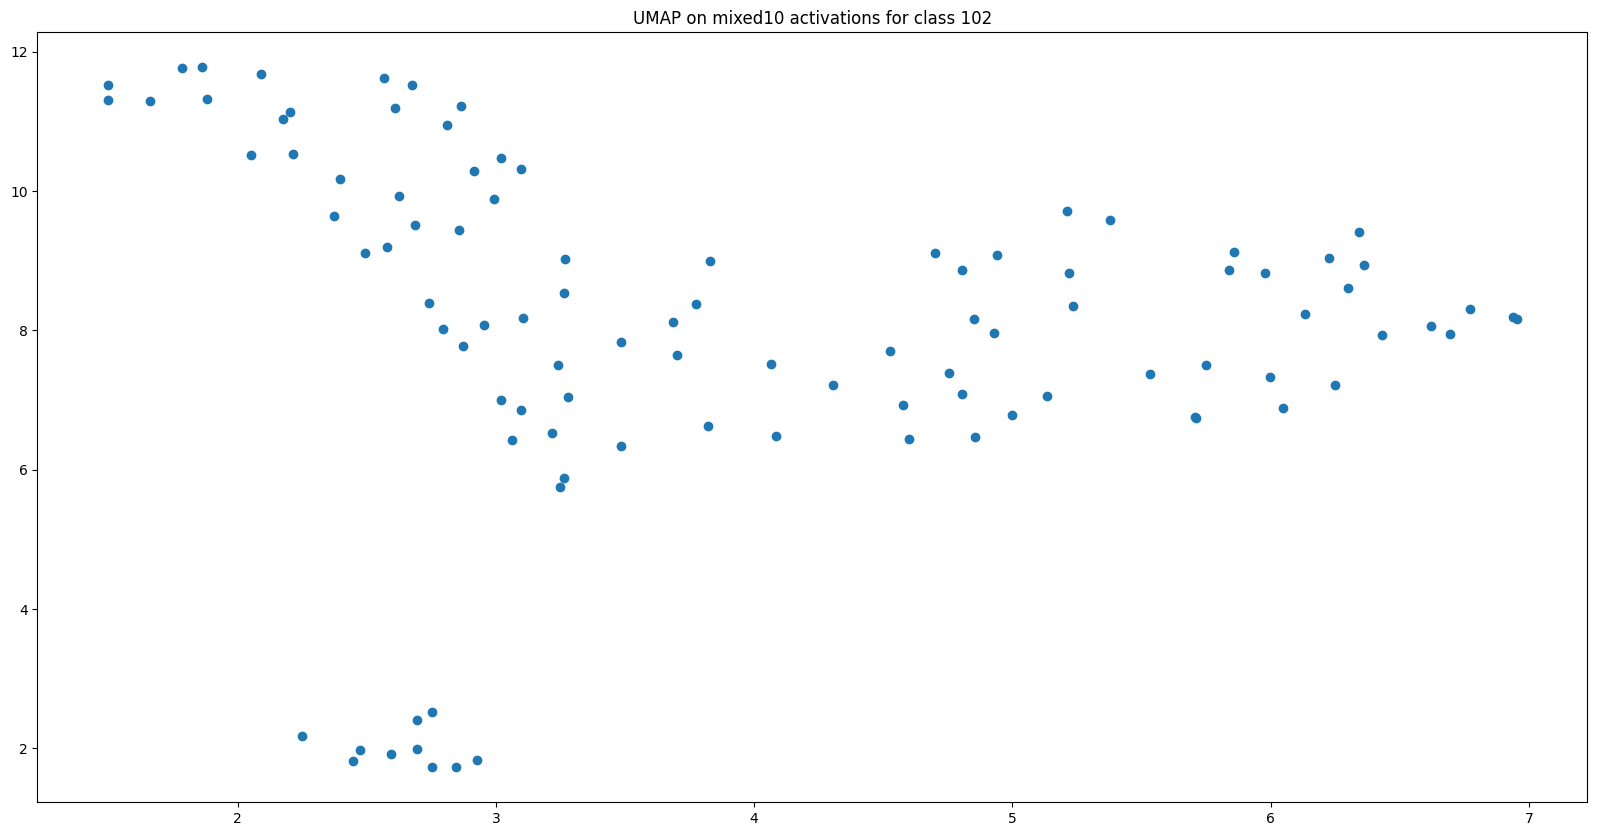

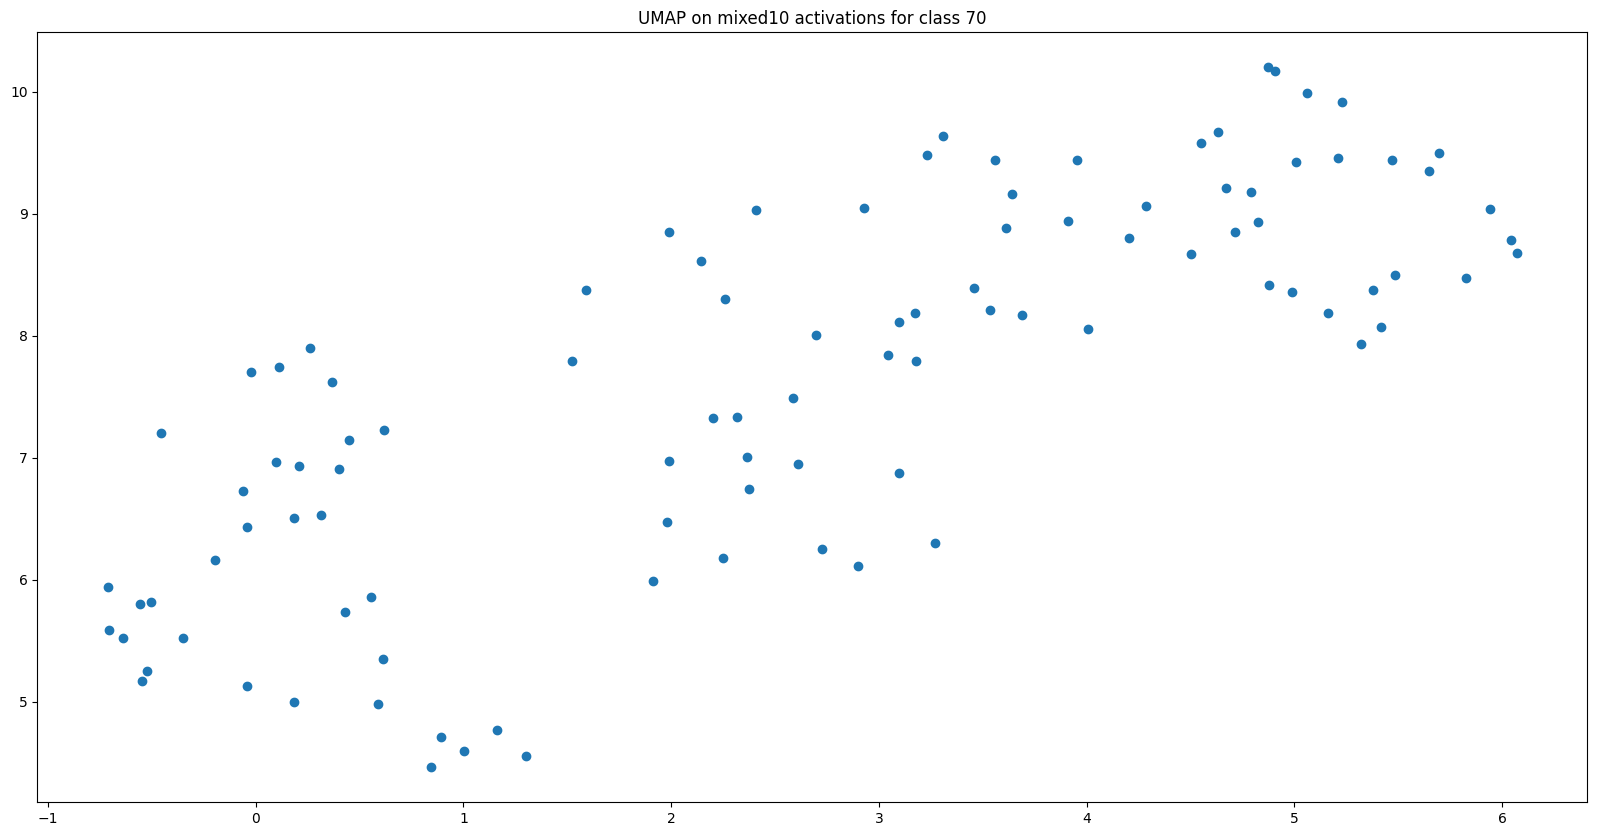

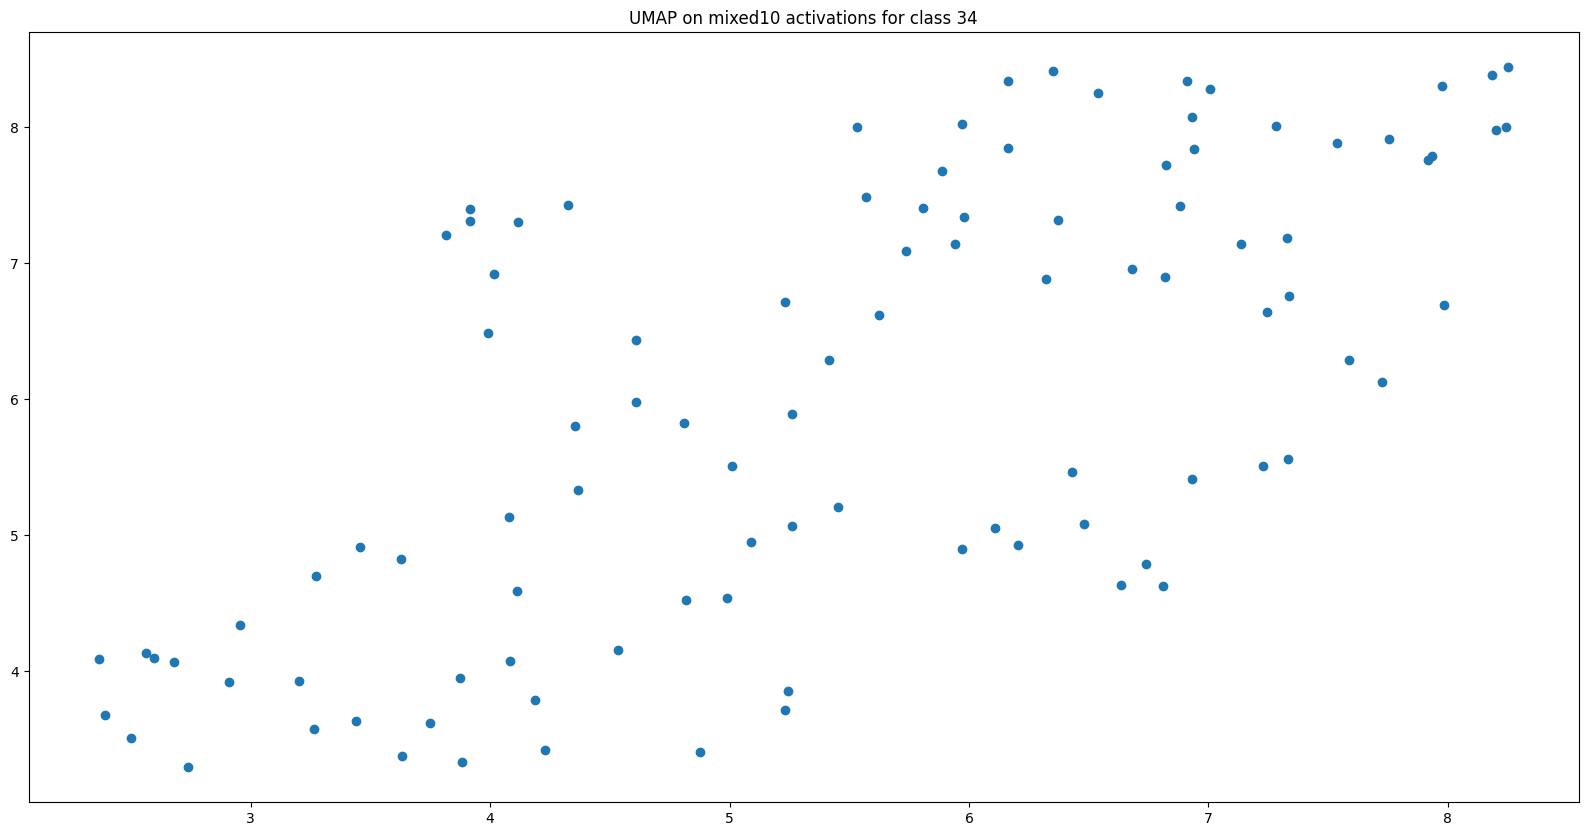

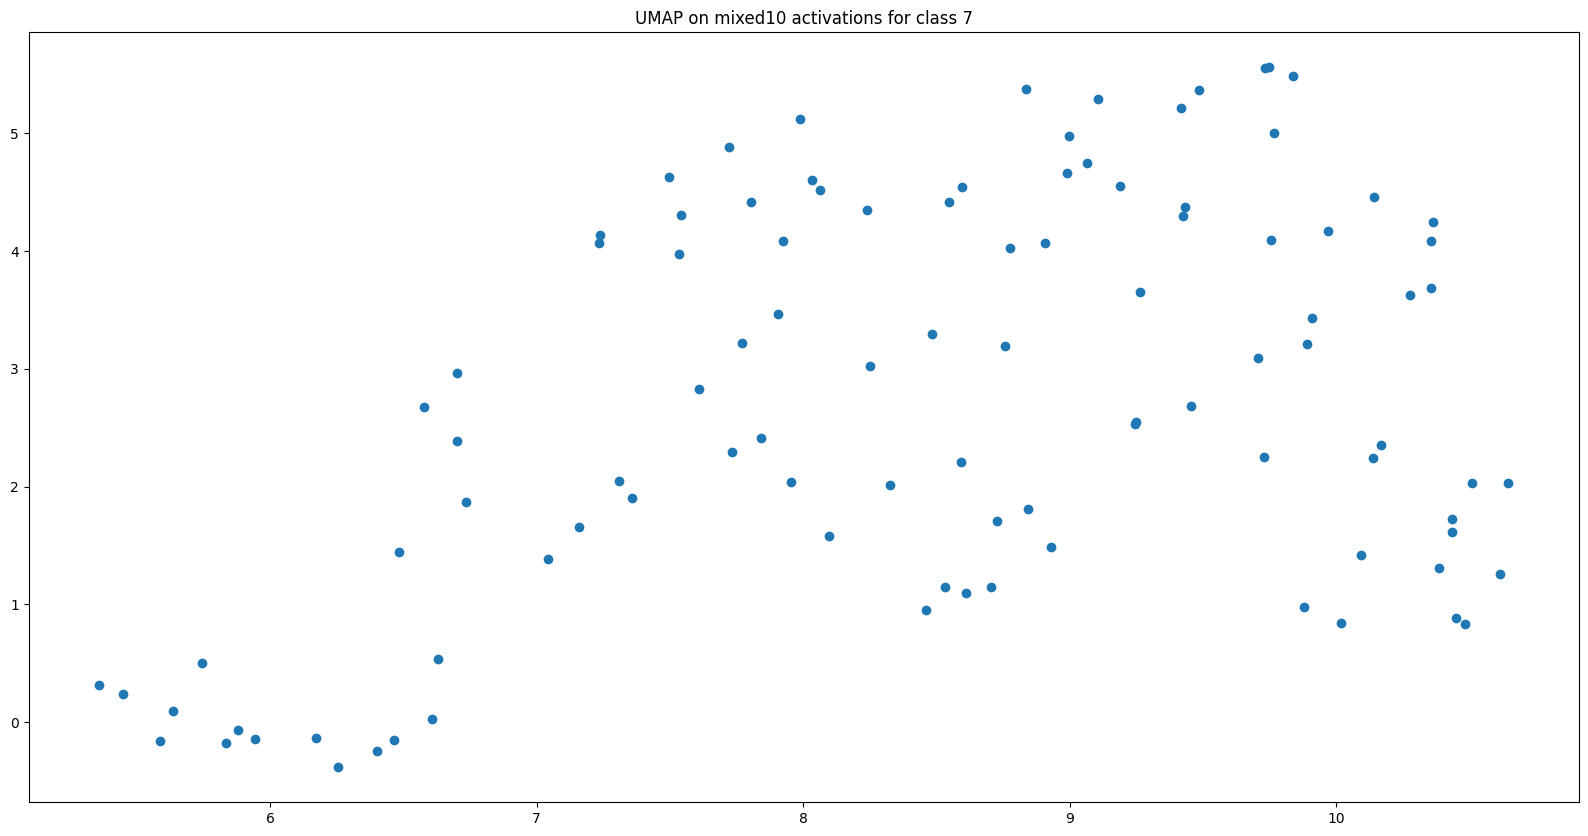

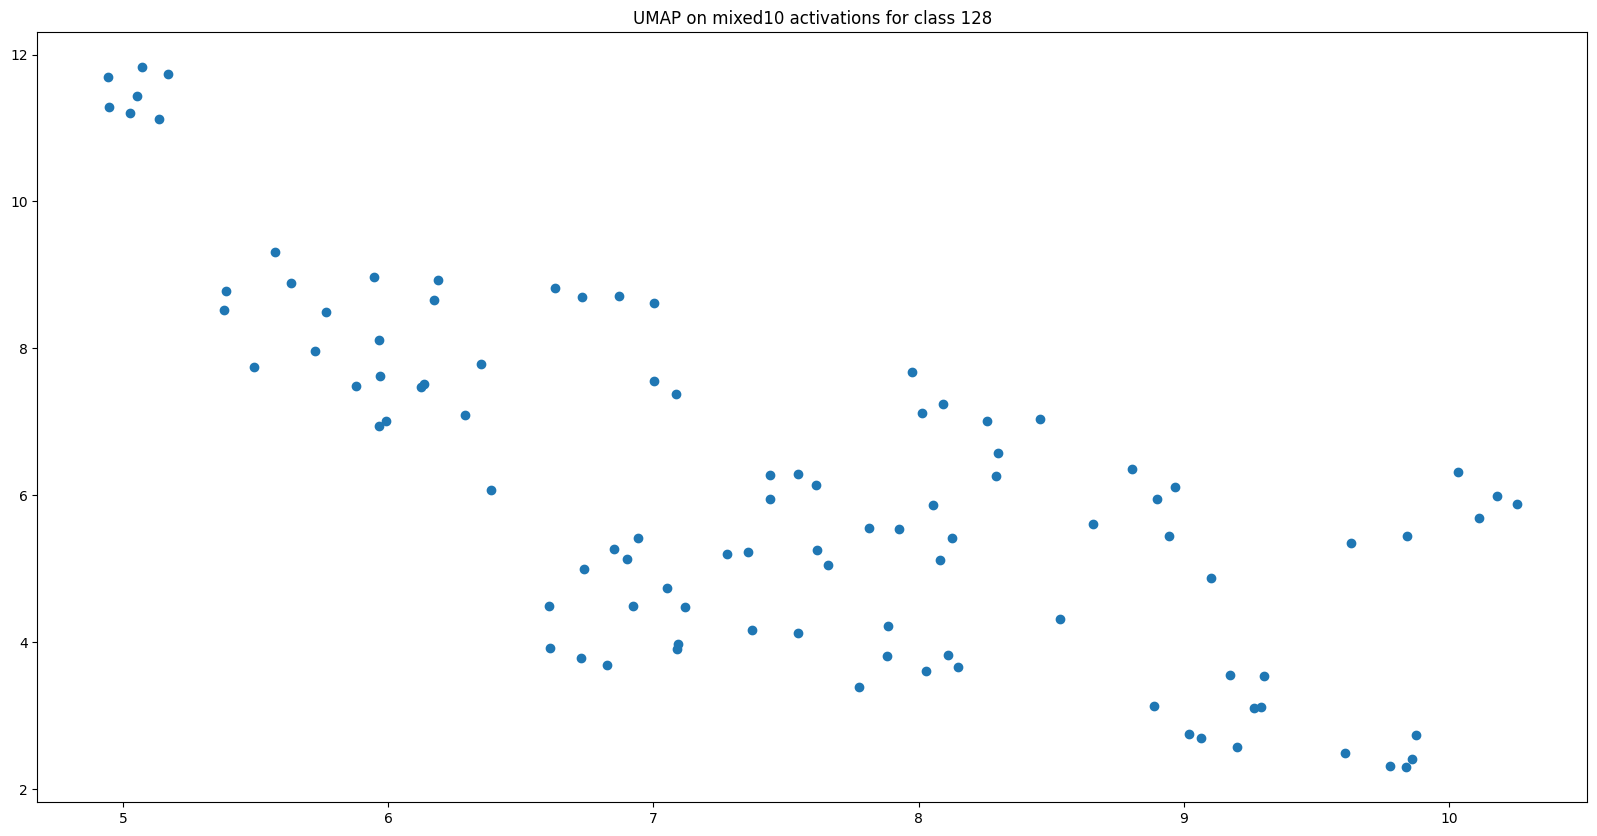

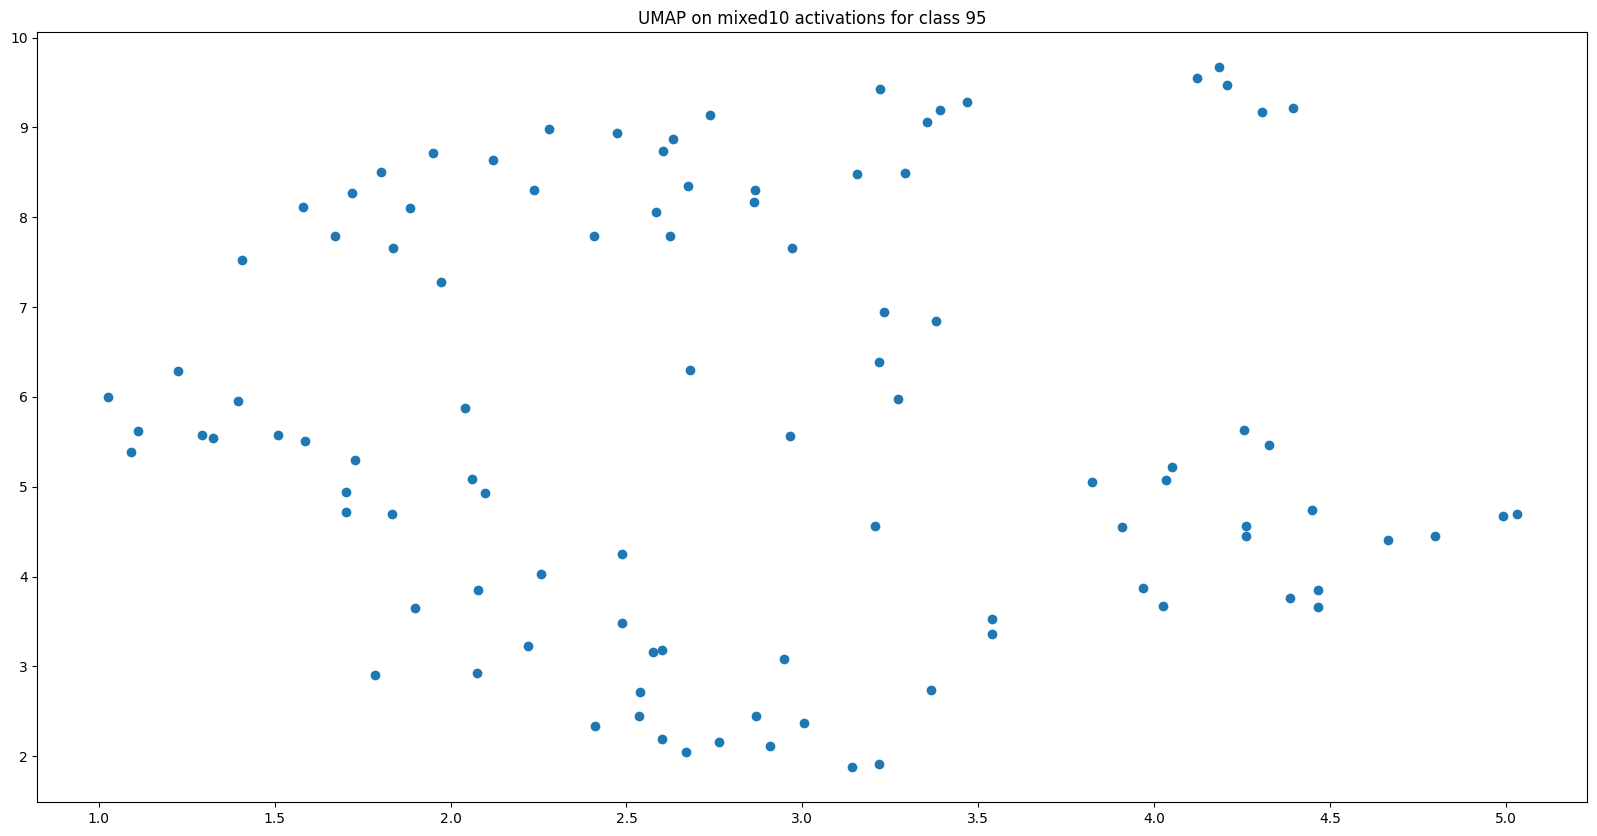

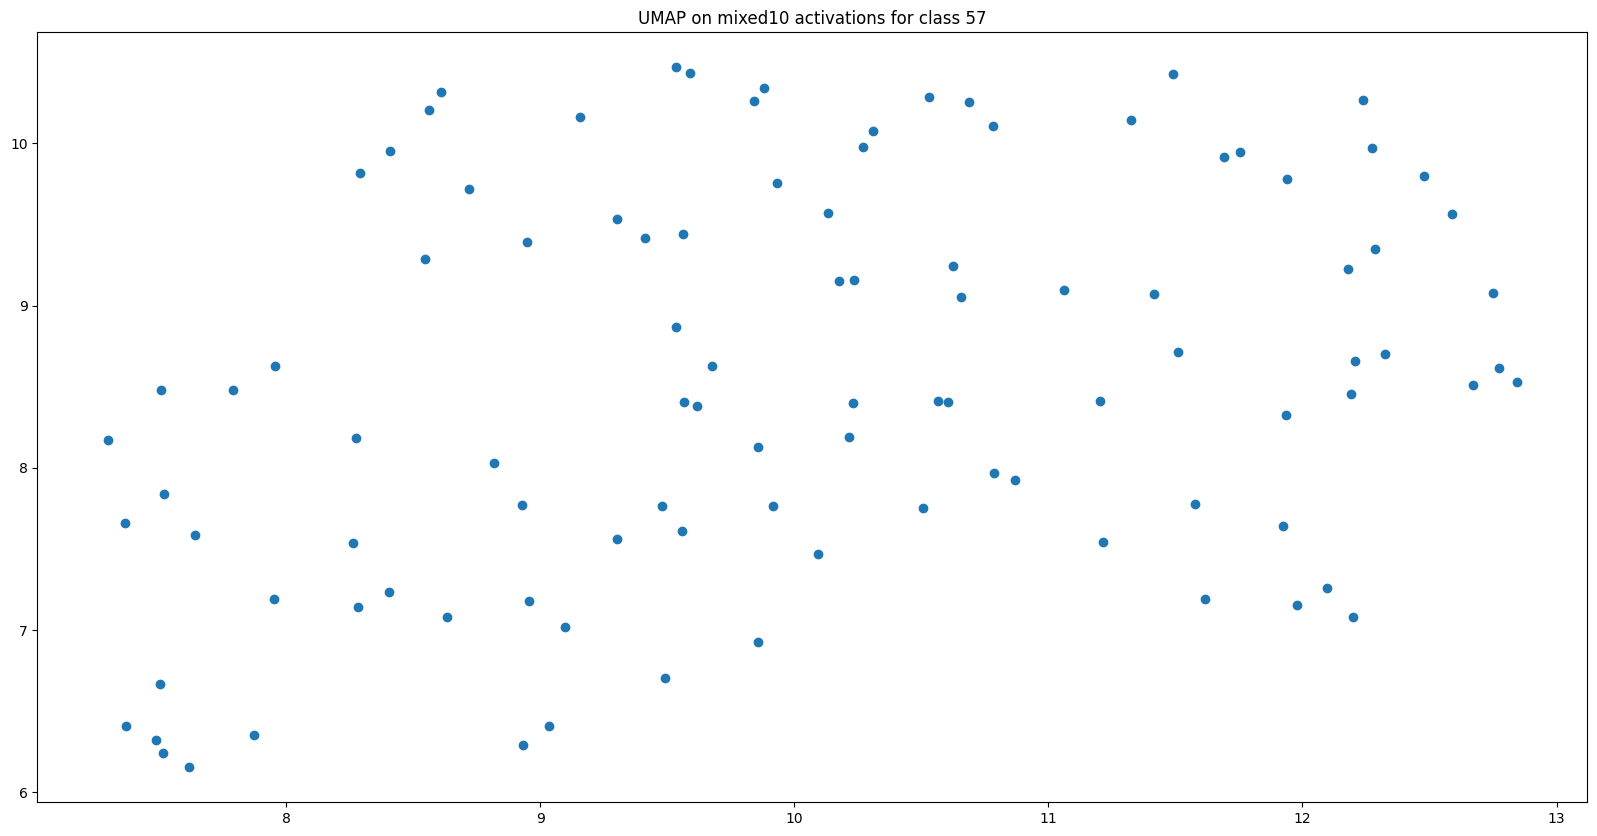

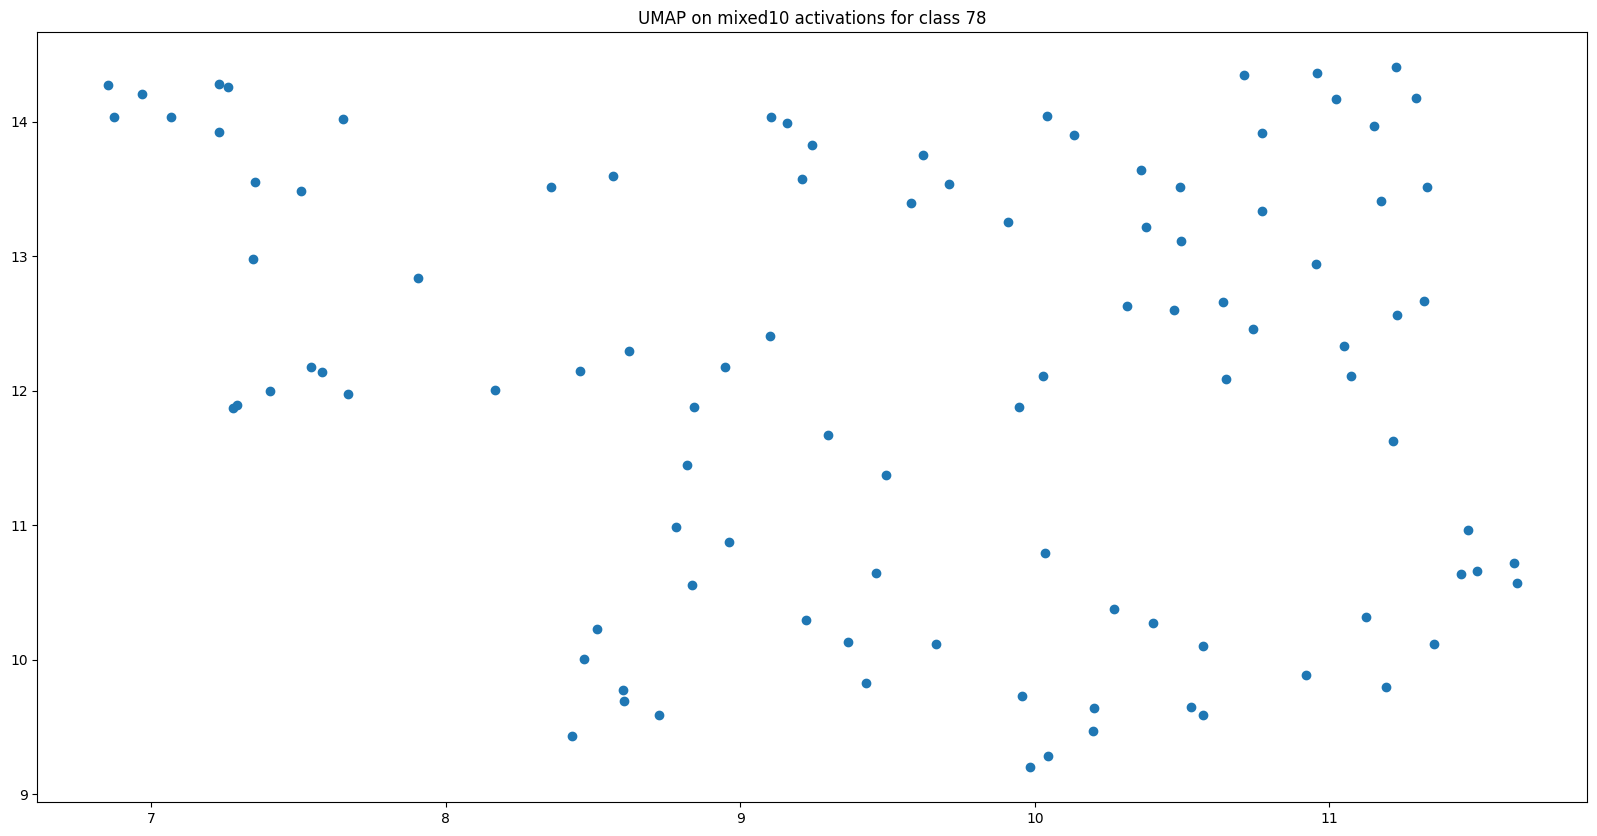

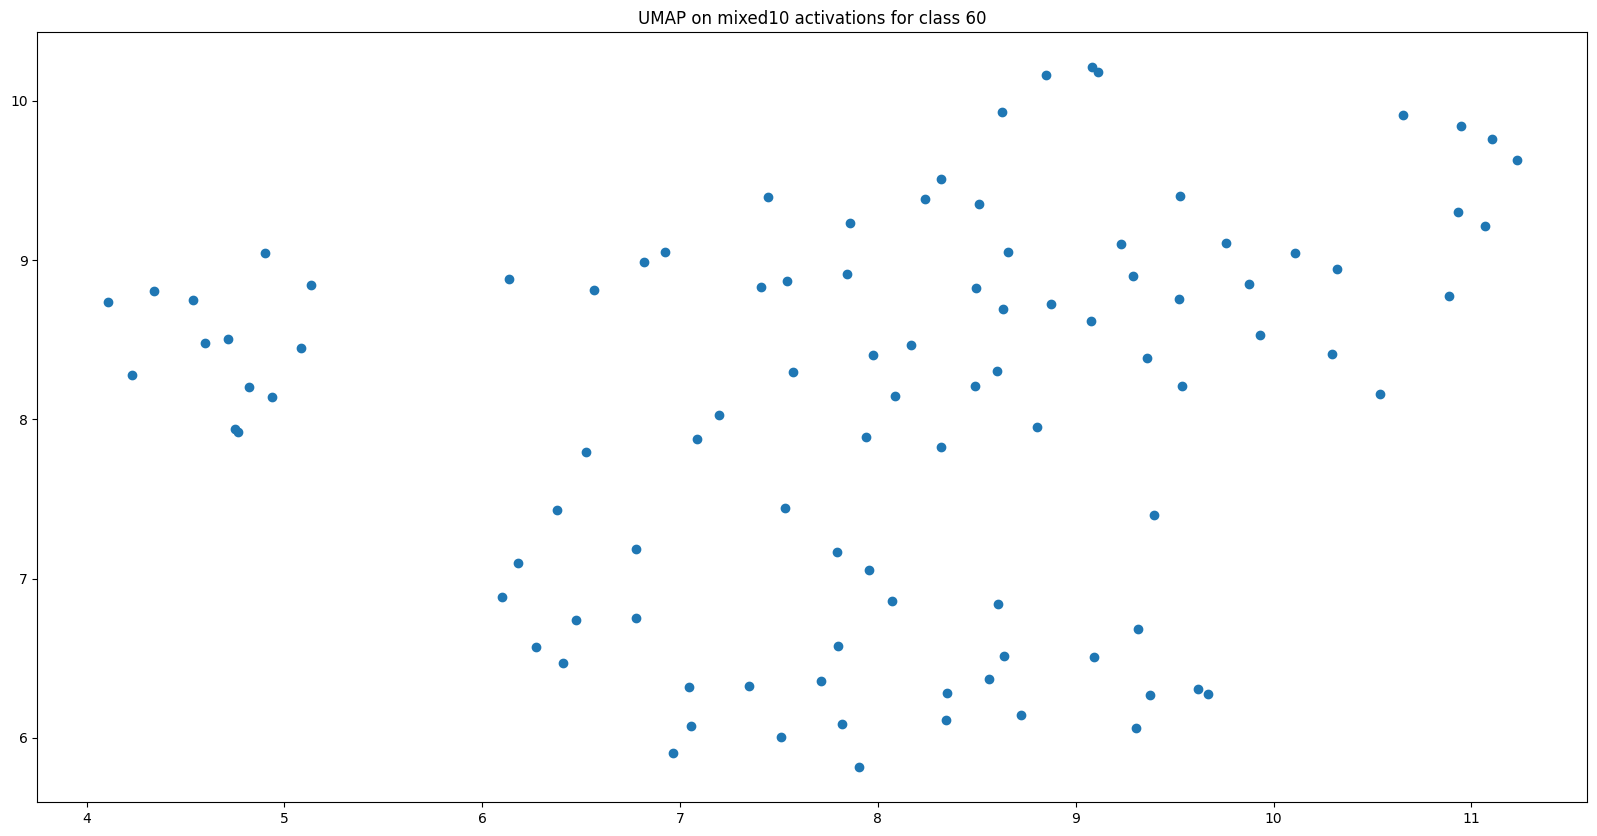

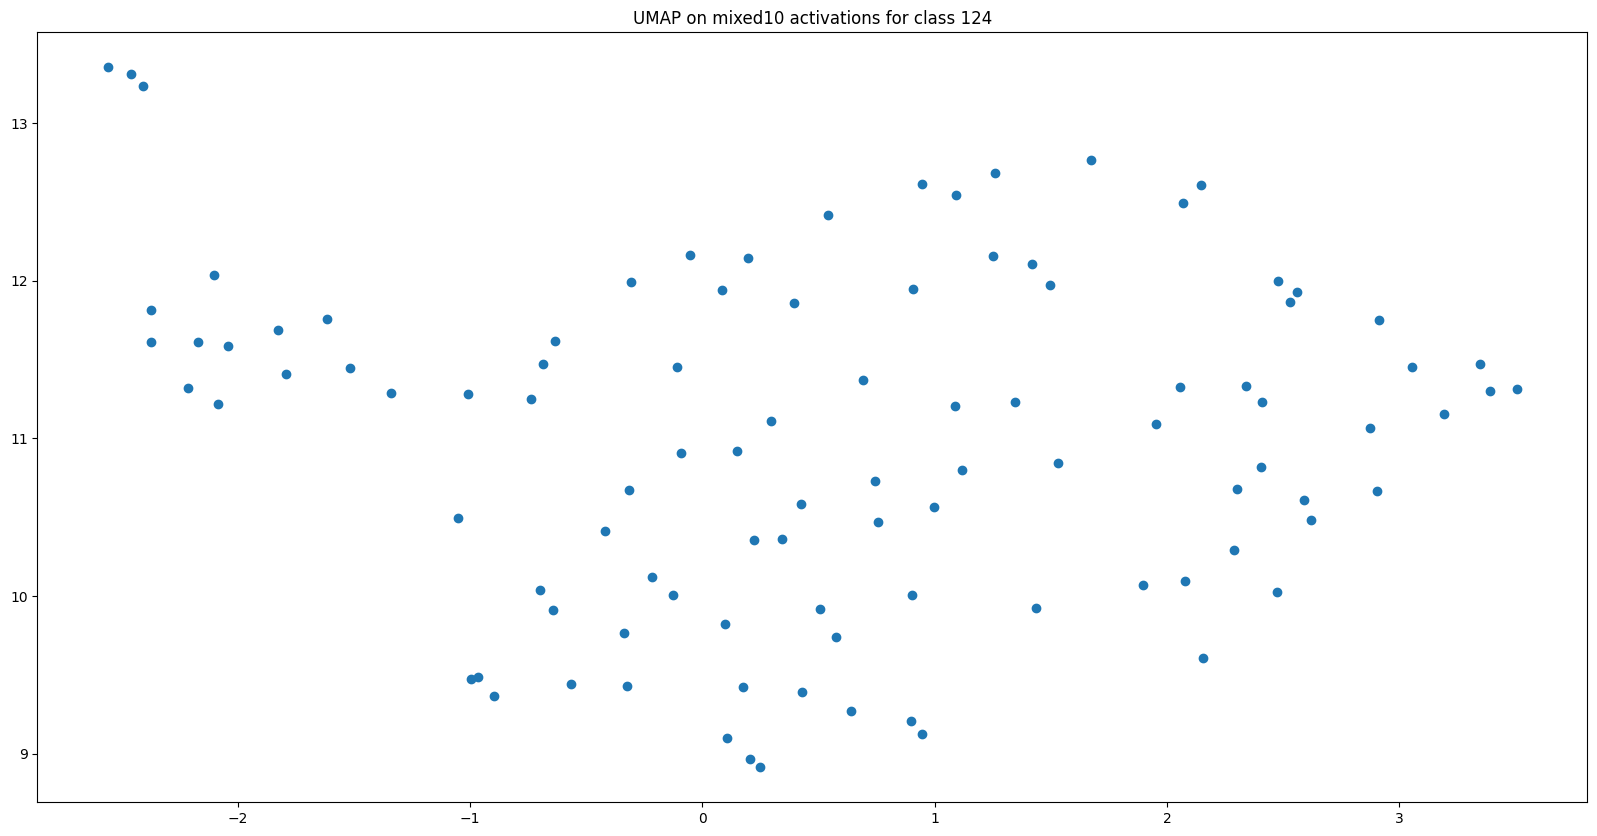

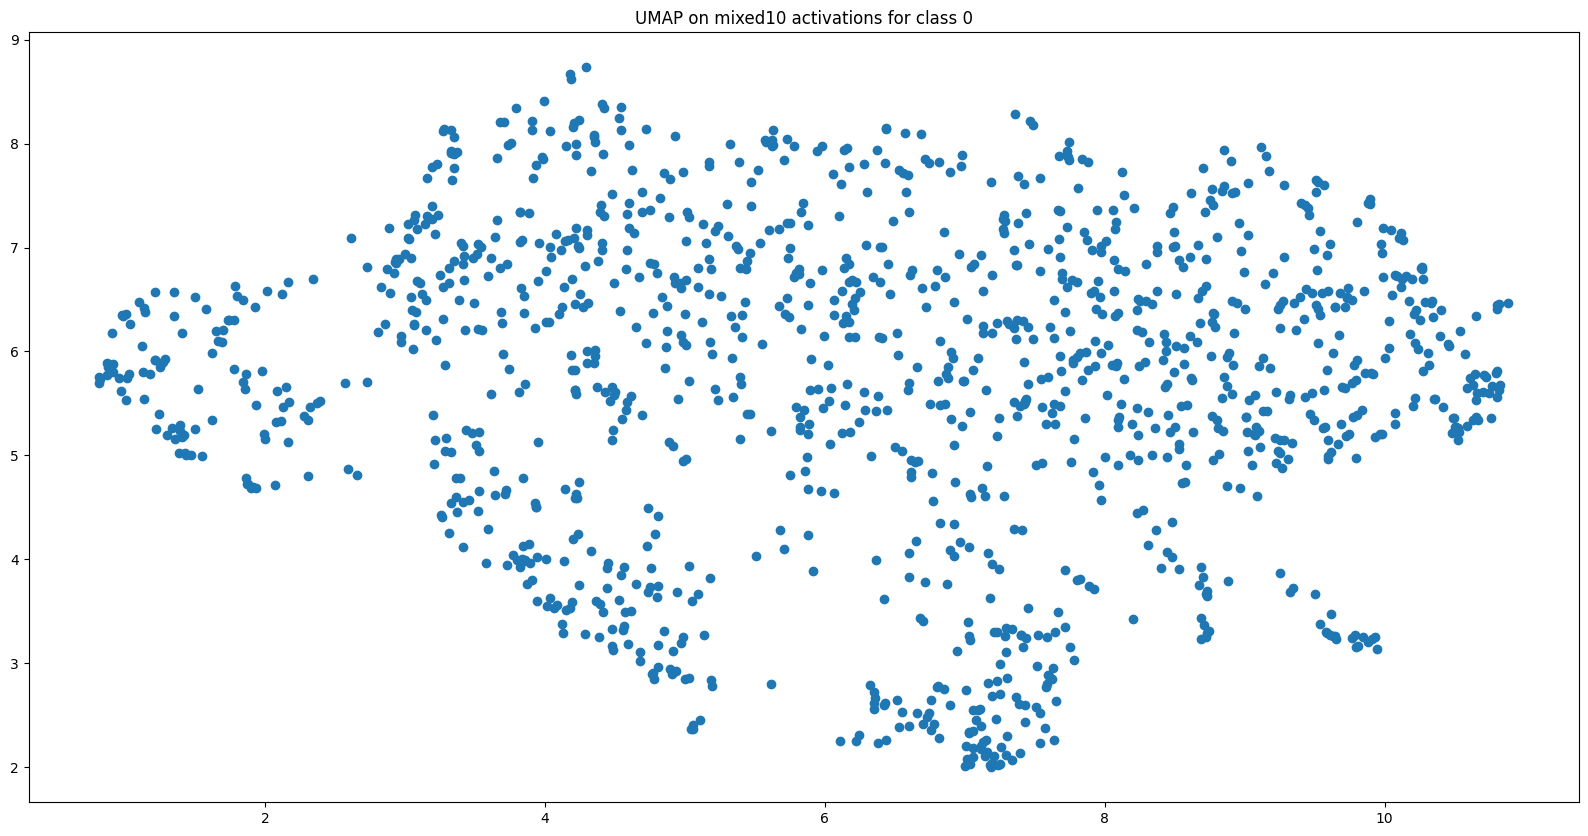

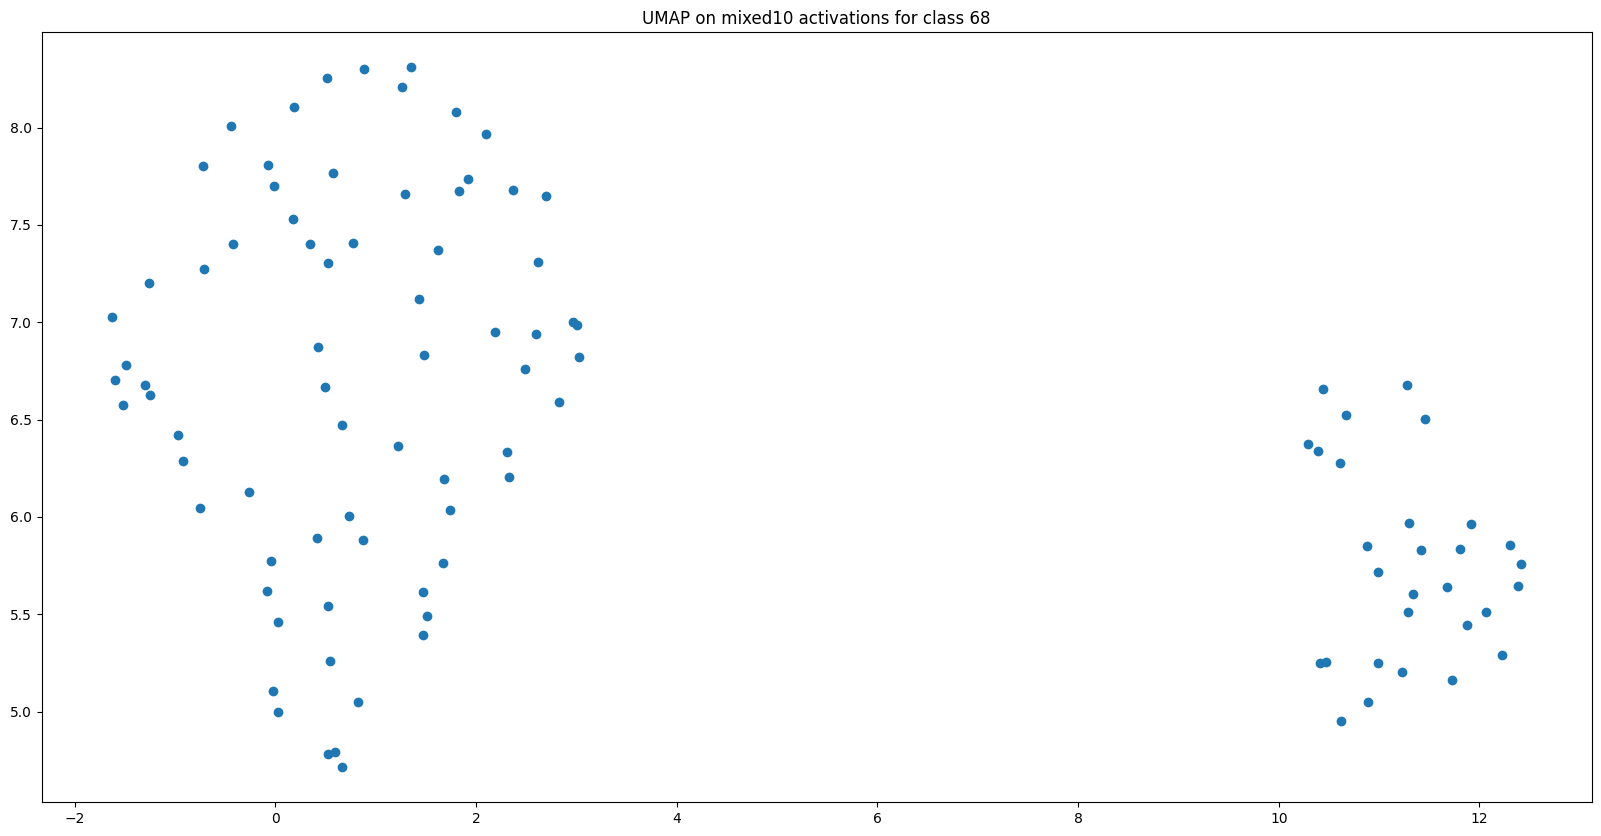

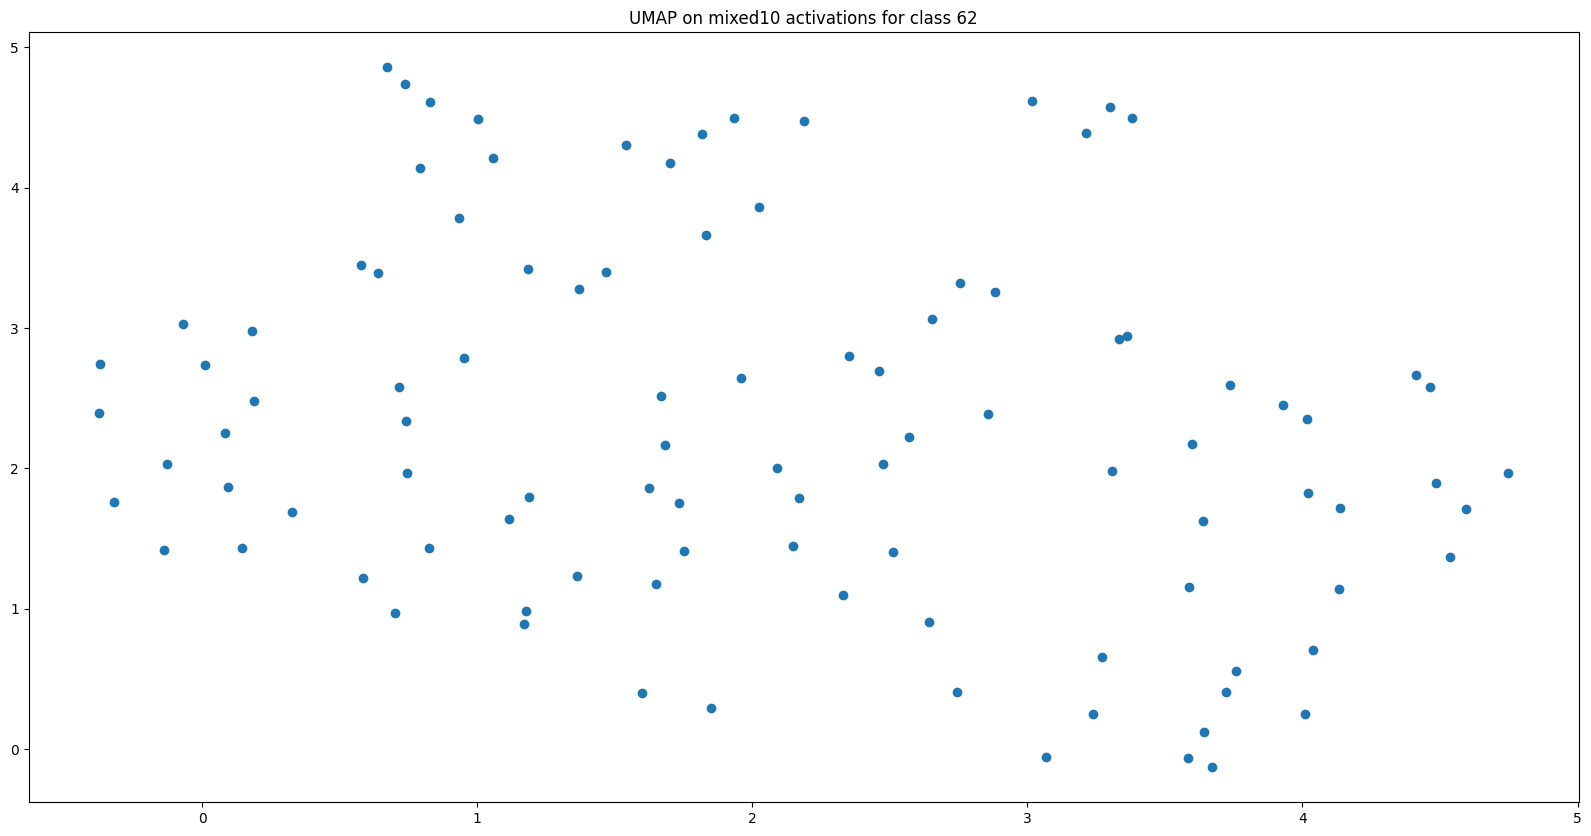

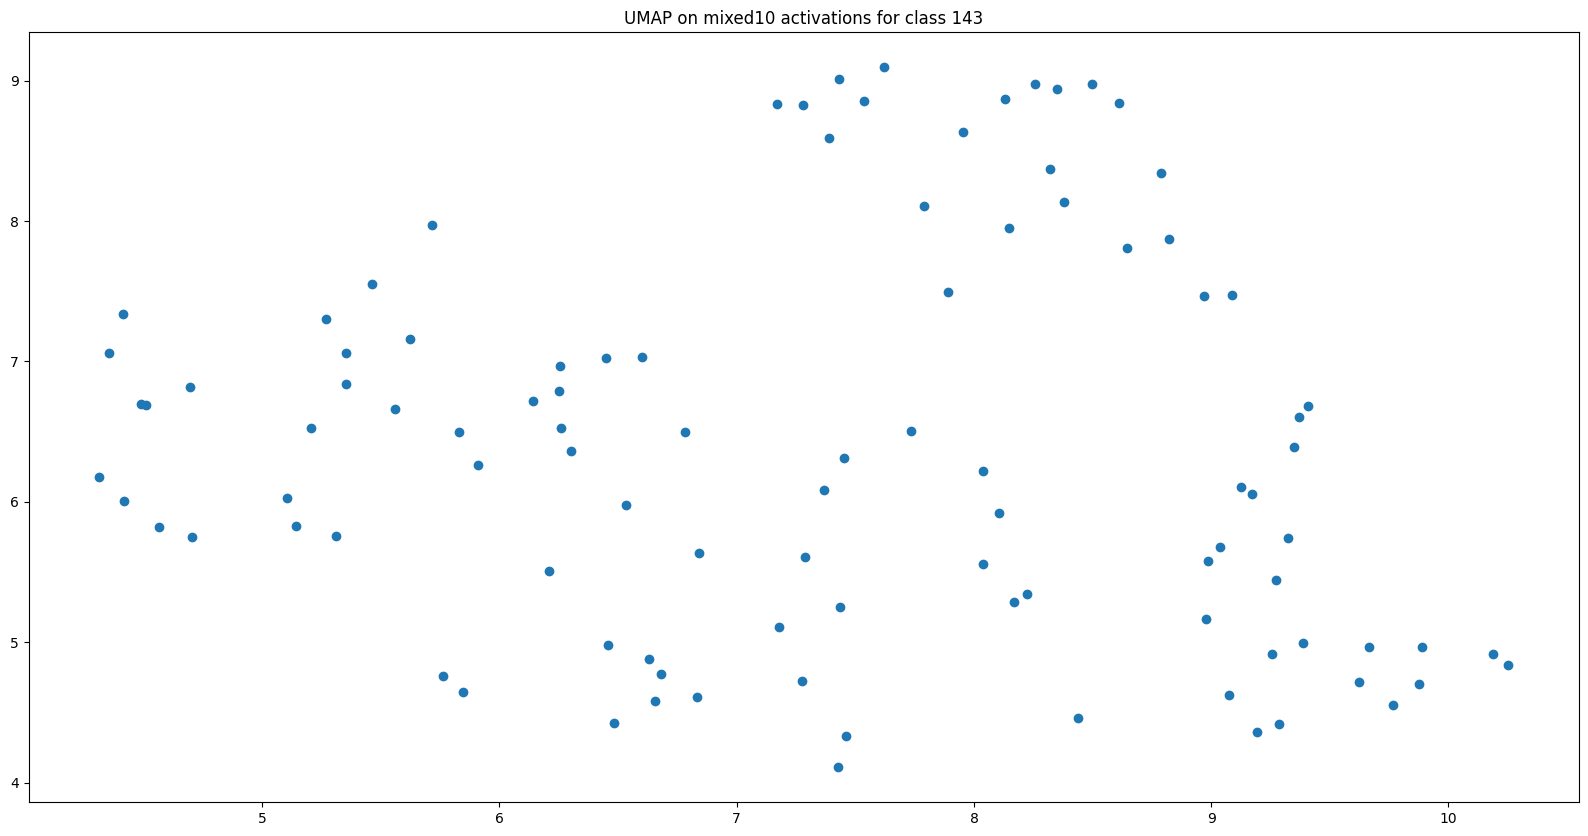

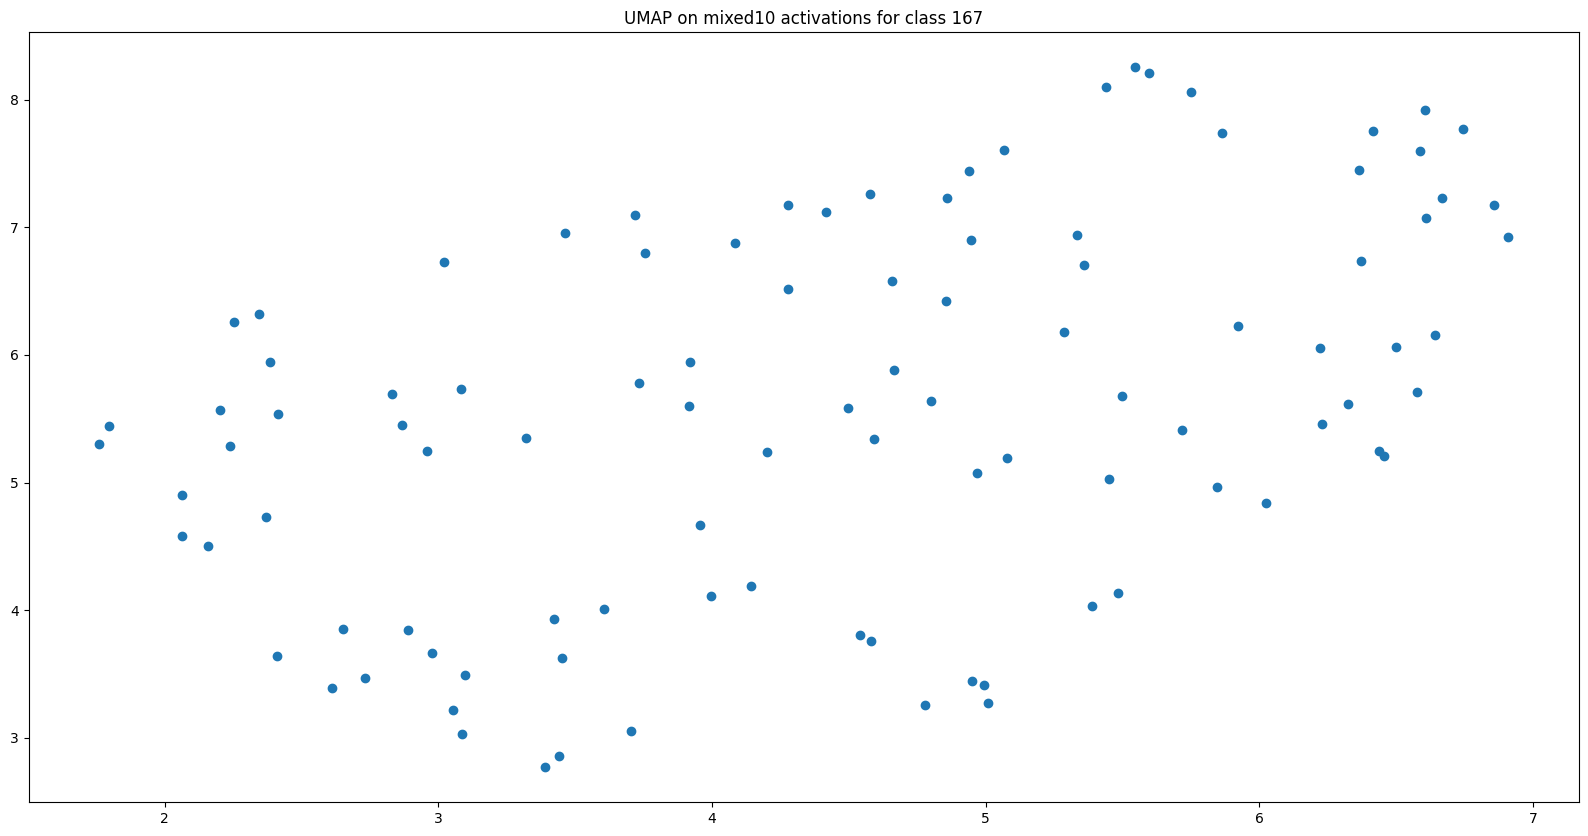

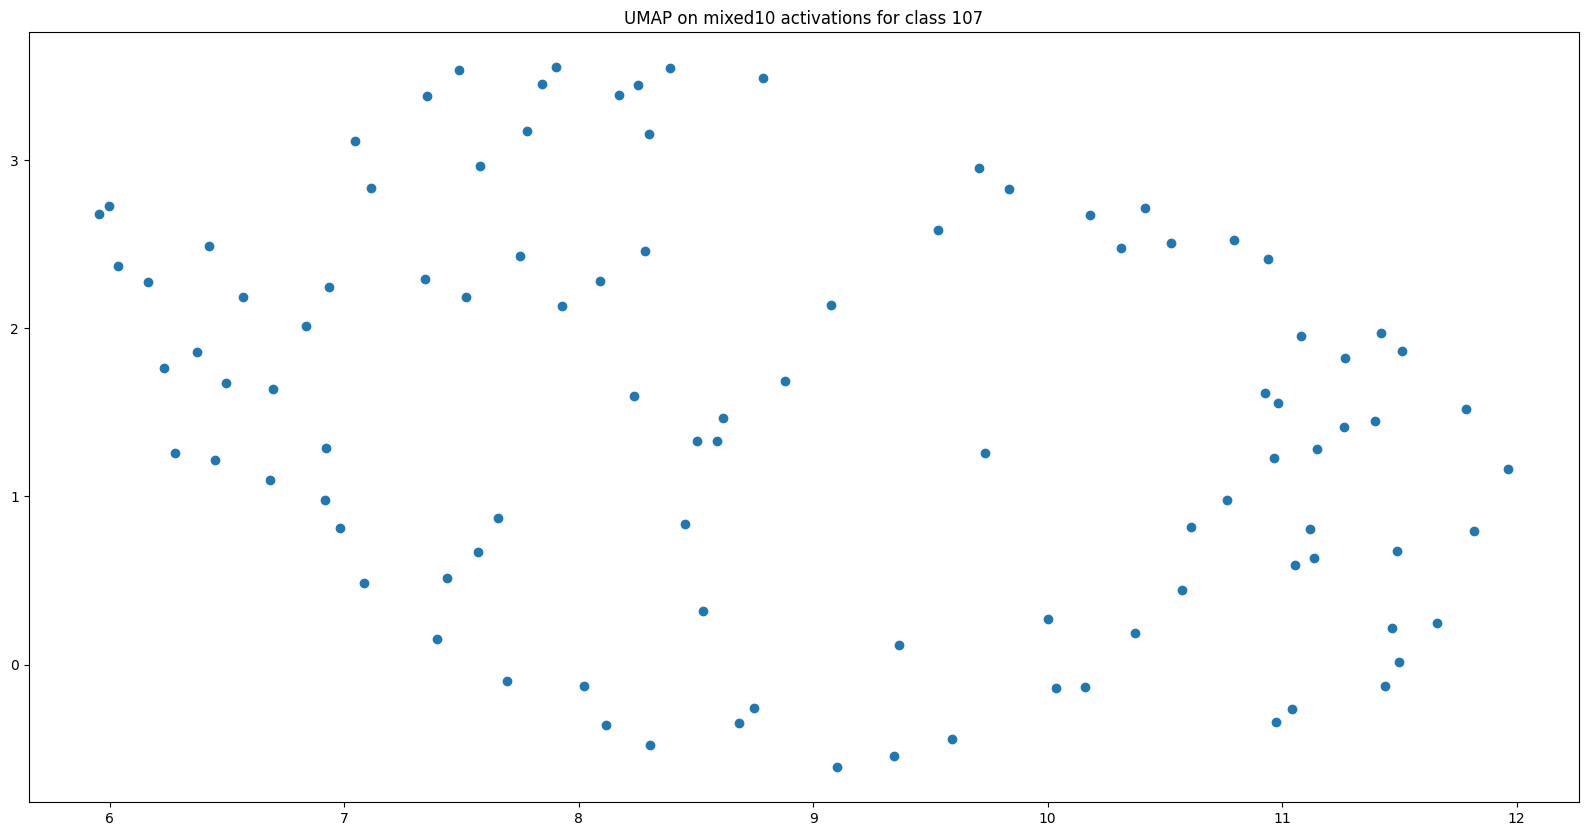

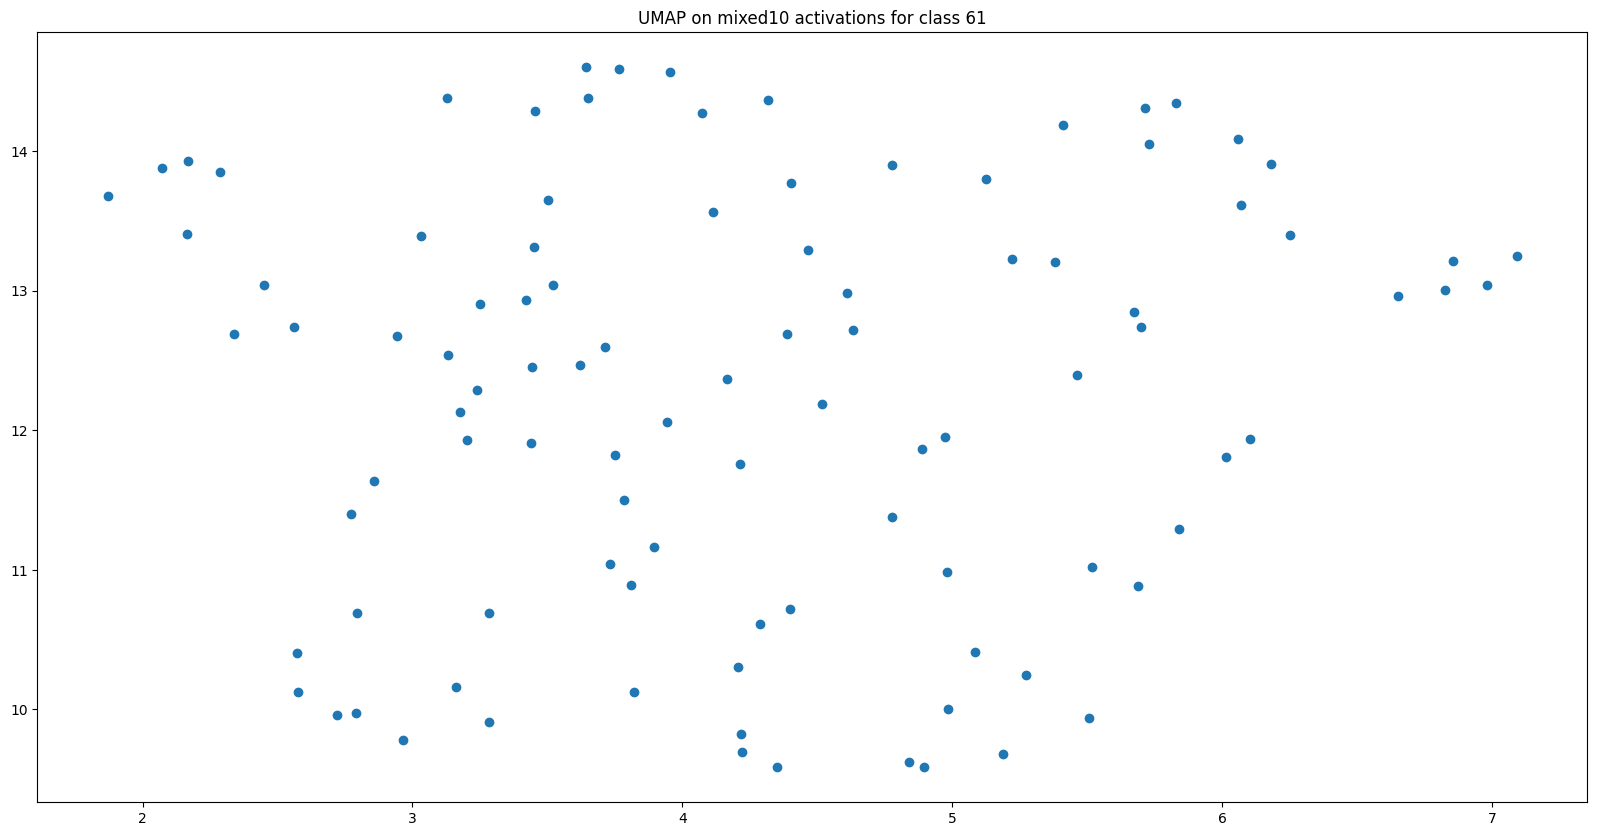

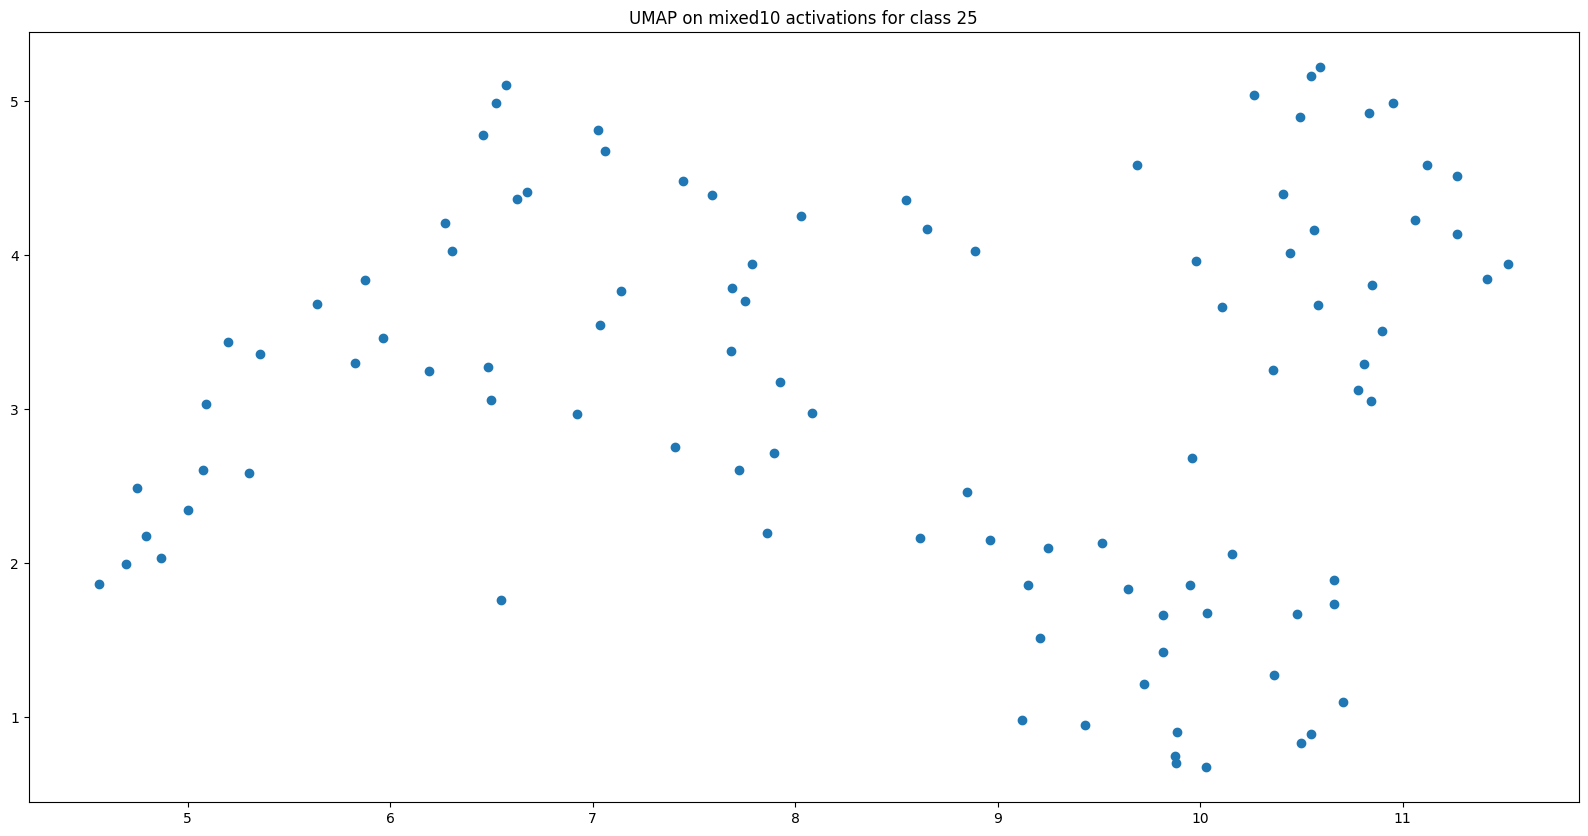

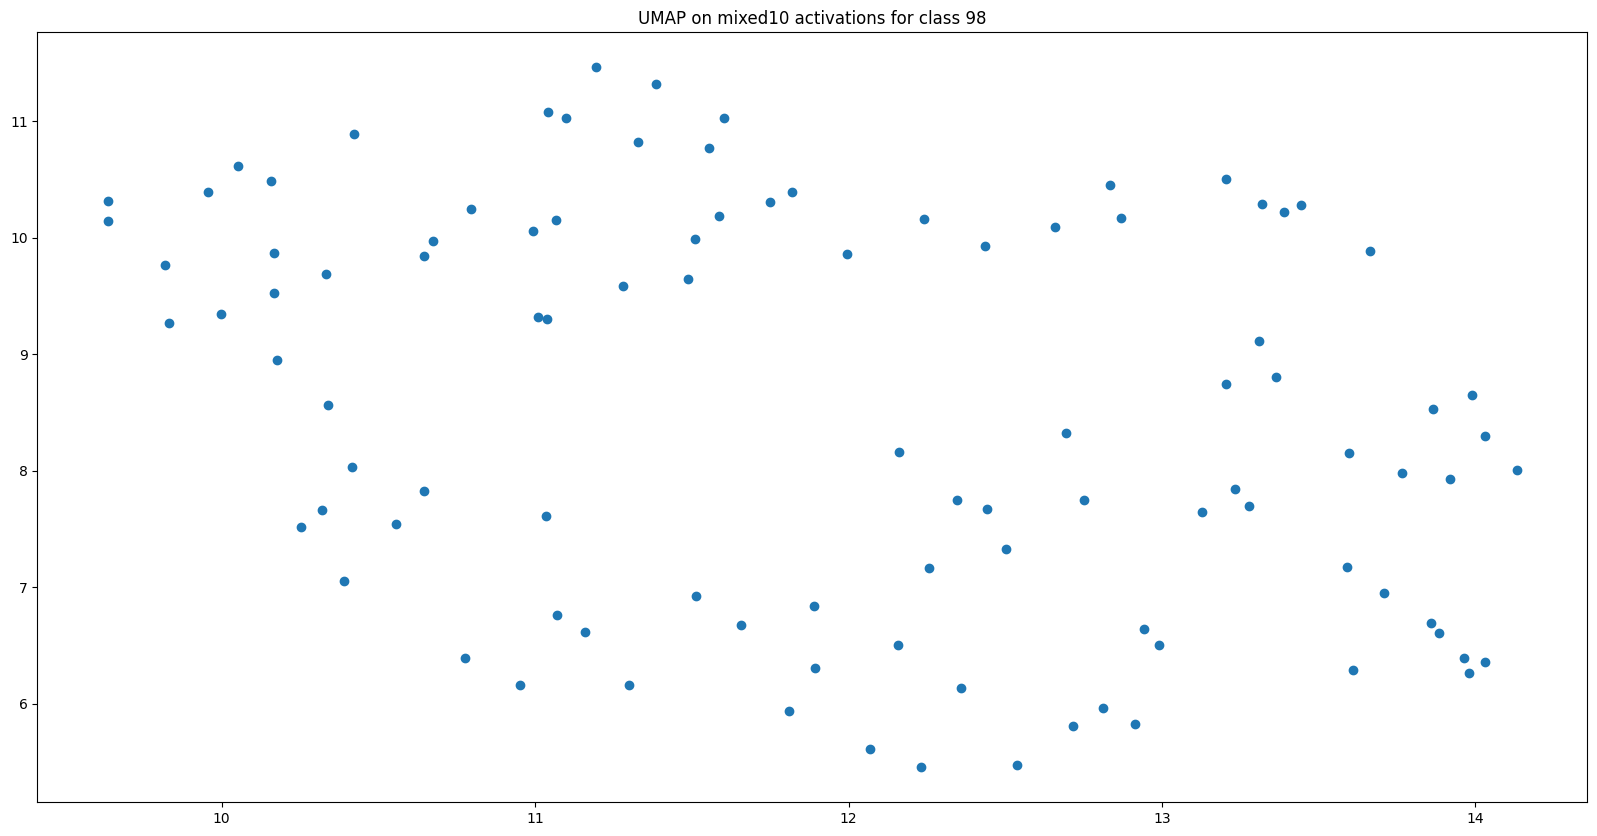

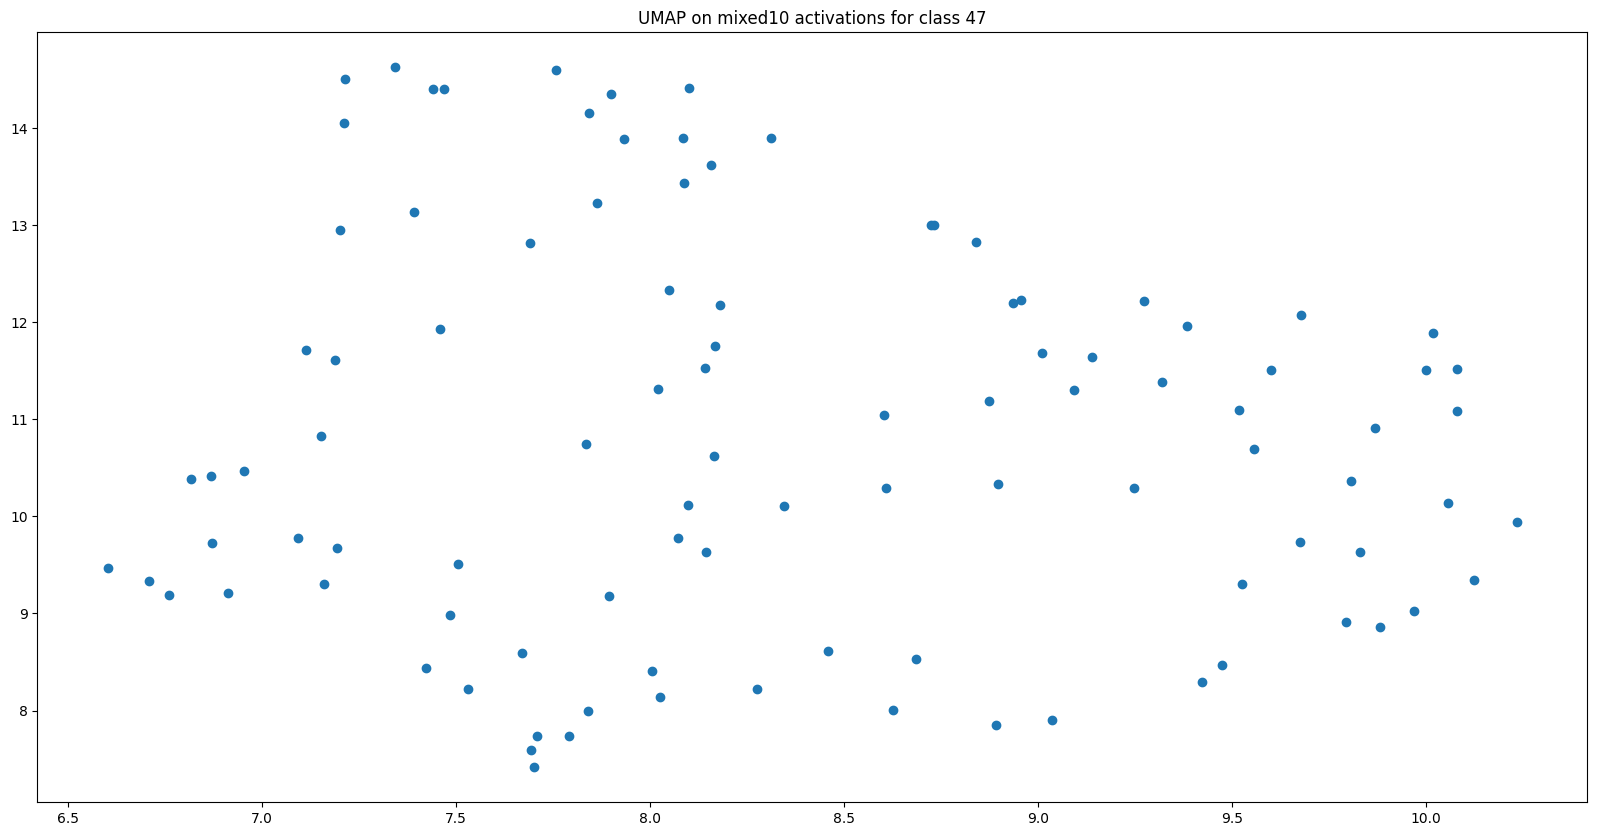

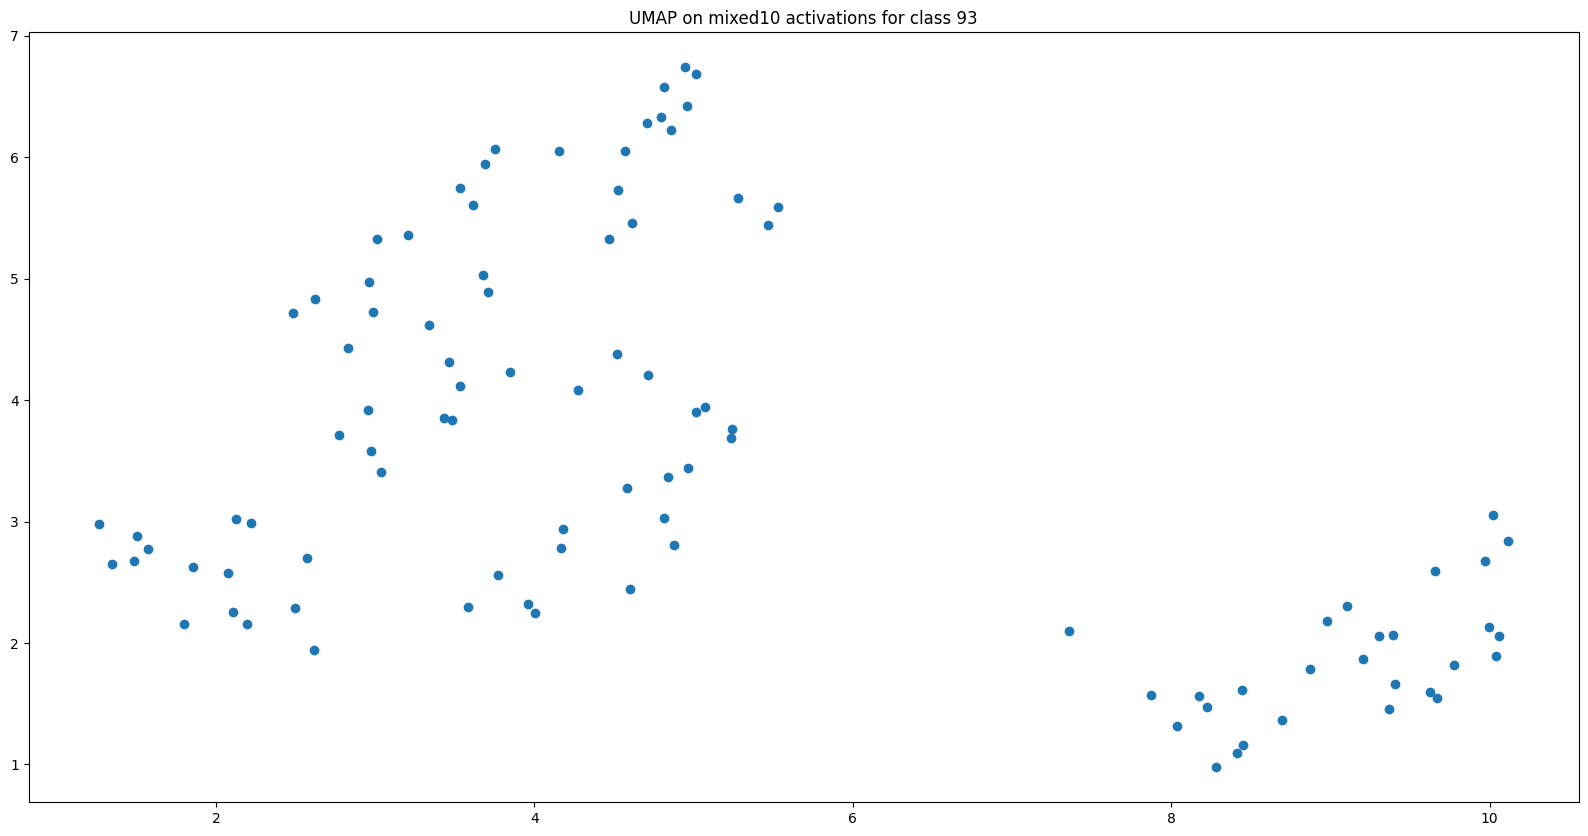

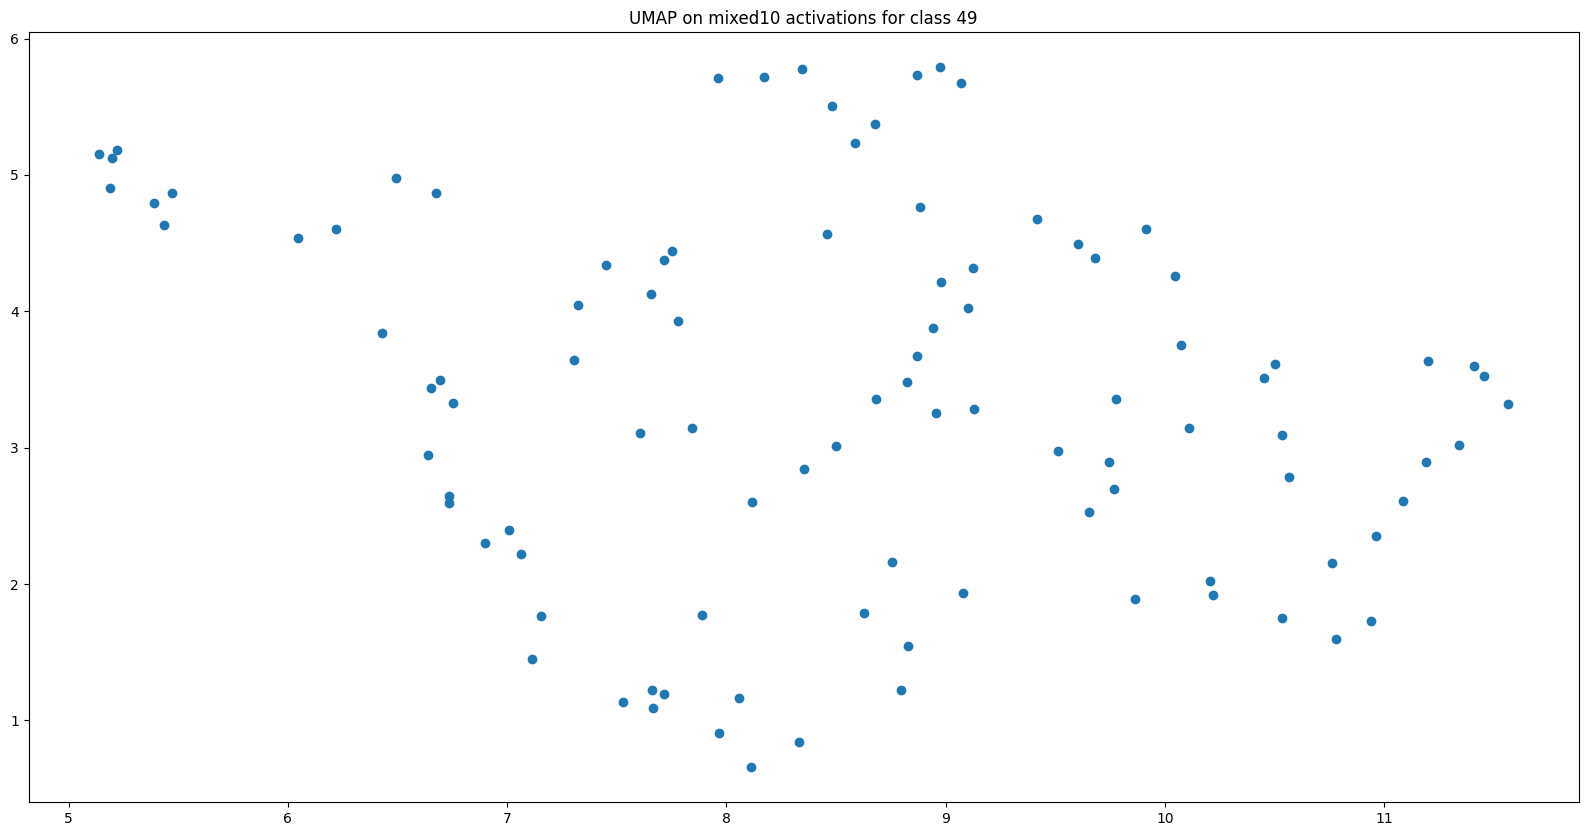

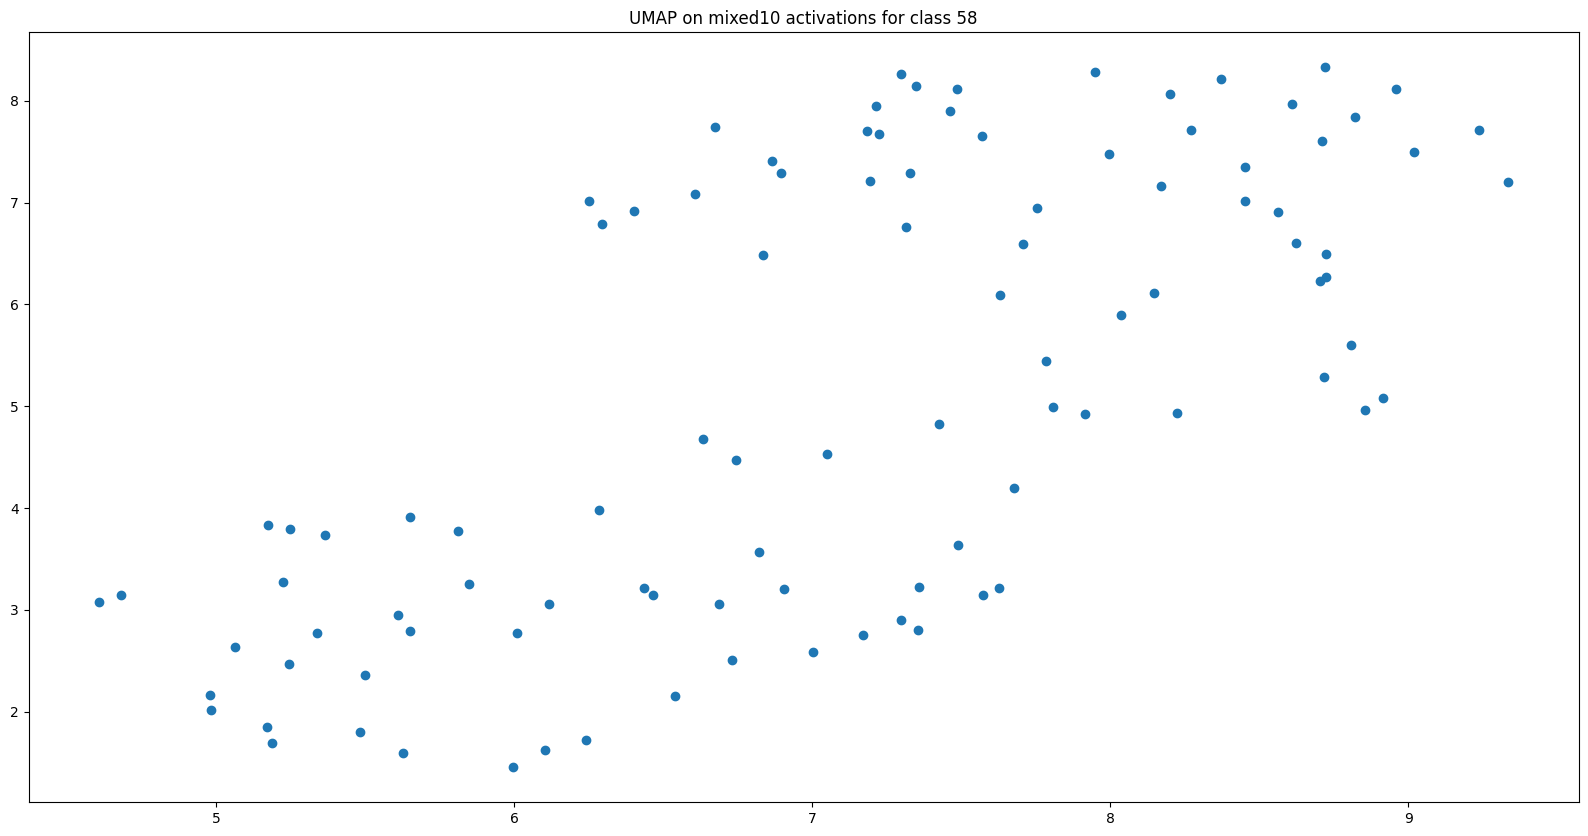

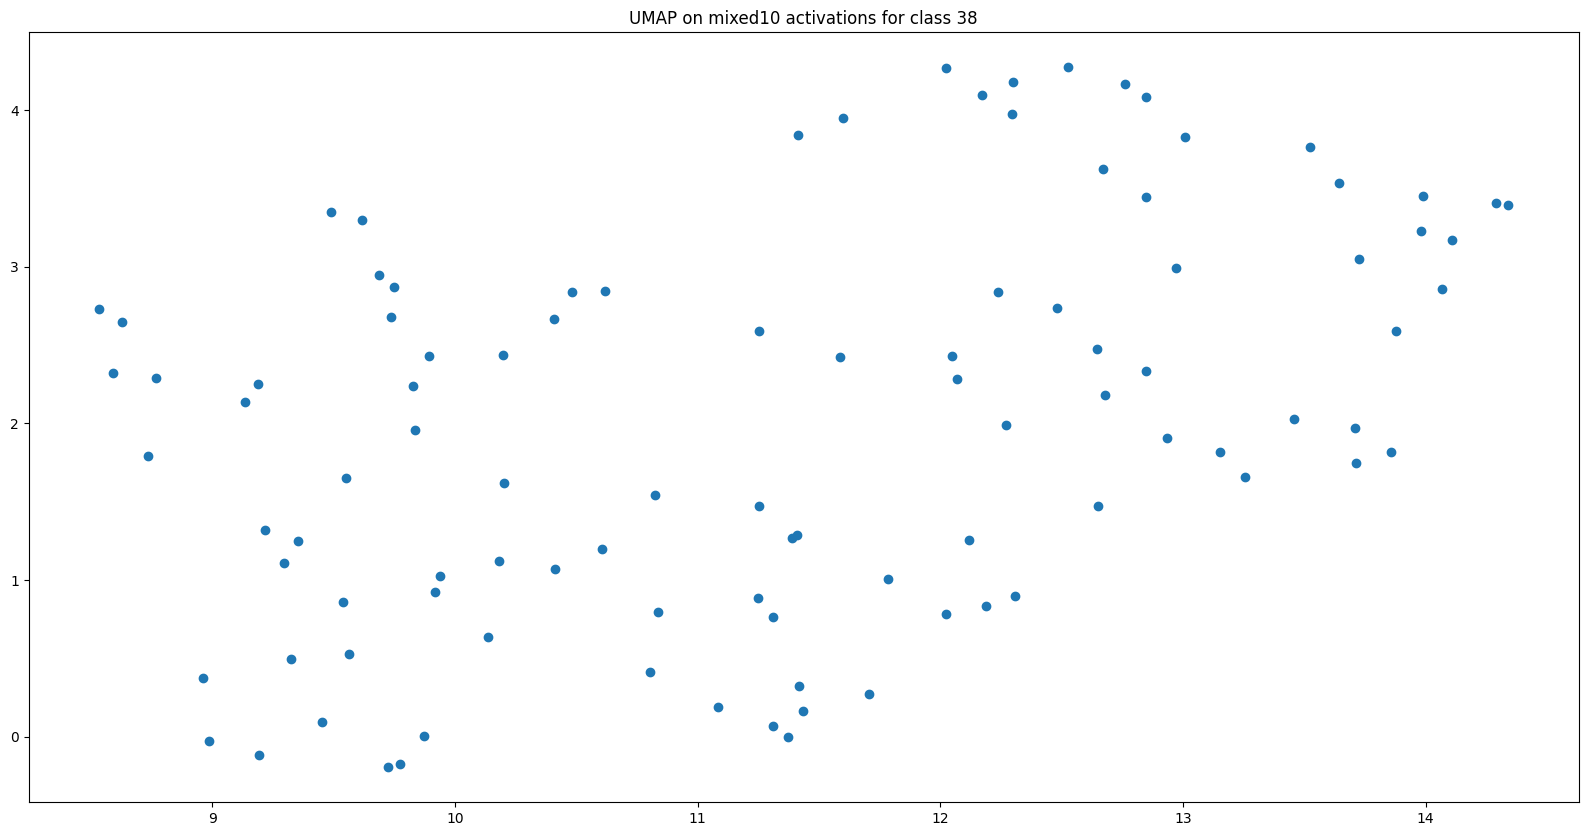

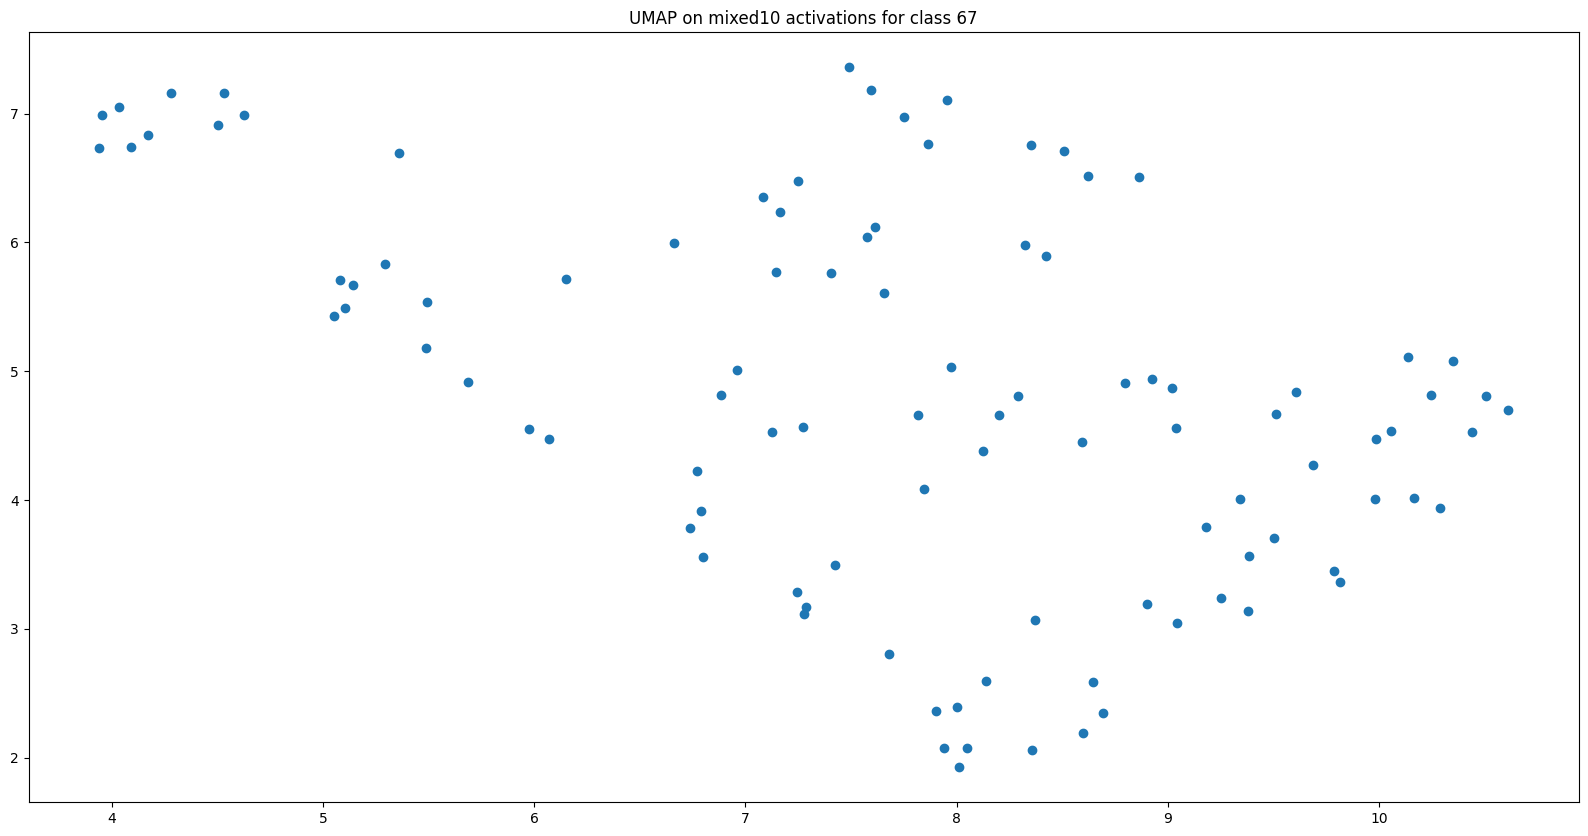

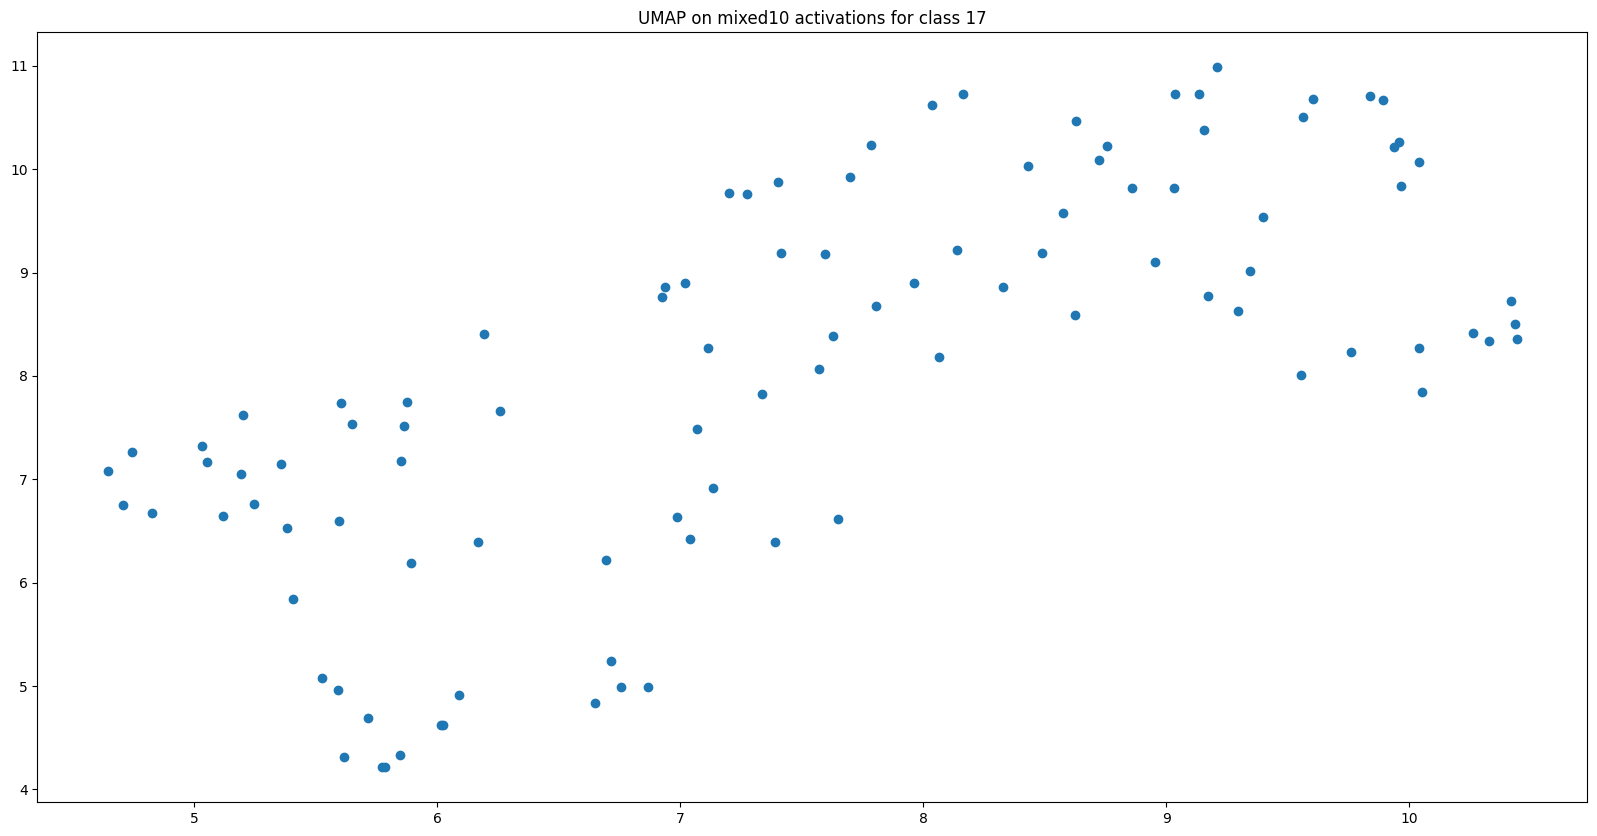

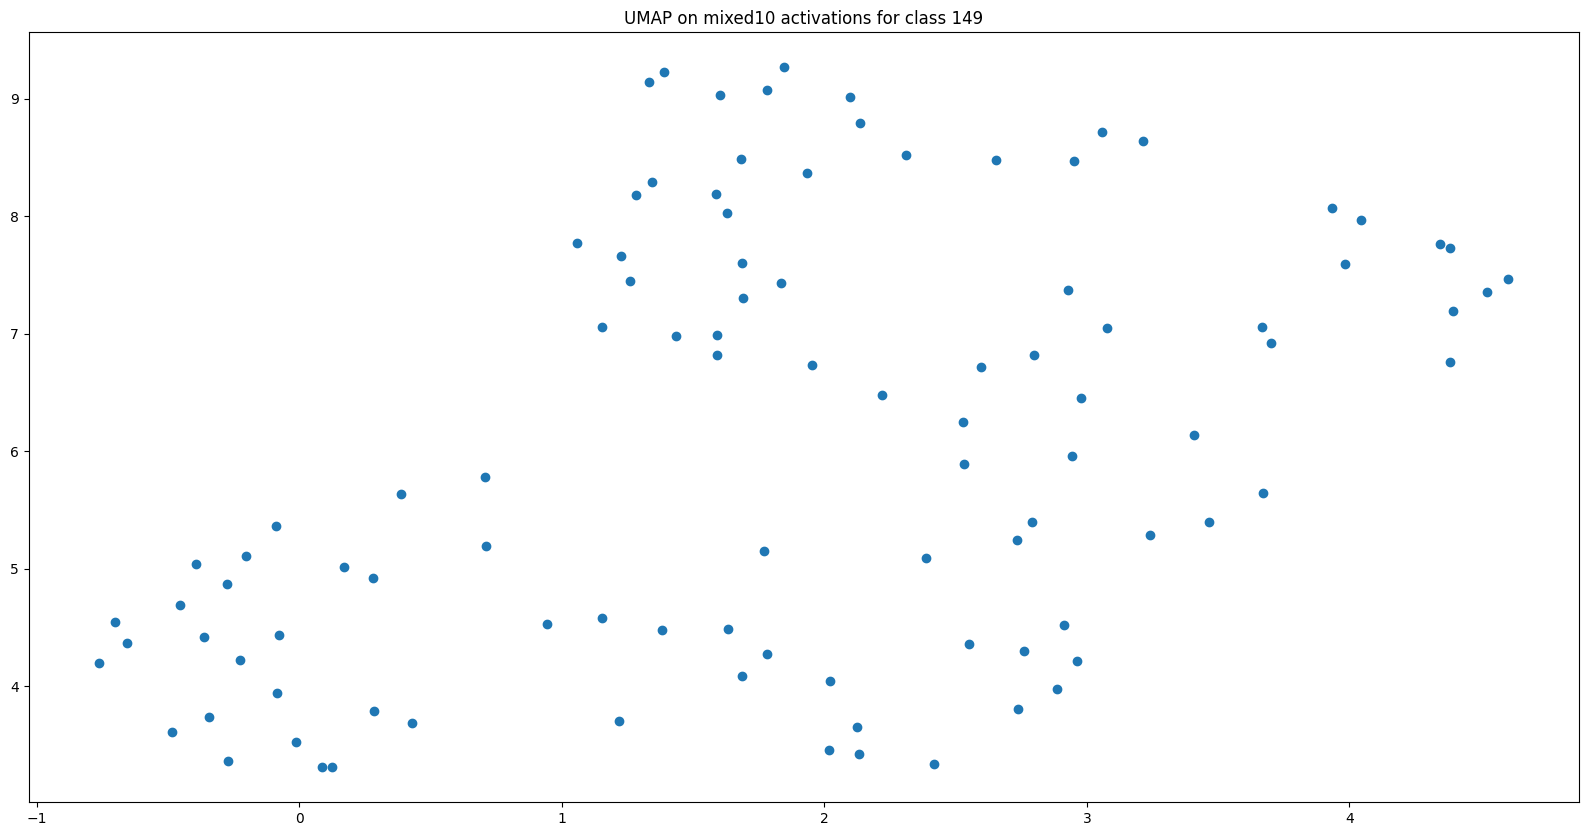

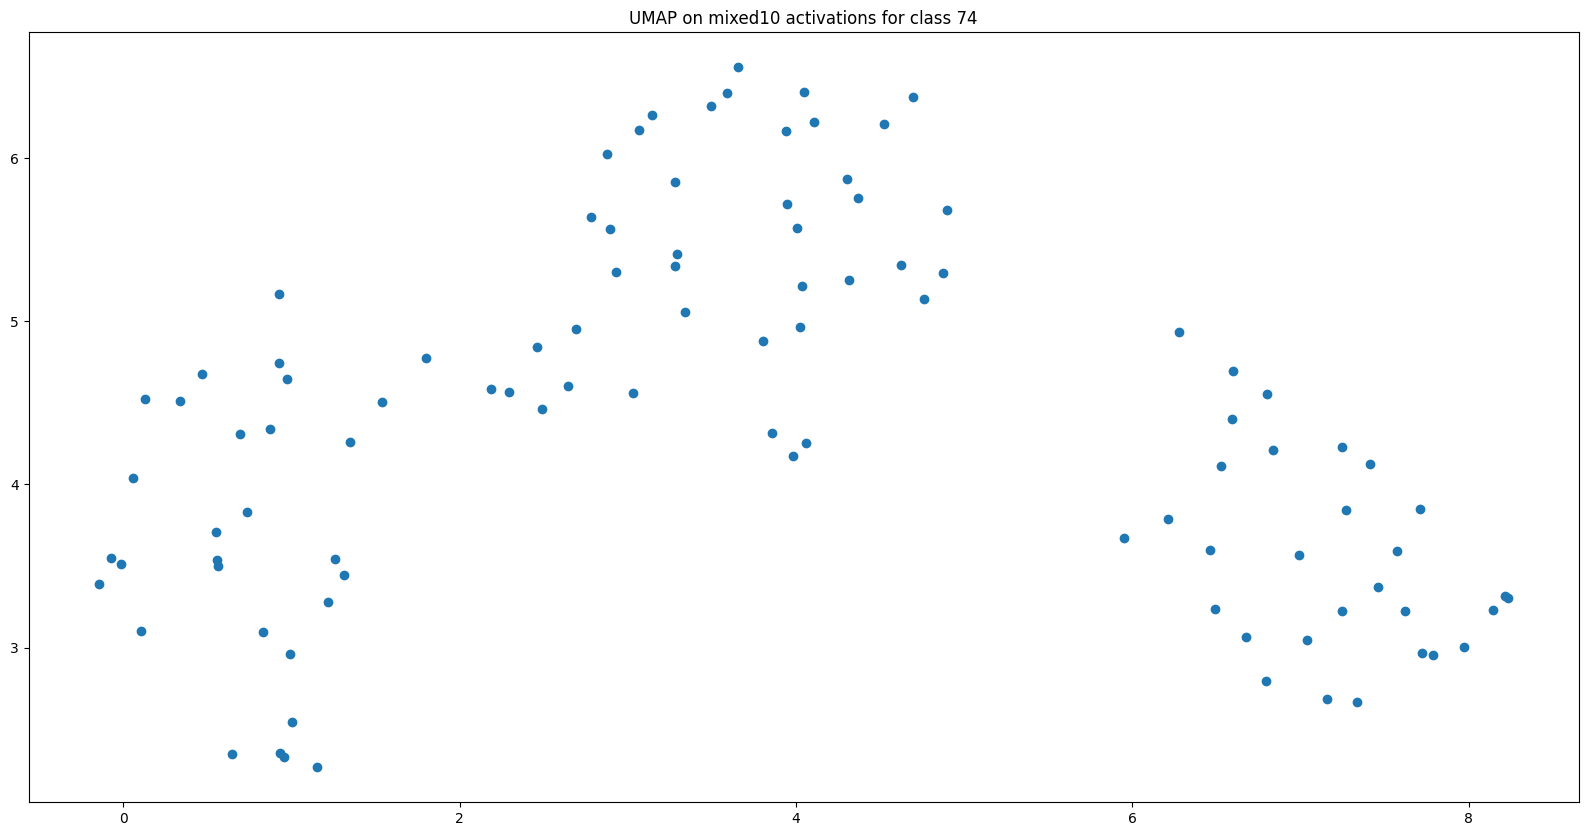

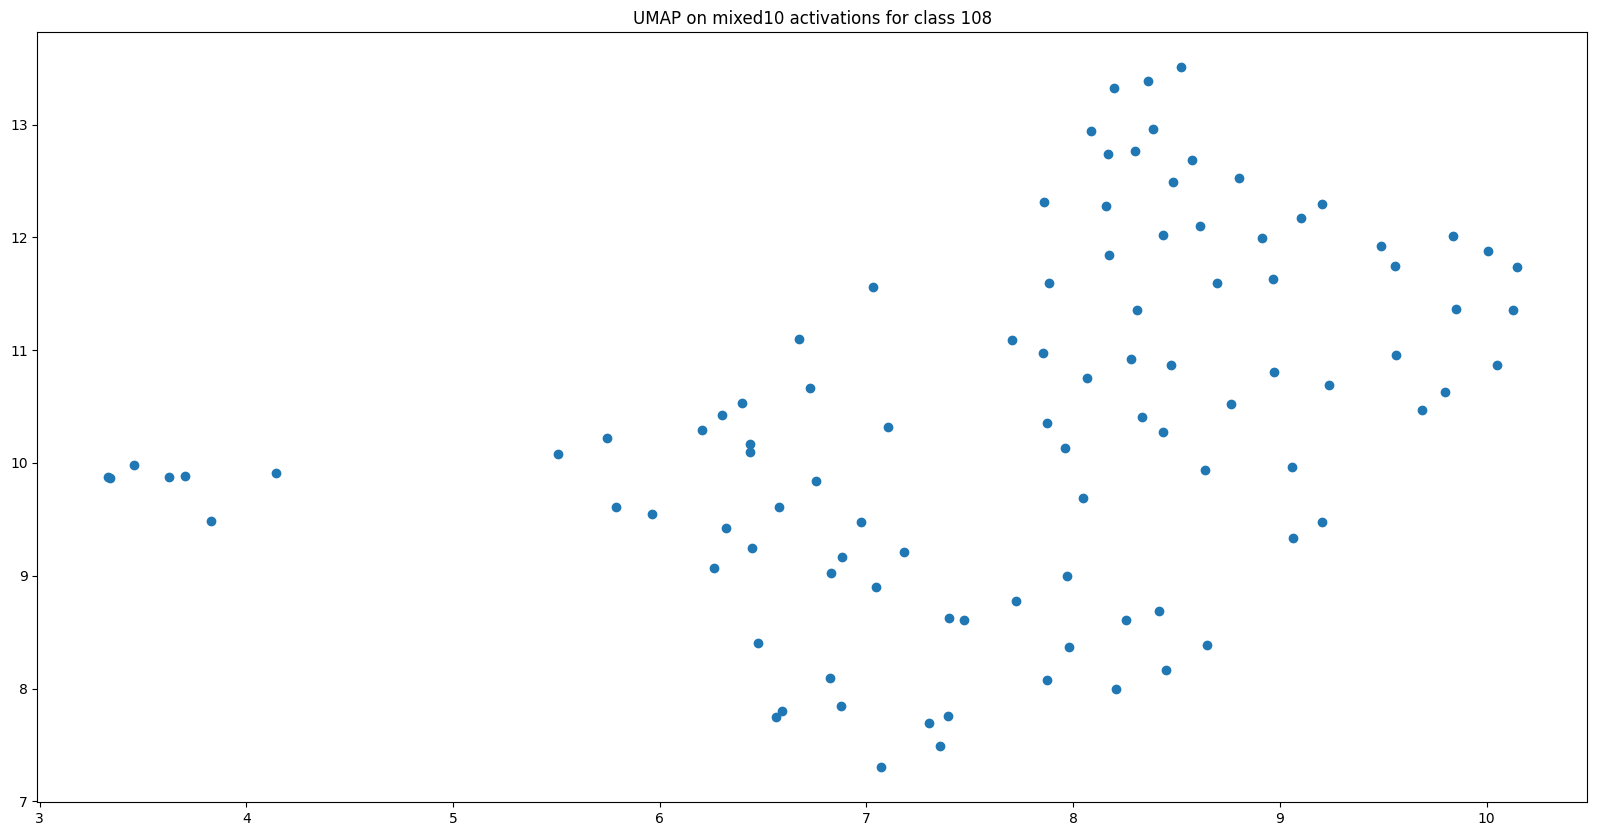

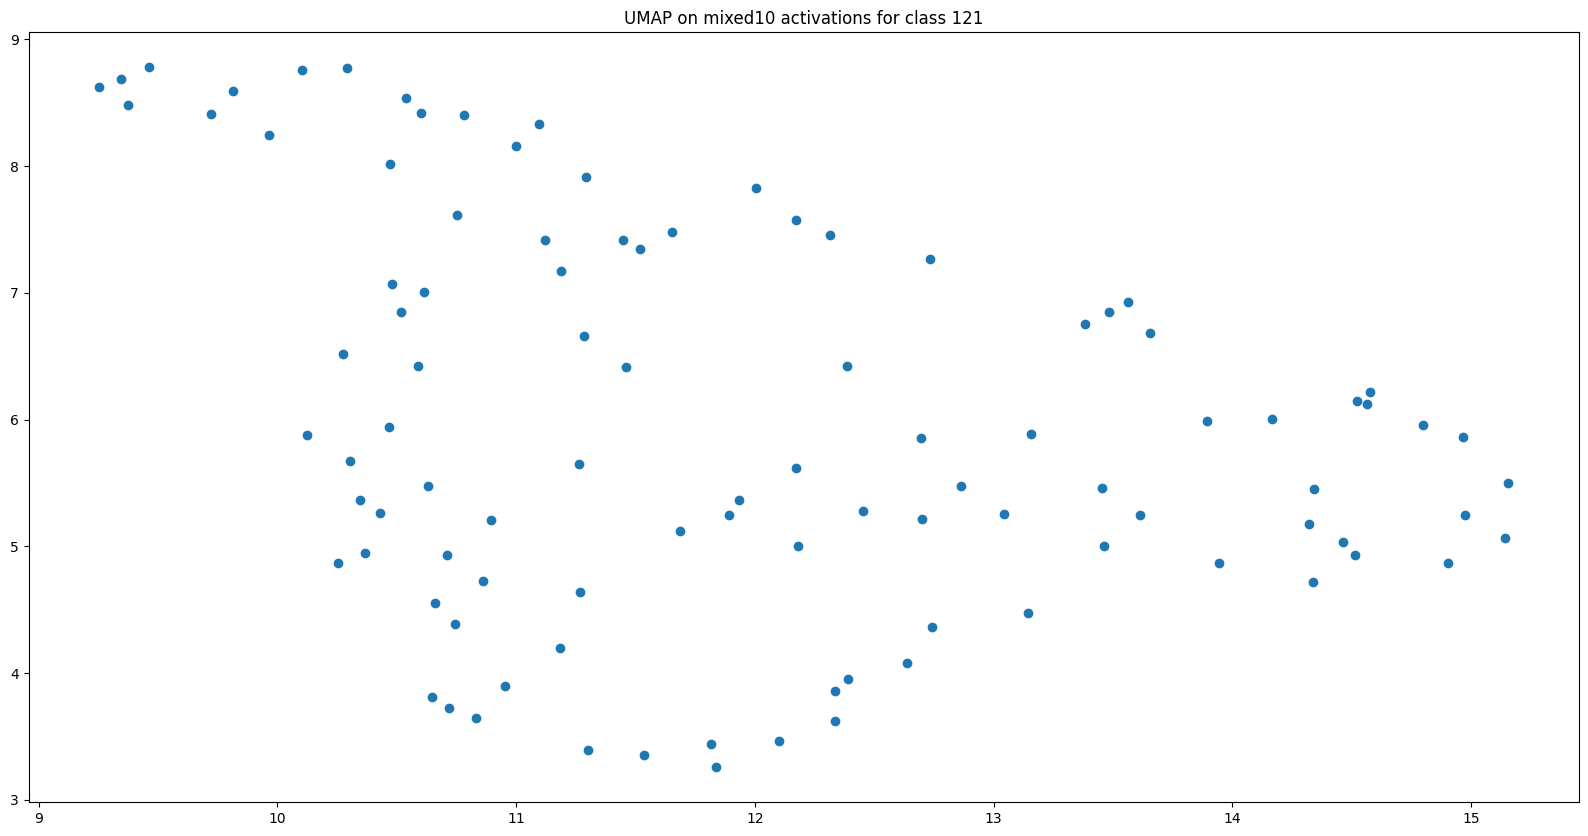

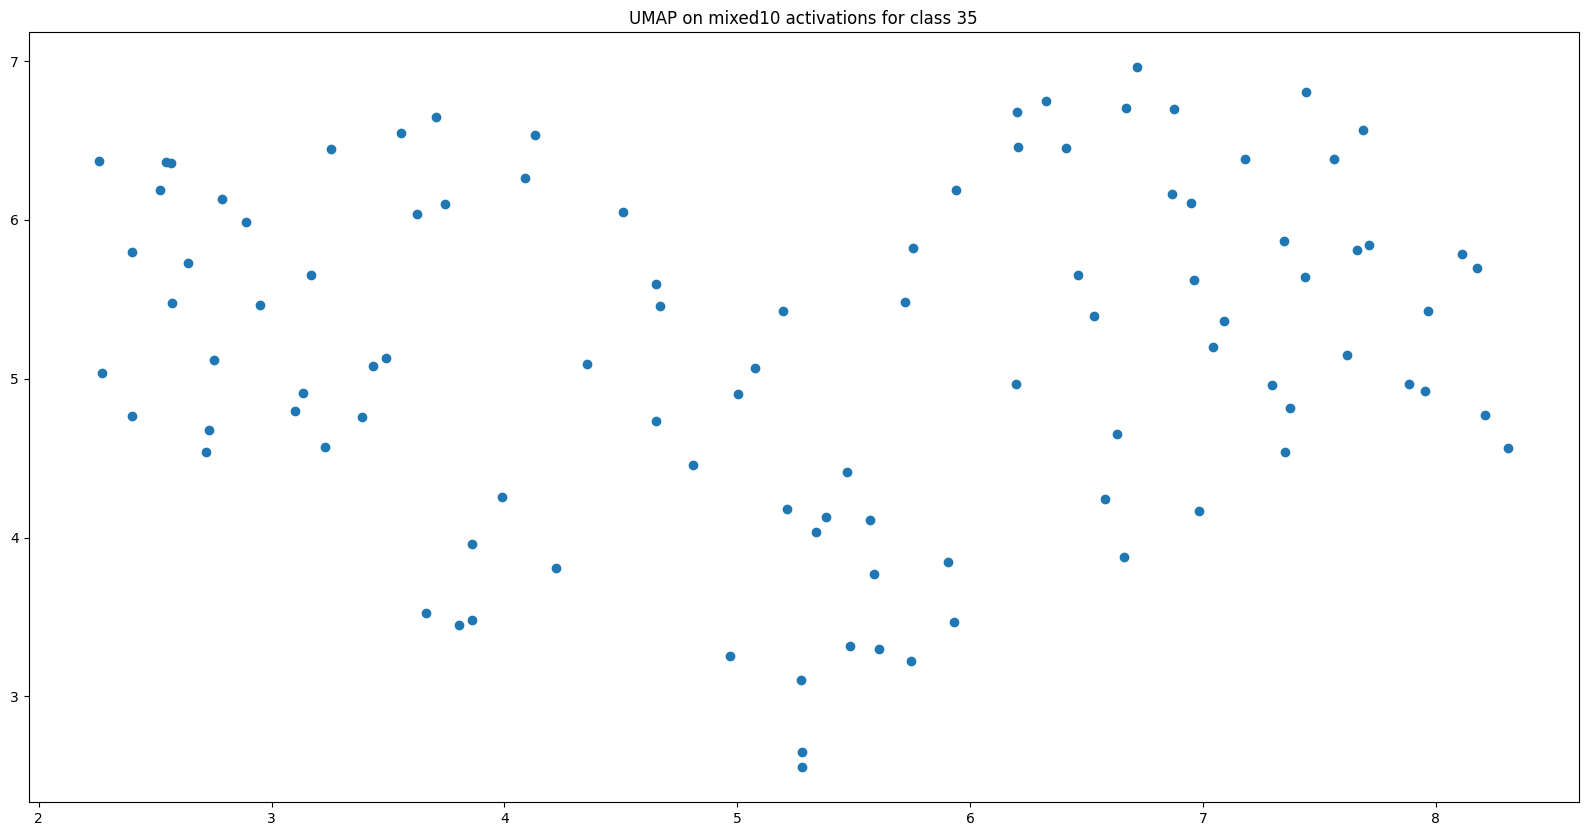

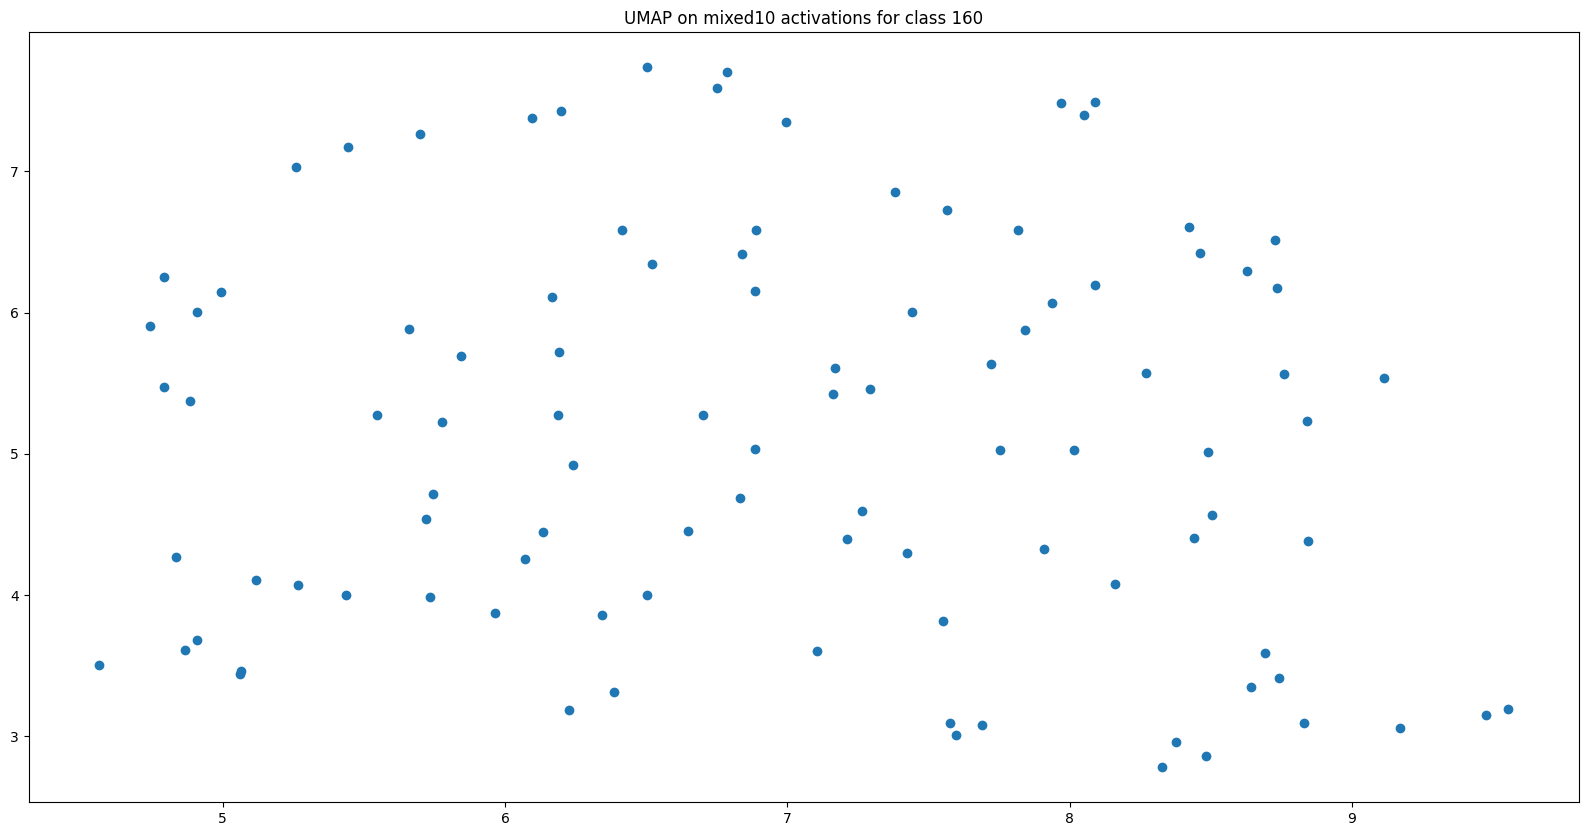

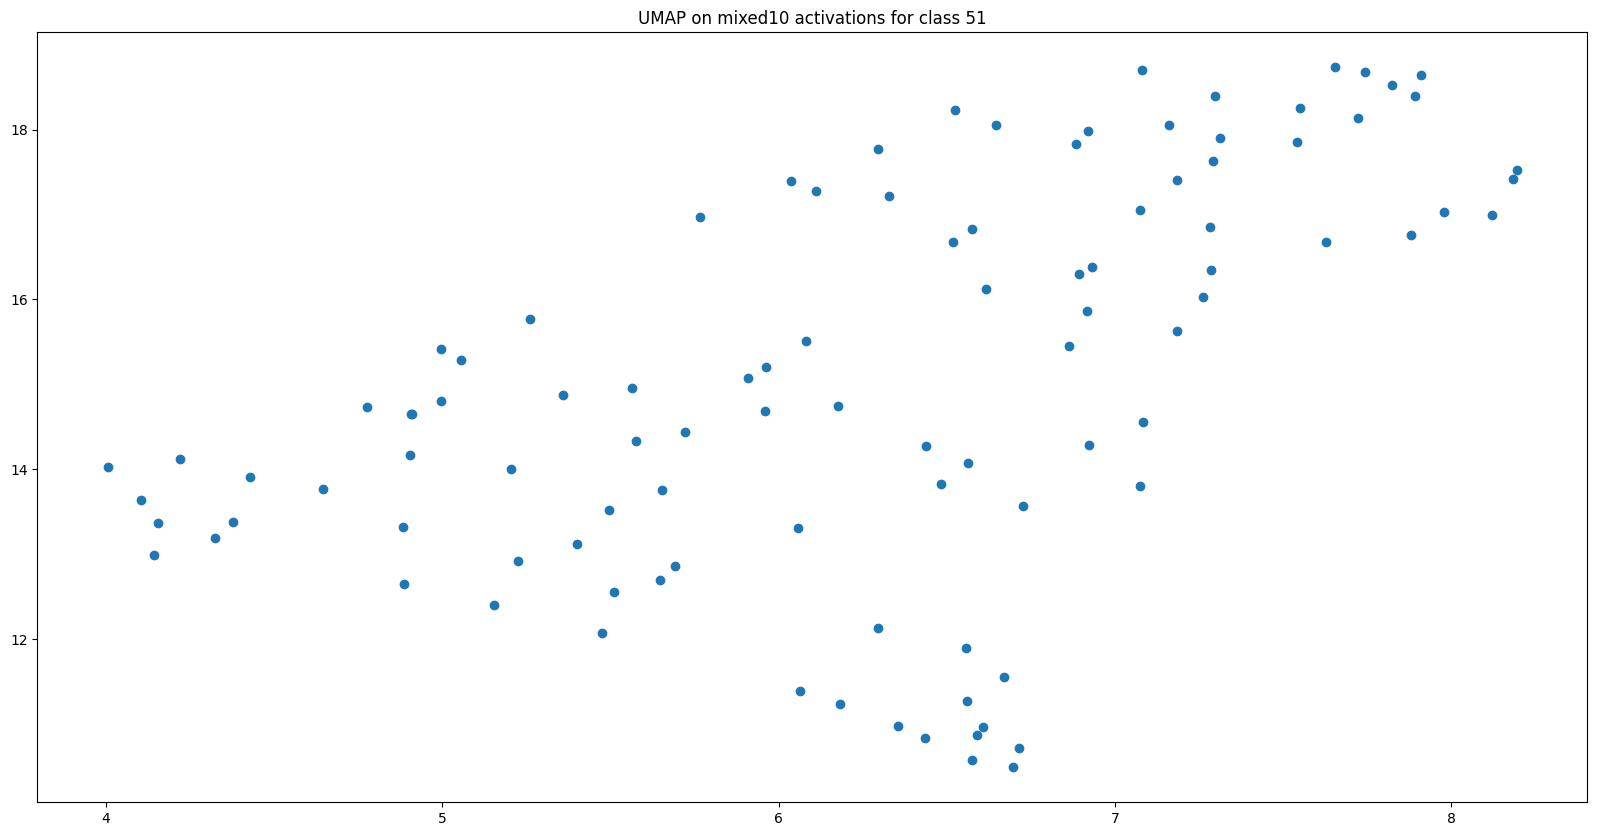

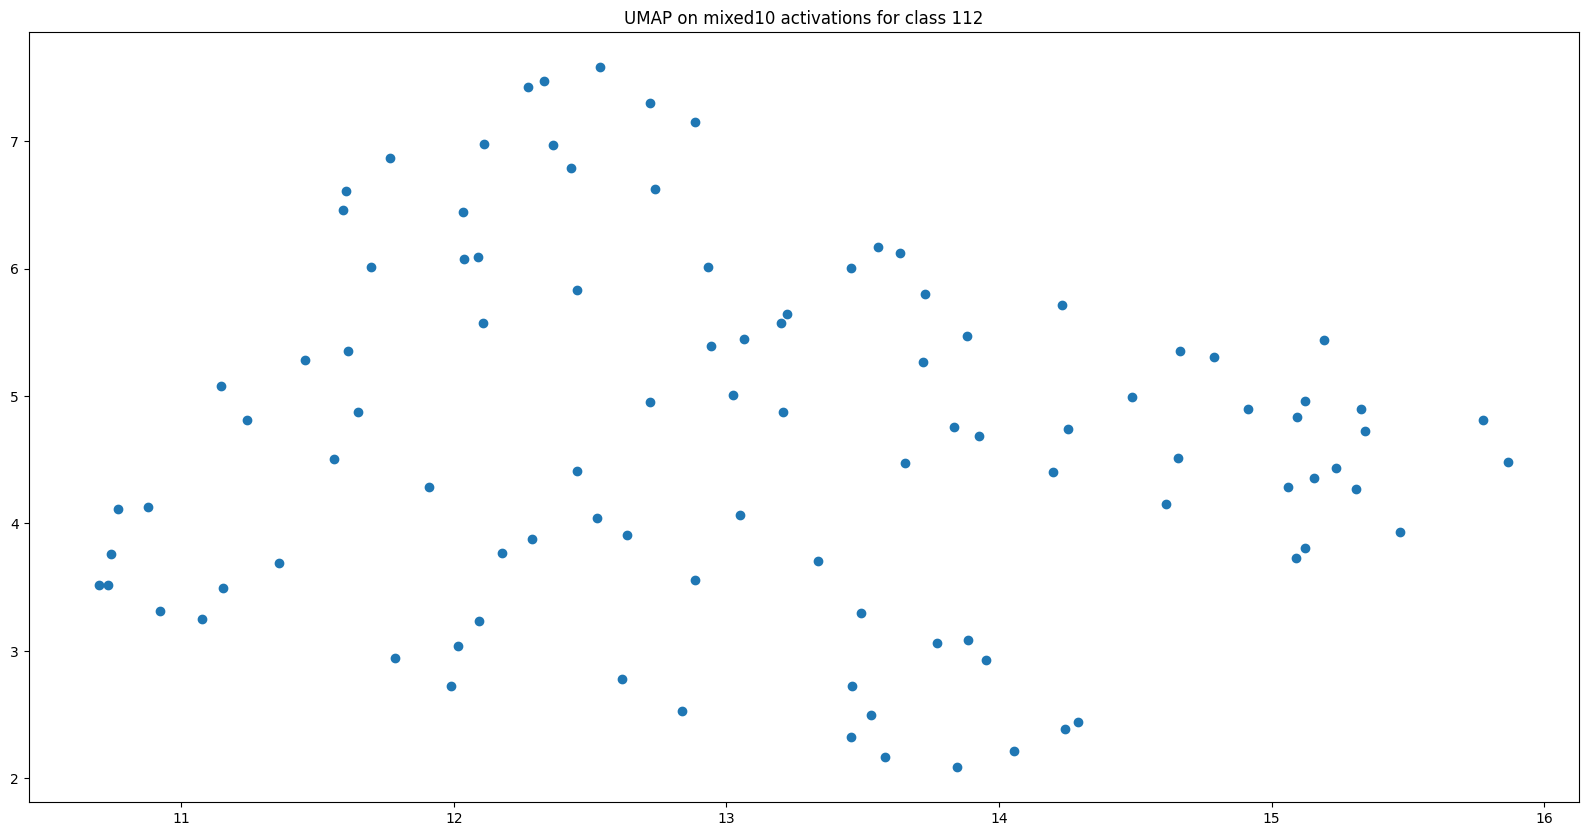

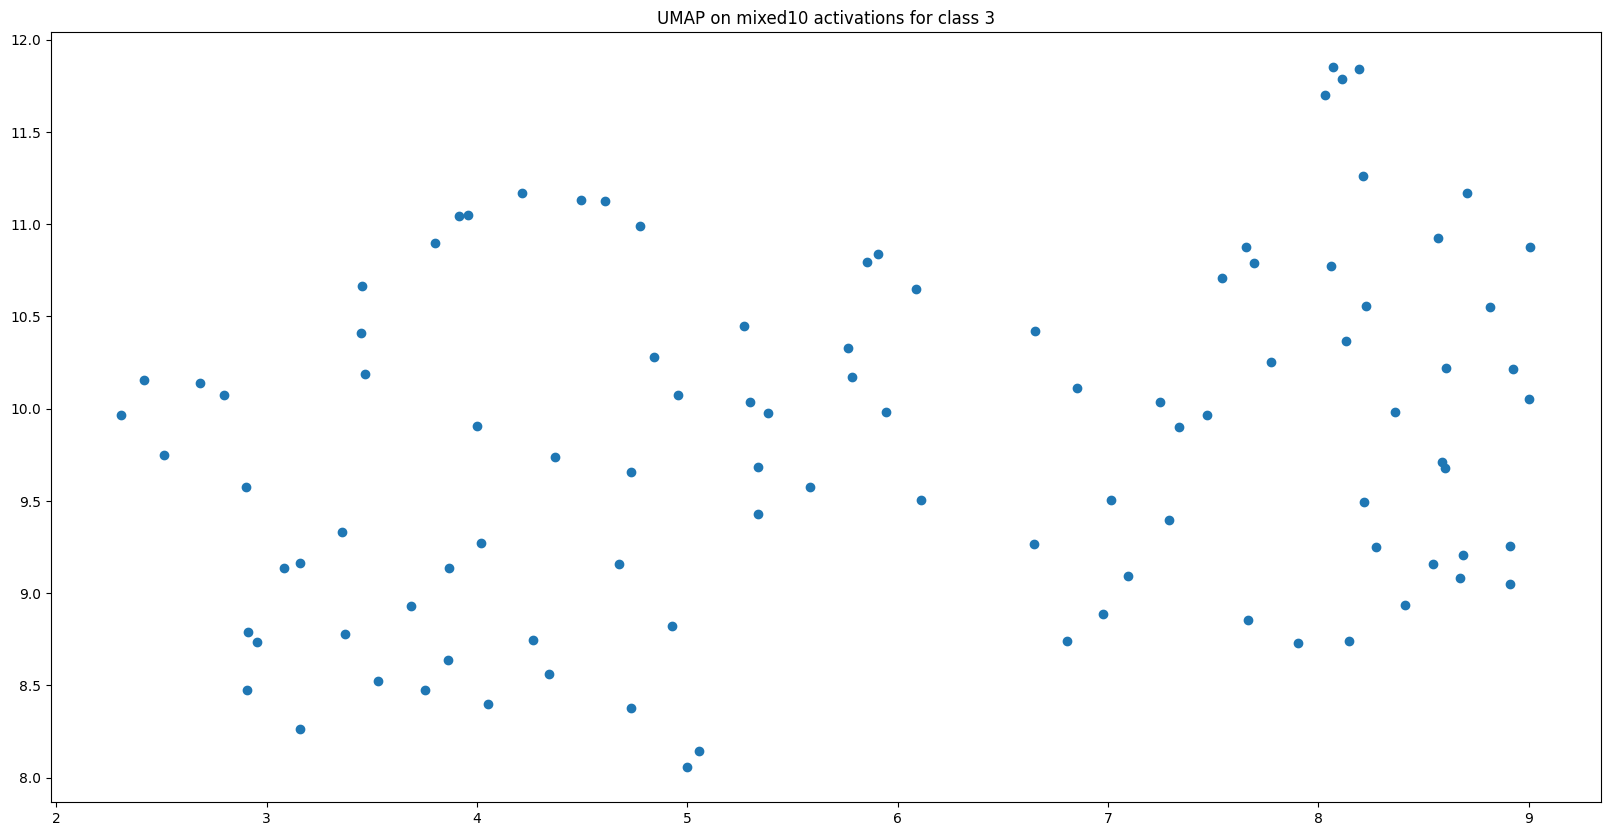

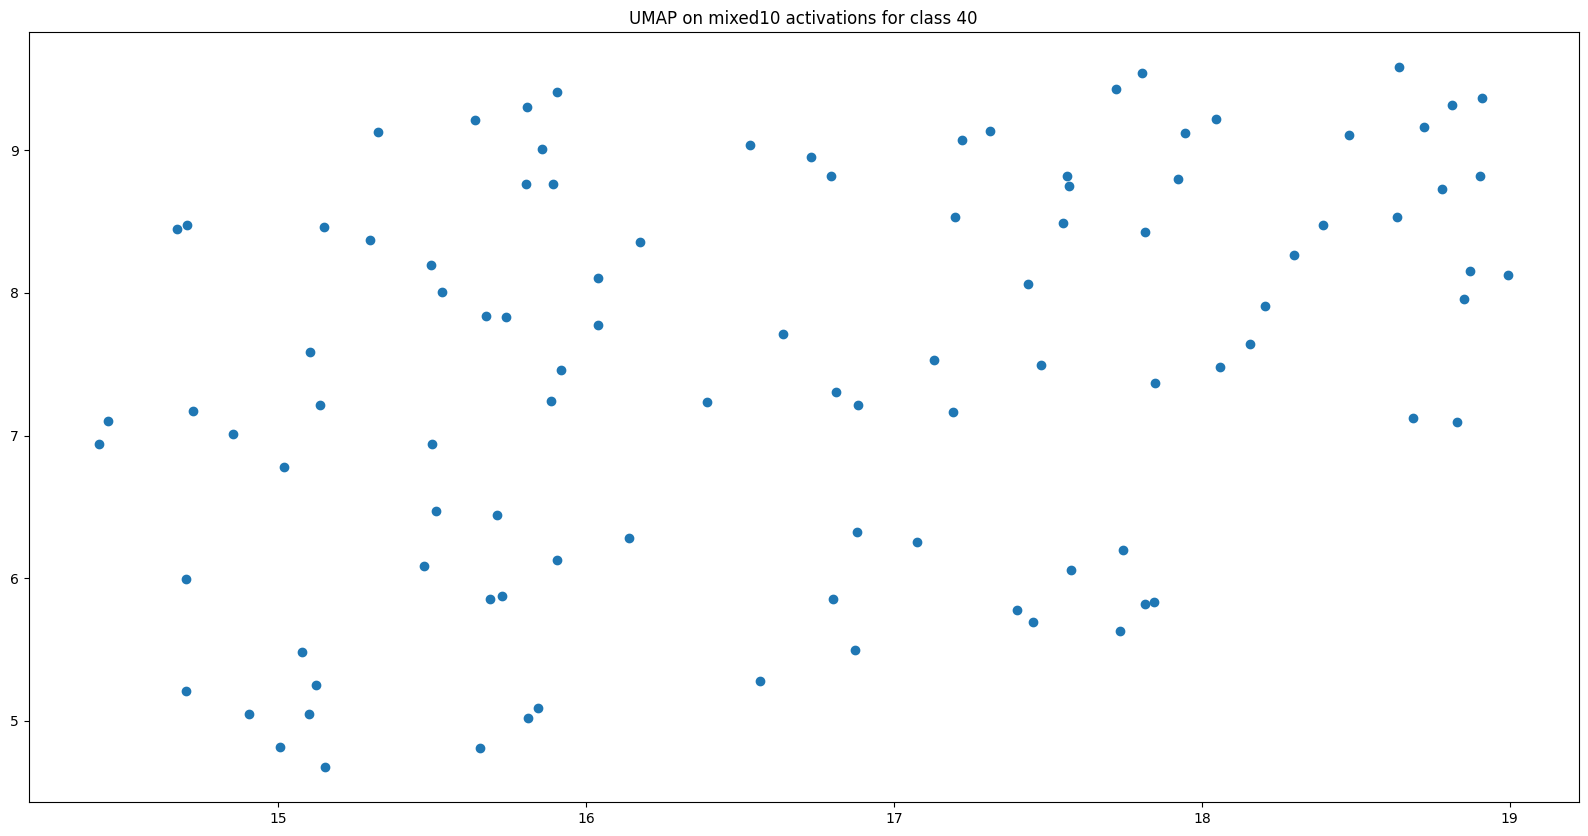

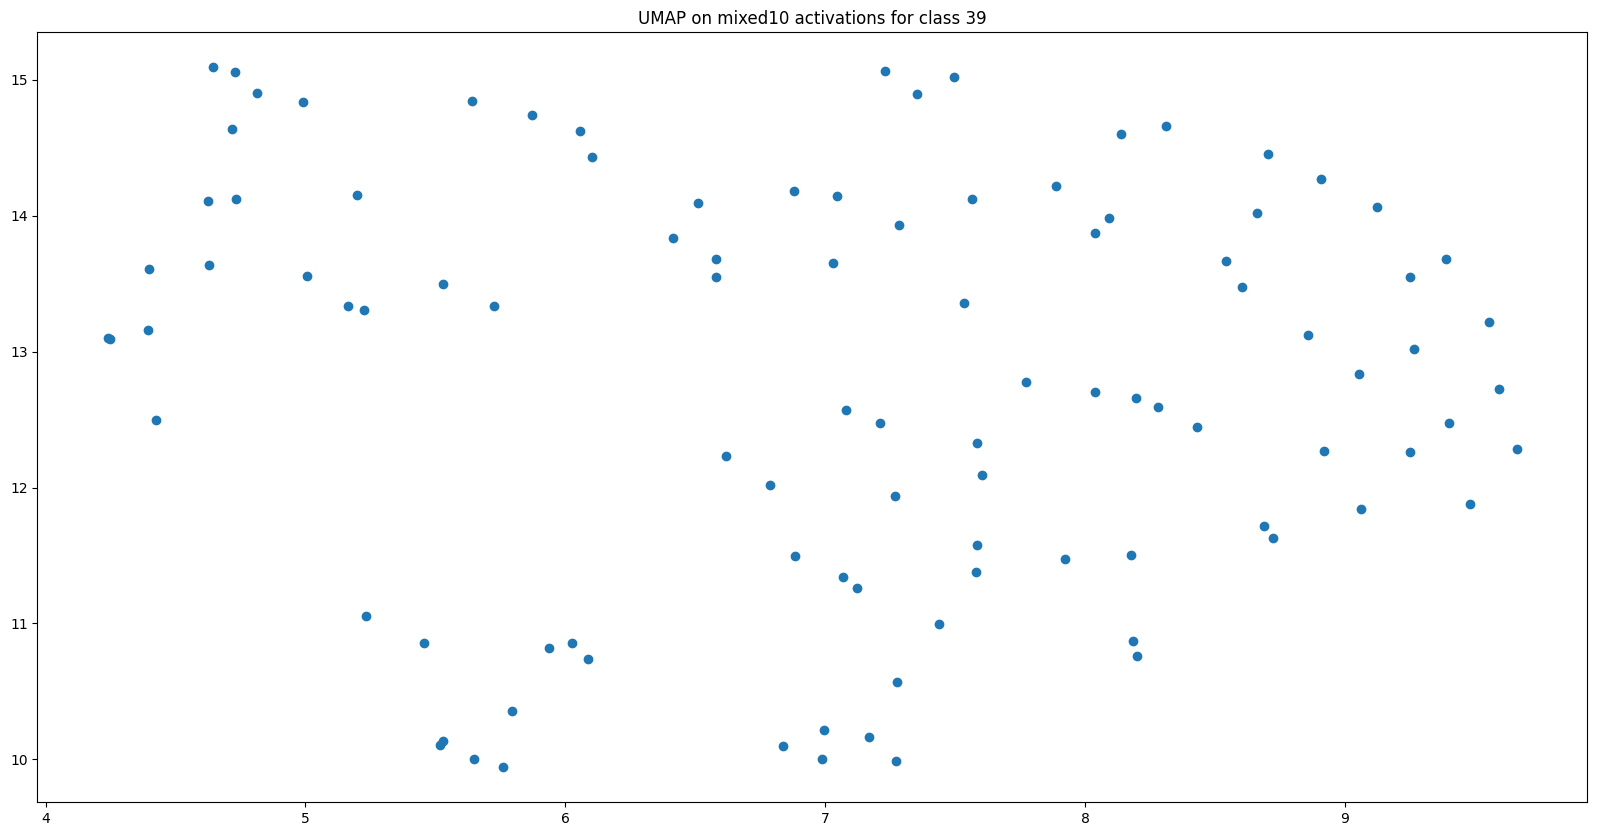

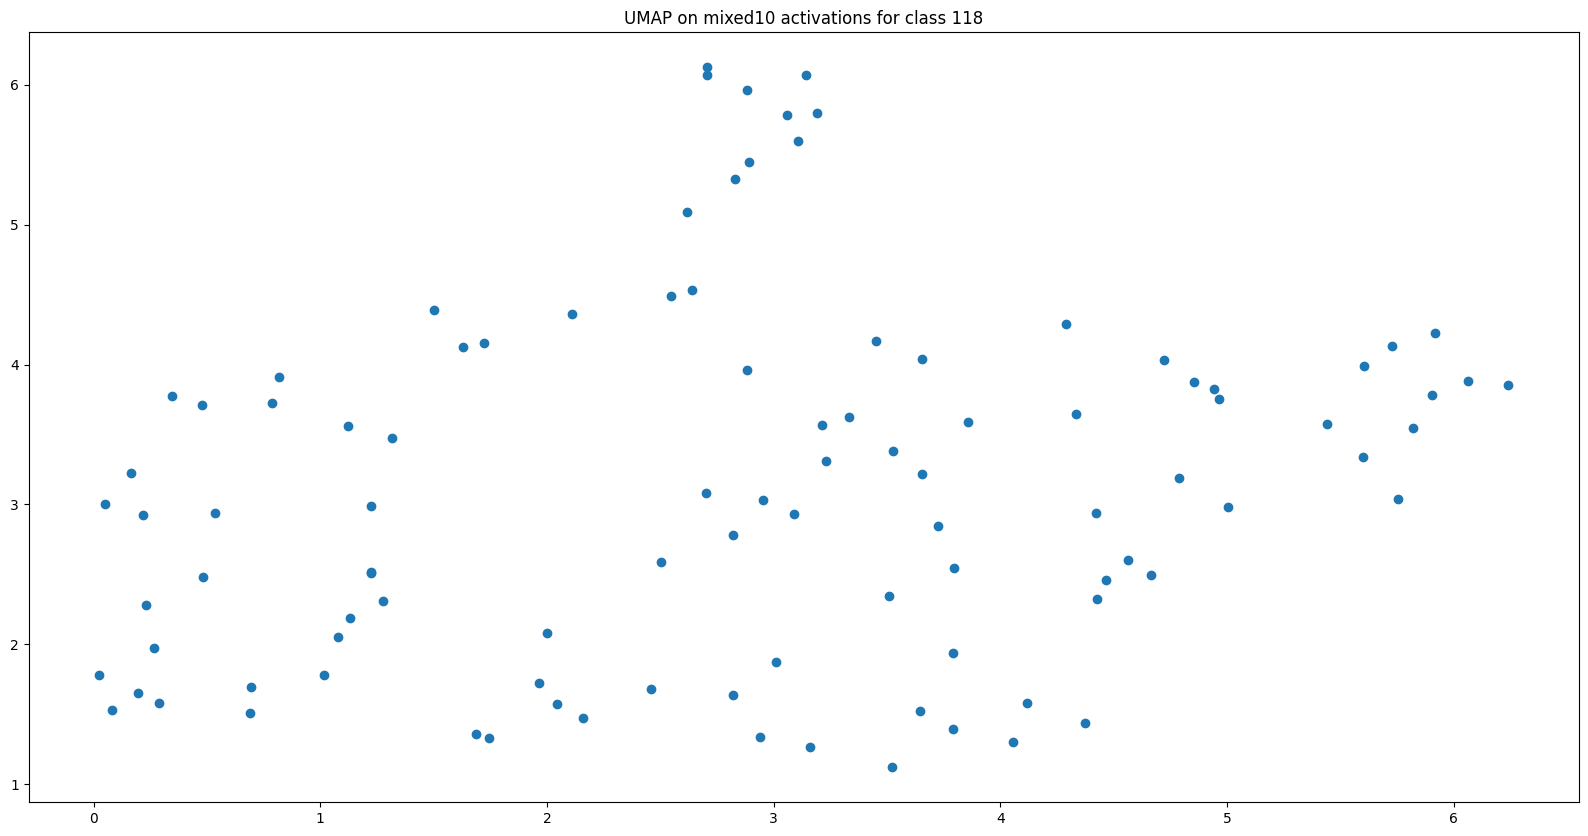

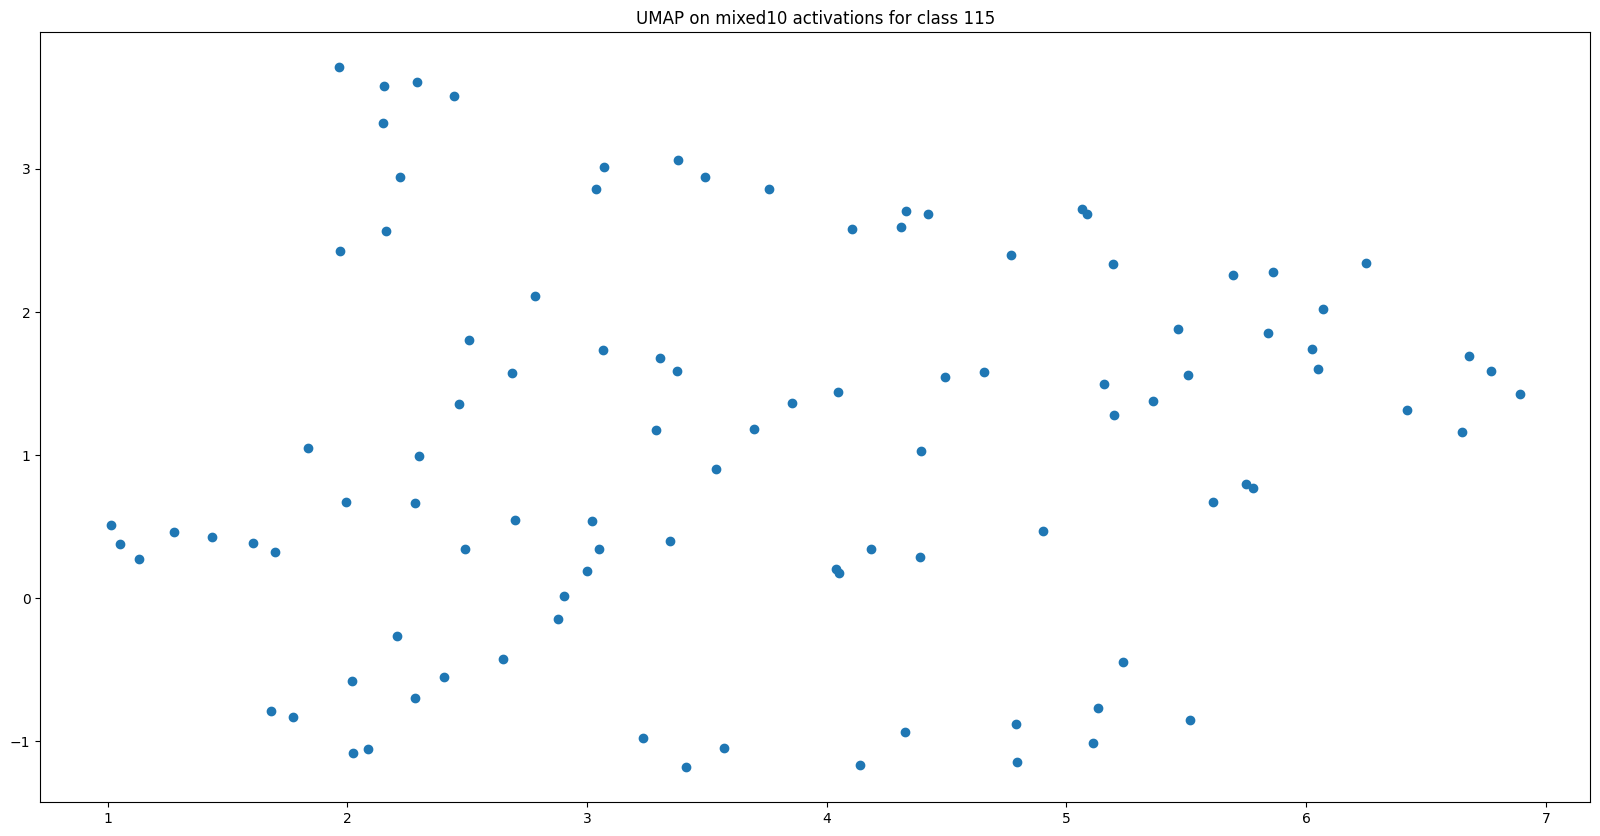

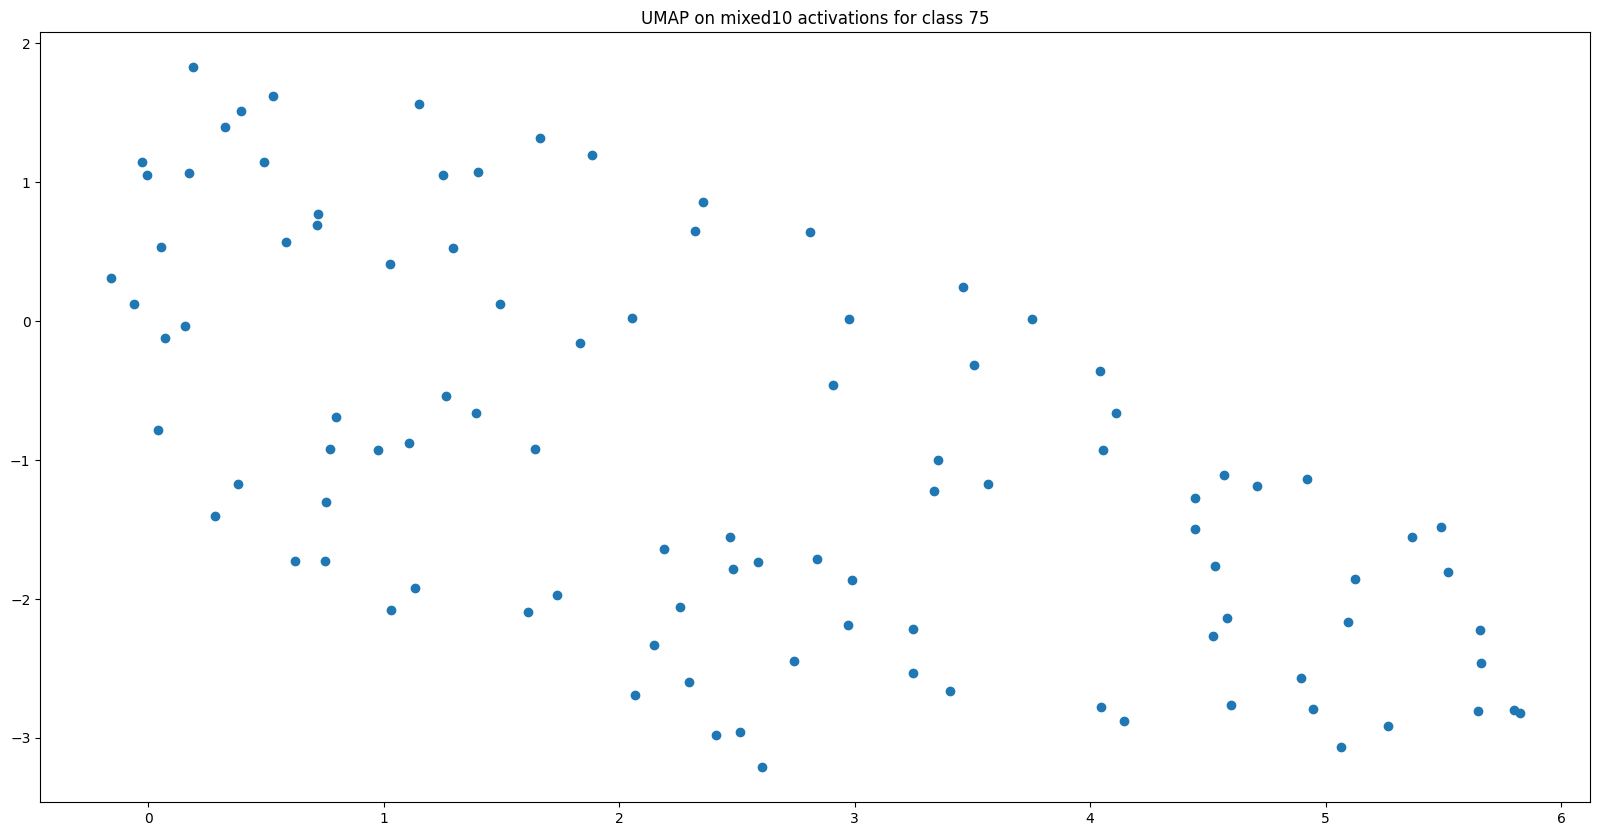

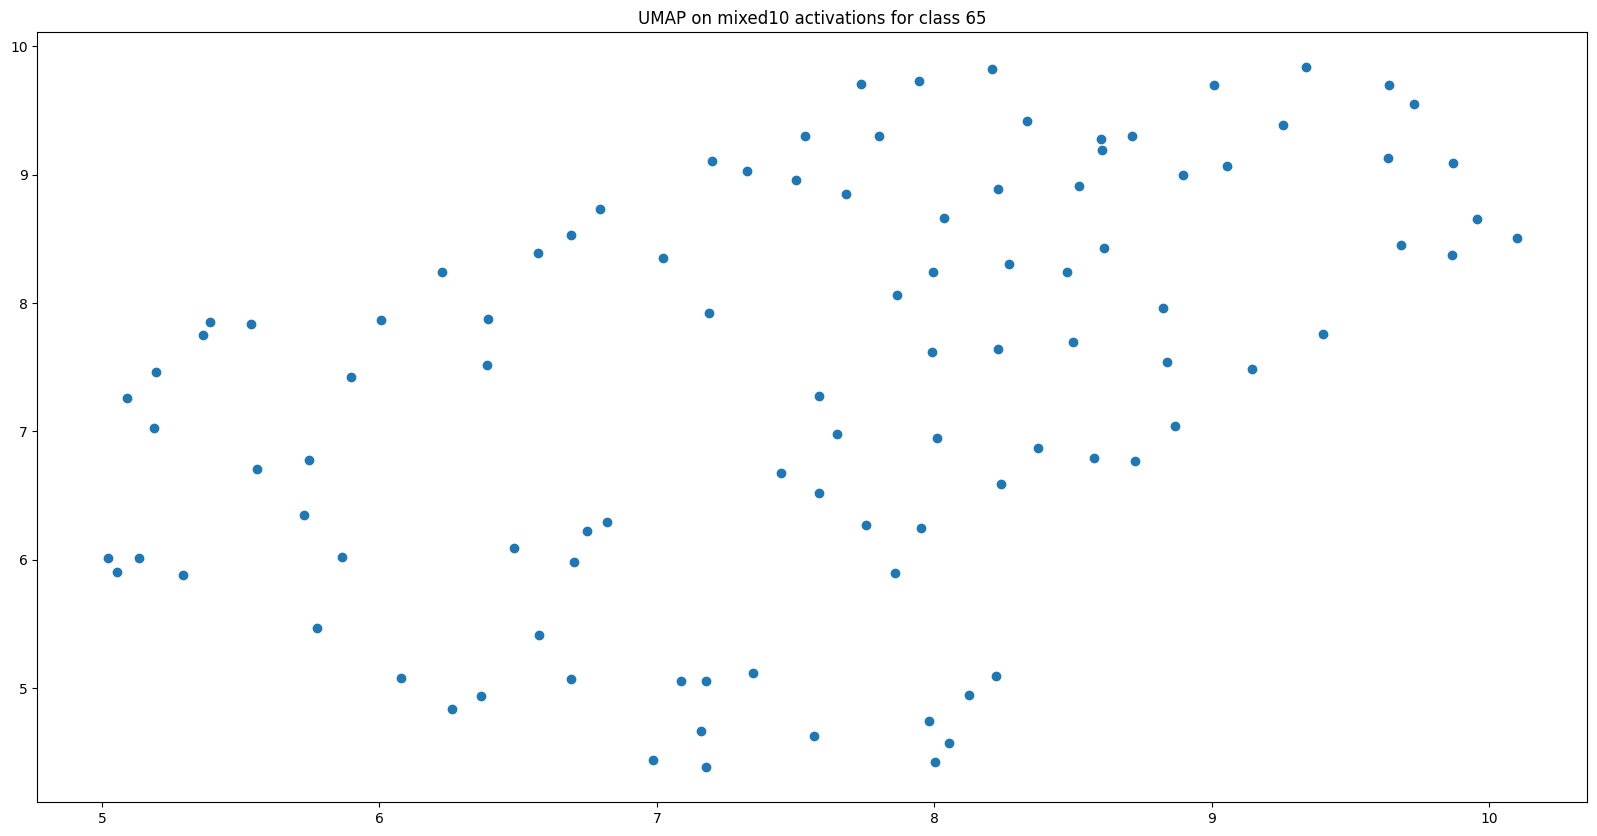

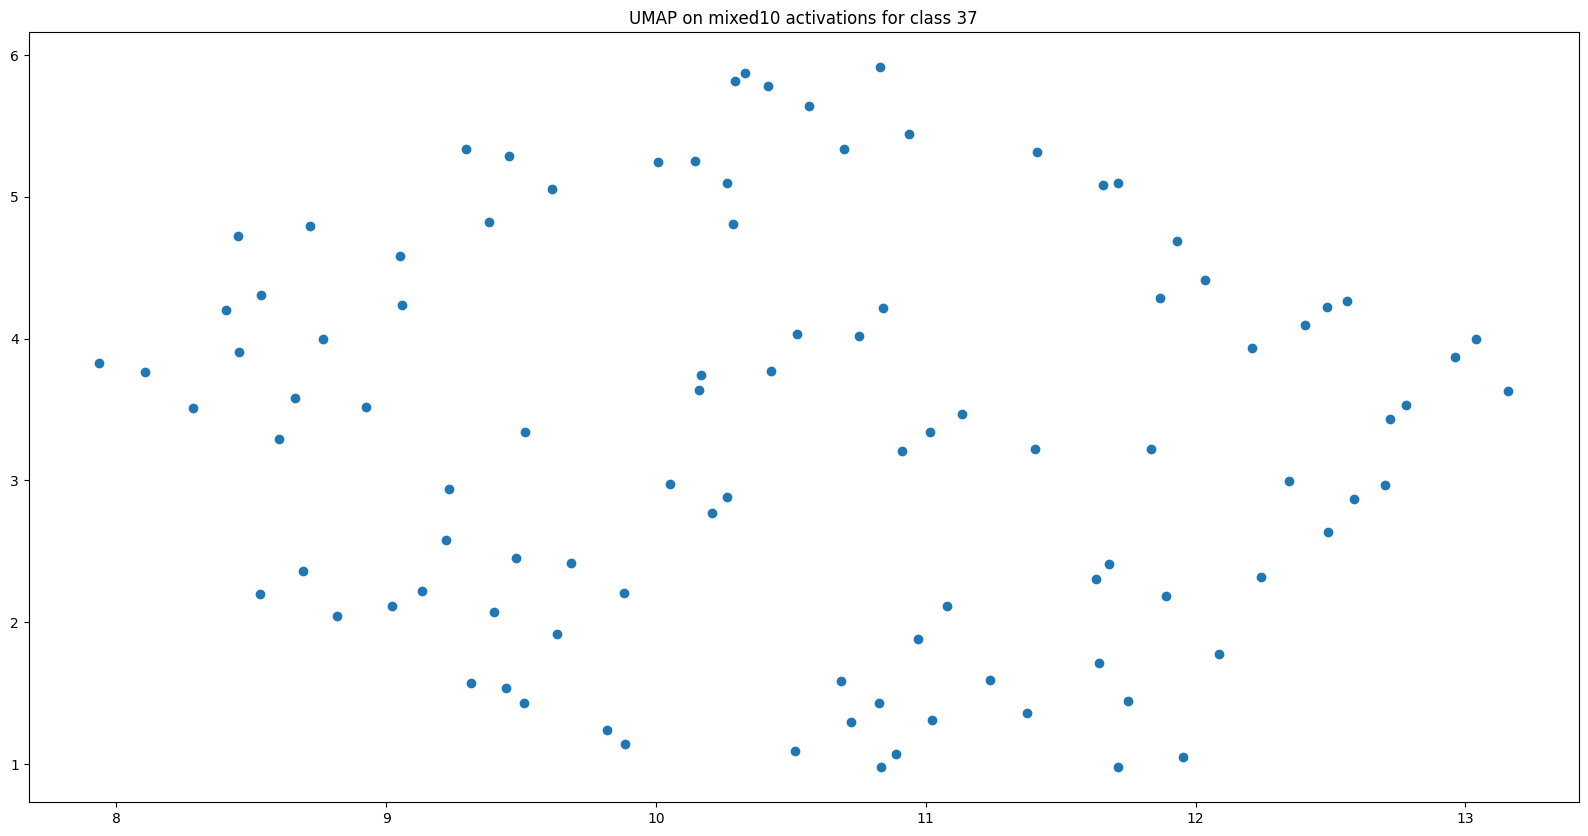

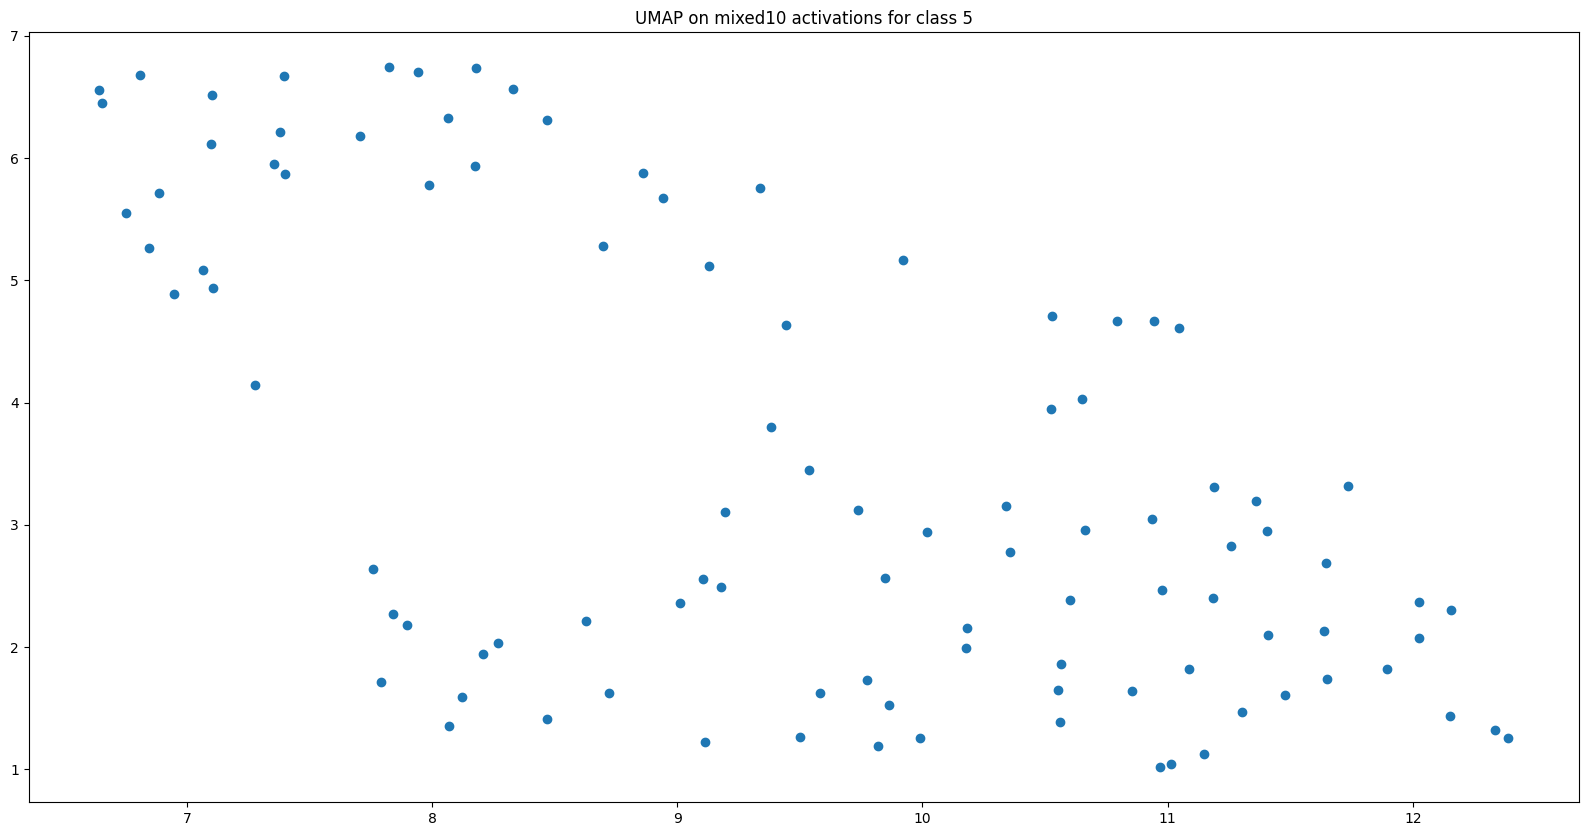

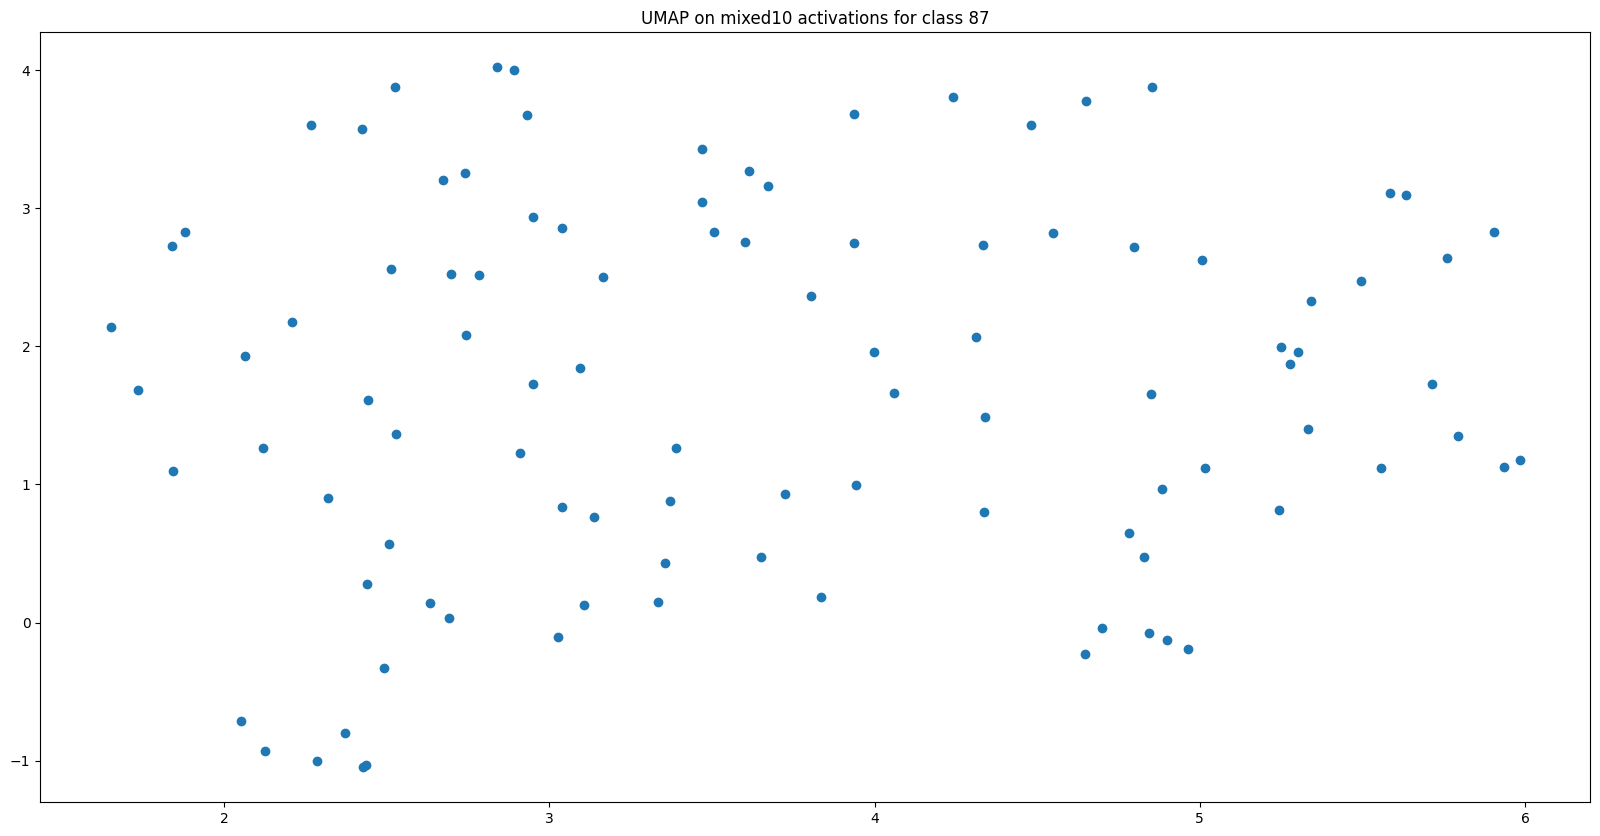

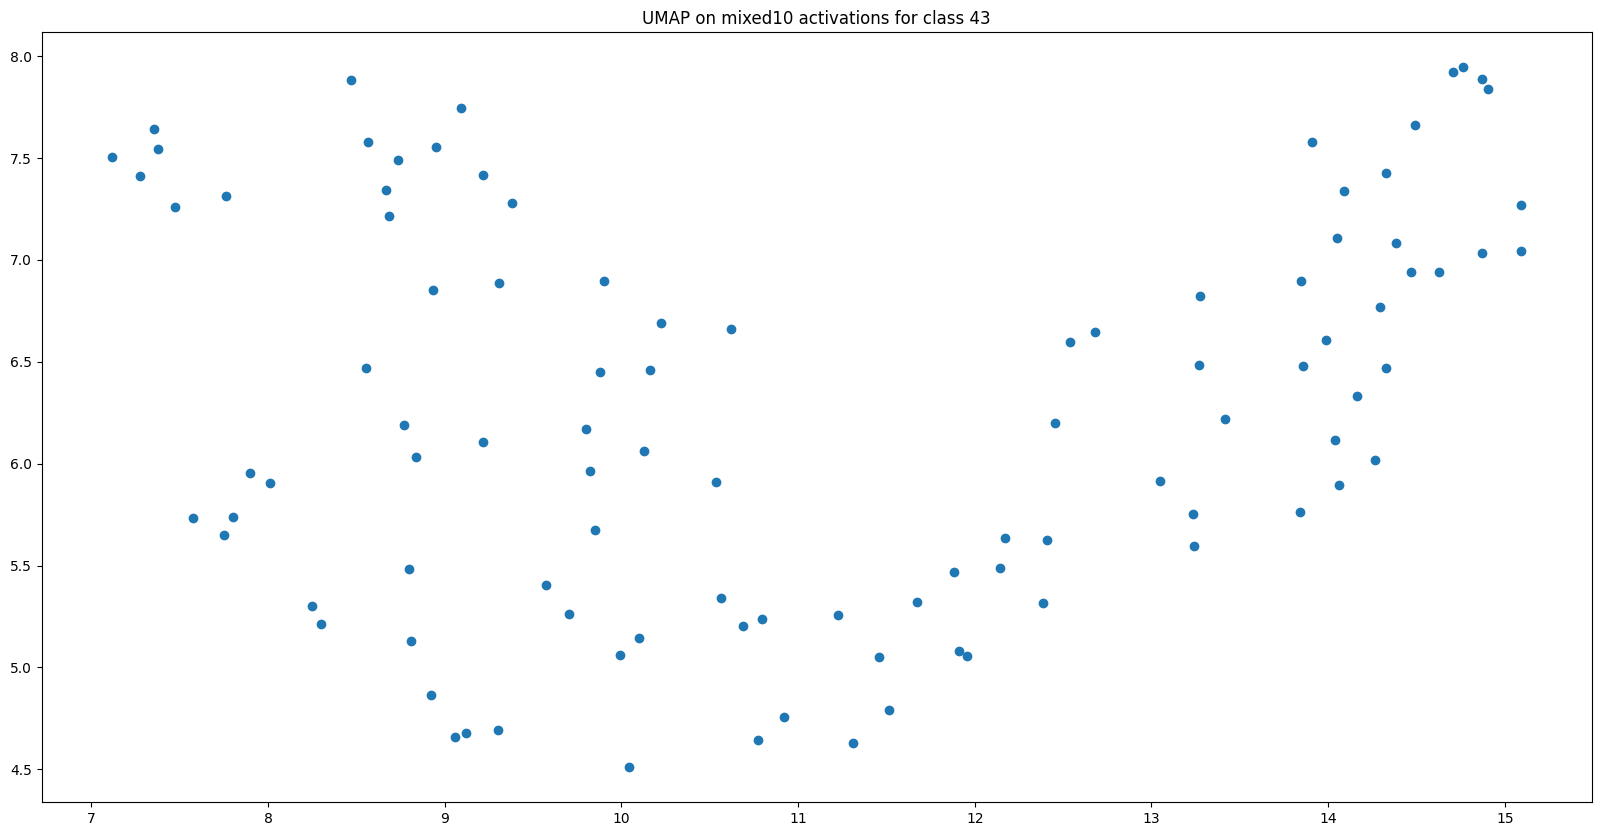

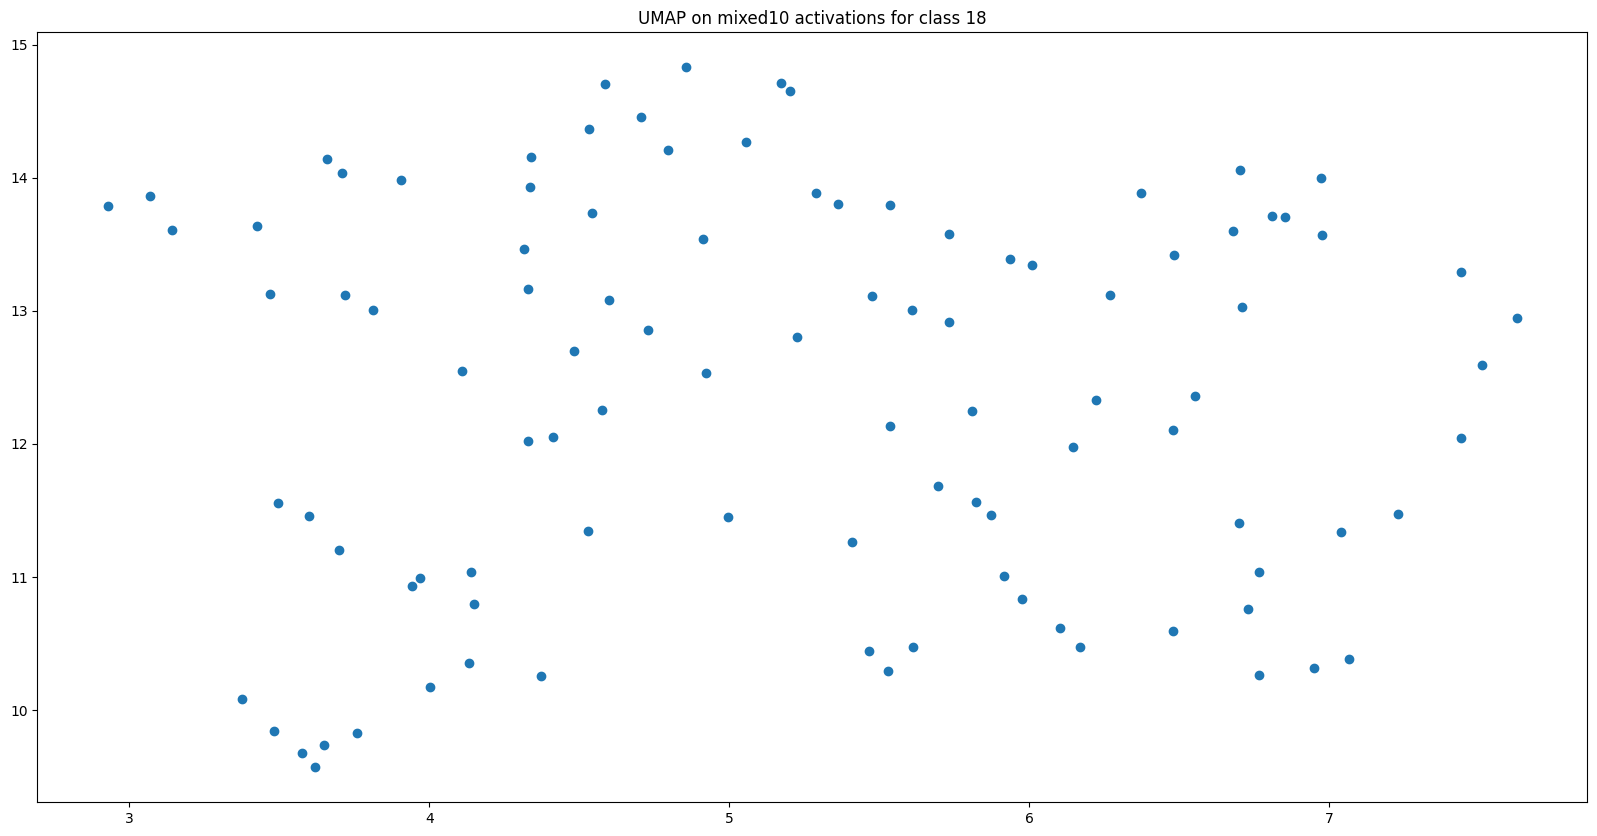

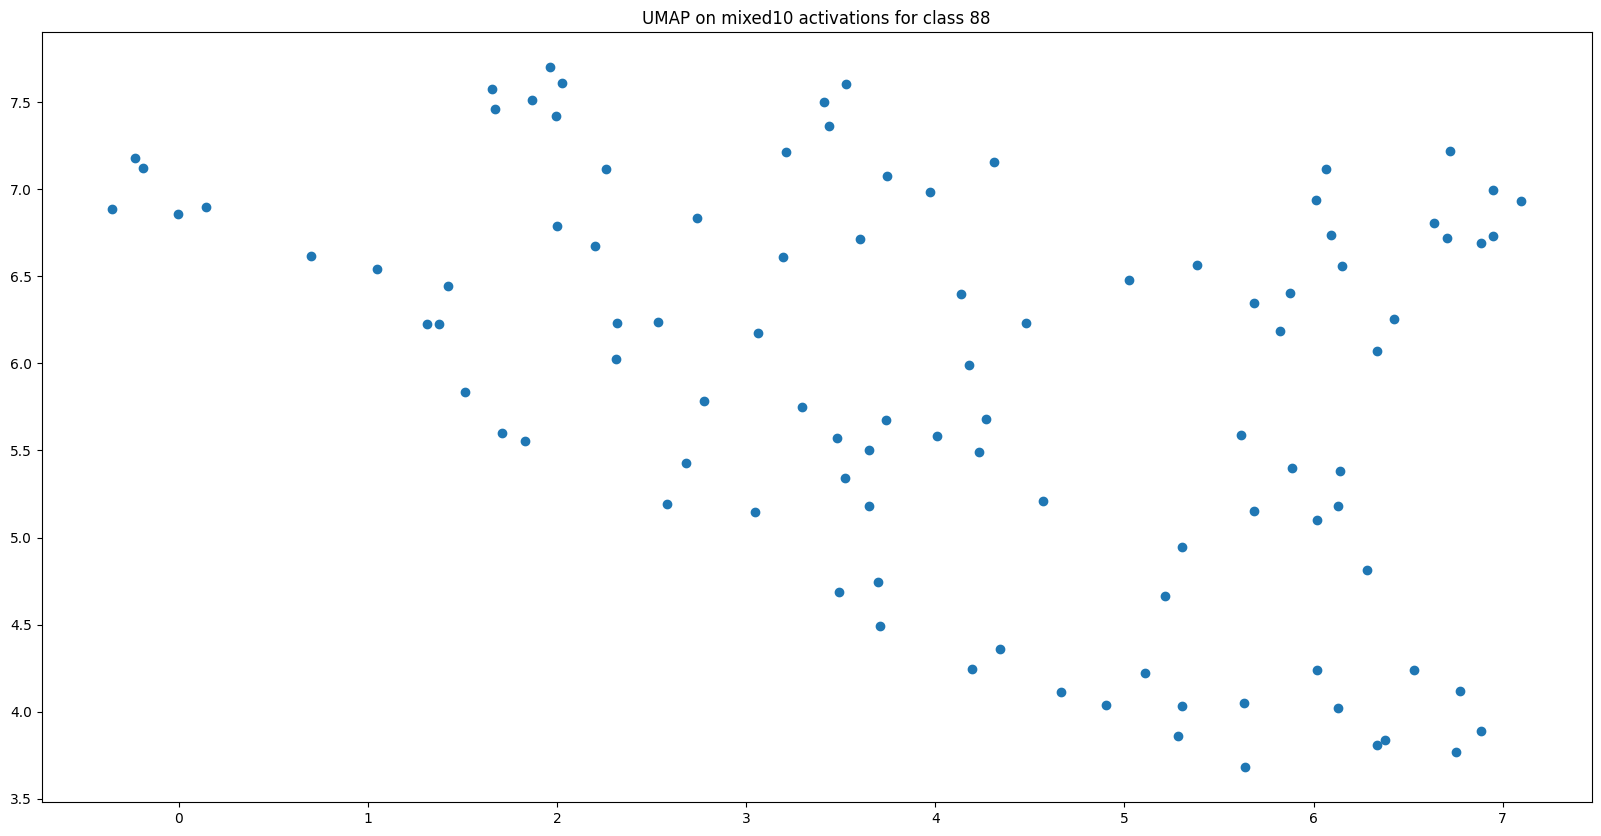

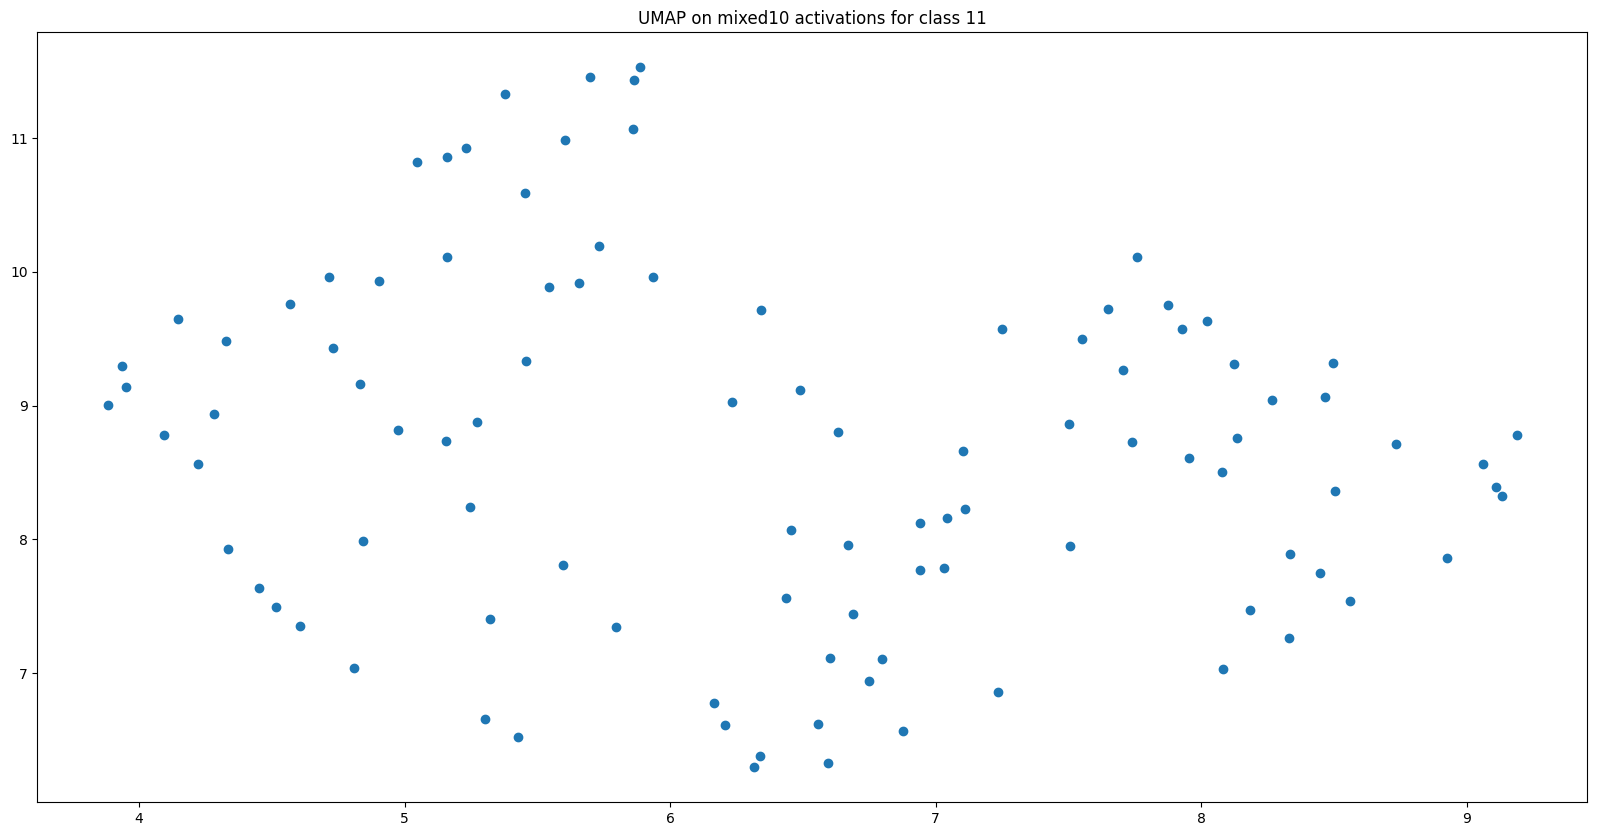

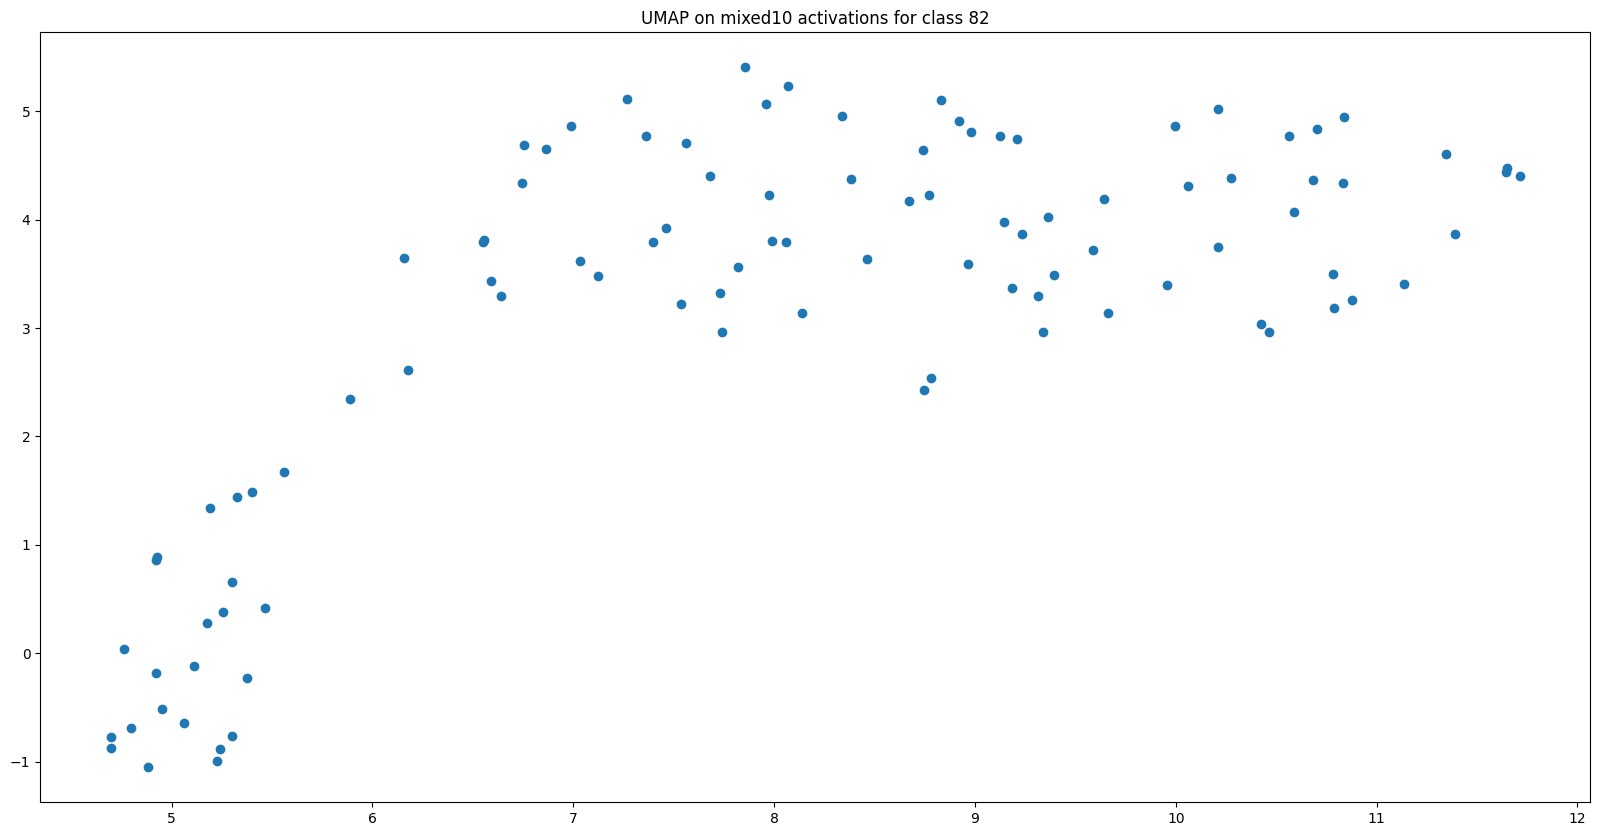

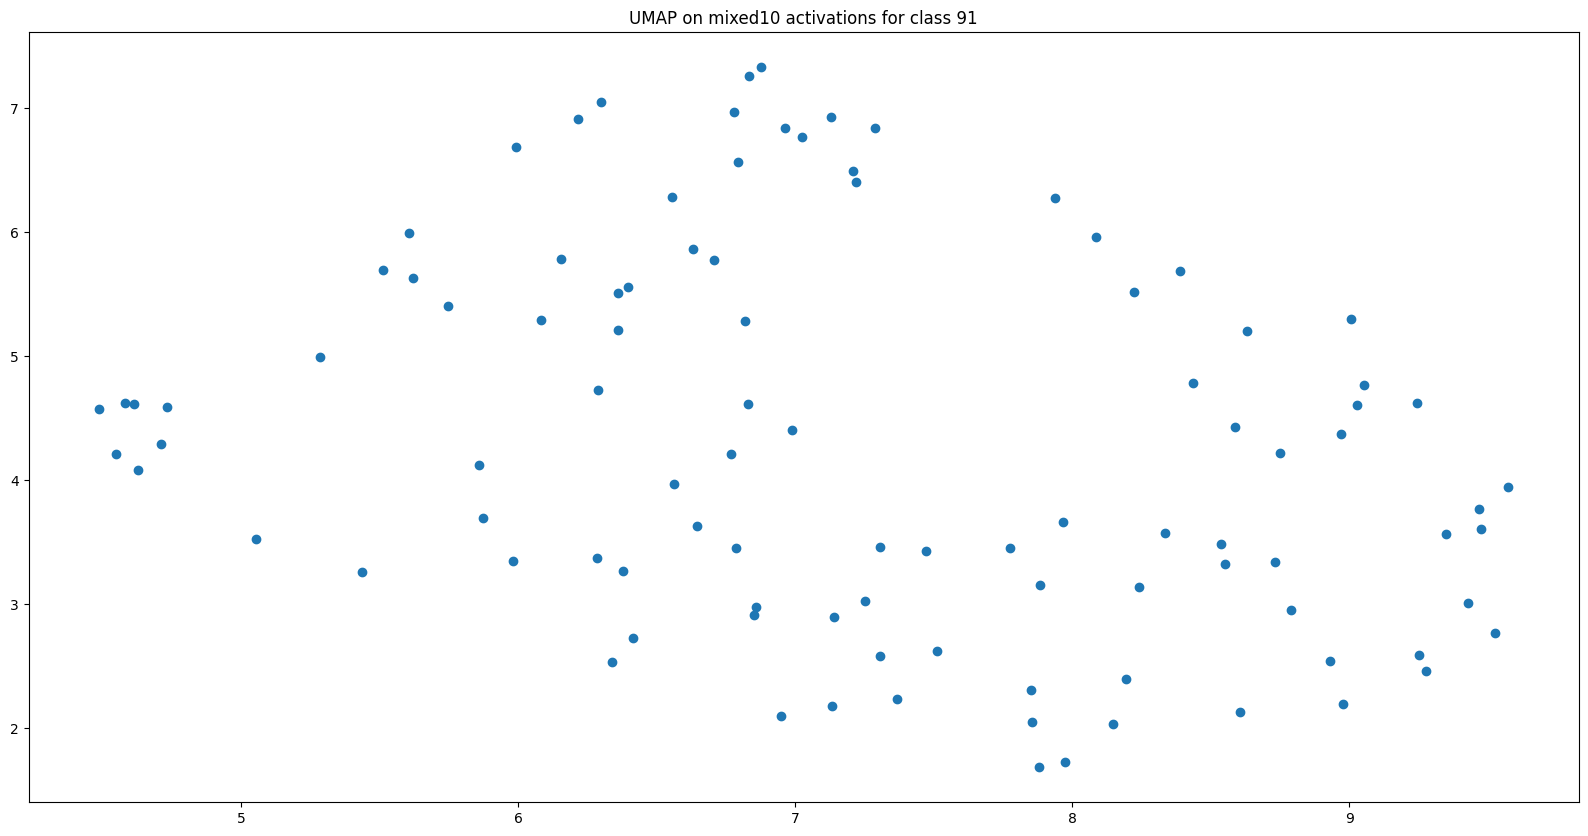

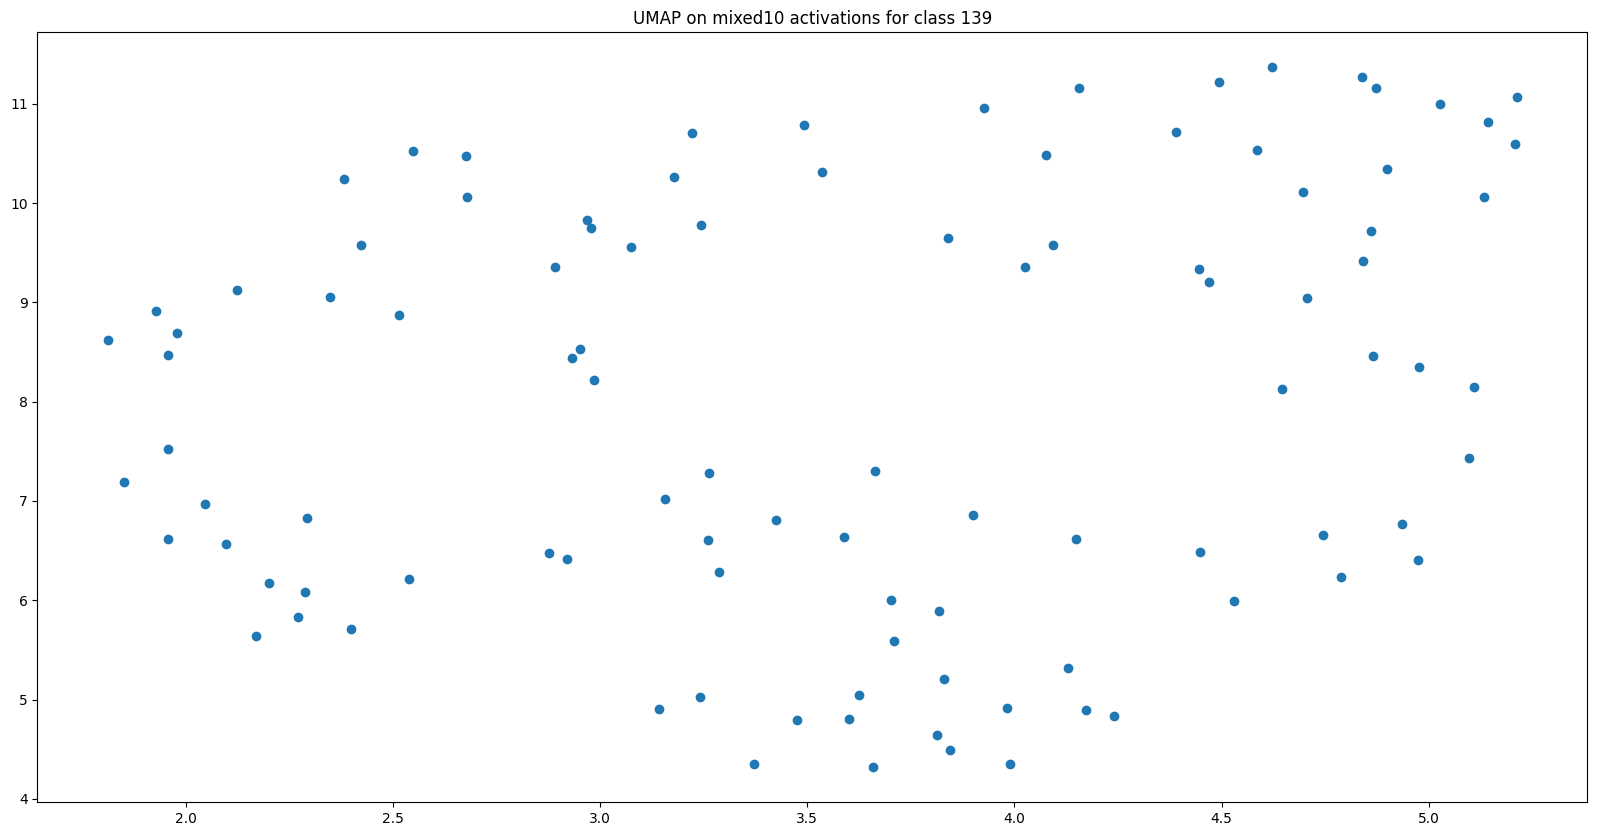

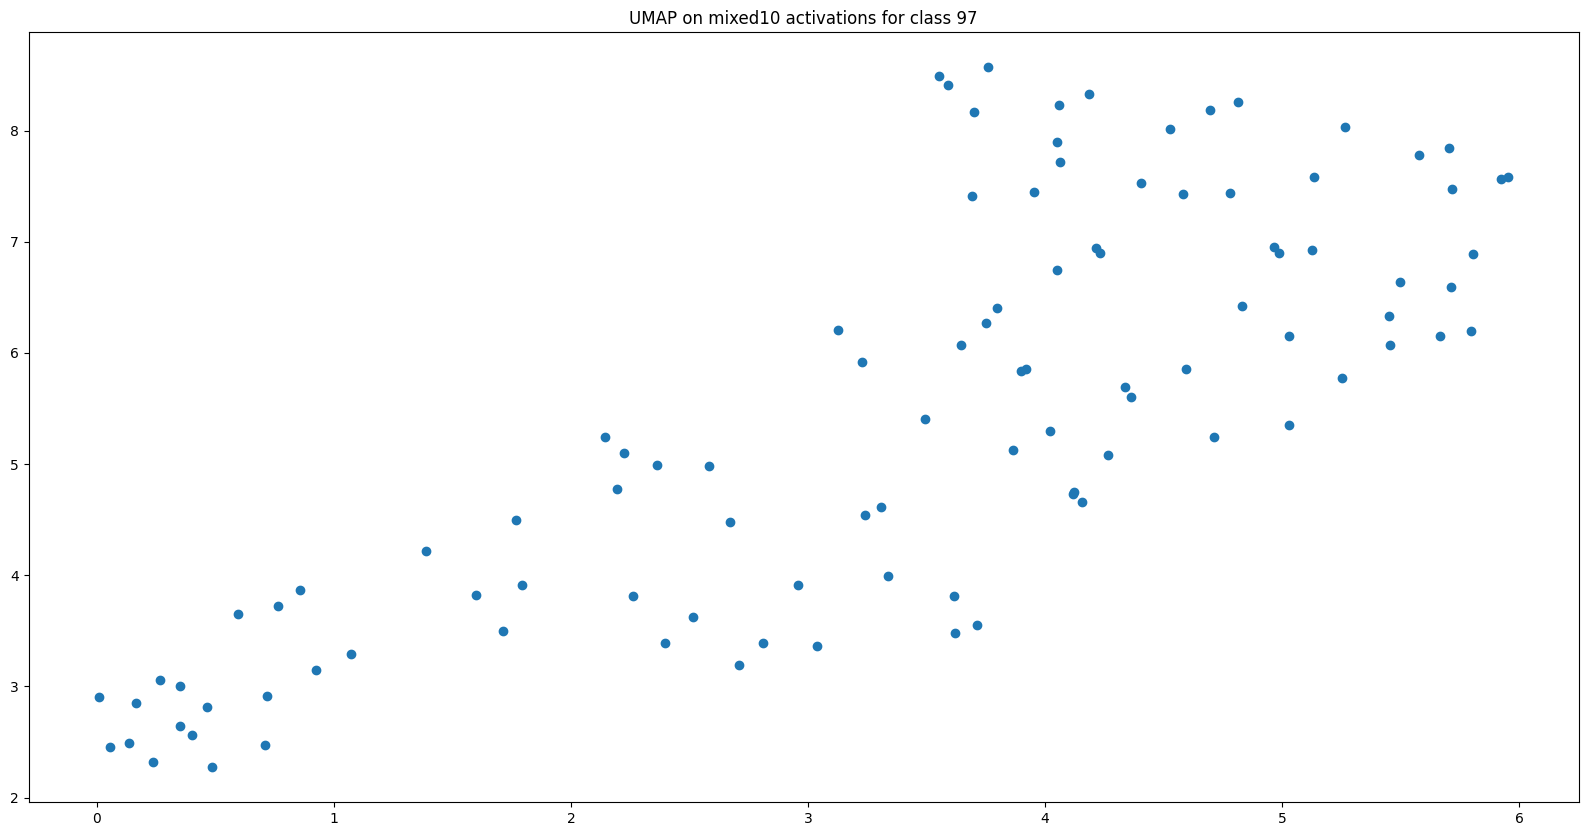

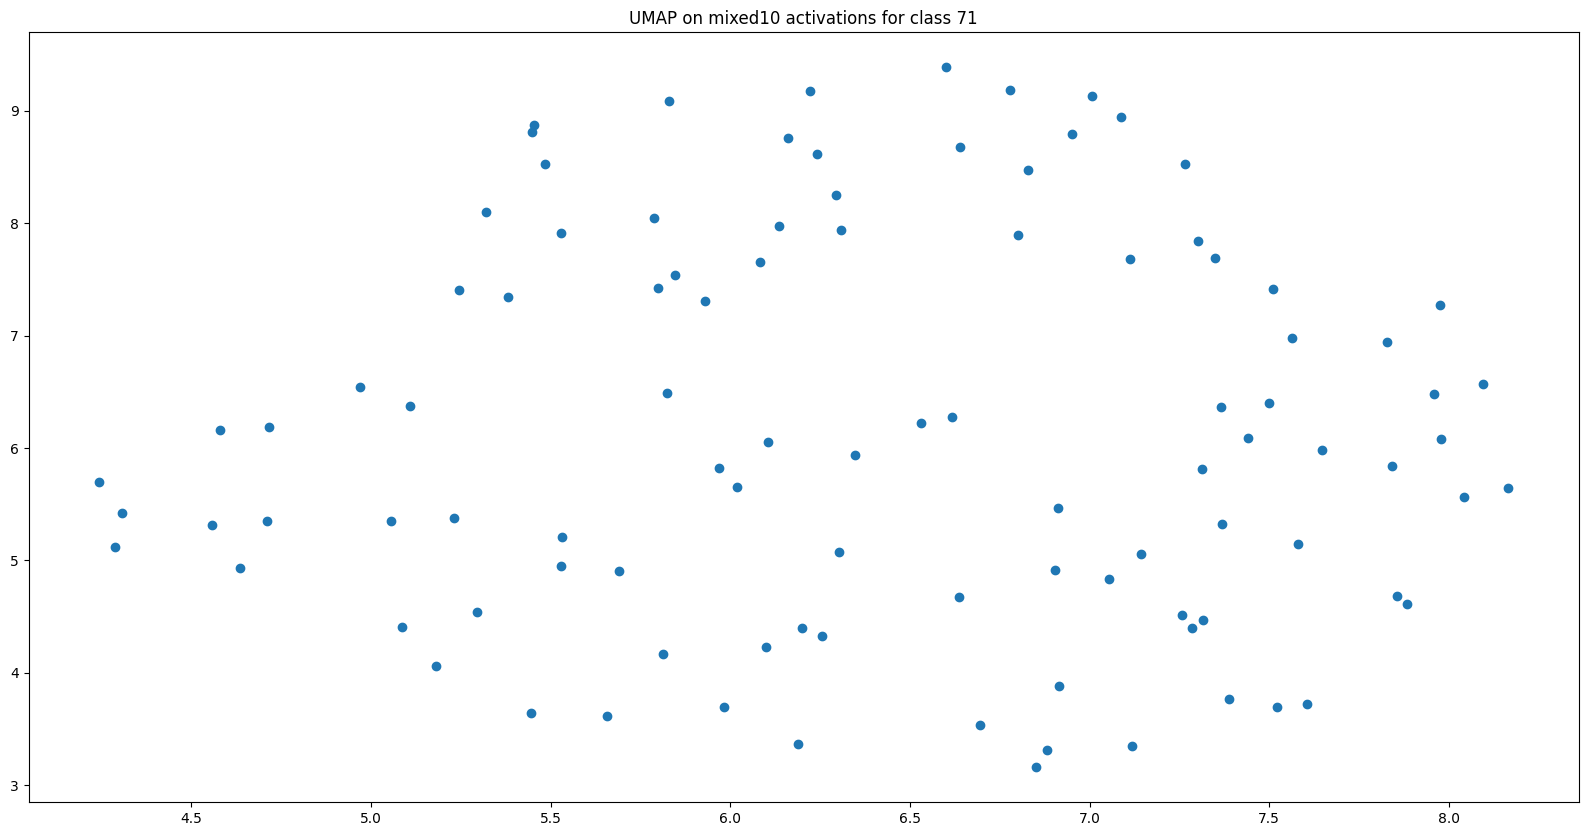

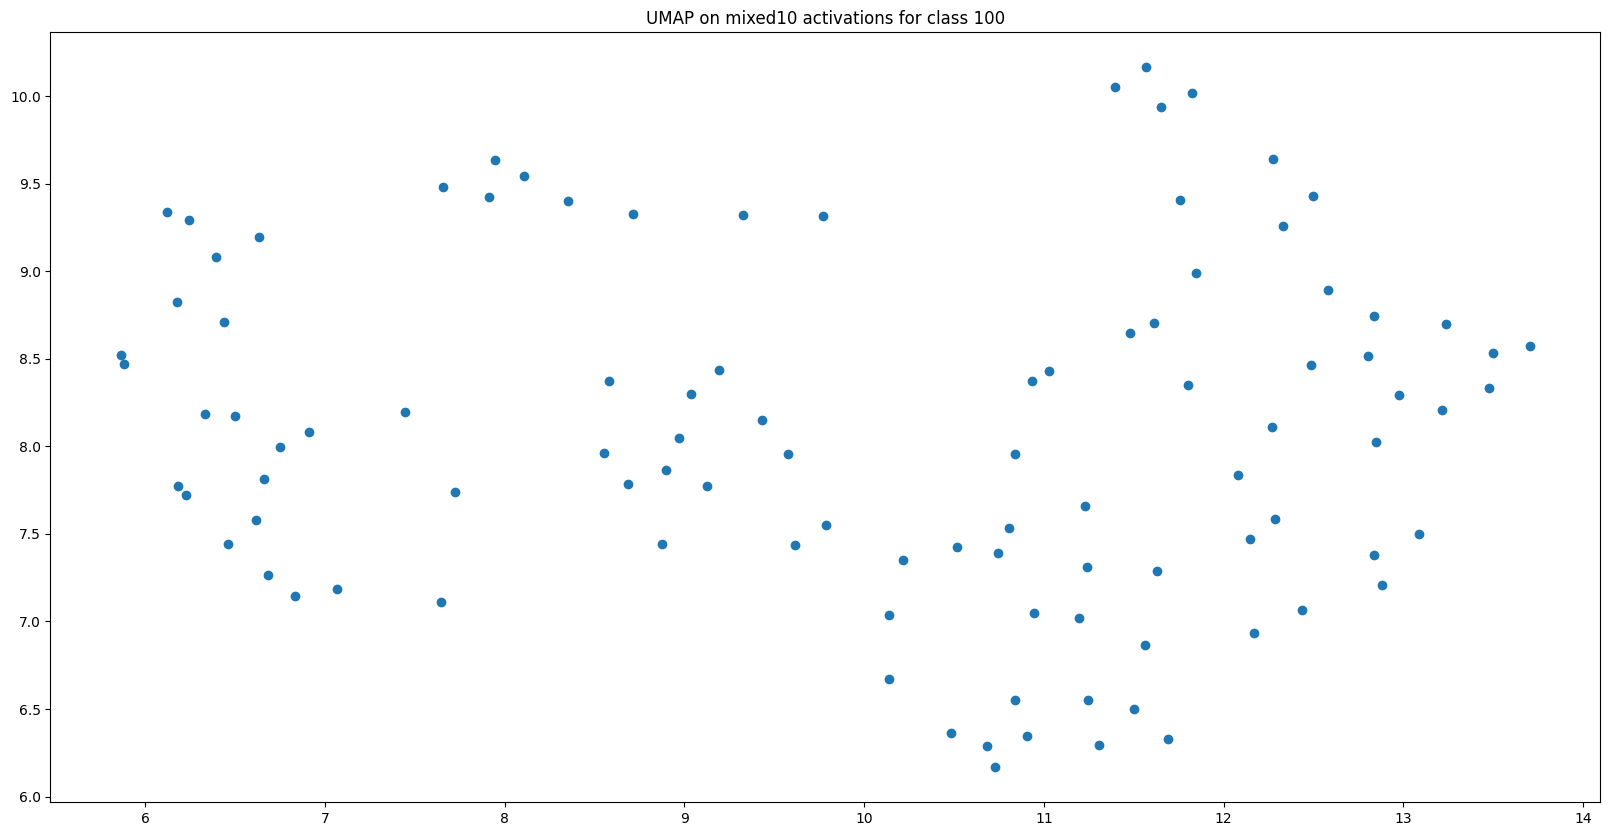

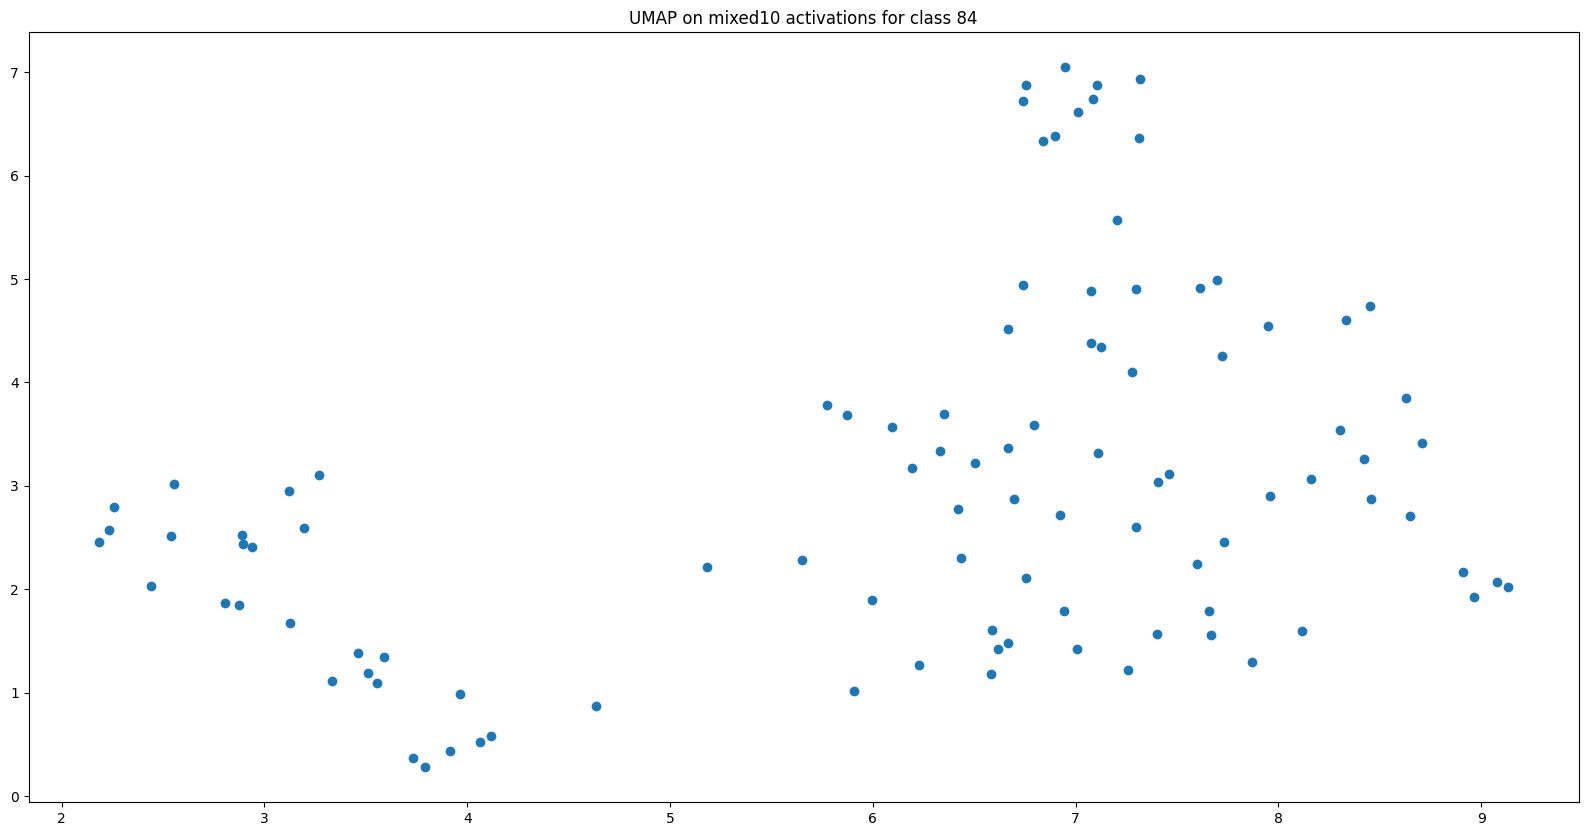

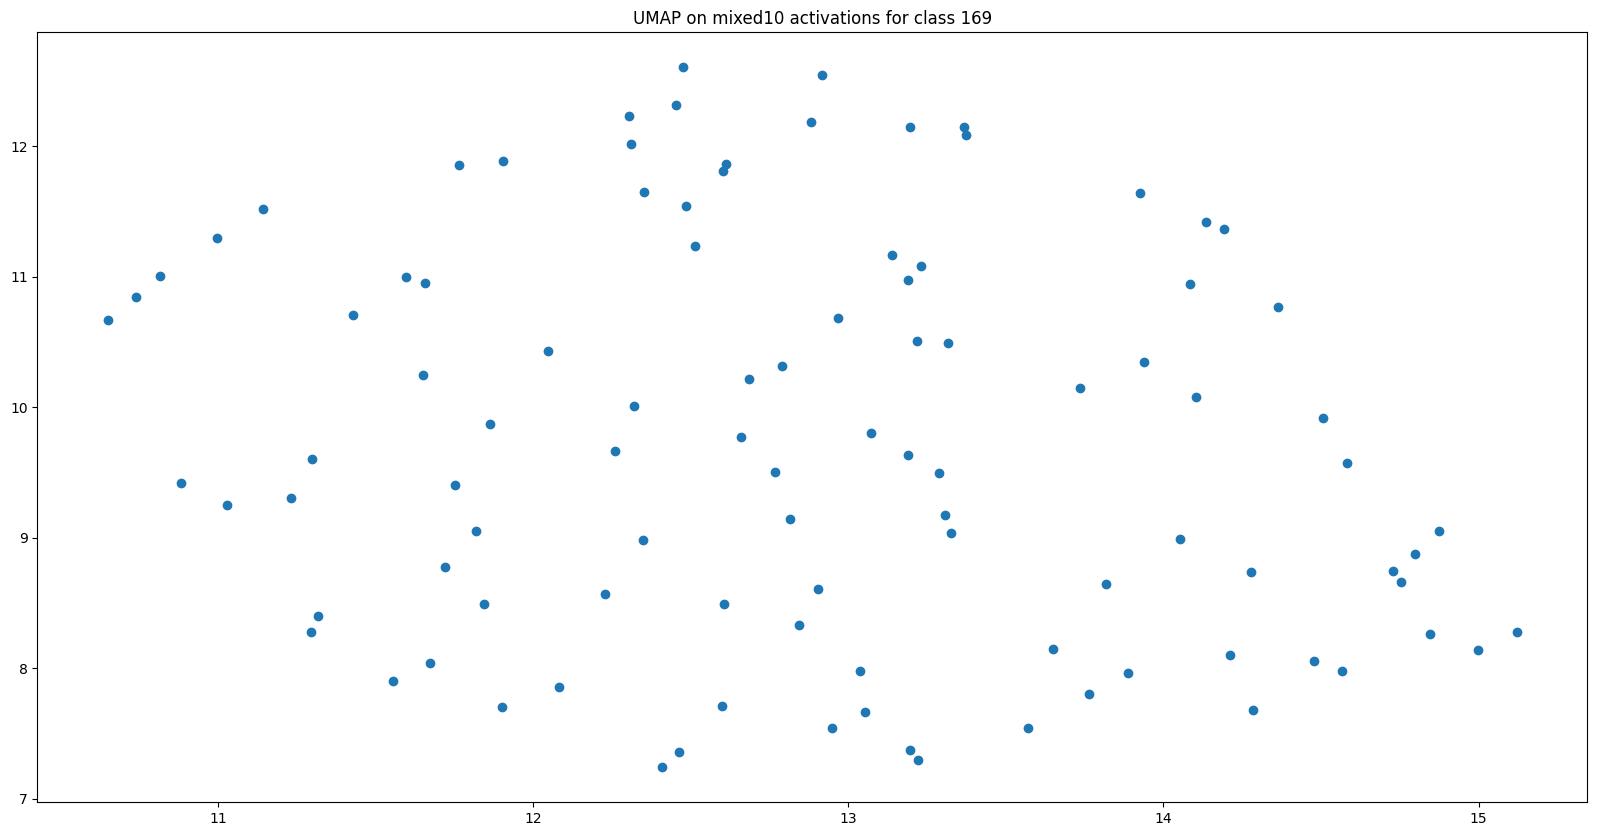

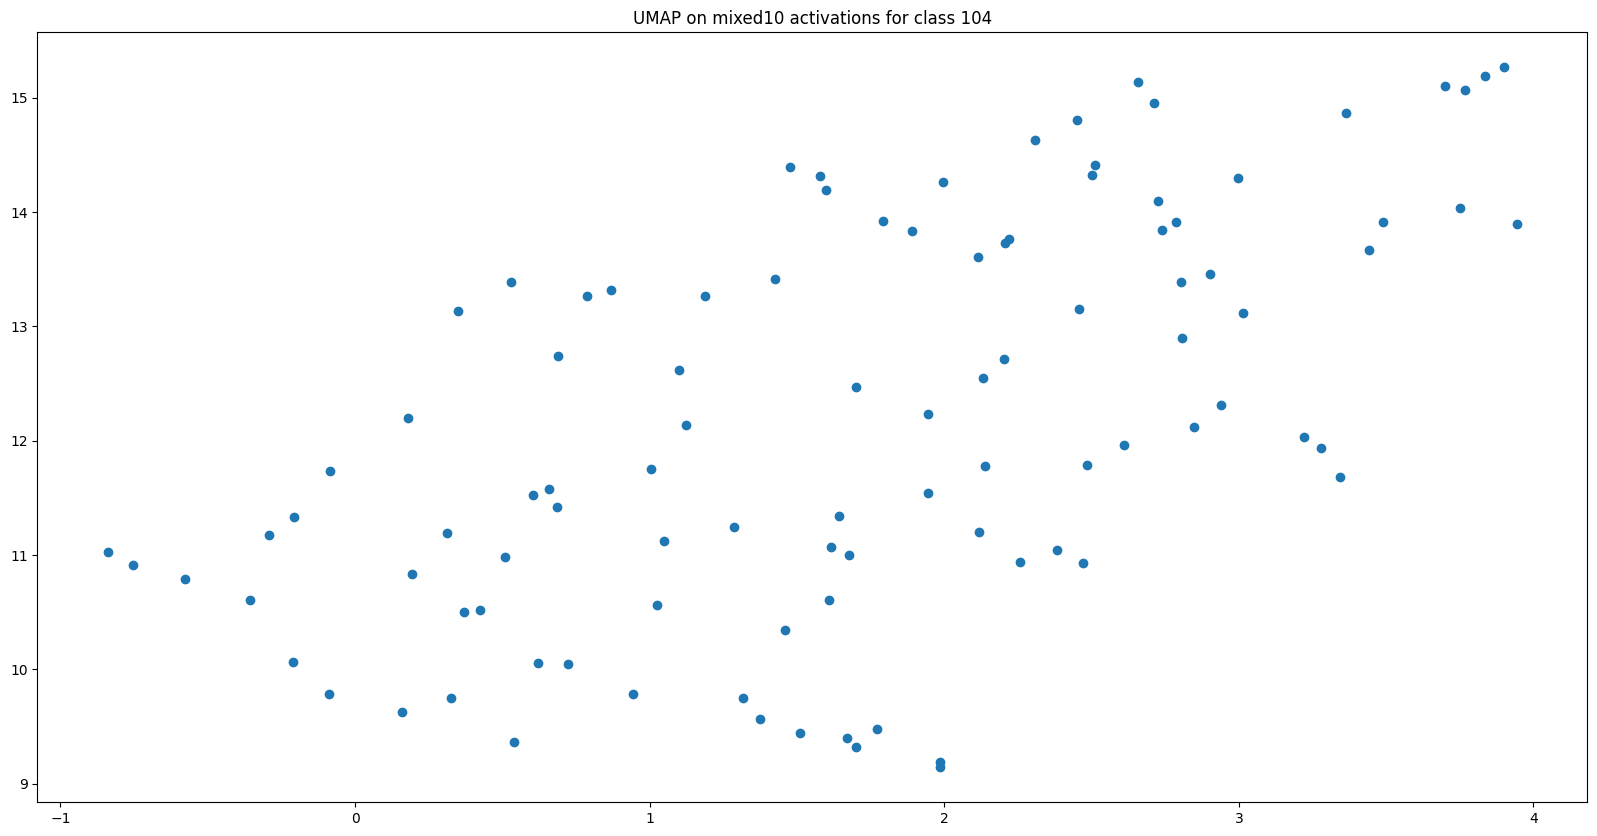

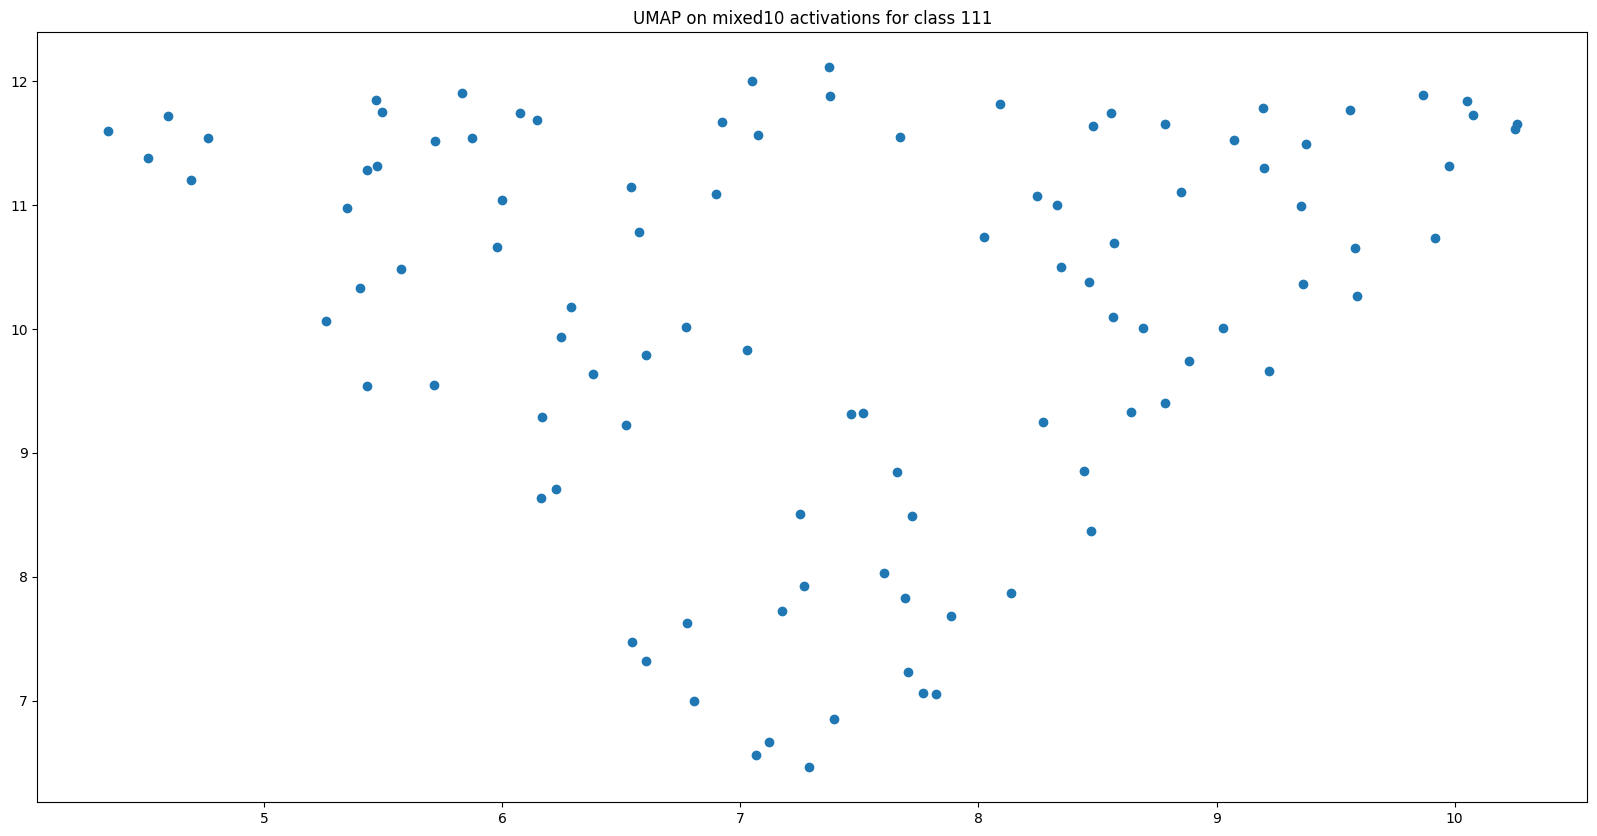

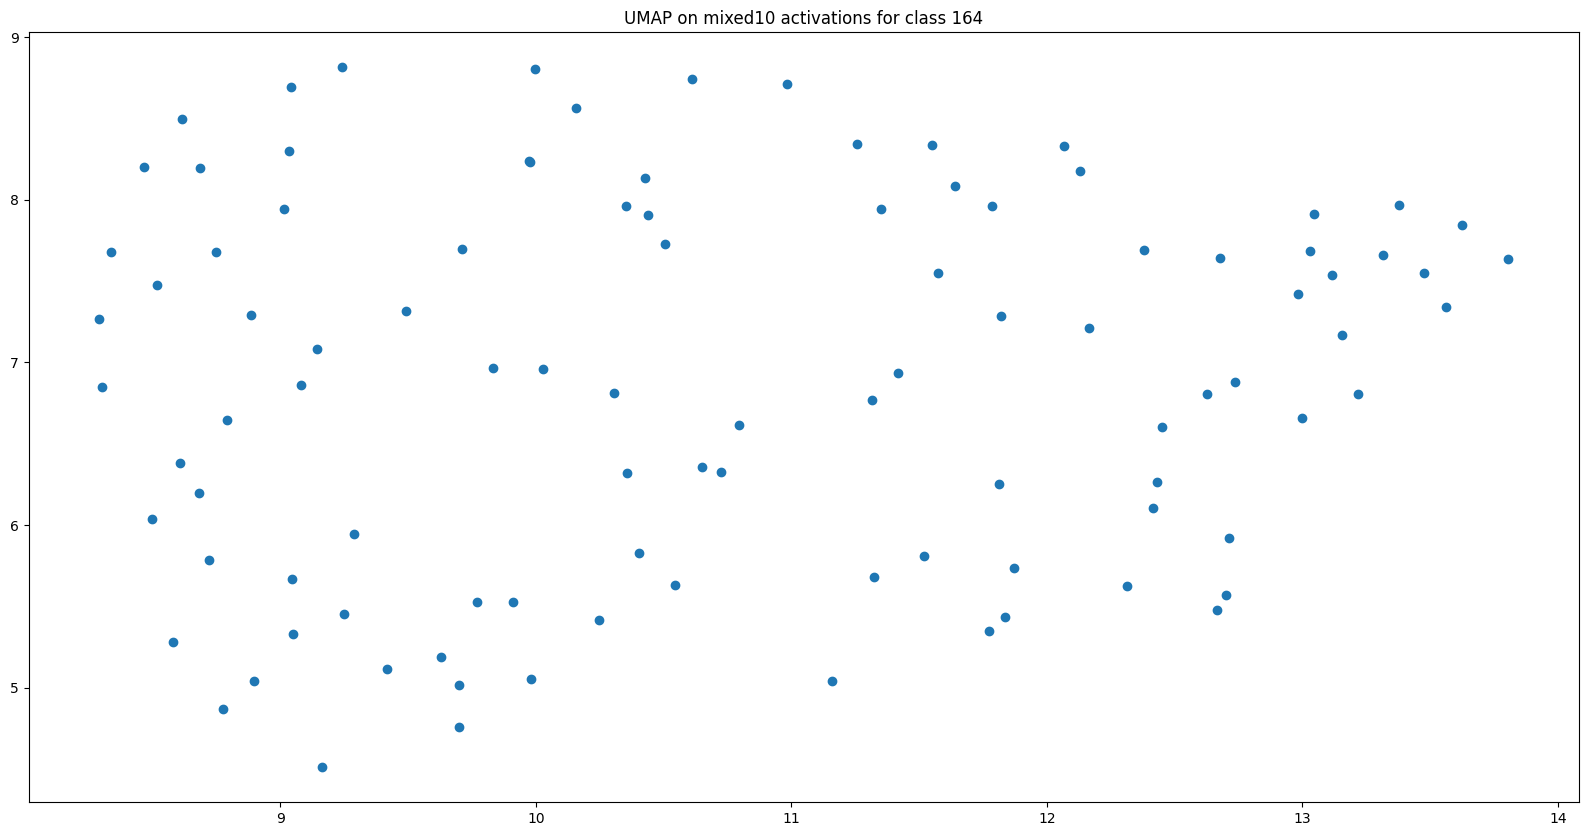

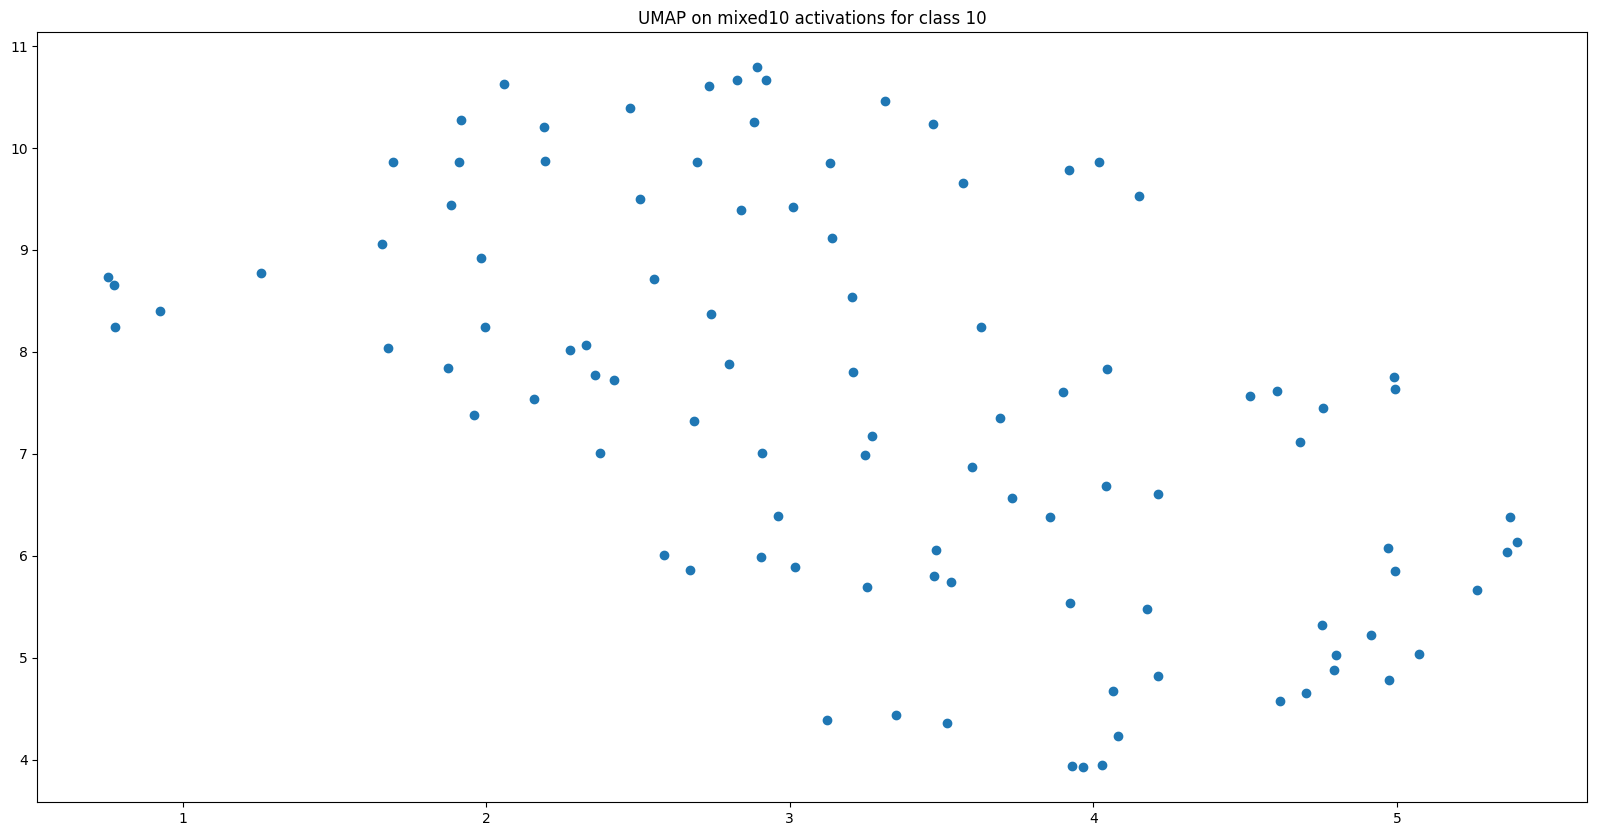

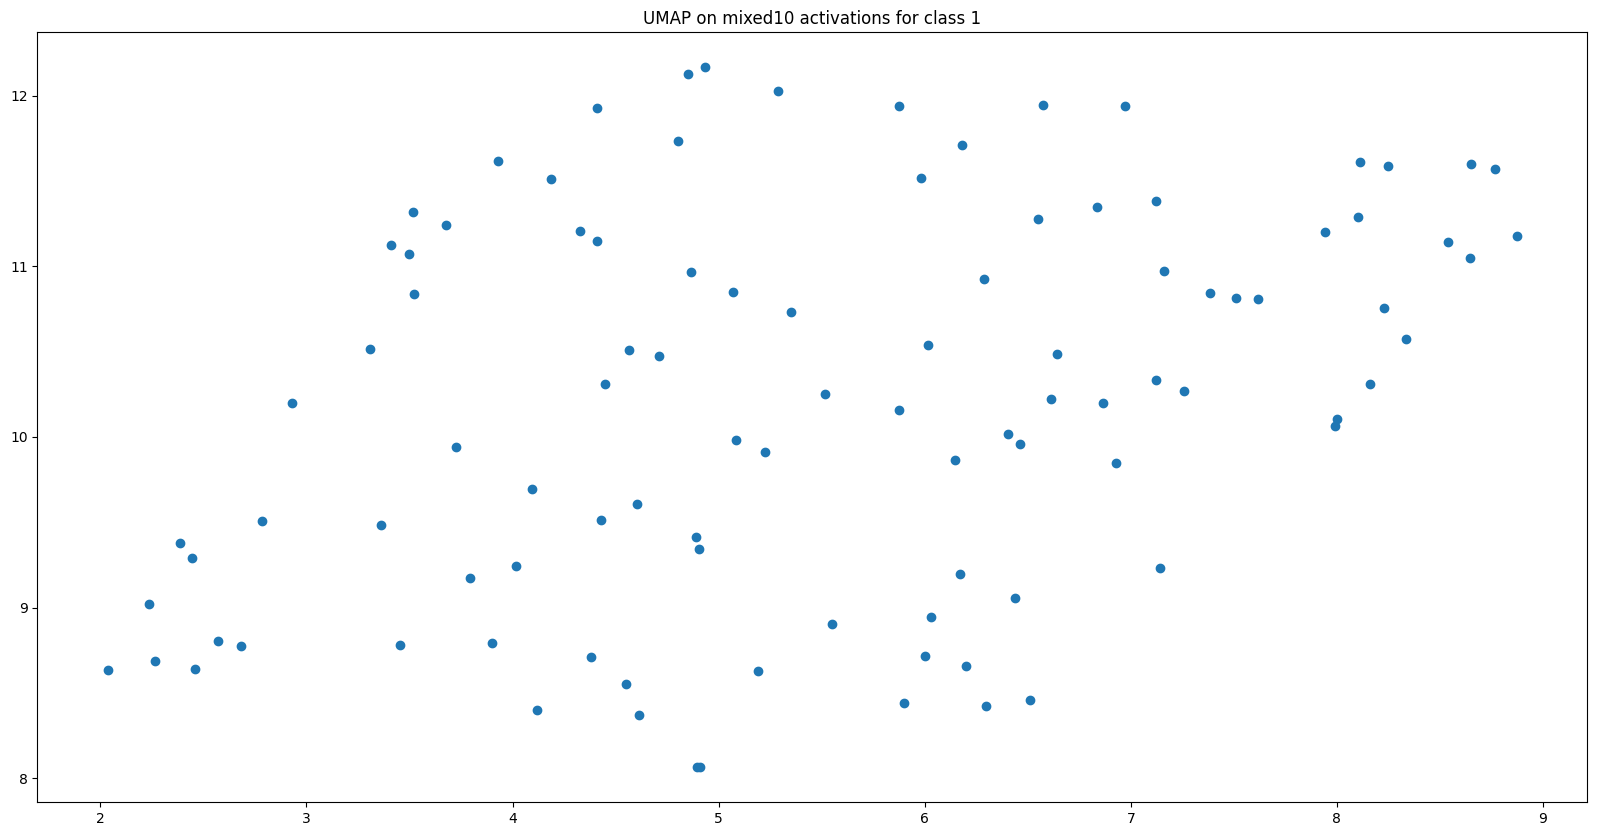

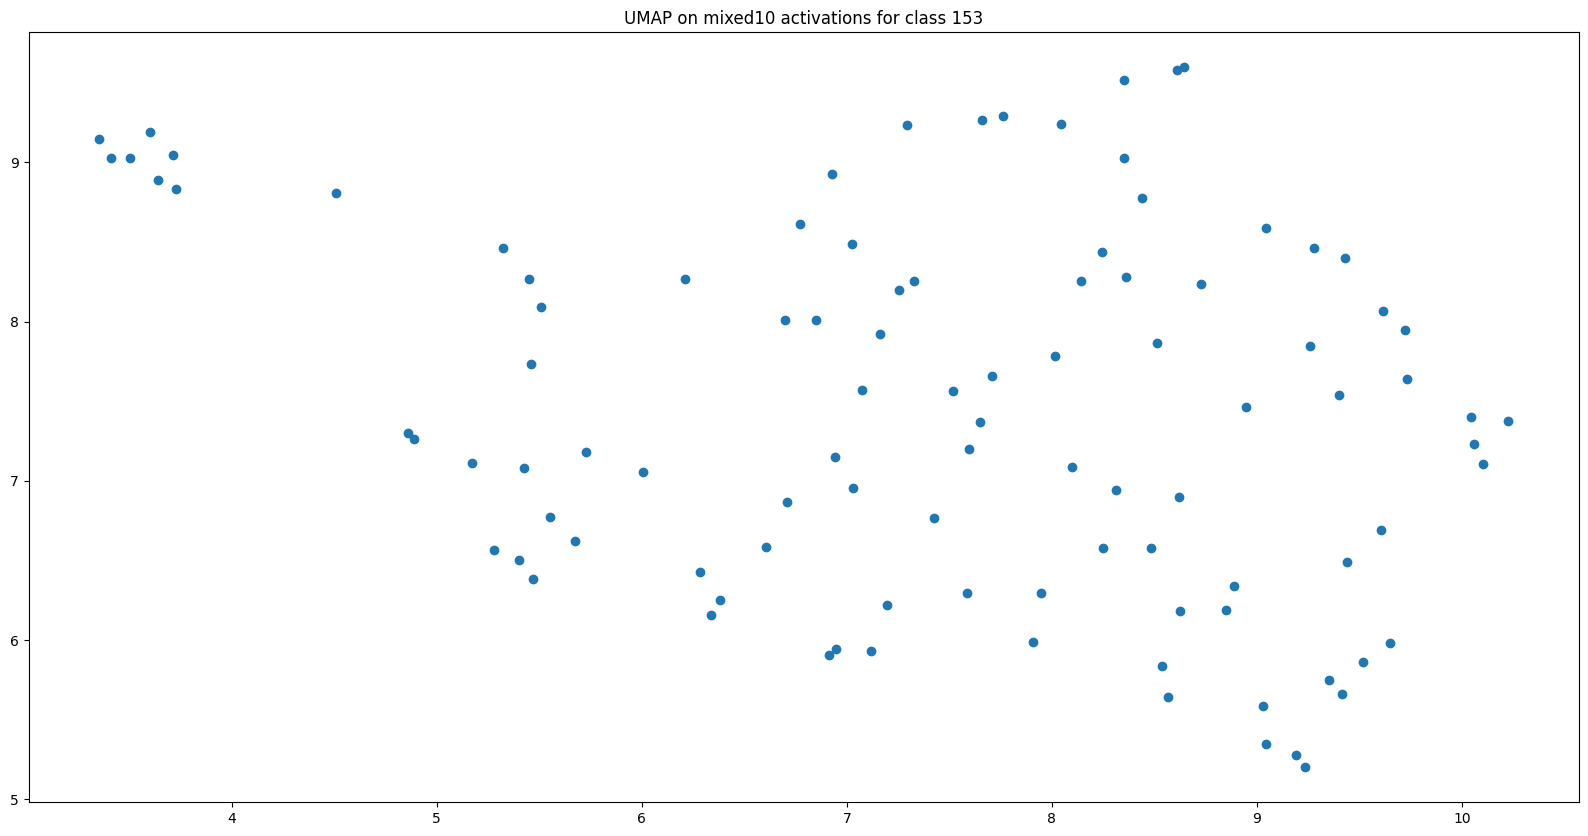

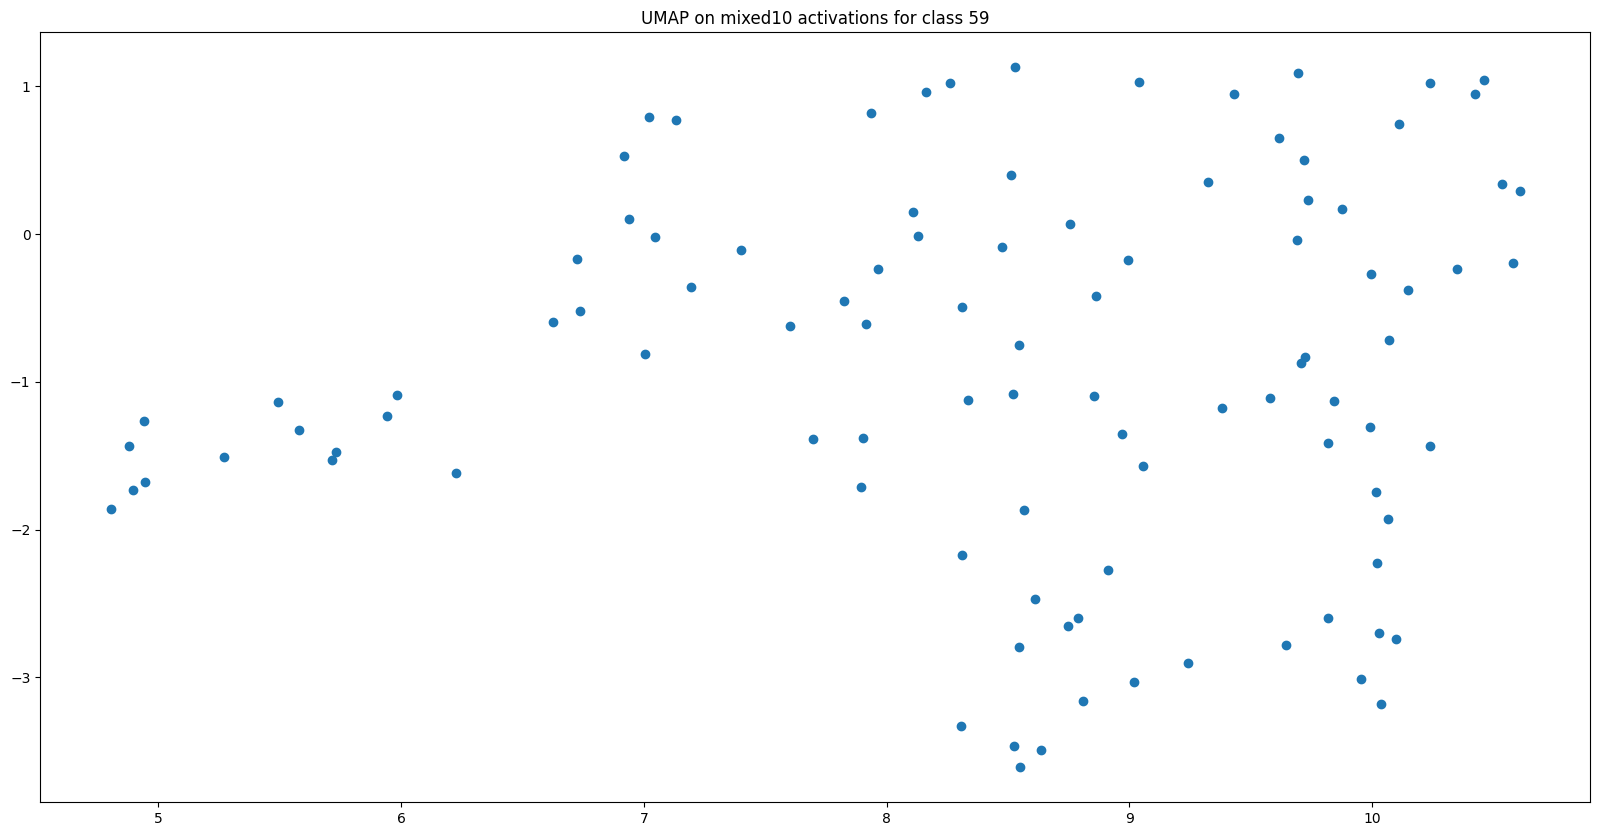

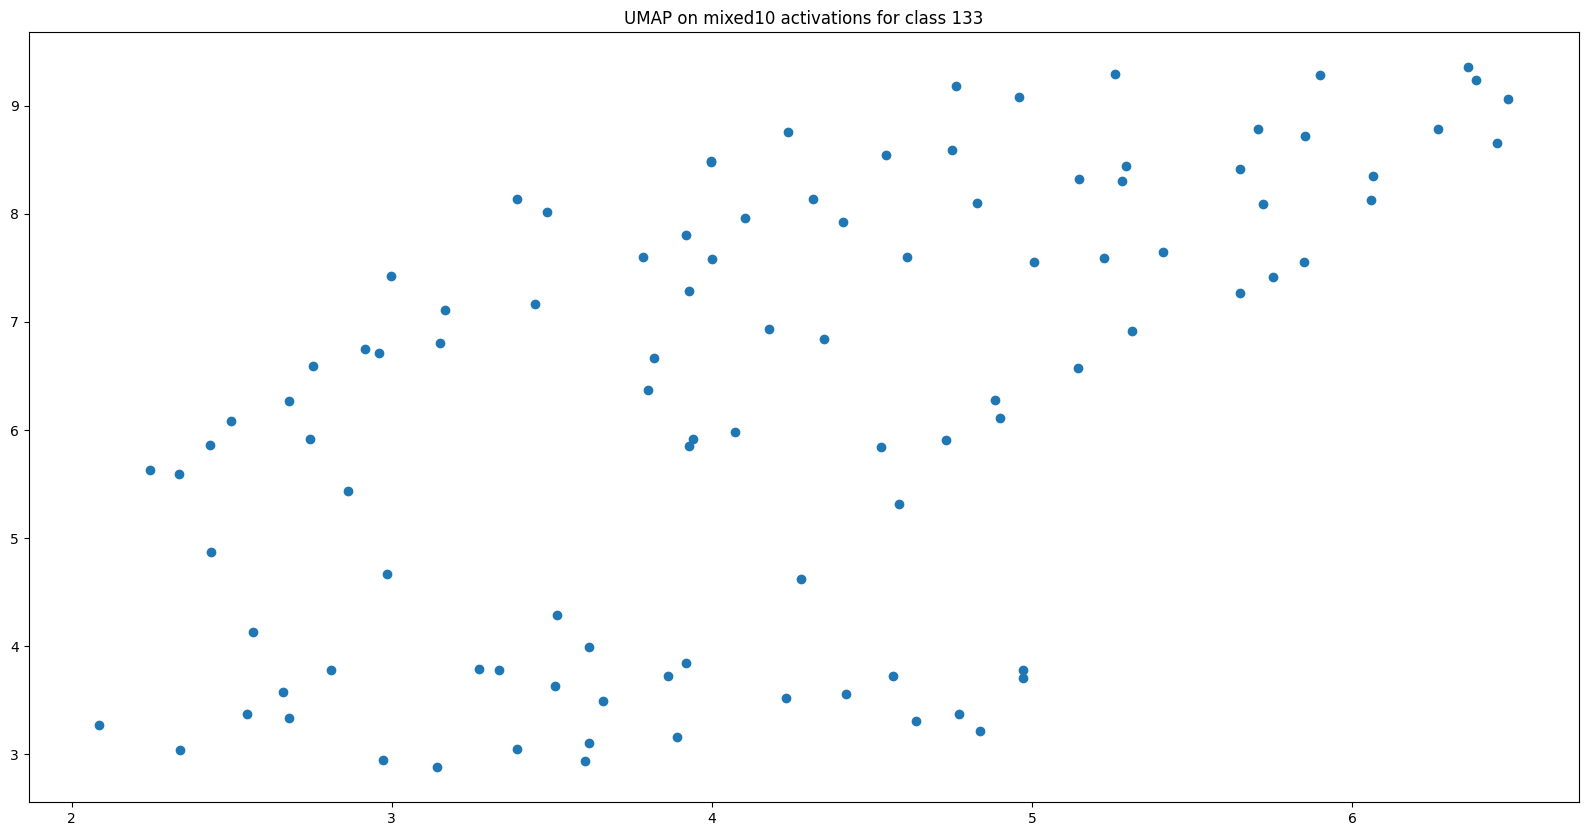

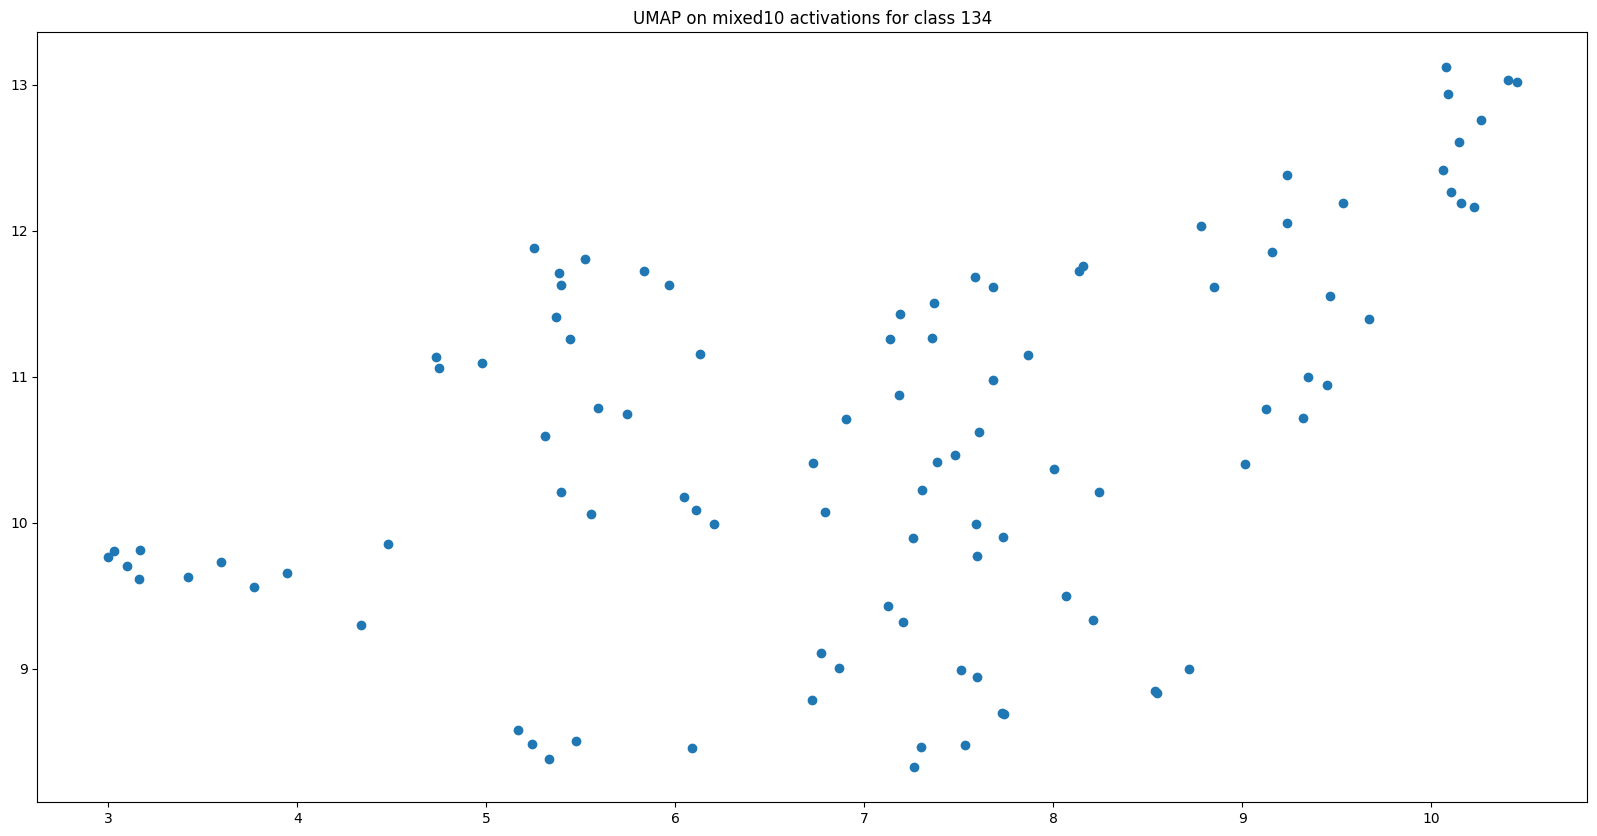

In [2]:
LAYER = "mixed10"
data_path = "/home/insane/u/APalysis/analysis/activation_summary"
N_NEIGHBORS = 5

for file in os.listdir(data_path):
    if not file.endswith(".npz"):
        continue

    class_label = file.split("_")[1].split(".")[0]
    activationsSummary = np.load(f"{data_path}/{file}")[LAYER]

    act_dist_mat = np.zeros((len(activationsSummary), len(activationsSummary)))
    for i, acti in tqdm(enumerate(activationsSummary)):
        for j, actj in enumerate(activationsSummary):
            if i == j:
                act_dist_mat[i, j] = 0
                continue
            if i > j:
                continue
            act_dist_mat[i, j] = utils.single_activation_distance(acti, actj)

            act_dist_mat[j, i] = act_dist_mat[i, j]

    # apply mds to activationsSummary['mixed10]

    mds = MDS(
        n_components=2,
        dissimilarity="precomputed",
        random_state=6,
        normalized_stress="auto",
        verbose=1,
    )
    umap_model = umap.UMAP(
        n_components=2,
        n_neighbors=N_NEIGHBORS,
        metric="precomputed",
    )

    for model in [
        # mds,
        umap_model,
    ]:
        result = model.fit_transform(act_dist_mat)
        fig = plt.figure(figsize=(20, 10))
        sc = plt.scatter(result[:, 0], result[:, 1])
        plt.title(
            f"{model.__class__.__name__} on mixed10 activations for class {class_label}"
        )

        # save the figure without showing
        utils.makedir(f"class_embedding_images/n_neighbors_{N_NEIGHBORS}/{model.__class__.__name__}")
        plt.savefig(
            f"class_embedding_images/n_neighbors_{N_NEIGHBORS}/{model.__class__.__name__}/{LAYER}_{class_label}.png"
        )

(300, 2048)


0it [00:00, ?it/s]

300it [00:00, 768.25it/s]
/tmp/ipykernel_90713/774723464.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  sc = plt.scatter(result[:, 0], result[:, 1], c=labels, cmap=plt.cm.get_cmap("jet", 999))


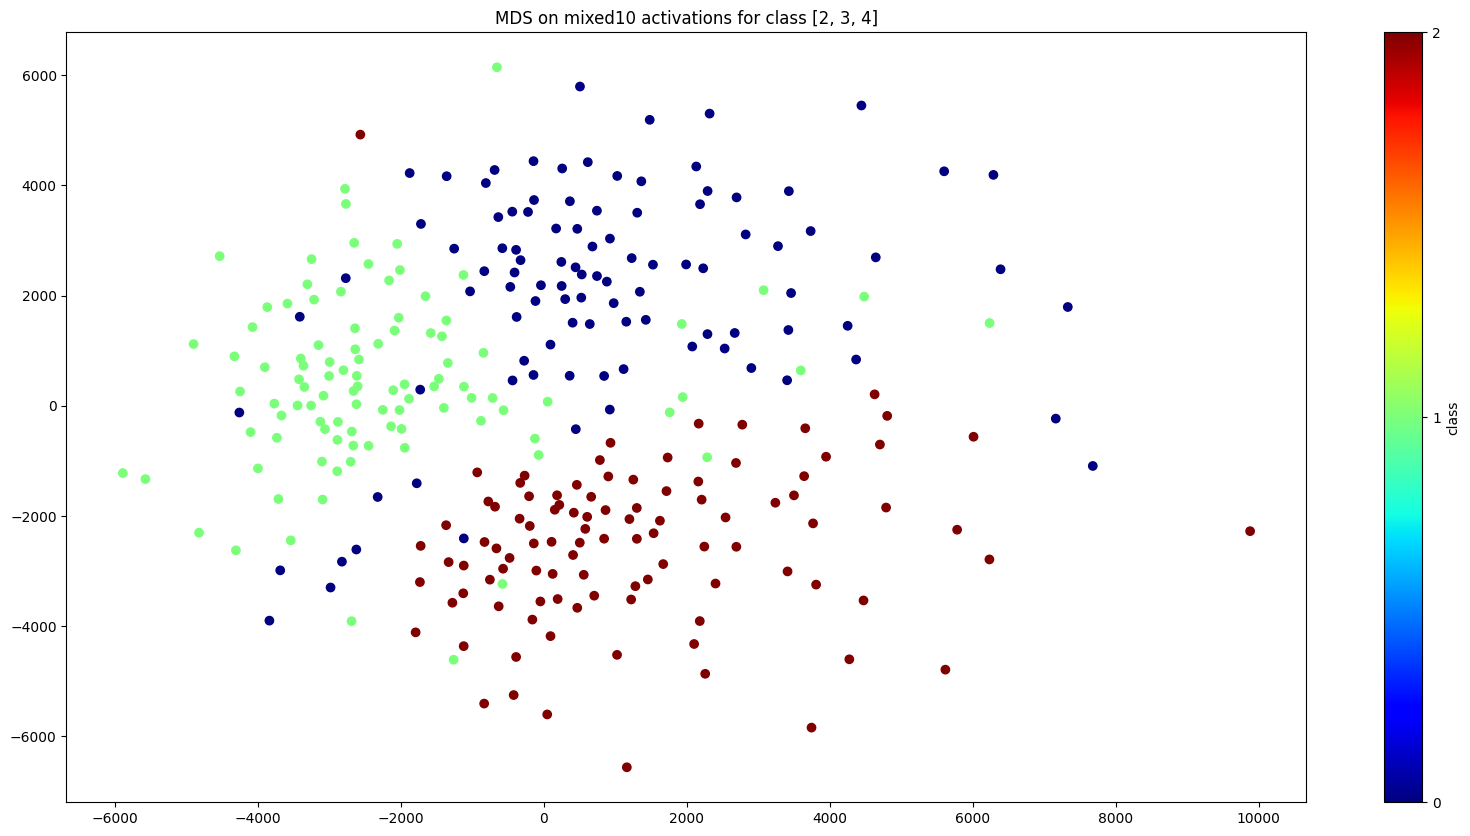

/home/insane/.cache/pypoetry/virtualenvs/apalysis-5kmHI_dQ-py3.10/lib/python3.10/site-packages/umap/umap_.py:1857: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


KeyboardInterrupt: 

In [ ]:
LAYER = 'mixed10'
MAX_POINTS = 5000
CLASSES = [2, 3, 4]

data_path = '/home/insane/u/APalysis/analysis/activation_summary'

for file in os.listdir(data_path):
    if not file.endswith(".npz"): continue
    activationsSummary = np.load(f'{data_path}/activations_{CLASSES[0]}.npz')[LAYER]
    labels = np.zeros(activationsSummary.shape[0]) + 0
    for i, class_name in enumerate(CLASSES[1:]):
        tmp = np.load(f'{data_path}/activations_{class_name}.npz')[LAYER]
        activationsSummary = np.concatenate(
            (activationsSummary, tmp)
        )
        labels = np.concatenate(
            (labels, np.zeros(tmp.shape[0]) + i + 1)
        )
        
    print(activationsSummary.shape)


    act_dist_mat = np.zeros((len(activationsSummary), len(activationsSummary)))

    for i, acti in tqdm(enumerate(activationsSummary)):
        for j, actj in enumerate(activationsSummary):
            if i == j:
                act_dist_mat[i, j] = 0
                continue
            if i > j:
                continue
            act_dist_mat[i, j] = utils.single_activation_distance(
                acti, actj
            )

            act_dist_mat[j, i] = act_dist_mat[i, j]
            
    # apply mds to activationsSummary['mixed10]

    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=6, normalized_stress='auto', verbose=1)
    umap_model = umap.UMAP(n_components=2, metric='precomputed')

    for model in [mds, umap_model]:
        result = model.fit_transform(act_dist_mat)
        fig = plt.figure(figsize=(20, 10))
        sc = plt.scatter(result[:, 0], result[:, 1], c=labels, cmap=plt.cm.get_cmap("jet", 999))
        plt.colorbar(label='class', ticks=range(999))
        plt.title(f'{model.__class__.__name__} on mixed10 activations for class {CLASSES}')
        
        # save the figure without showing
        plt.show()

